In [1]:
from datetime import datetime,date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('24hrBars.csv')
df = df.reset_index()
df.index = df.Date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df.head()

index                 Date           Date_close     Open  \
Date                                                                            
2017-08-17 04:00:00      0  2017-08-17 04:00:00  2017-08-18 04:00:00  4261.48   
2017-08-18 04:00:00      1  2017-08-18 04:00:00  2017-08-19 04:00:00  4292.39   
2017-08-19 04:00:00      2  2017-08-19 04:00:00  2017-08-20 04:00:00  4138.50   
2017-08-20 04:00:00      3  2017-08-20 04:00:00  2017-08-21 04:00:00  4094.62   
2017-08-21 04:00:00      4  2017-08-21 04:00:00  2017-08-22 04:00:00  4079.26   

                        High      Low    Close       Volume  
Date                                                         
2017-08-17 04:00:00  4485.39  4134.61  4269.26  1073.380903  
2017-08-18 04:00:00  4371.52  3938.77  4138.55  1034.685932  
2017-08-19 04:00:00  4156.00  3850.00  4094.62   279.410598  
2017-08-20 04:00:00  4211.08  4032.62  4047.75   684.886610  
2017-08-21 04:00:00  4104.68  3688.97  3777.73   592.918094

In [3]:
open_price = df['Open']
close_price = df['Close']
oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
volume = df['Volume']
print(volume.max())
print(oc_min)

368085.035366
Date
2017-08-17 04:00:00     4261.48
2017-08-18 04:00:00     4138.55
2017-08-19 04:00:00     4094.62
2017-08-20 04:00:00     4047.75
2017-08-21 04:00:00     3777.73
                         ...   
2021-09-26 04:00:00    42212.41
2021-09-27 04:00:00    42632.03
2021-09-28 04:00:00    42198.44
2021-09-29 04:00:00    42199.99
2021-09-30 04:00:00    43591.24
Length: 1506, dtype: float64


In [4]:
"""This cell defineds the plot_candles function"""

def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['Open']
    close_price = pricing['Close']
    low = pricing['Low']
    high = pricing ['High']
    oc_min = pd.concat([open_price,close_price],axis=1).min(axis=1)
    oc_max = pd.concat([open_price,close_price],axis=1).max(axis=1)
    
    if volume_bars:
        fig,(ax1,ax2) = plt.subplots(2,1,sharex=True , gridspec_kw={'height_ratios':[3,1]},figsize=(7,7))
    else:
        fig, ax1 = plt.subplots(1,1)
    if title:
        ax1.set_title(title)
    fig.tight_layout()
    x = np.arange(len(pricing)) # Return evenly spaced values within a given interval.
    candle_colors = [color_function(i,open_price,close_price,low,high)for i in x]
    candles = ax1.bar(x,oc_max-oc_min,bottom=oc_min,color=candle_colors,linewidth=0)
    lines = ax1.vlines(x,low,high,color = candle_colors,linewidth = 1)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which ='major', length = 3.0, direction = 'in', top = 'off')
    ax1.set_yticklabels([])
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
    #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['Volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        #ax2.set_title(volume_title)
        ax2.xaxis.grid(True)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
    return fig    


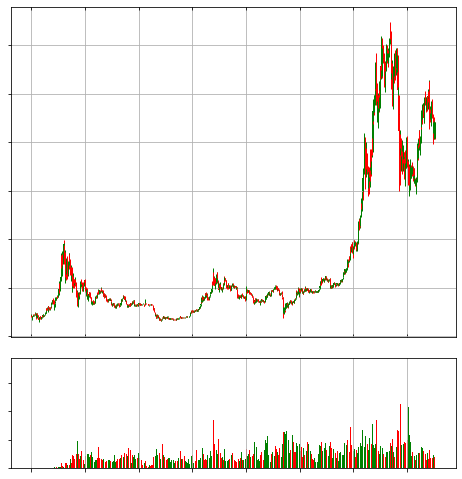

In [5]:
fig=plot_candles(df,volume_bars=True)

Down 0 2
Down 1 3
Down 2 2
Down 3 1
Up 4 1
Up 5 2
Up 6 1
Up 8 4
Up 9 3
Up 10 2
Up 11 1
Down 13 4
Down 14 3
Down 15 2
Down 16 1
Down 17 1
Up 18 1
Up 19 2
Down 20 2
Down 21 1
Down 22 4
Up 23 2
Down 24 2
Down 25 1
Down 26 2
Down 27 1
Up 28 1
Down 29 1
Up 30 1
Up 31 1
Down 32 2
Down 33 2
Down 34 2
Up 35 4
Up 36 1
Up 37 3
Up 38 2
Up 39 2
Up 40 1


/var/folders/05/ct7x2p6126s8zvlrs47fc2dr0000gn/T/ipykernel_49902/4121176612.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,(ax1,ax2) = plt.subplots(2,1,sharex=True , gridspec_kw={'height_ratios':[3,1]},figsize=(7,7))


Down 41 1
Up 42 1
Up 43 2
Down 44 4
Down 45 3
Down 46 2
Up 47 4
Up 48 1
Up 49 3
Up 50 2
Up 51 1
Up 52 1
Up 53 3
Up 54 2
Up 55 1
Down 57 4
Down 58 3
Up 60 4
Up 61 3
Up 62 2
Up 63 1
Down 64 3
Down 65 2
Down 66 1
Up 67 3
Up 68 1
Up 69 4
Up 70 3
Up 71 2
Up 72 1
Up 73 2
Up 74 1
Up 75 1
Up 76 1
Up 78 1
Down 79 2
Down 81 4
Down 82 3
Down 83 2
Down 84 1
Down 85 1
Up 86 2
Up 87 1
Up 88 2
Up 89 1
Up 90 1
Down 91 1
Up 92 2
Up 93 3
Up 96 4
Up 97 3
Up 98 2
Up 99 1
Up 100 1
Up 101 2
Up 102 1
Down 103 2
Down 104 1
Up 105 1
Up 106 2
Up 107 1
Up 108 2
Up 109 1
Up 110 1
Up 111 1
Down 112 1
Down 113 1
Up 114 1
Down 115 2
Down 116 1
Up 117 2
Up 118 1
Up 119 2
Up 120 1
Down 121 3
Down 122 2
Down 123 1
Down 124 2
Down 125 1
Down 126 2
Down 127 1
Down 128 1
Up 129 1
Up 130 1
Down 131 1
Up 132 1
Down 133 1
Up 134 4
Up 135 3
Up 136 2
Up 137 1
Up 138 3
Up 139 2
Up 140 1
Down 141 2
Down 142 1
Down 143 2
Down 144 1
Up 146 2
Down 147 4
Down 148 2
Down 149 1
Down 150 1
Down 151 1
Up 152 1
Up 153 2
Up 154 1
Up 155 1

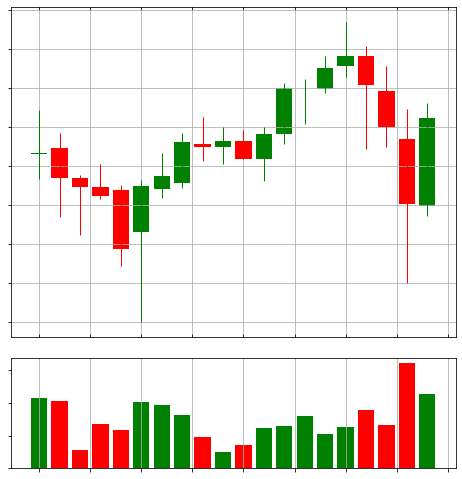

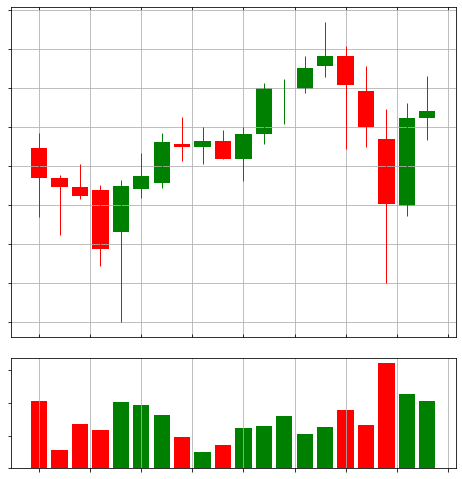

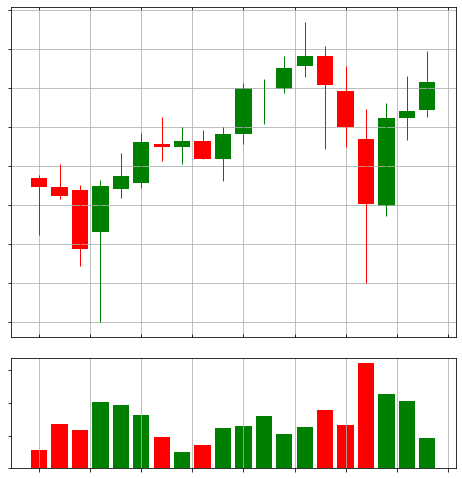

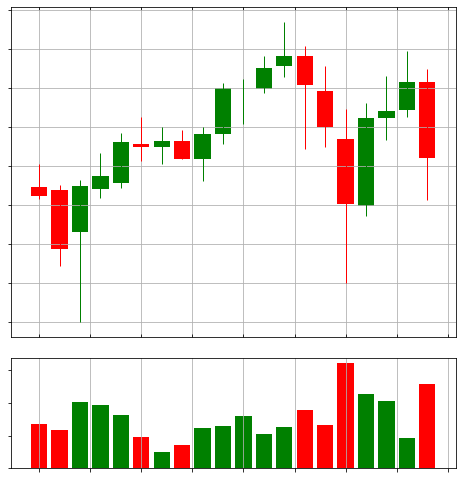

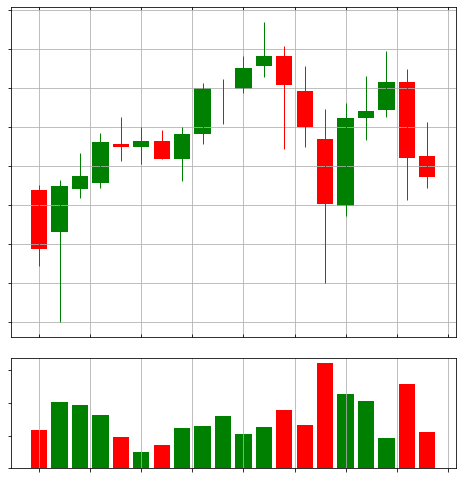

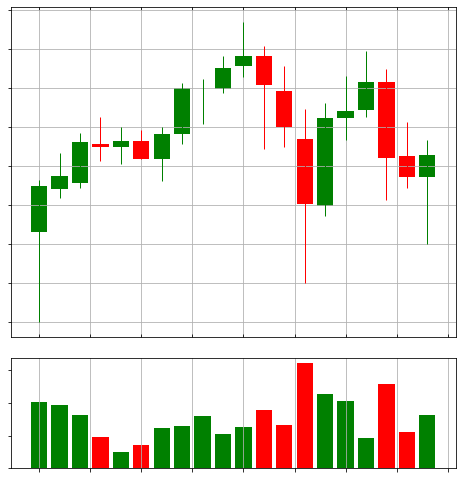

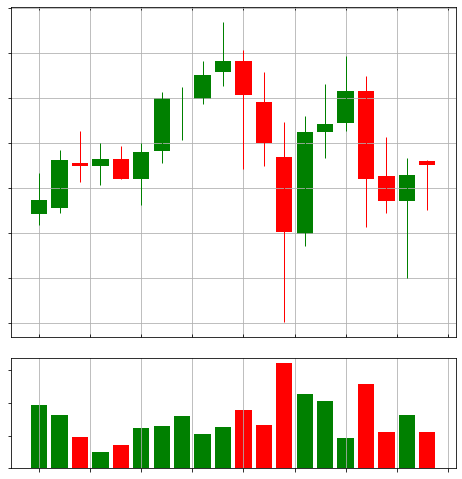

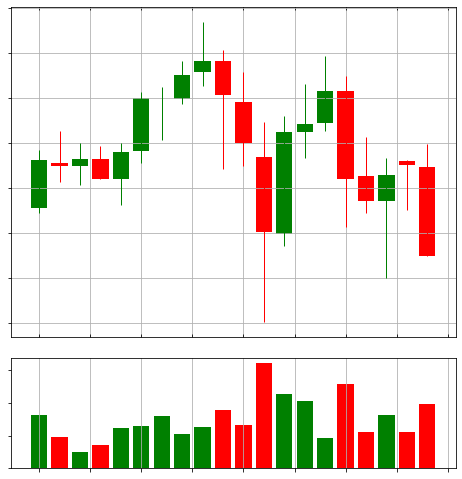

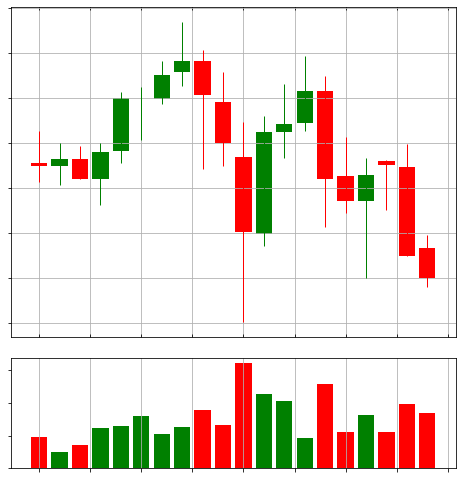

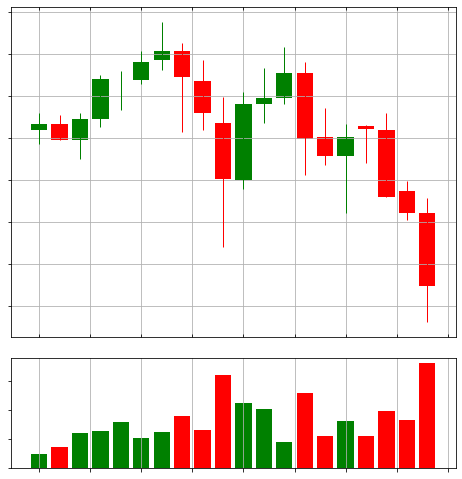

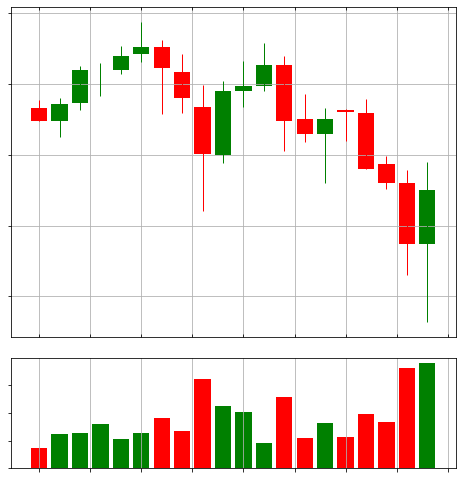

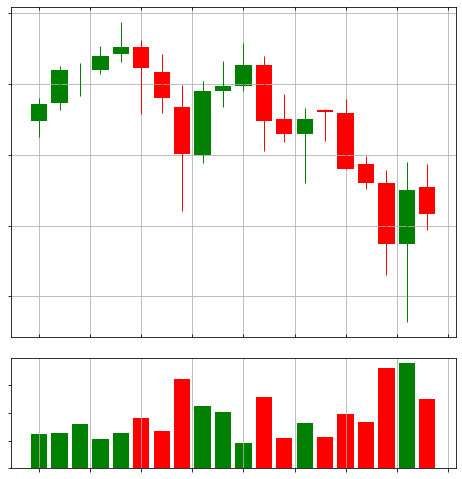

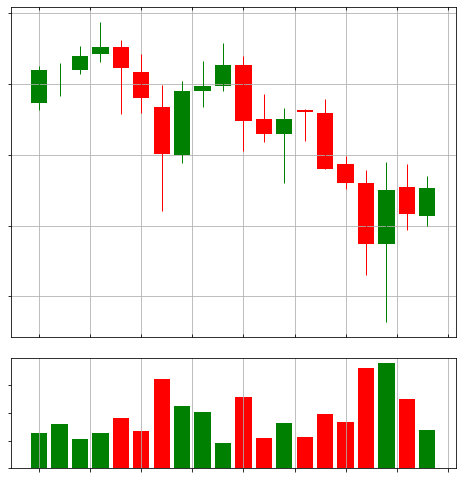

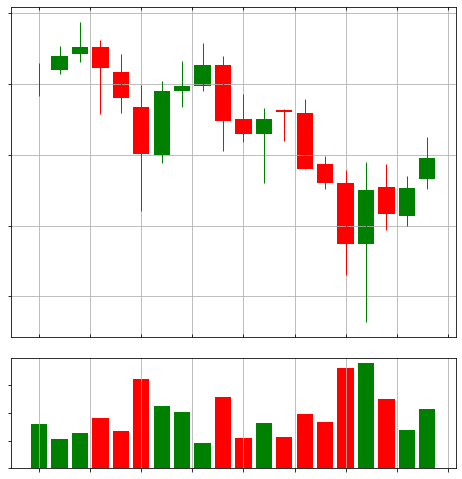

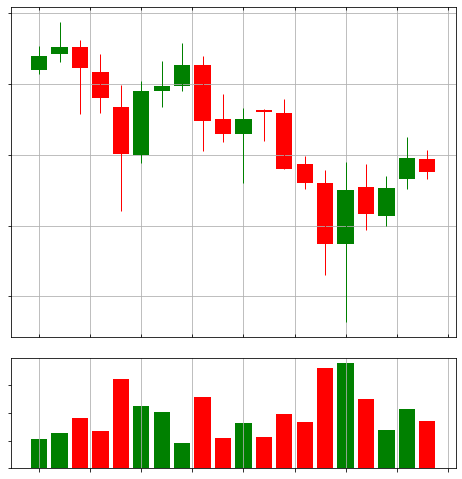

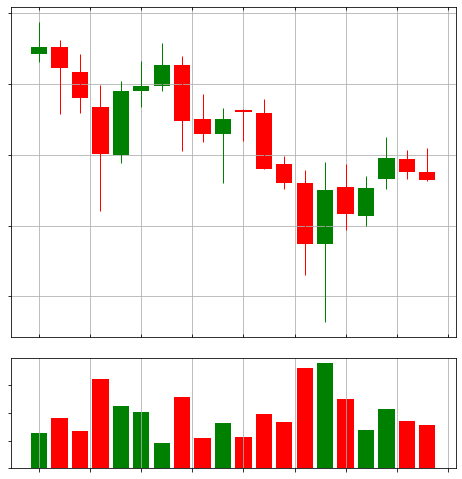

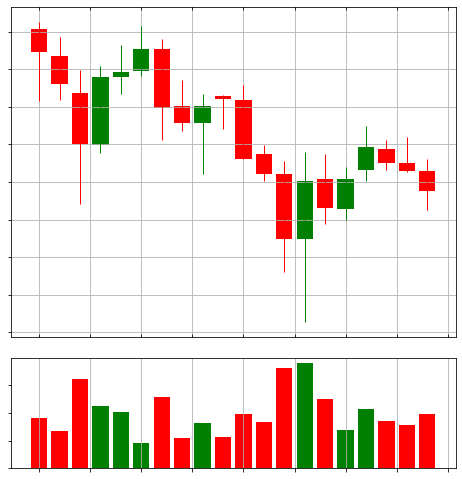

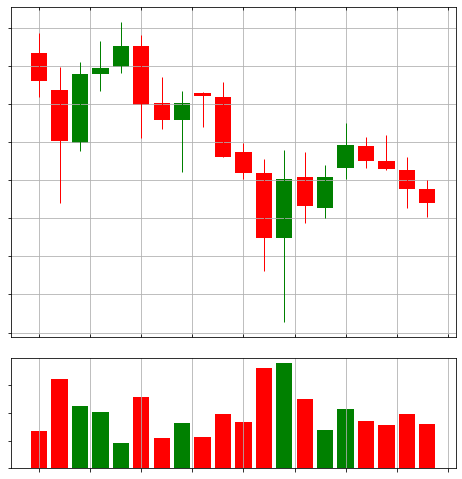

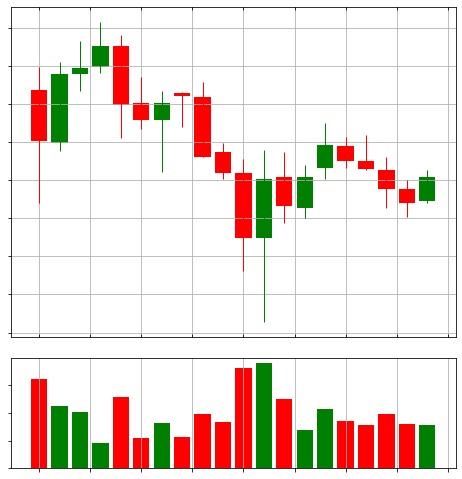

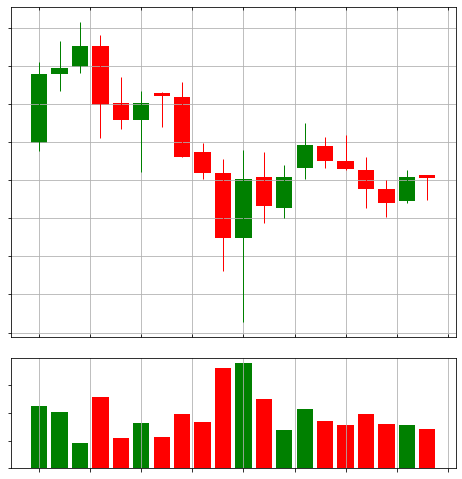

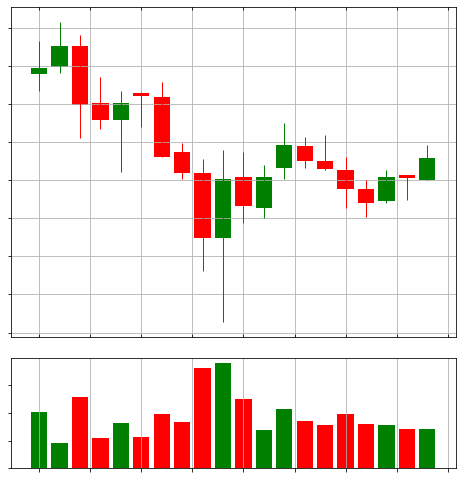

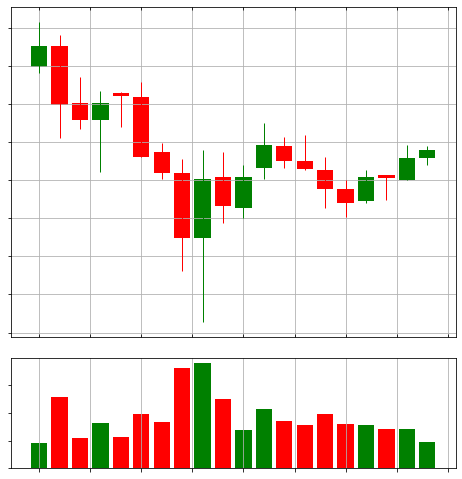

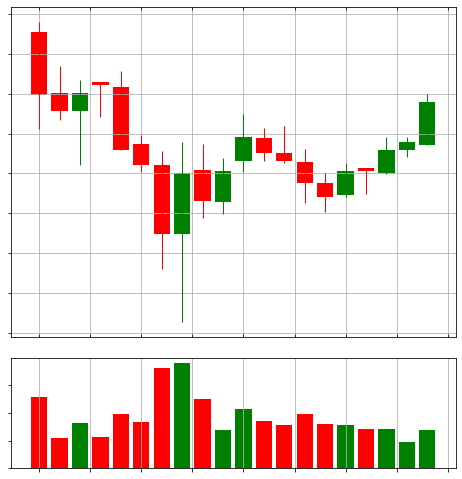

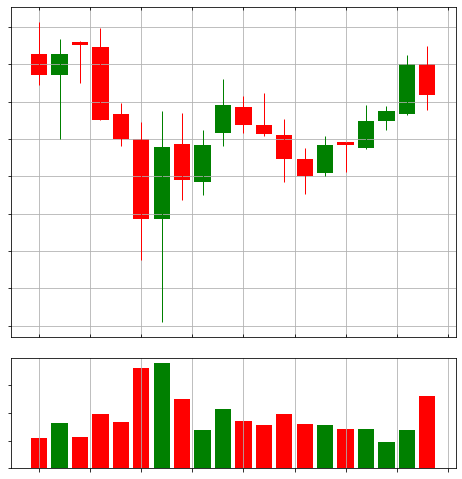

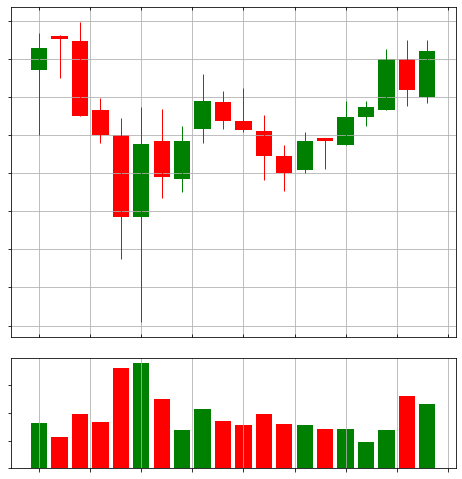

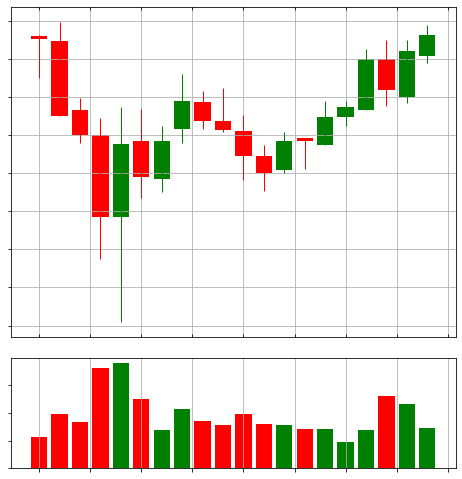

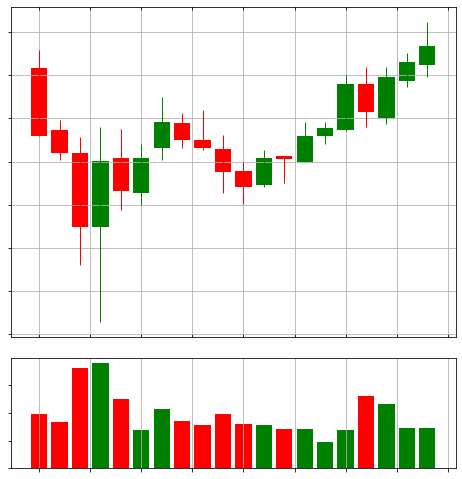

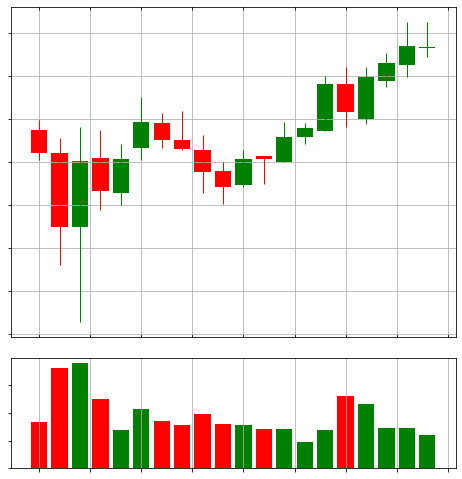

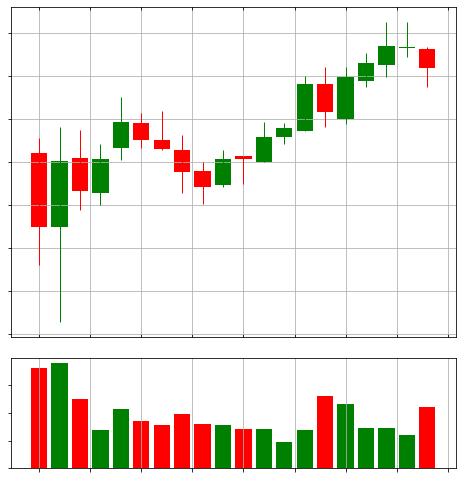

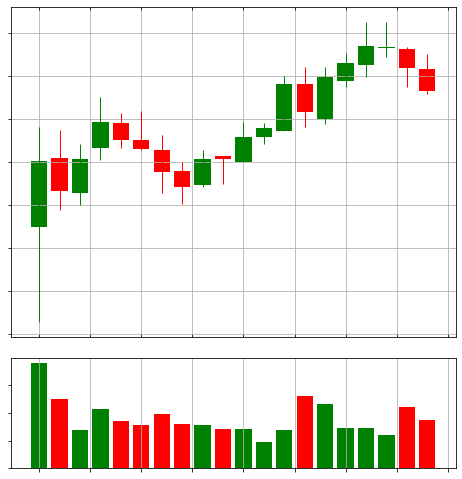

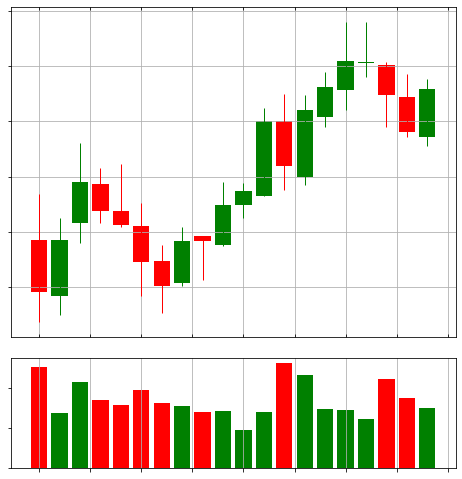

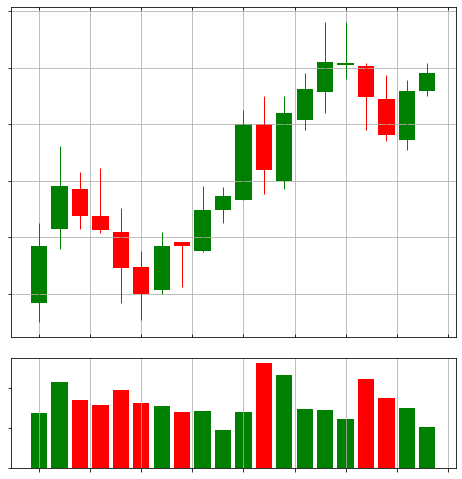

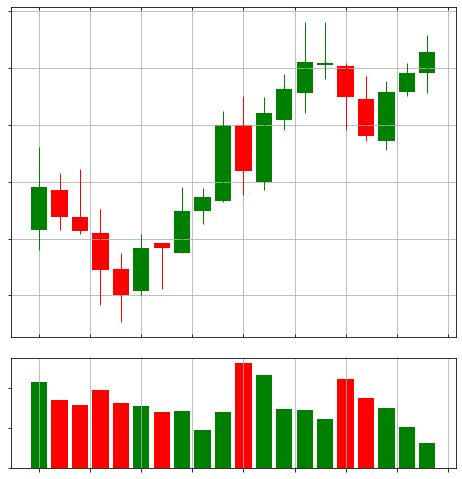

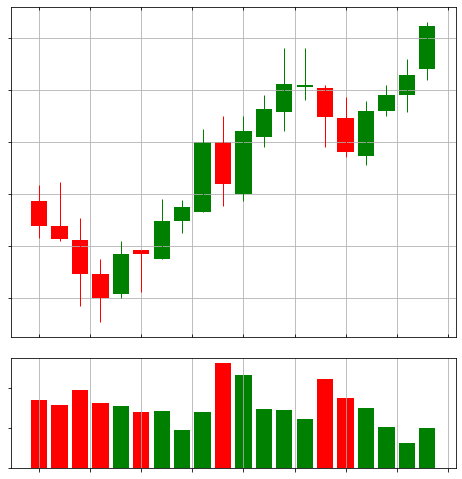

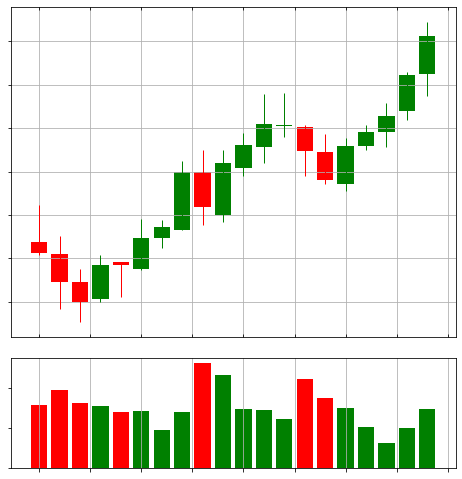

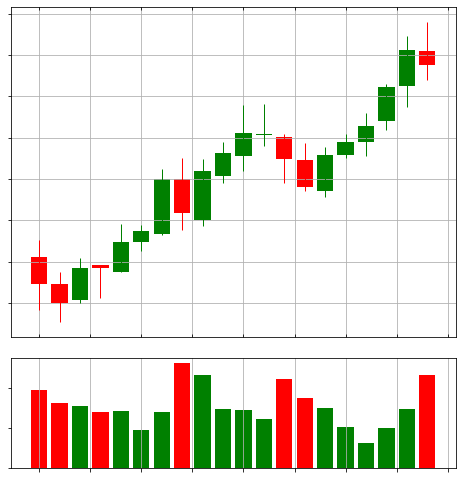

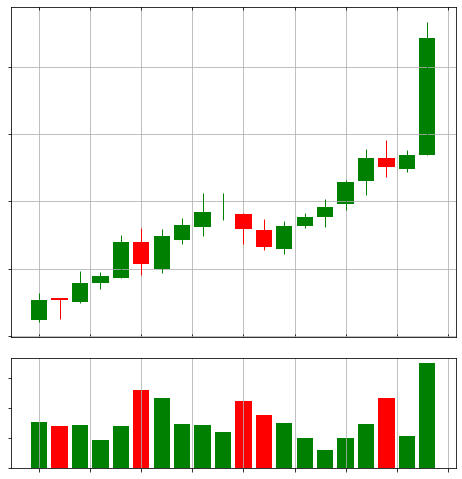

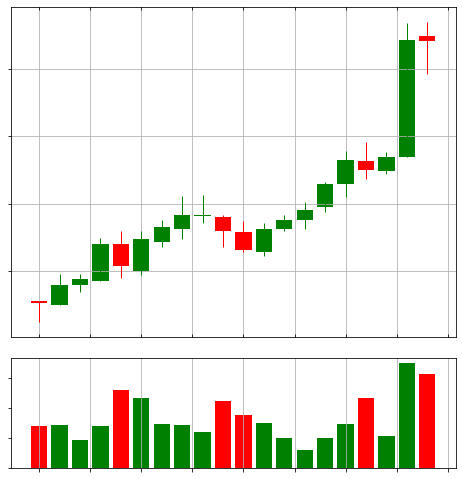

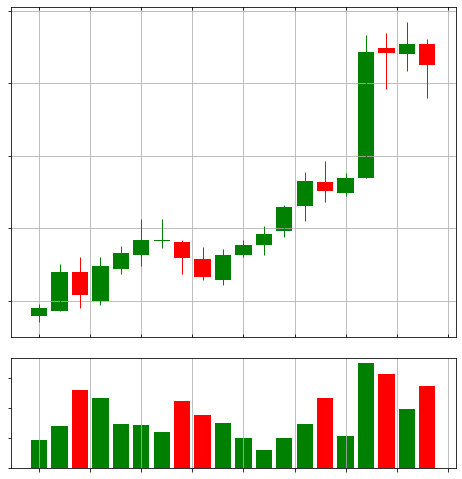

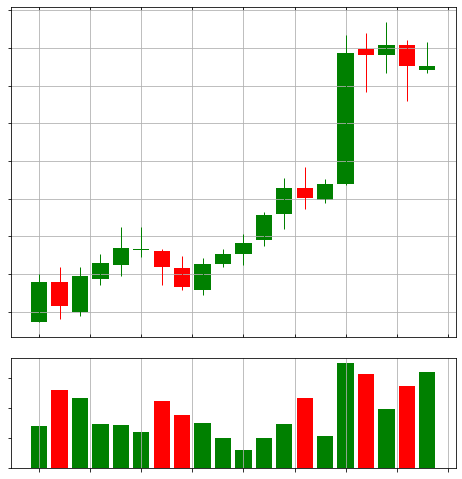

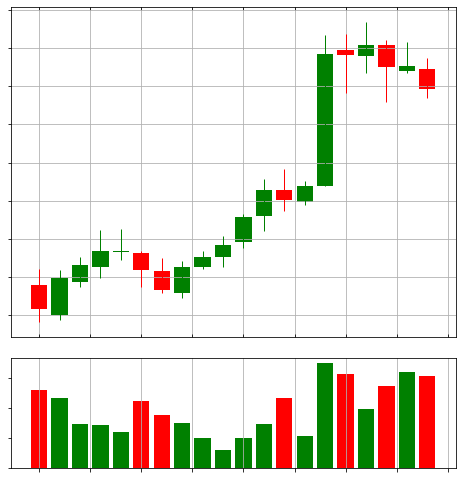

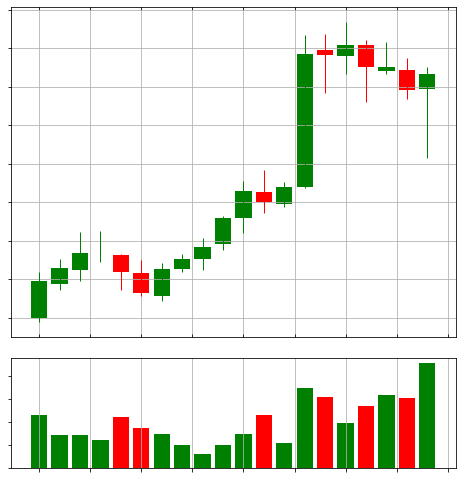

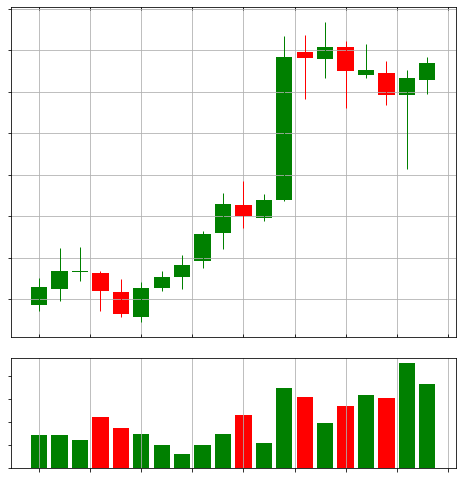

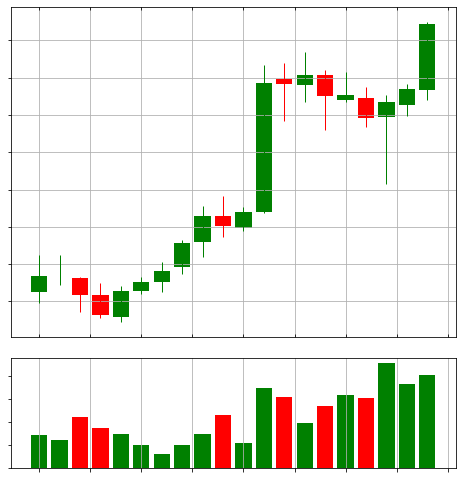

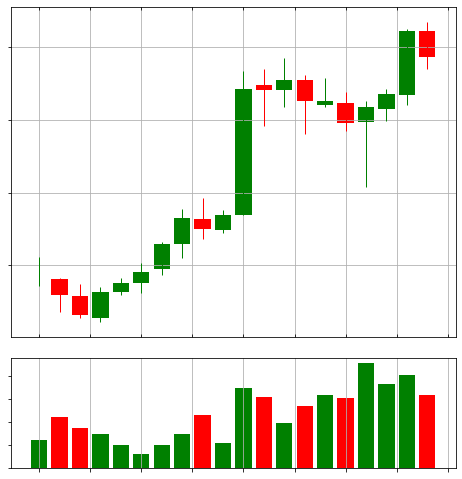

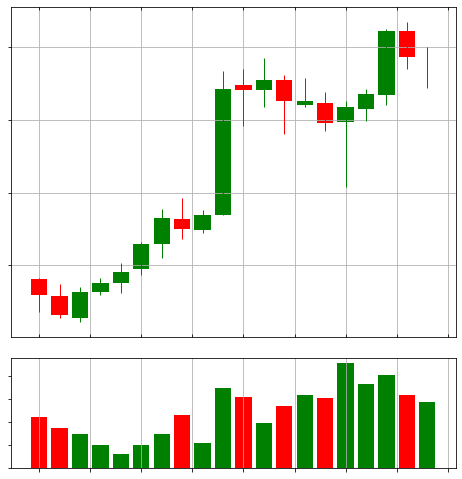

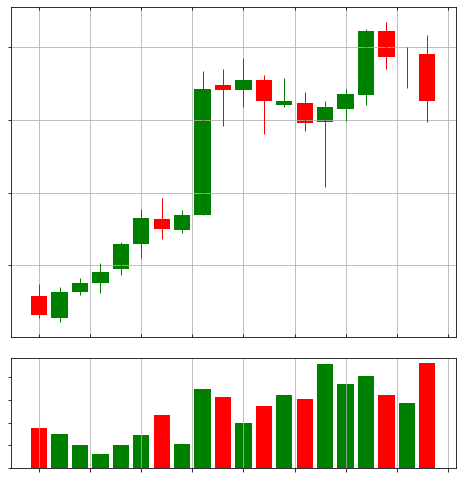

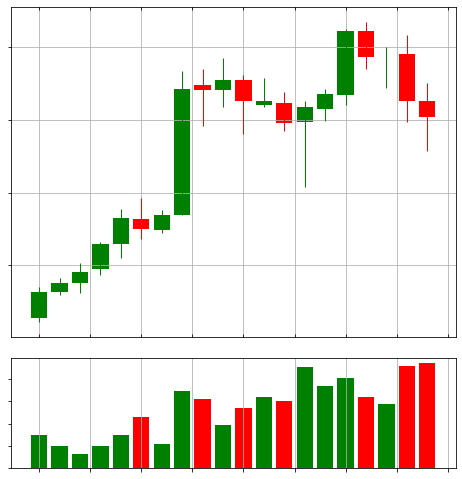

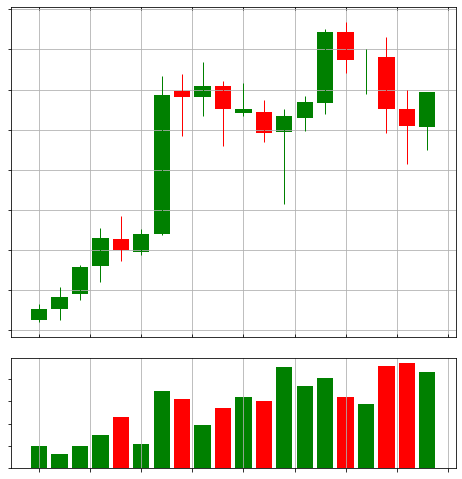

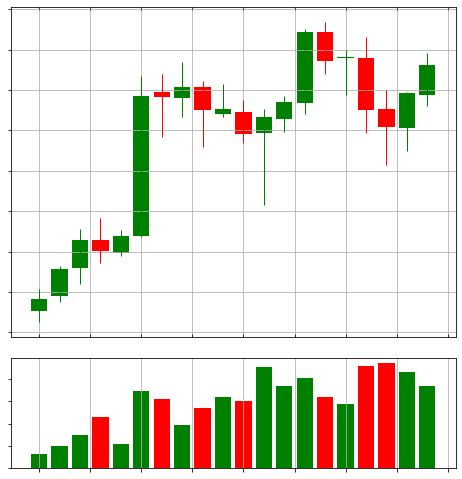

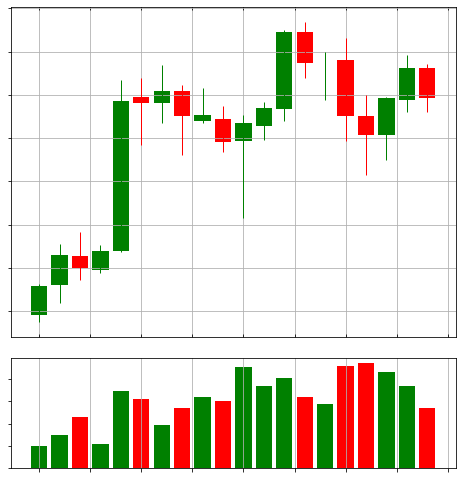

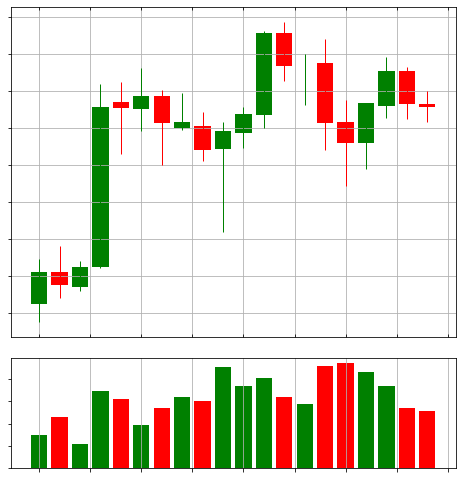

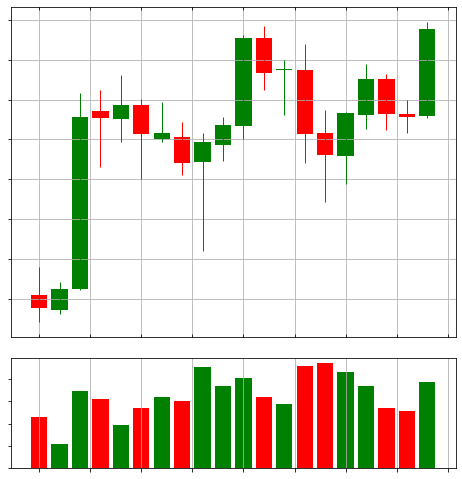

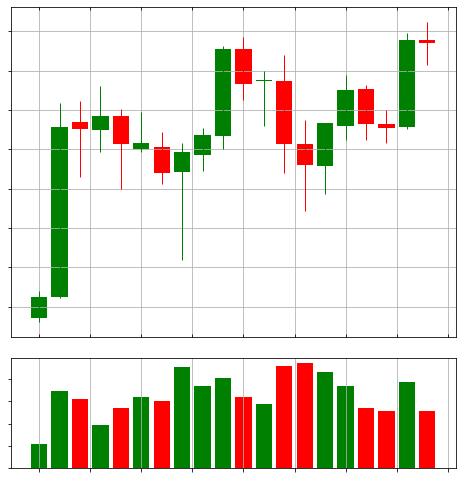

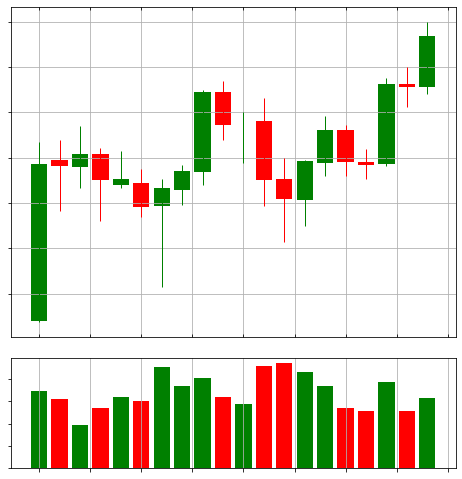

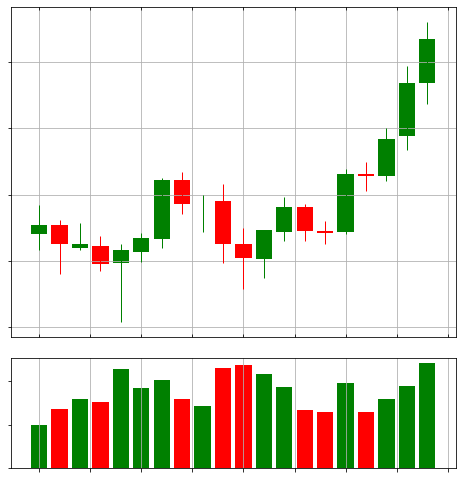

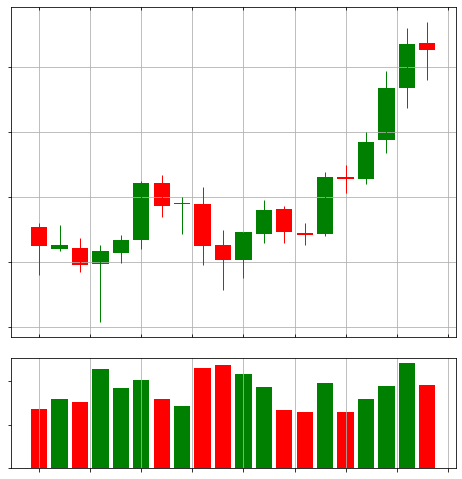

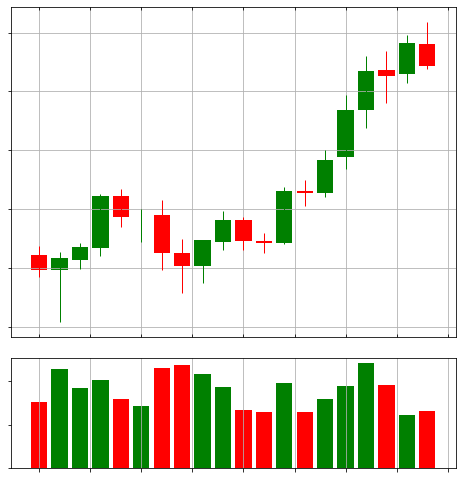

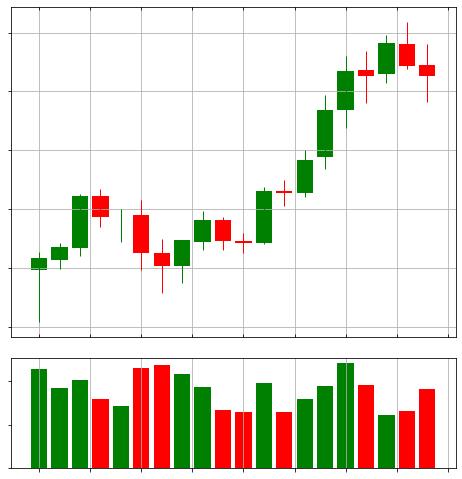

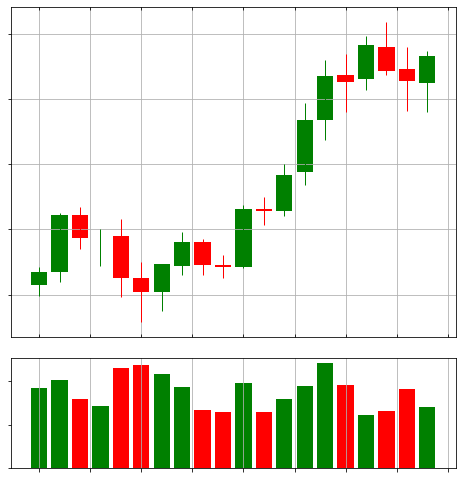

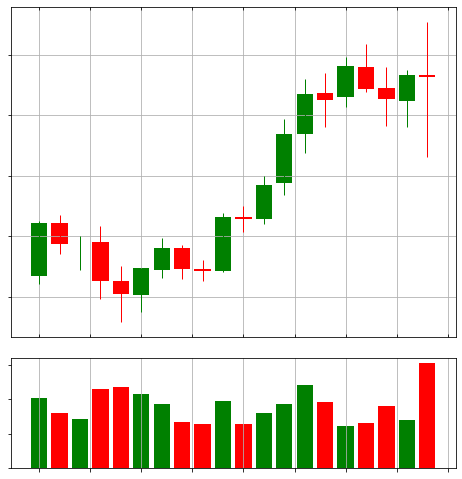

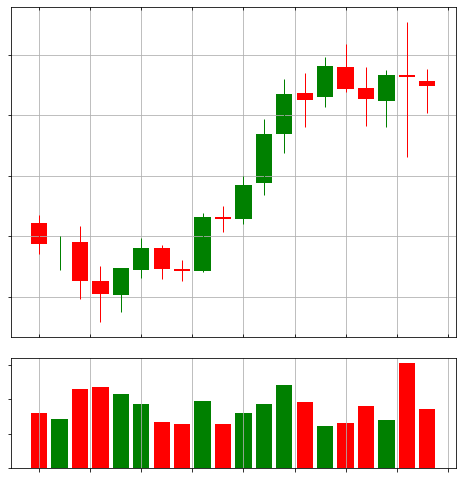

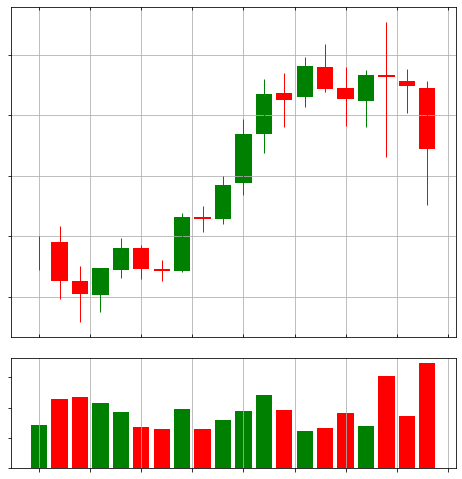

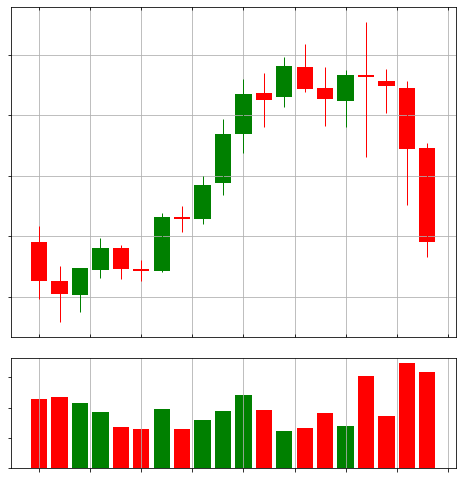

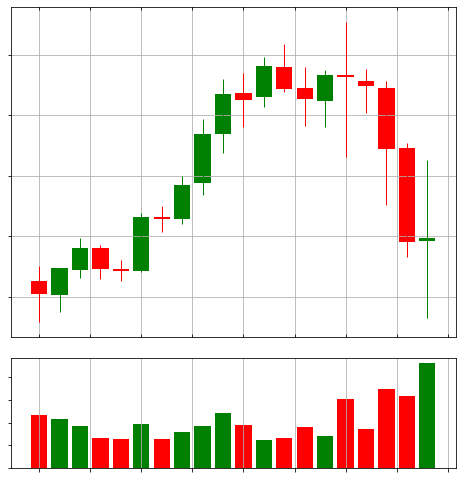

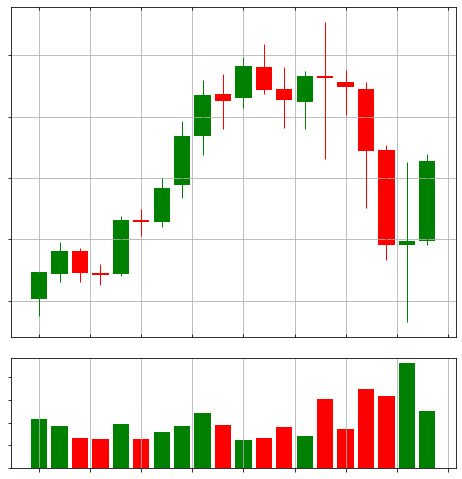

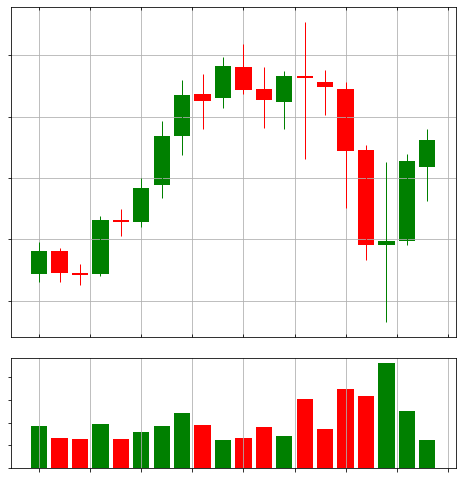

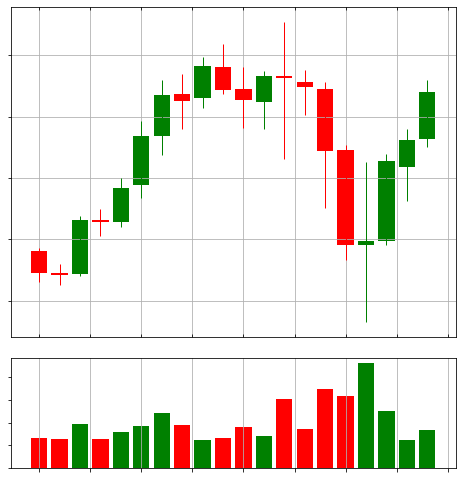

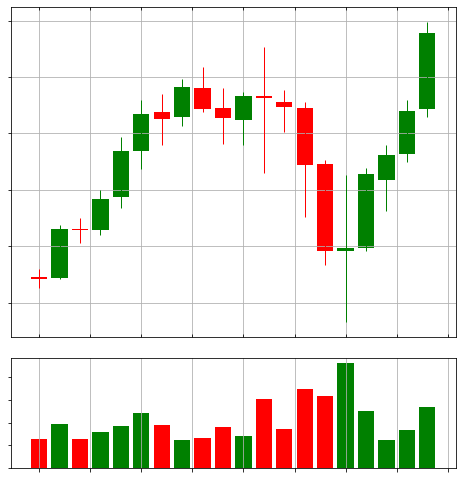

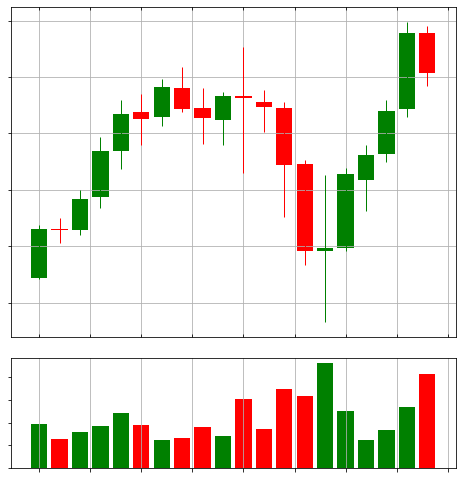

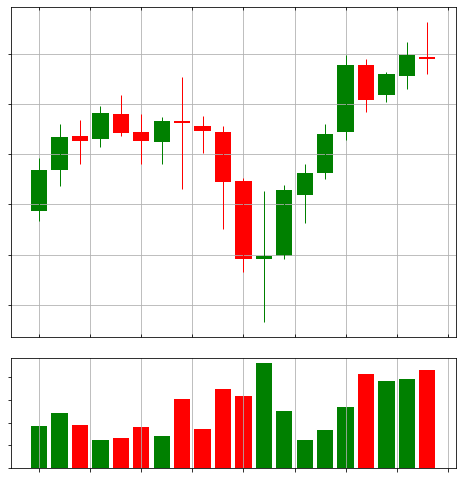

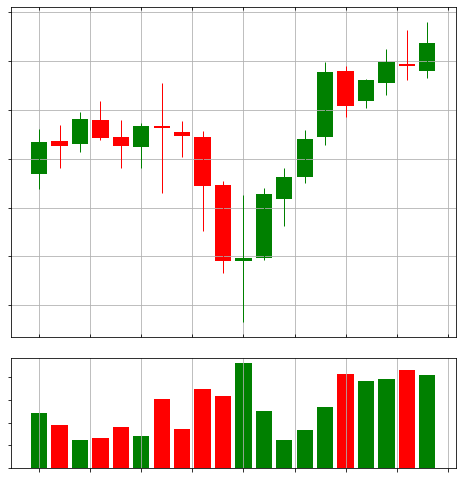

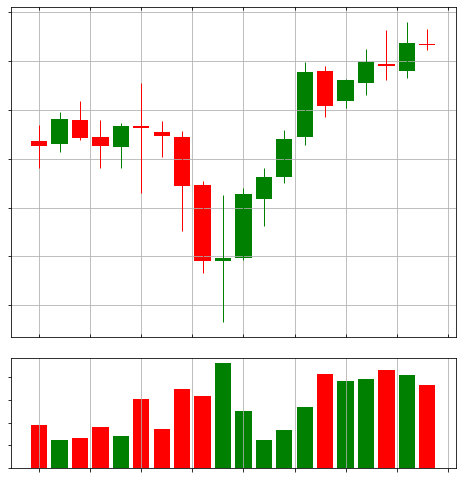

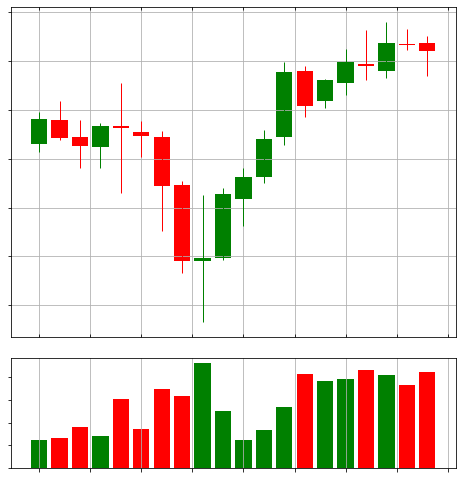

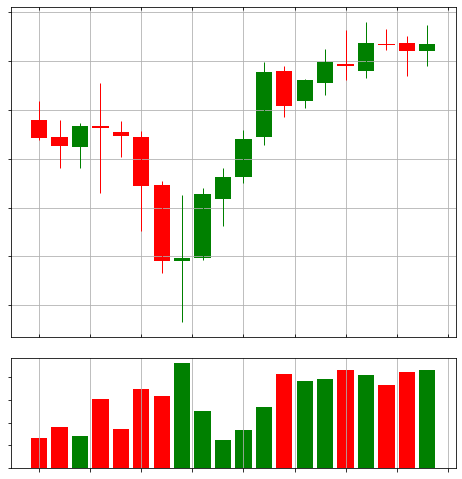

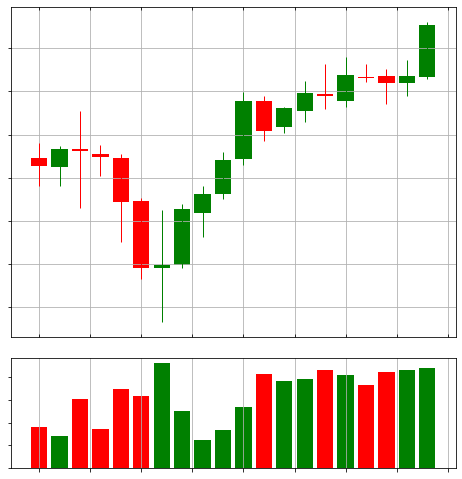

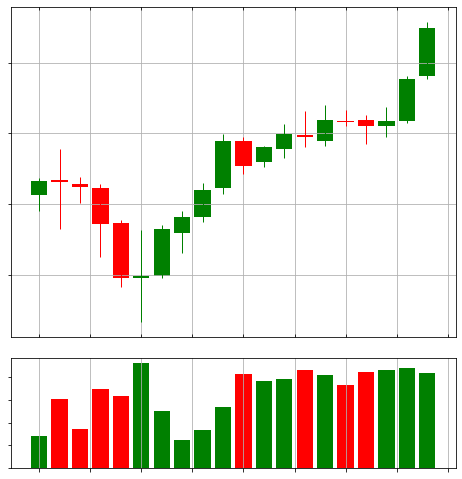

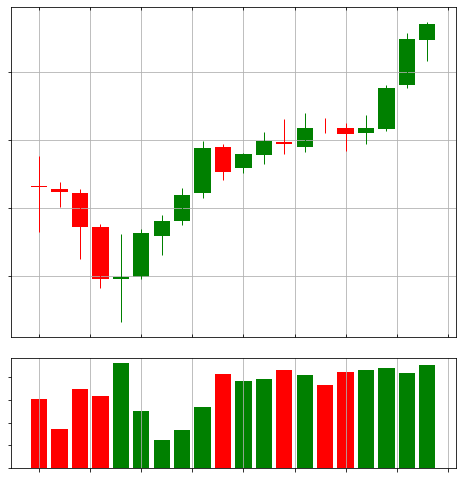

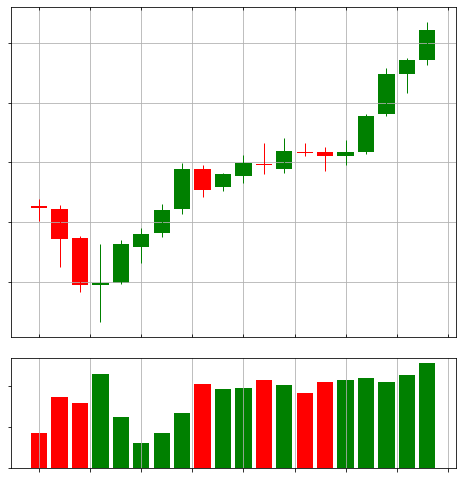

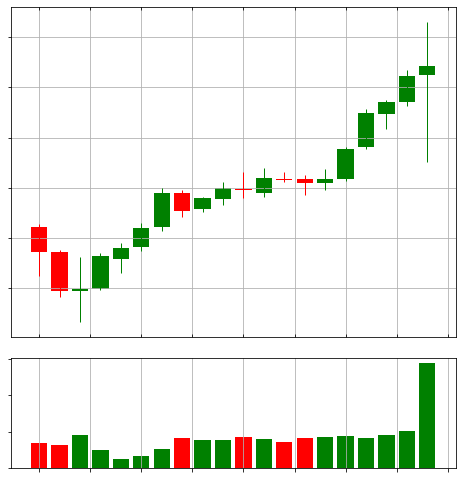

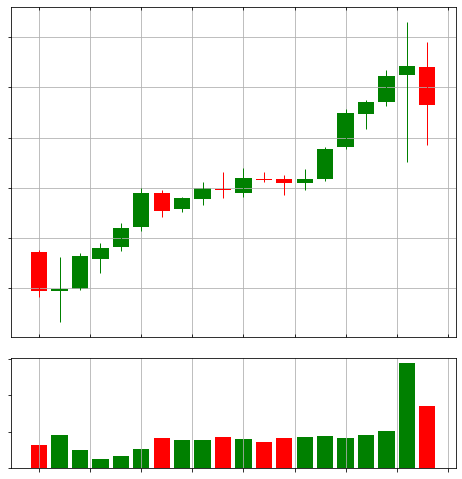

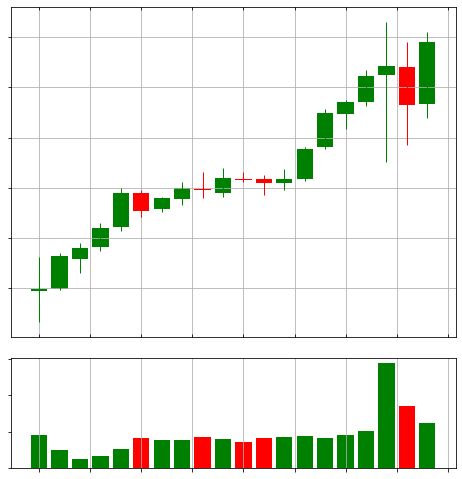

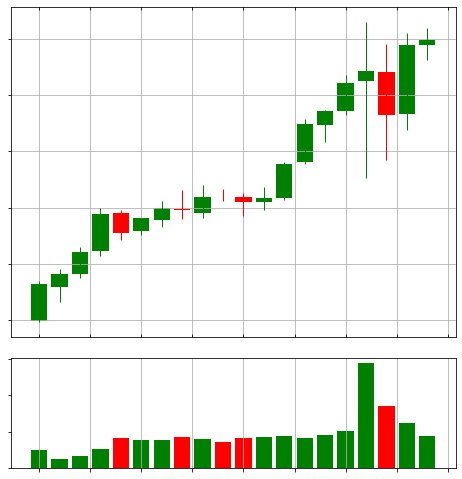

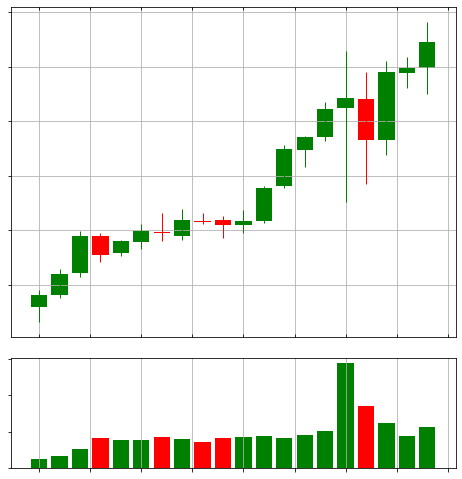

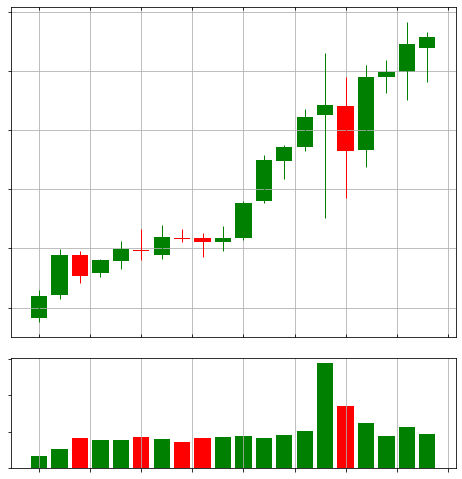

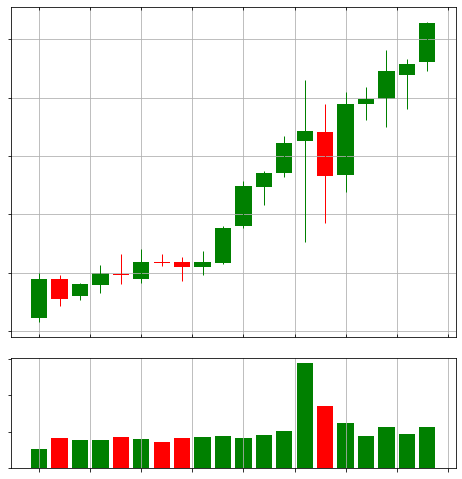

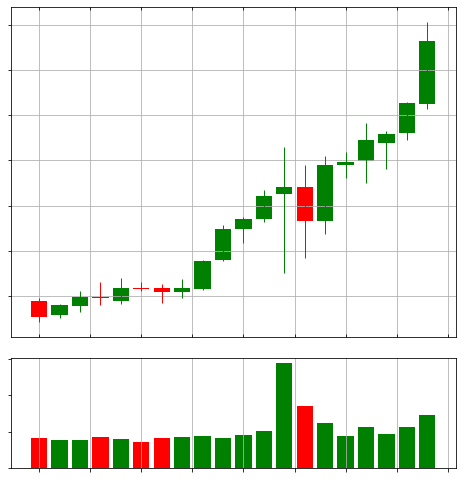

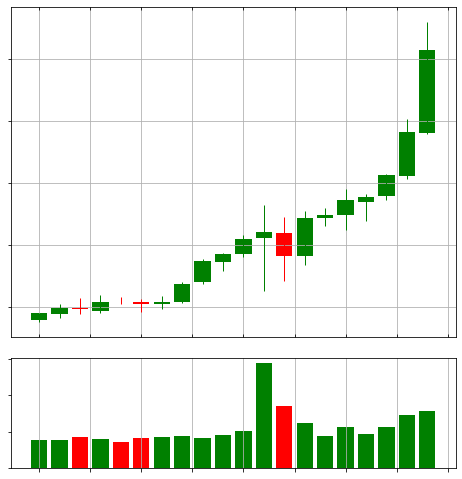

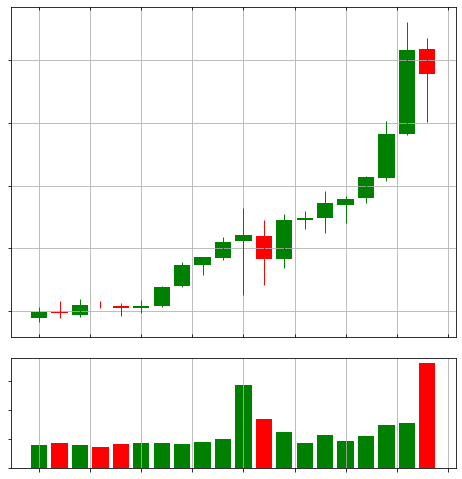

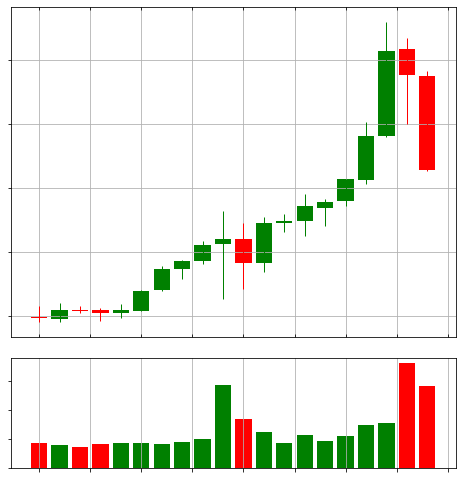

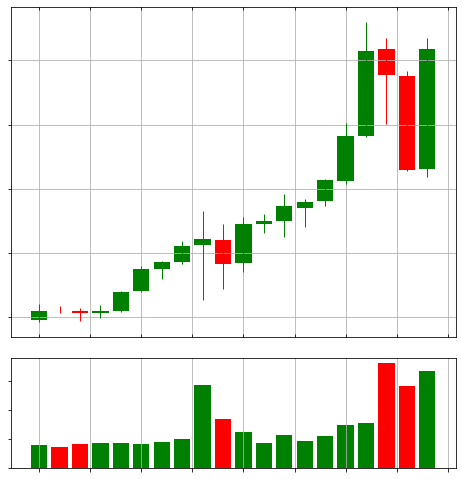

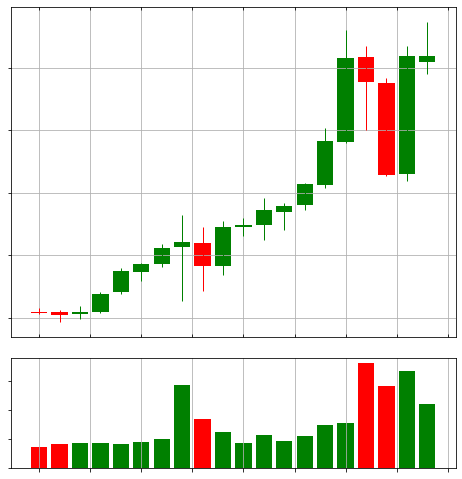

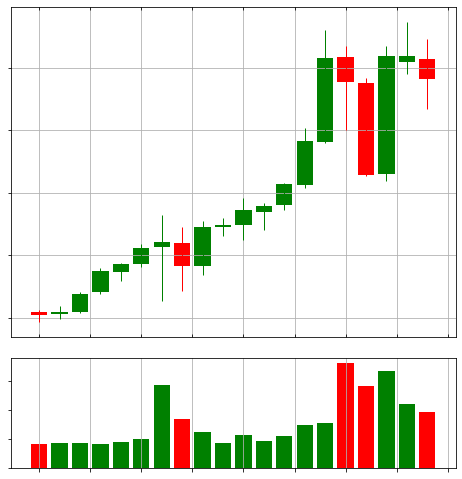

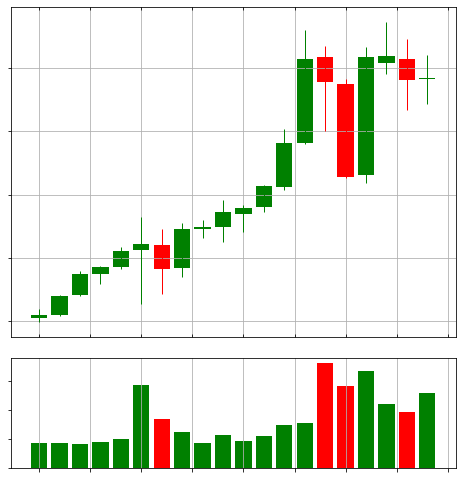

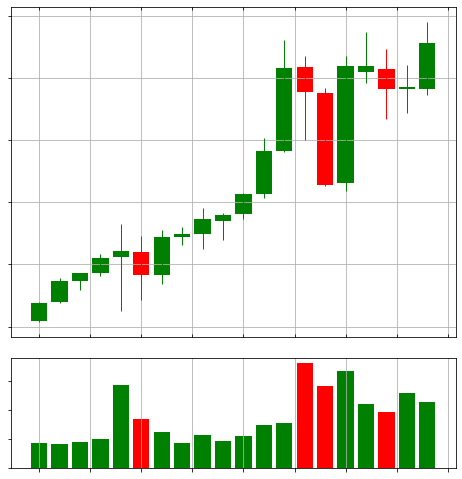

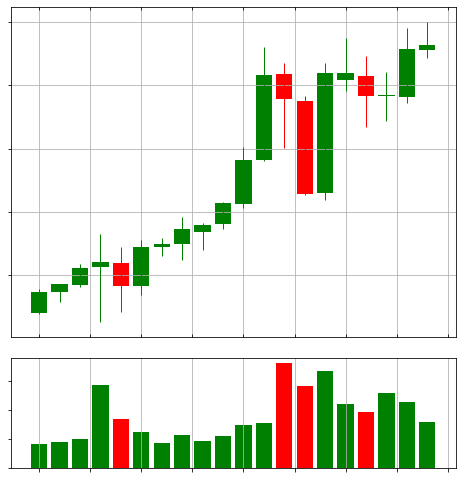

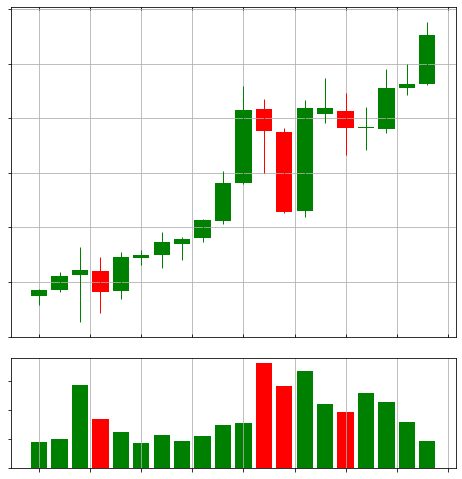

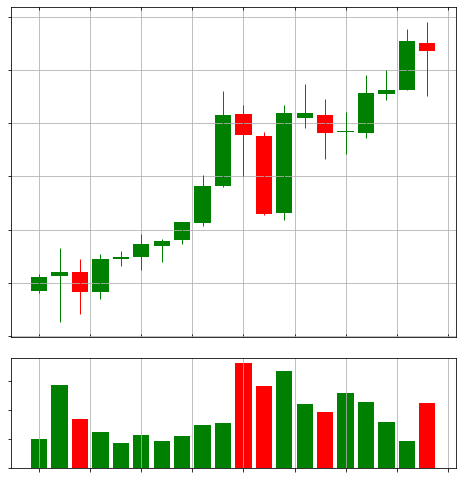

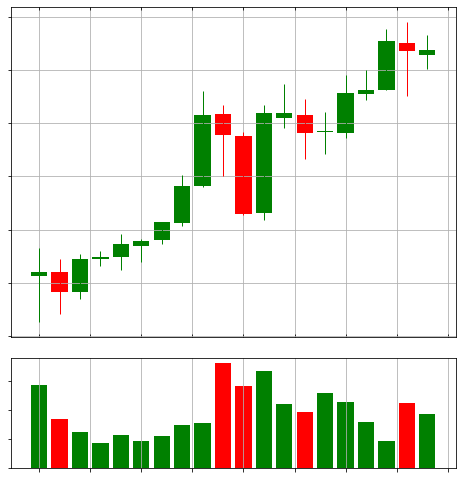

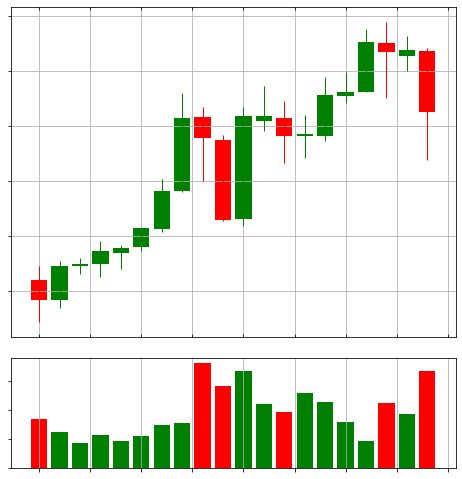

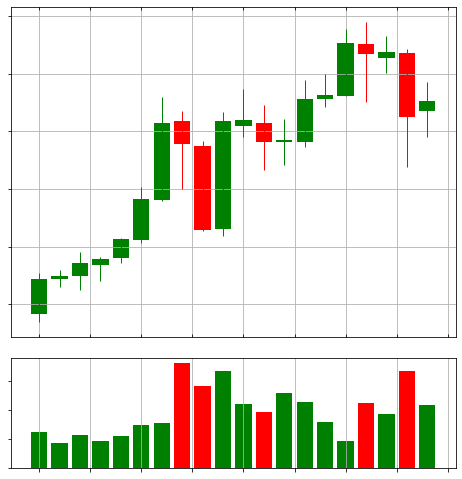

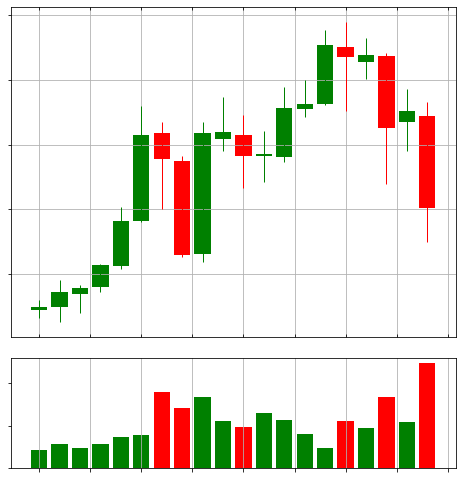

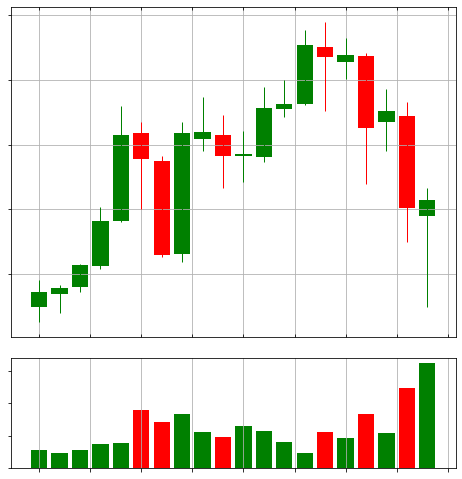

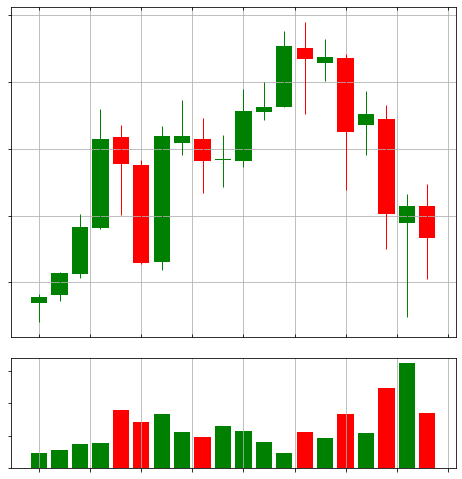

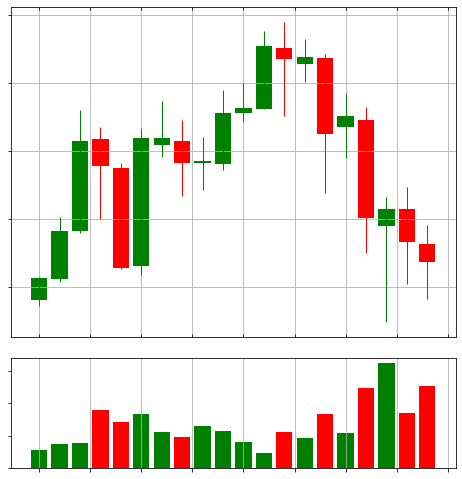

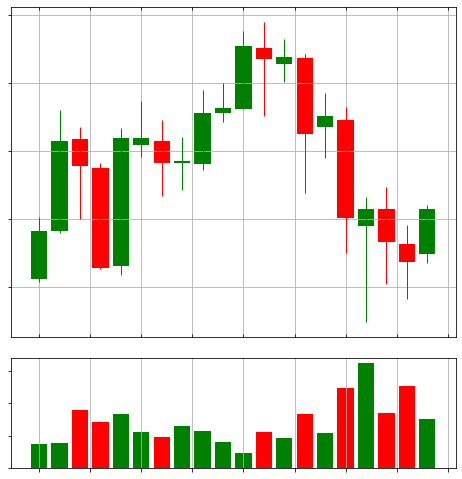

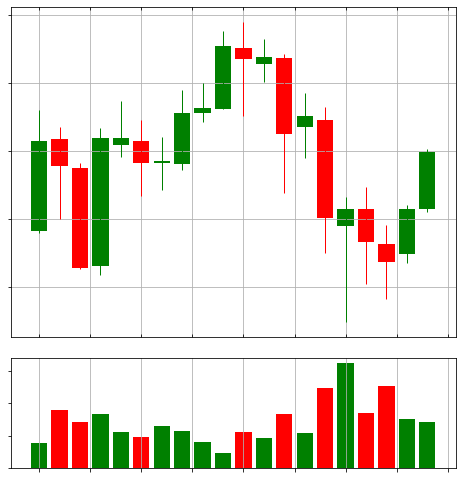

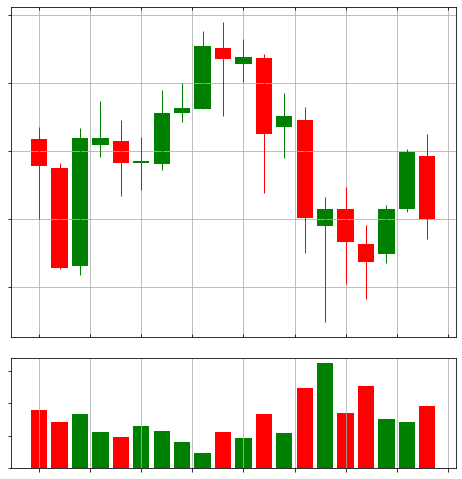

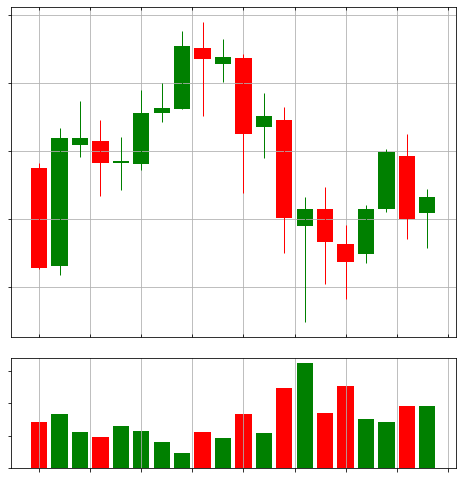

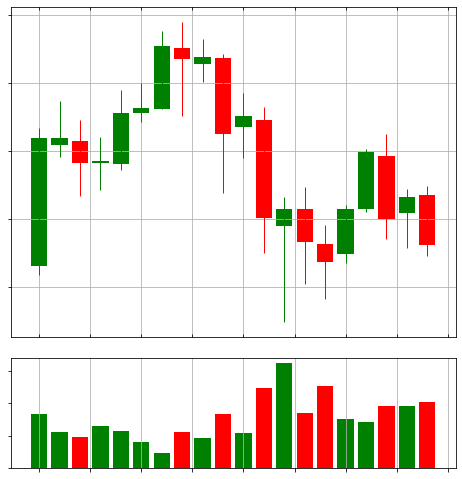

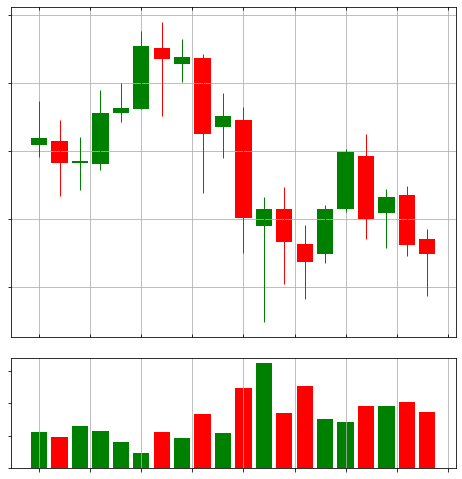

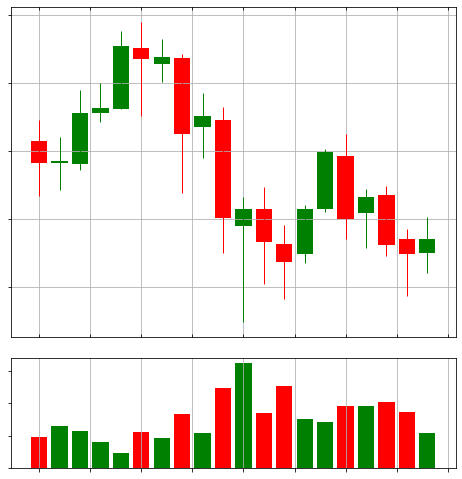

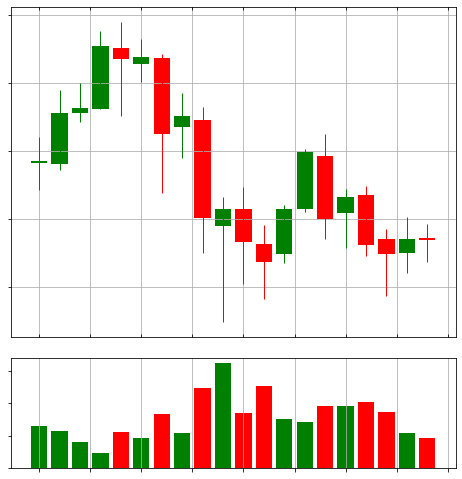

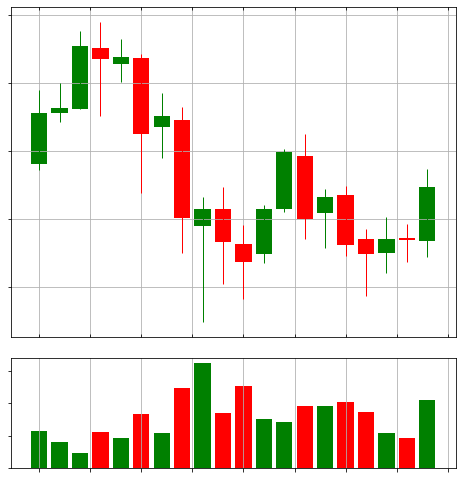

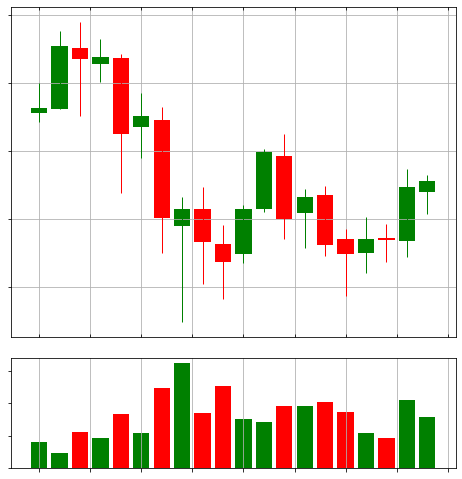

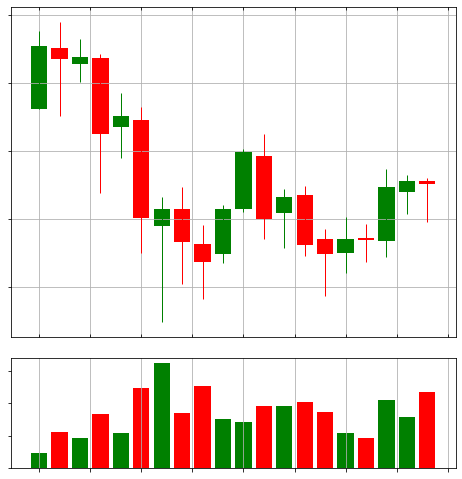

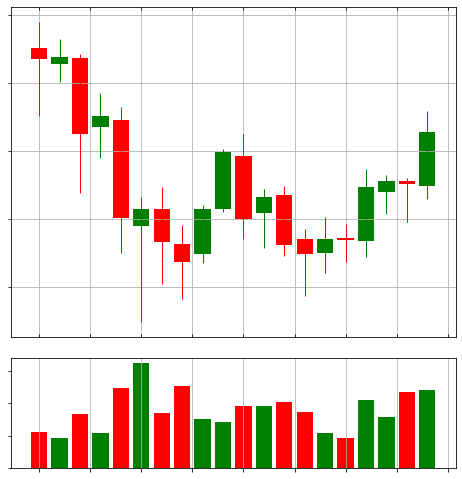

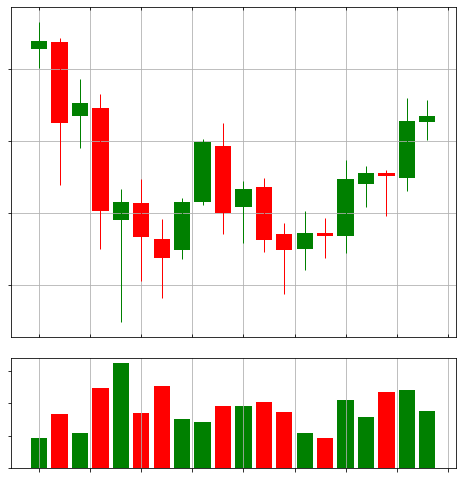

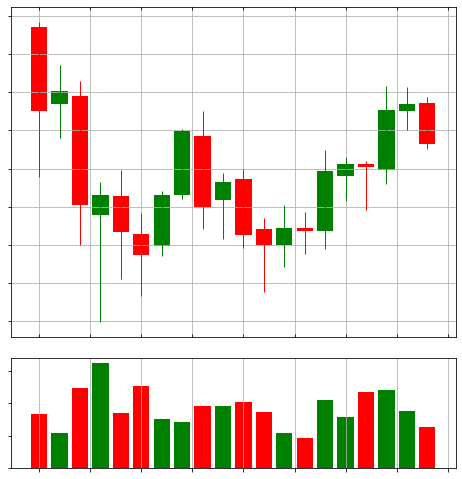

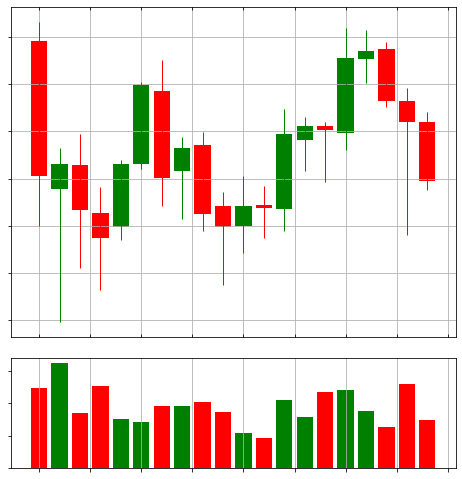

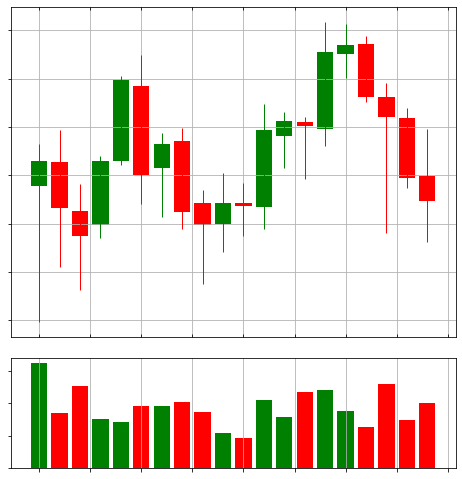

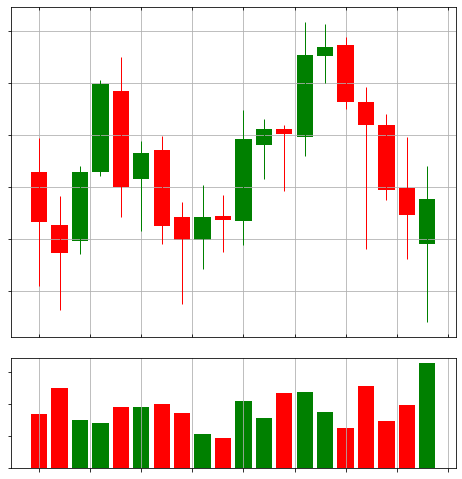

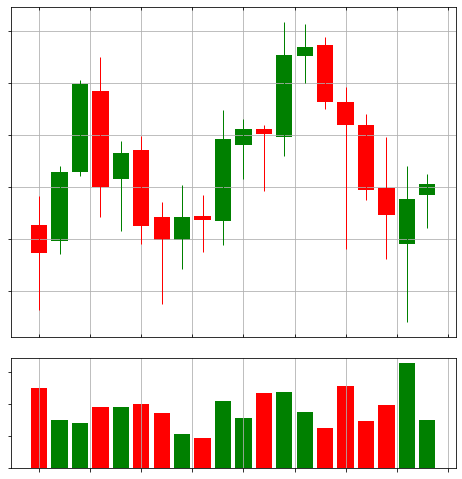

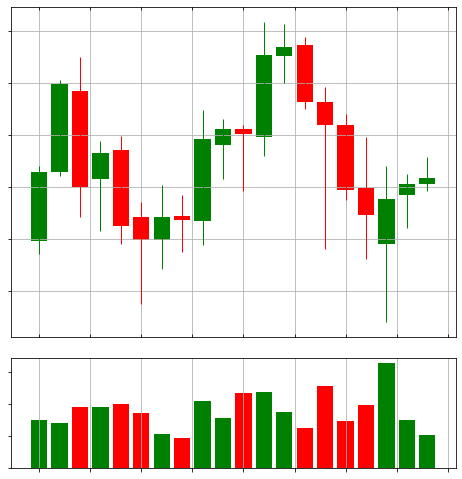

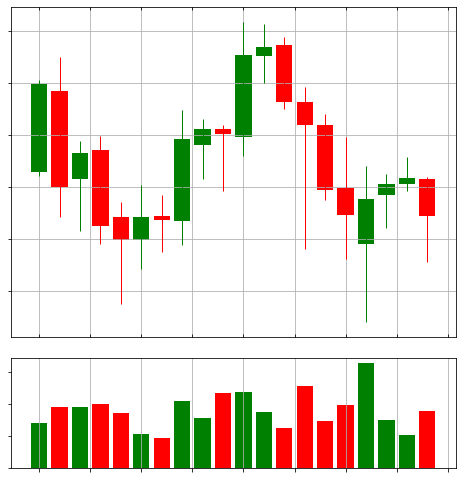

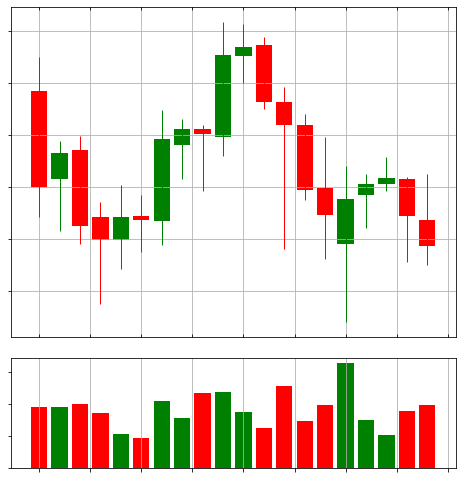

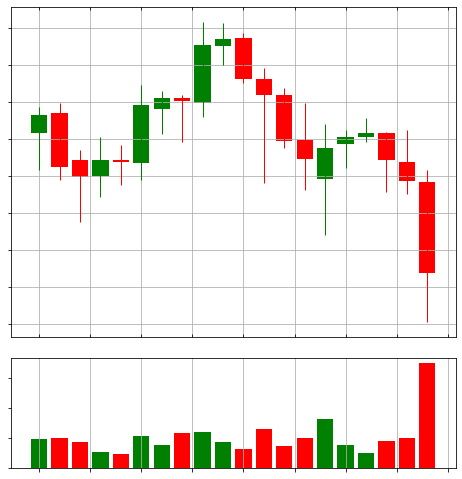

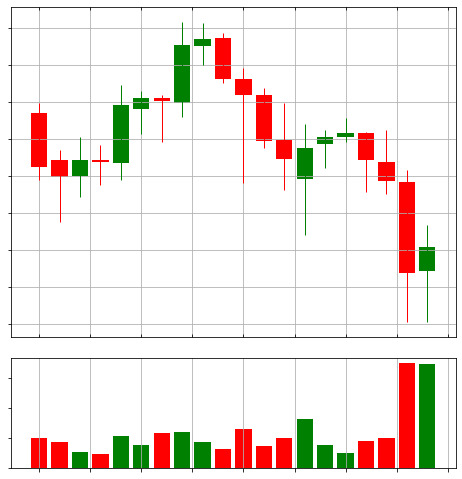

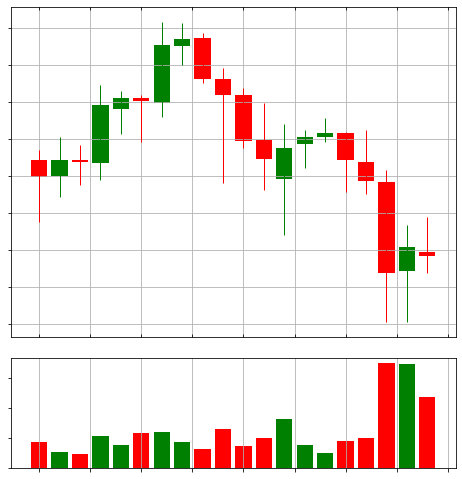

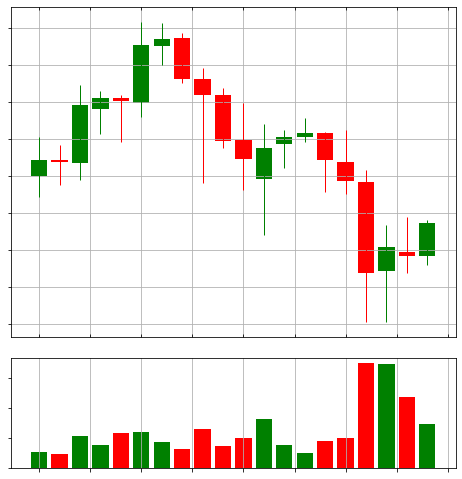

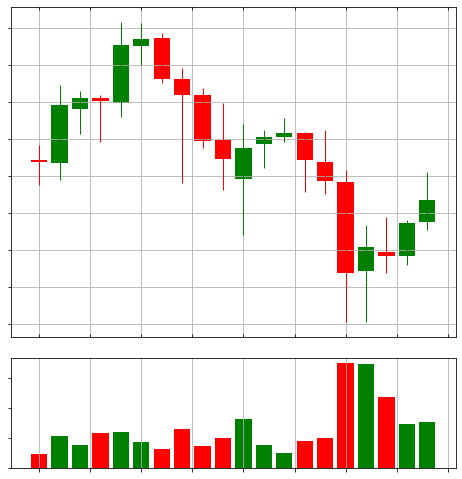

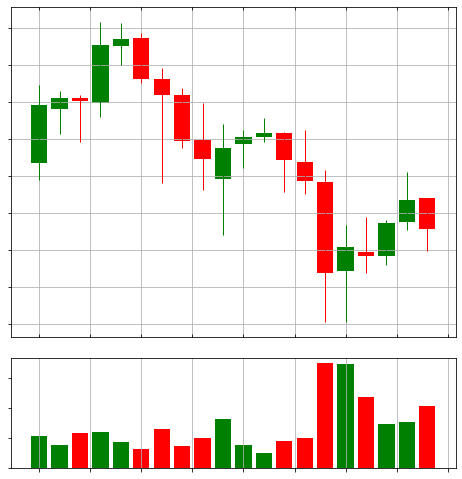

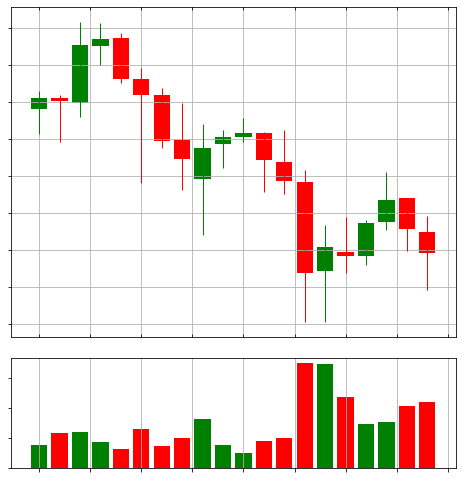

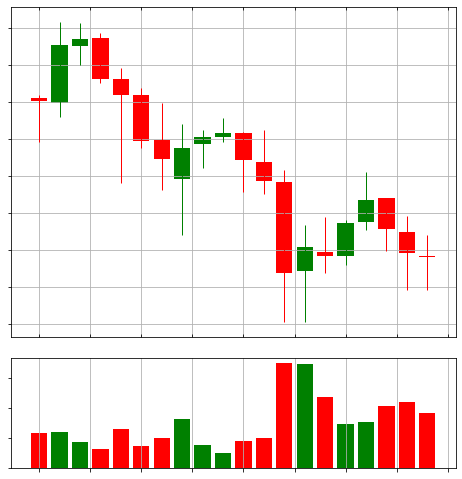

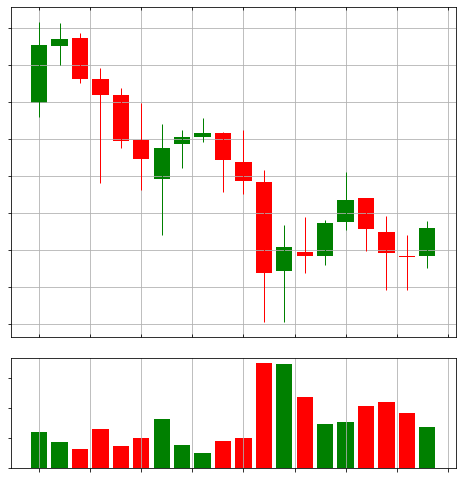

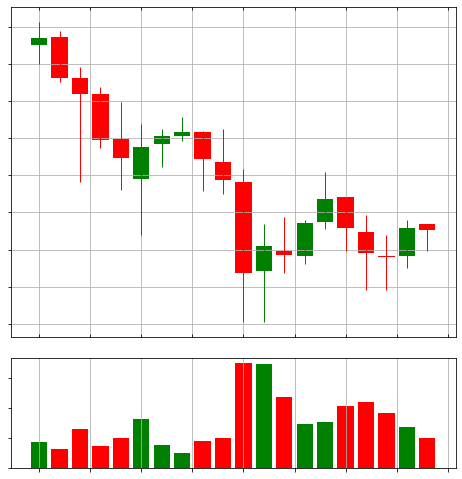

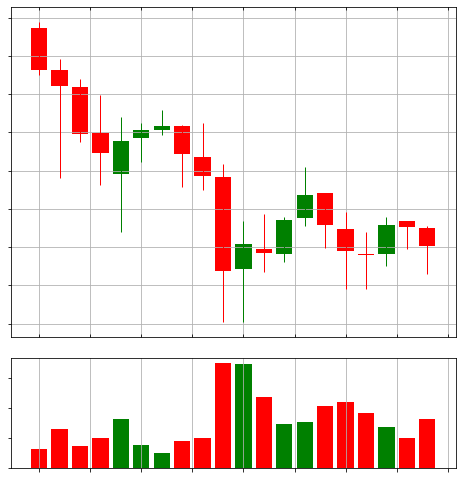

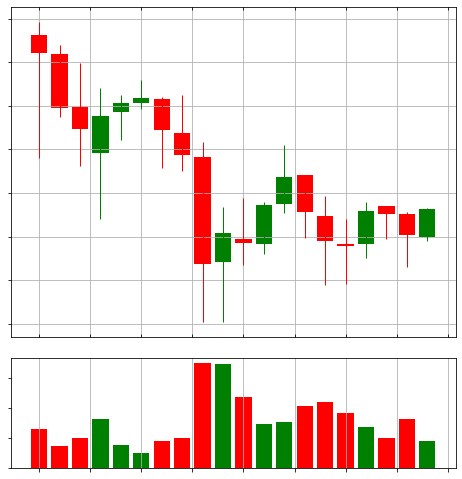

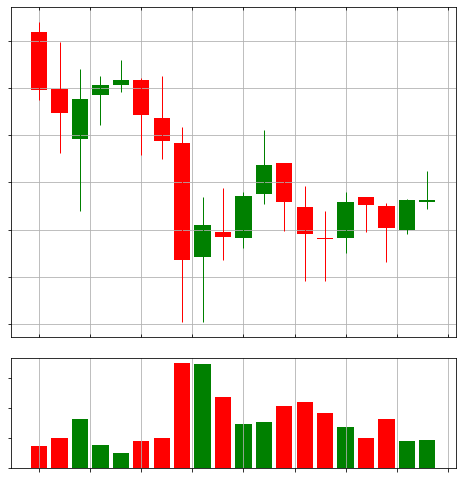

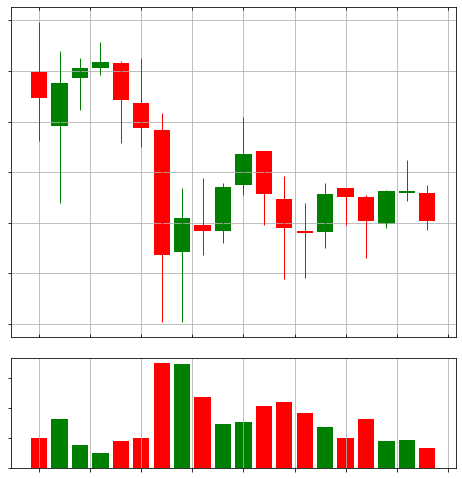

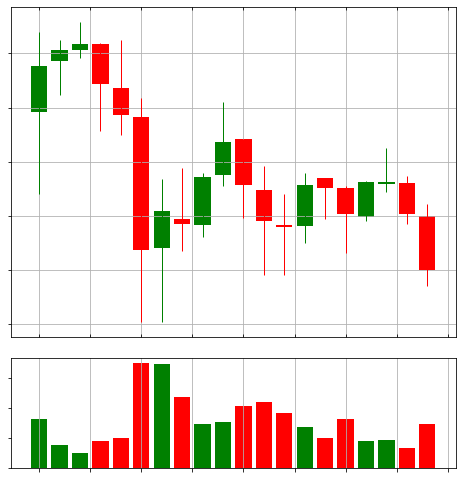

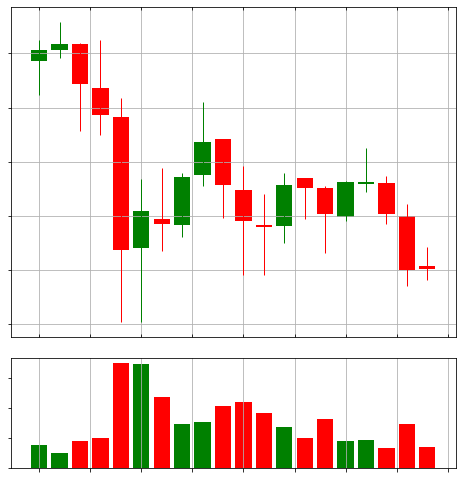

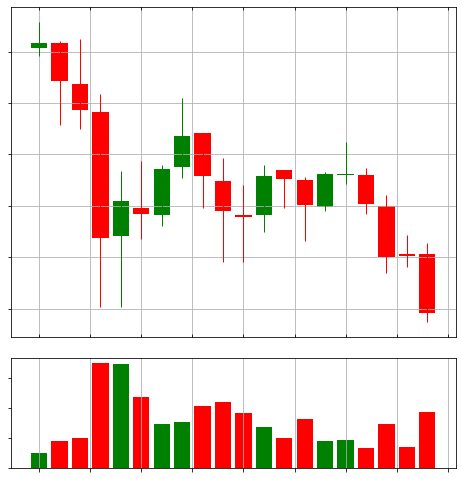

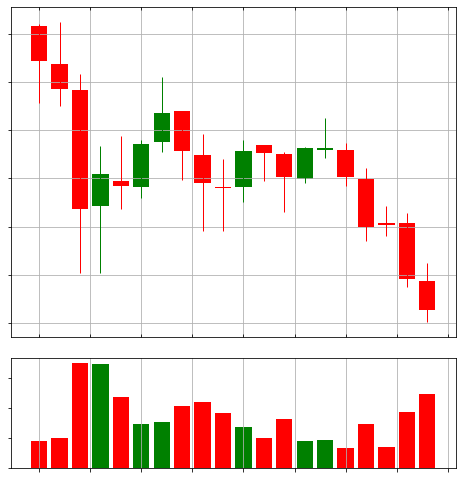

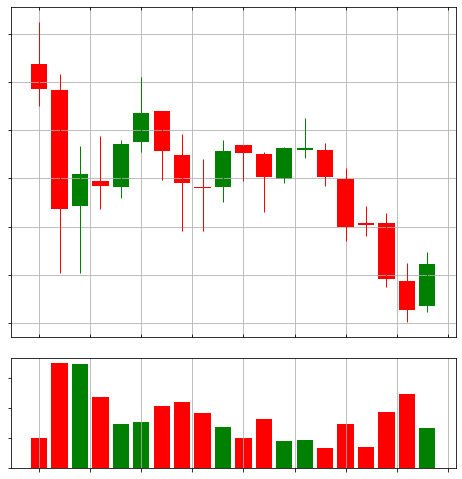

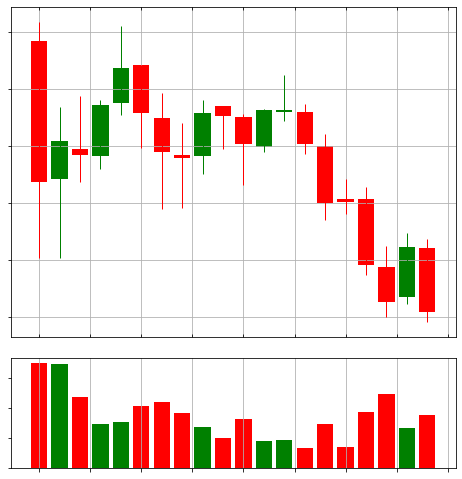

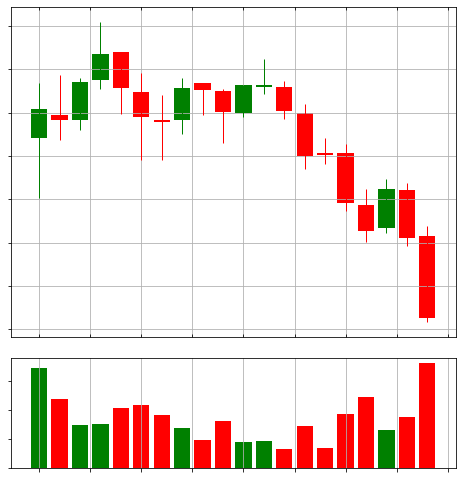

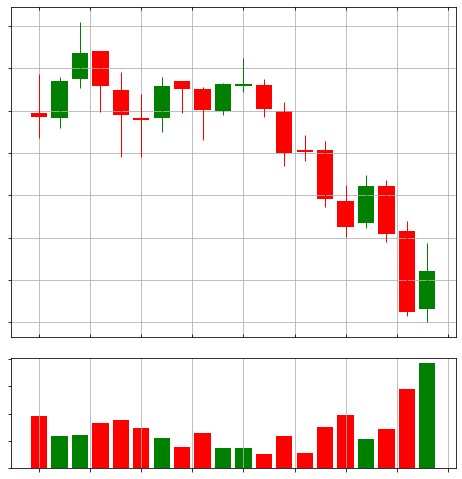

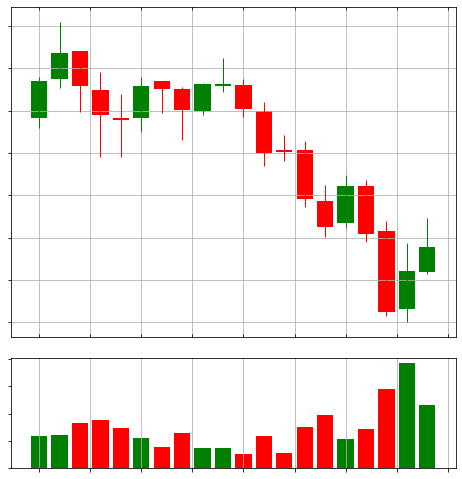

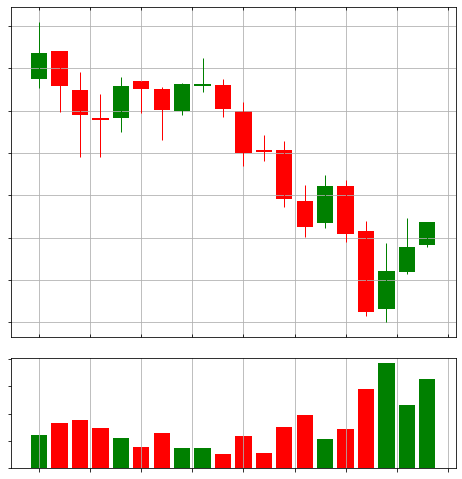

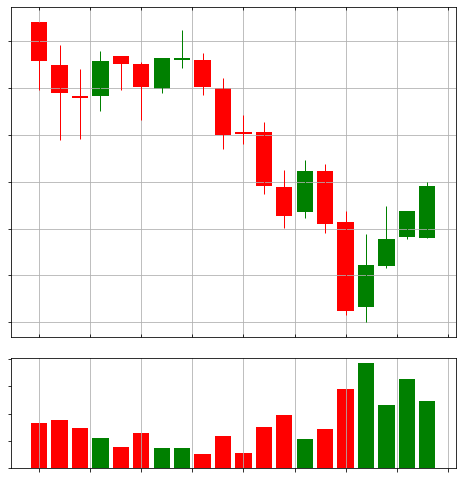

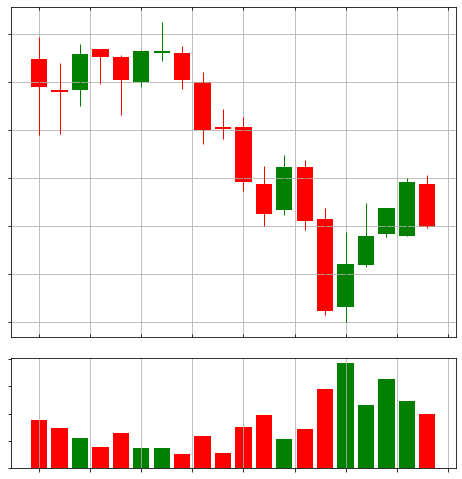

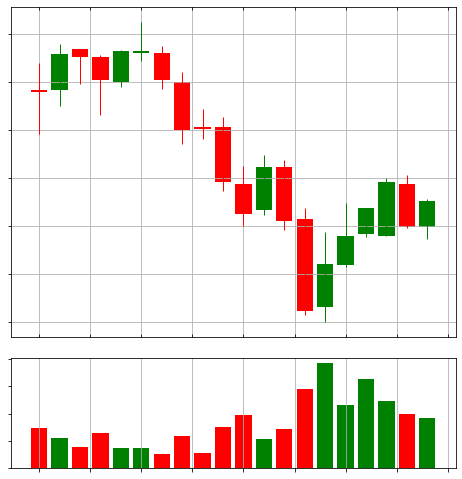

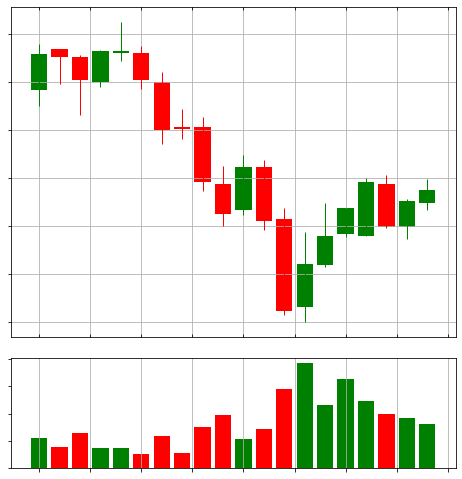

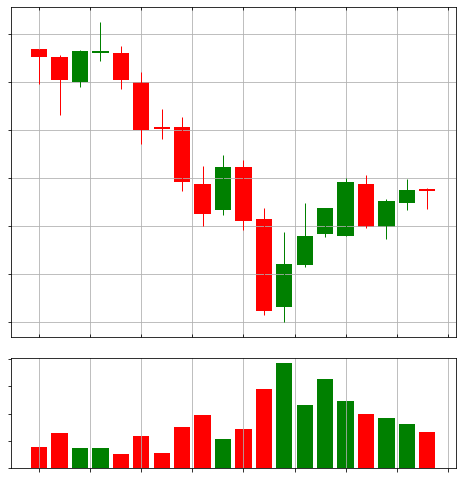

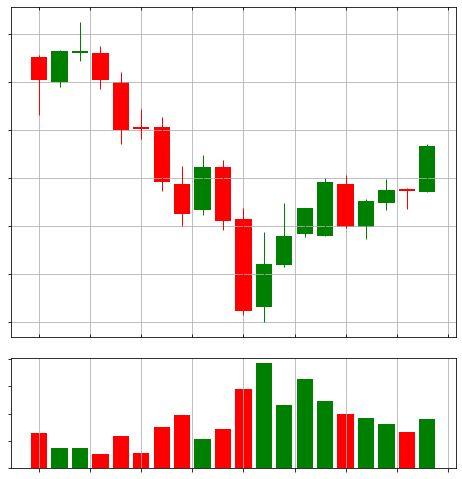

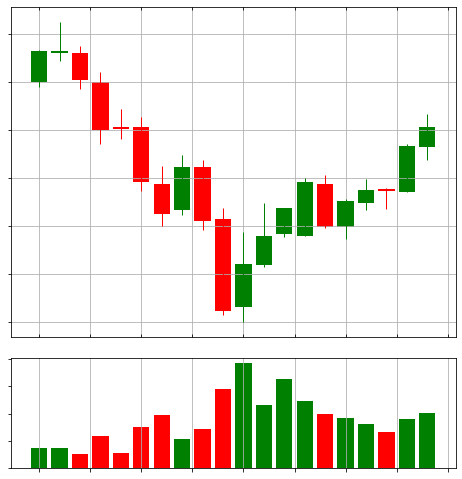

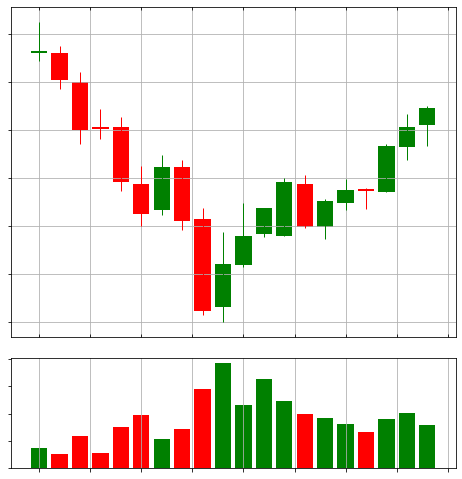

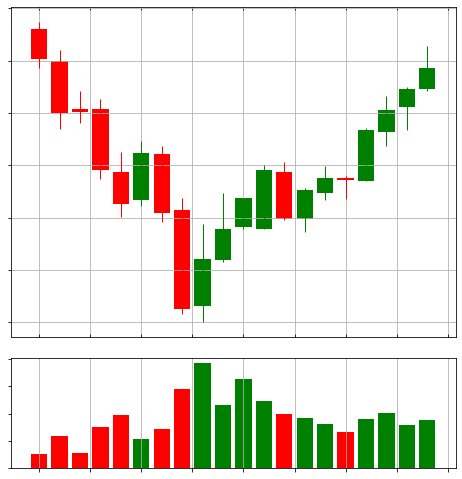

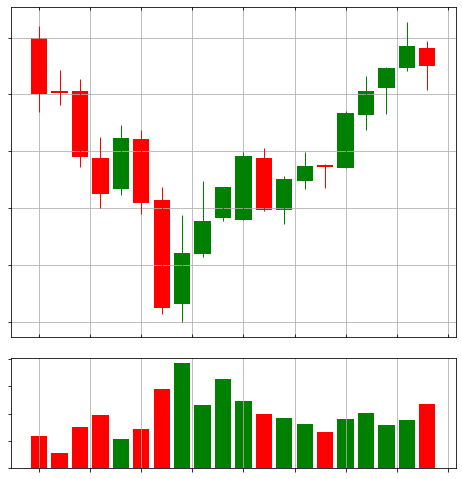

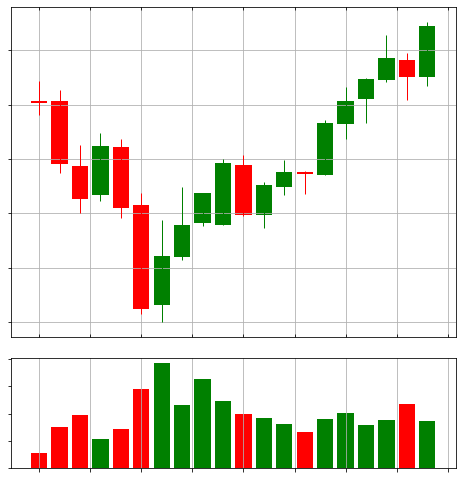

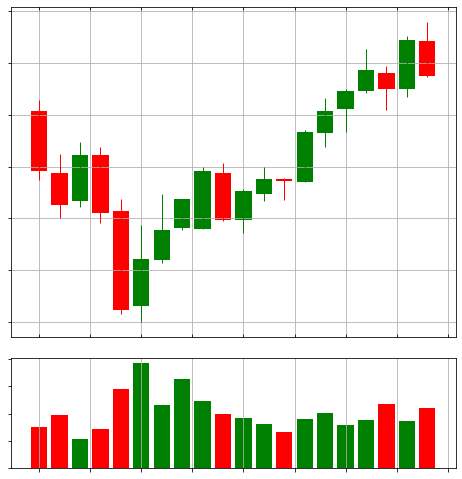

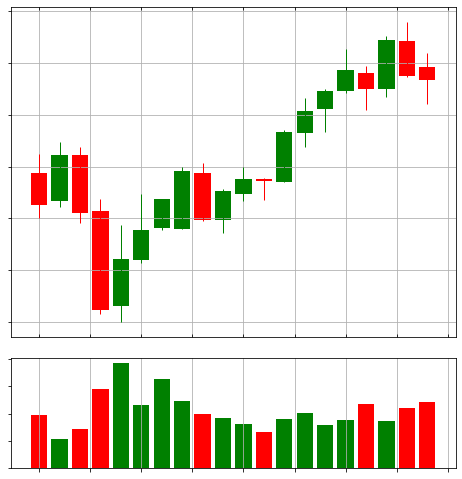

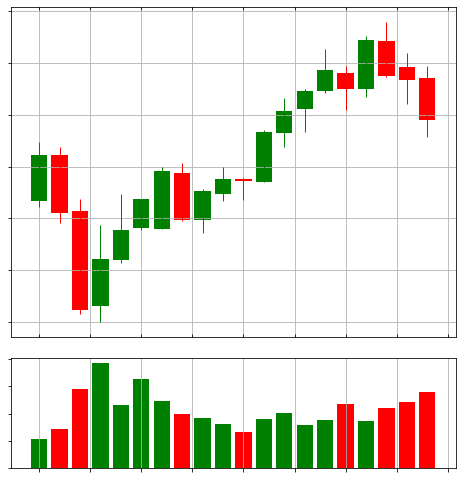

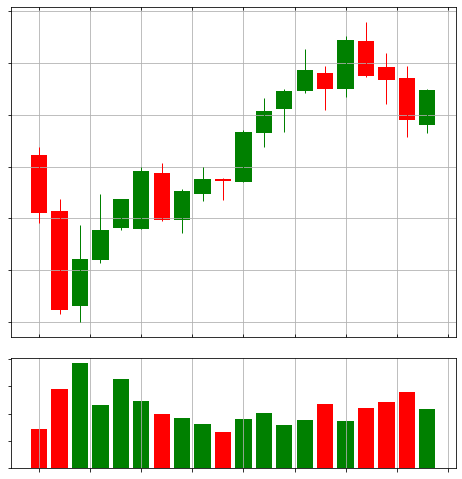

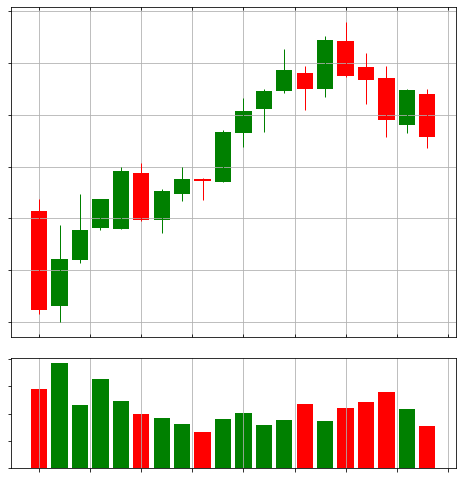

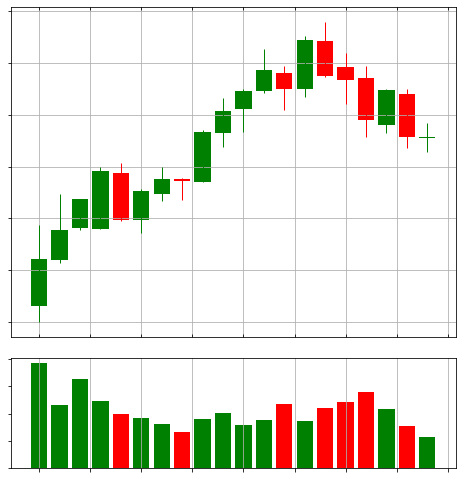

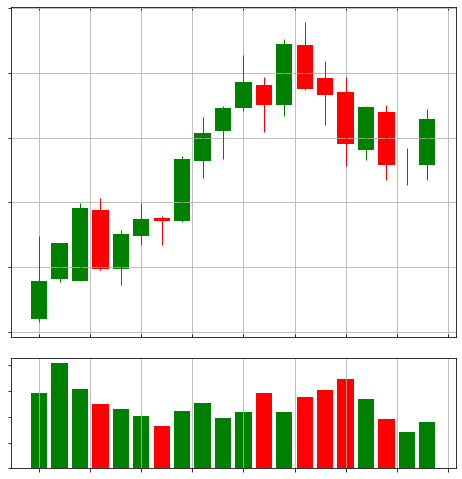

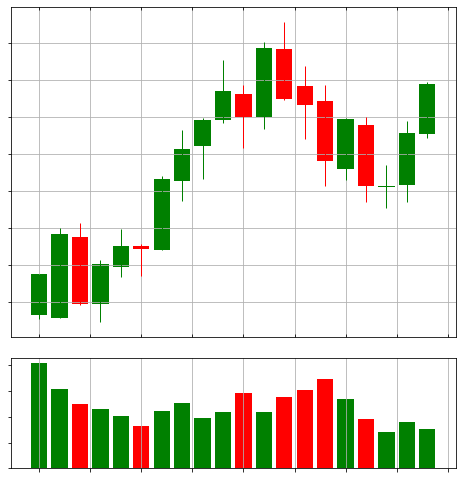

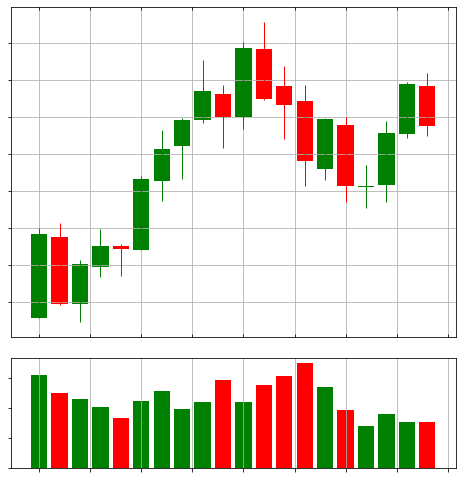

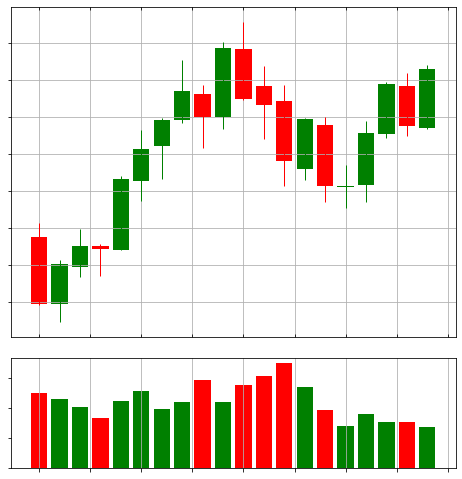

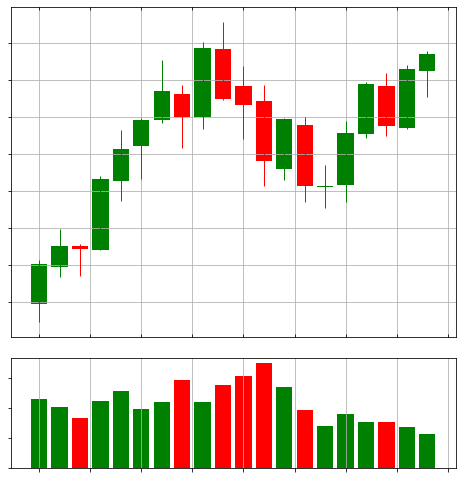

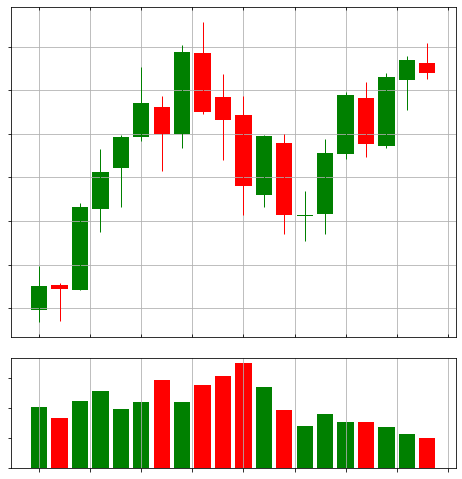

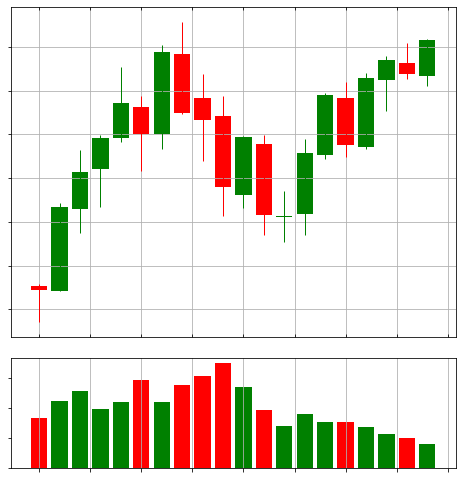

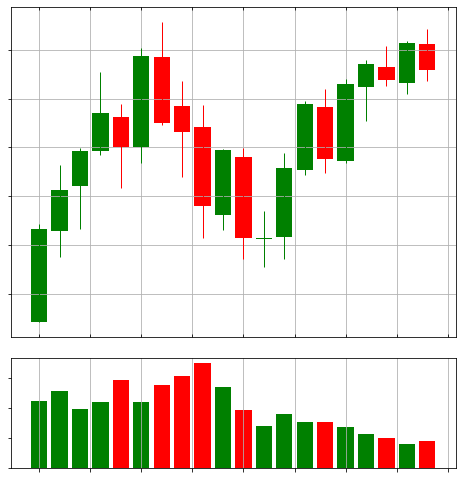

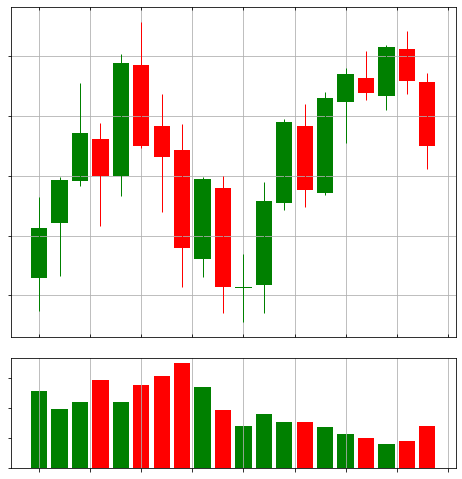

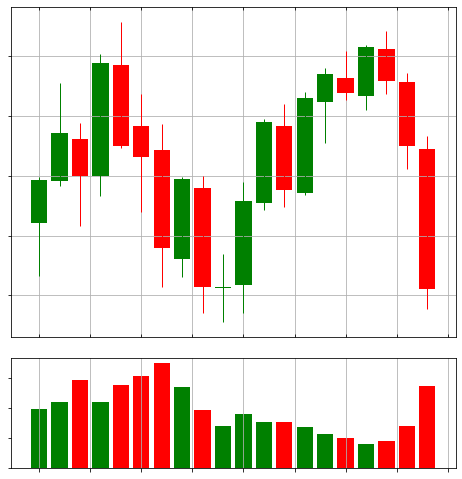

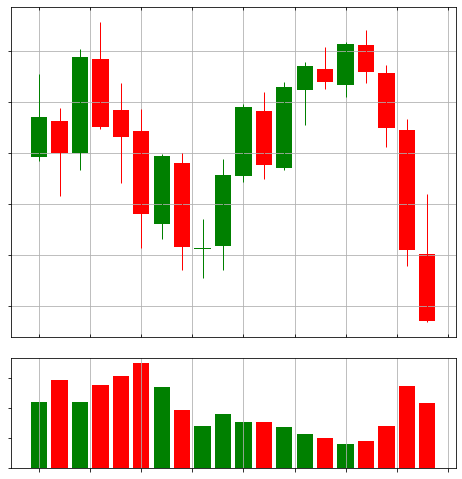

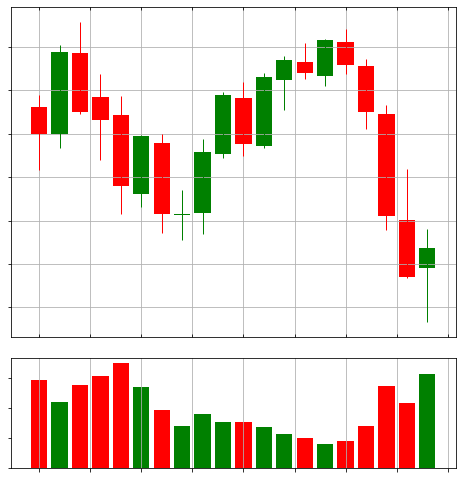

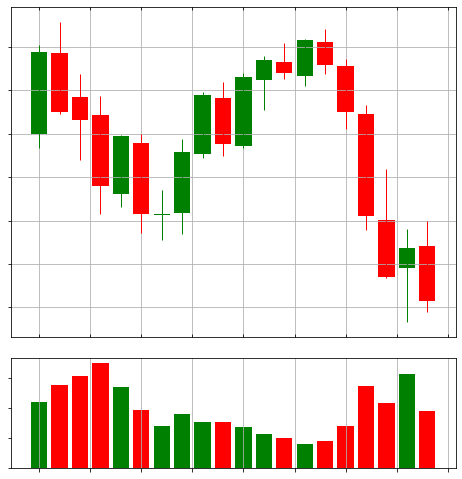

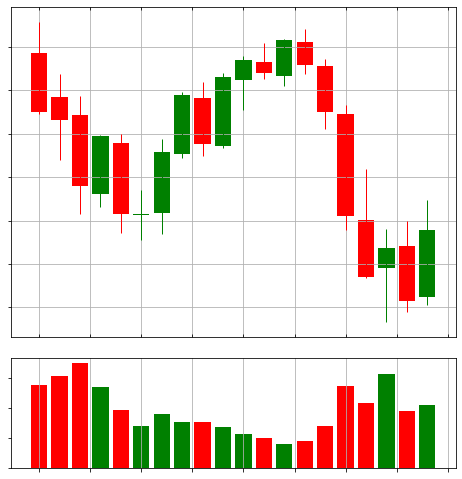

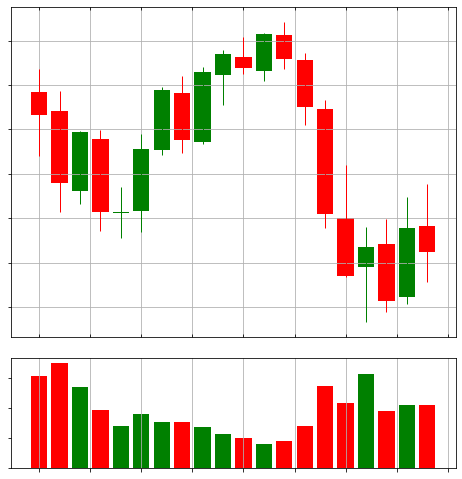

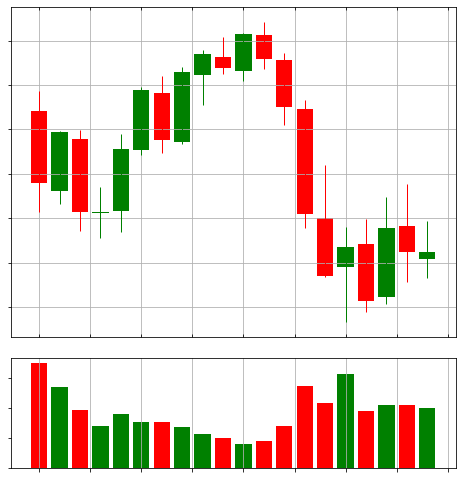

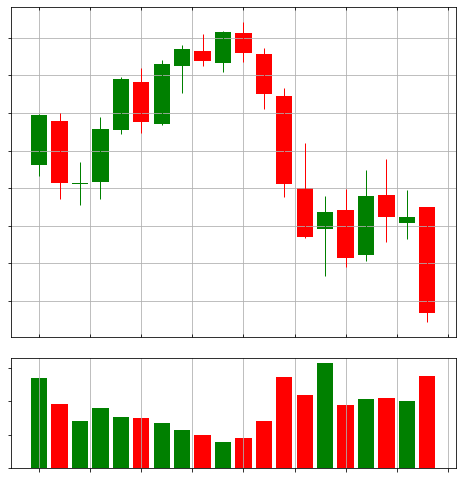

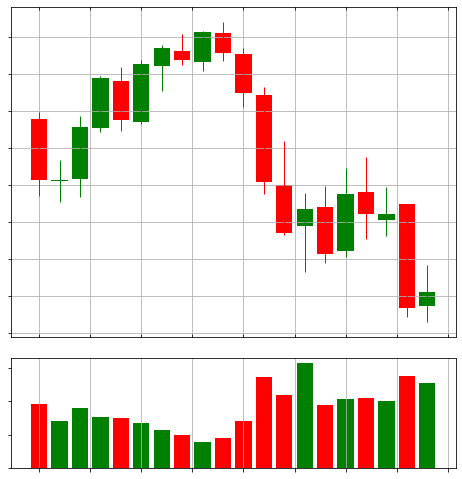

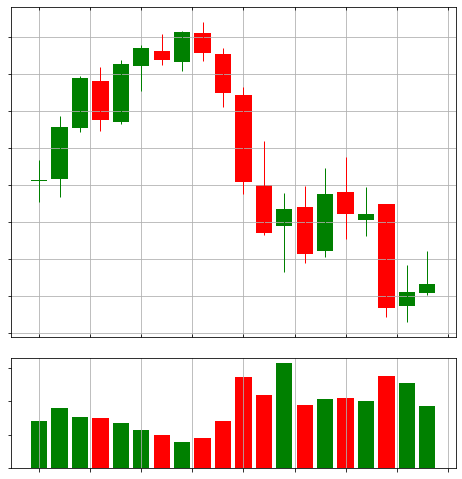

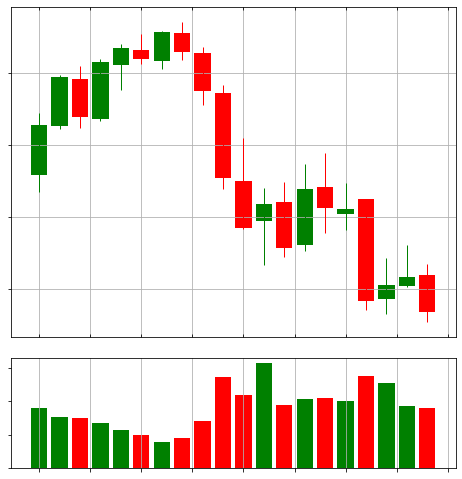

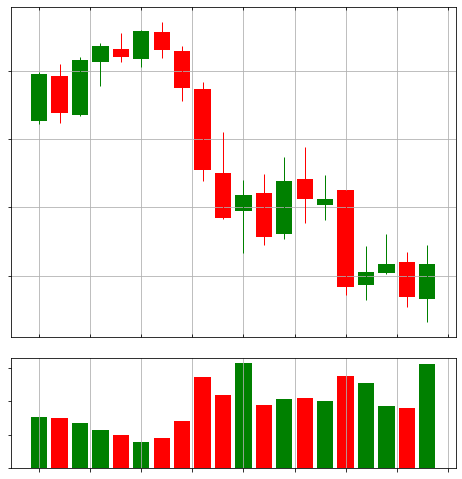

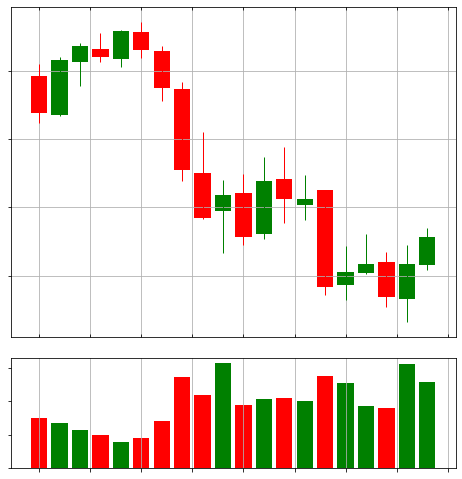

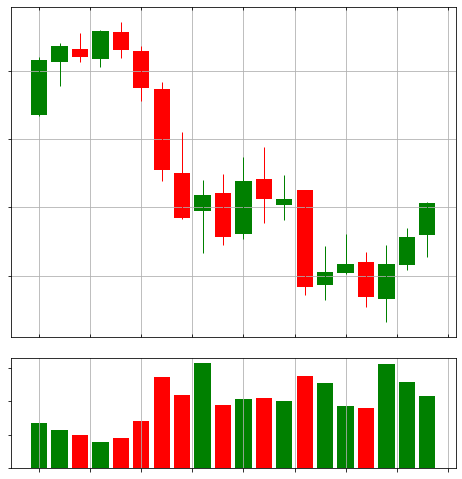

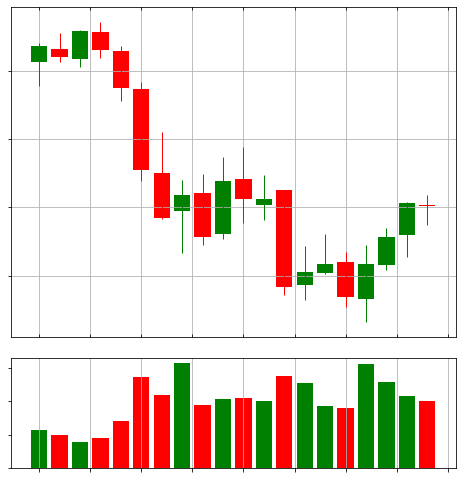

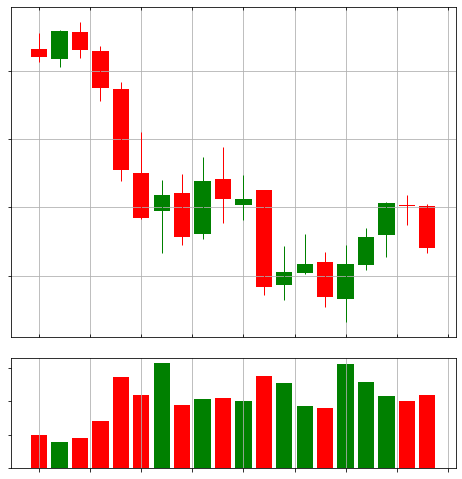

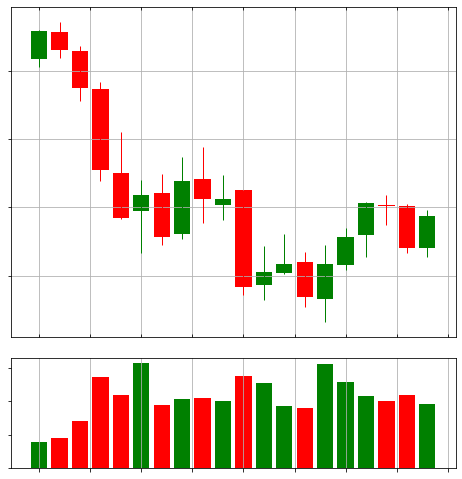

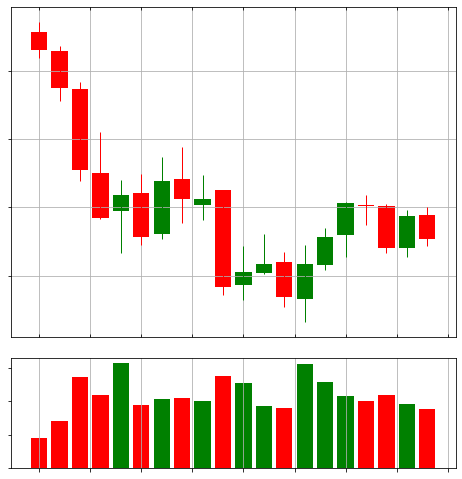

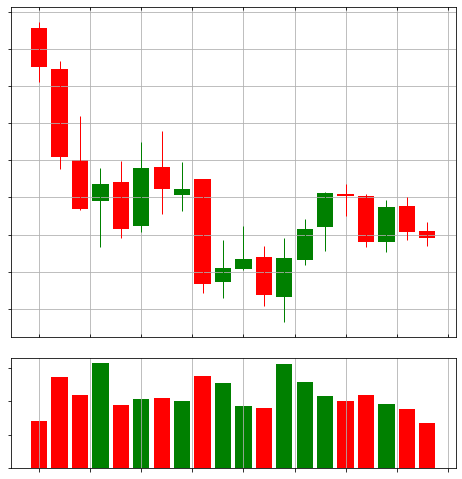

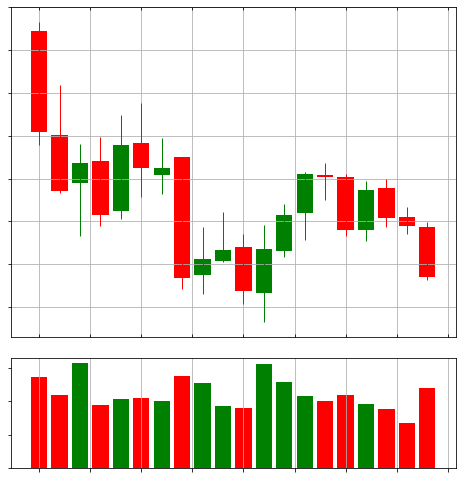

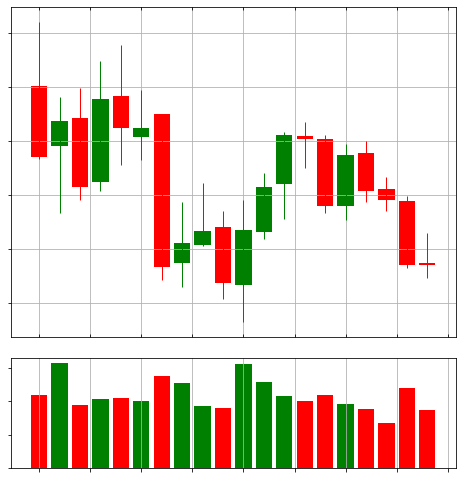

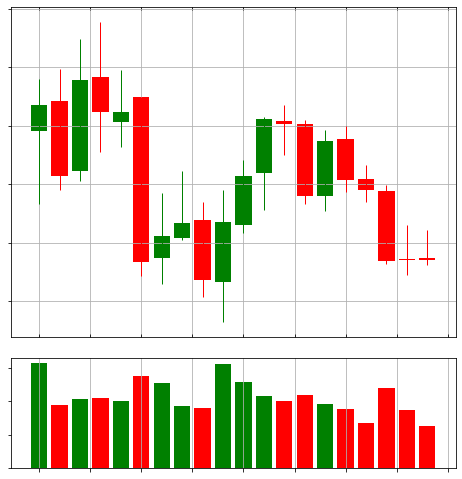

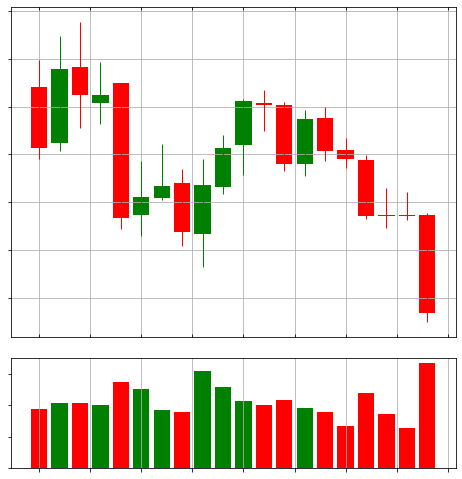

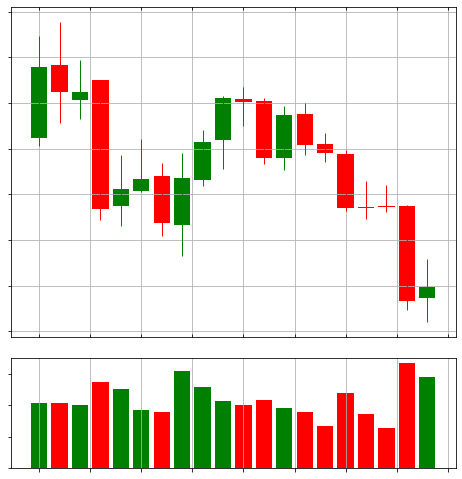

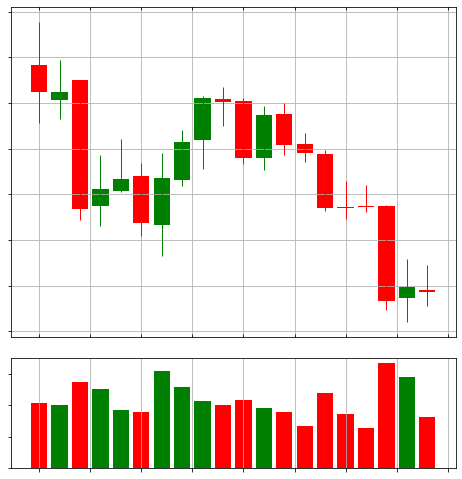

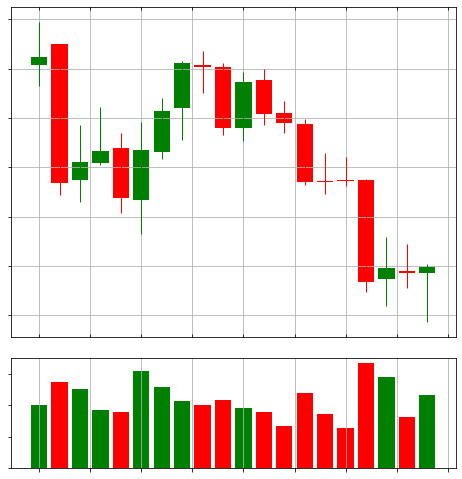

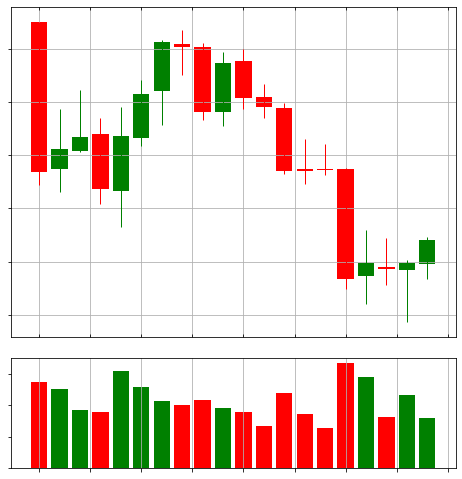

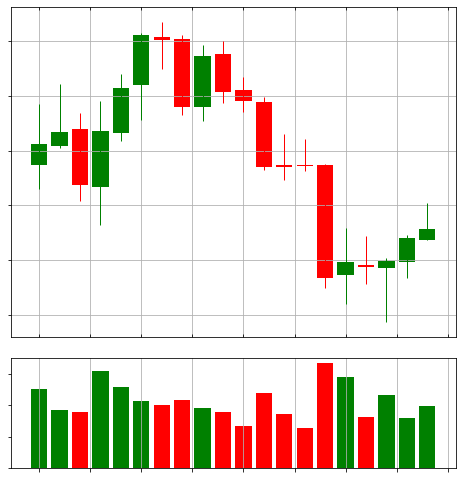

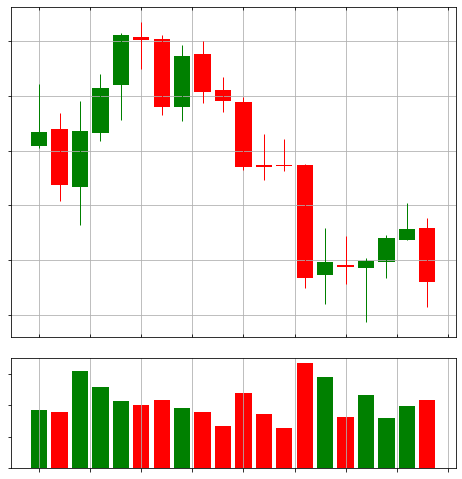

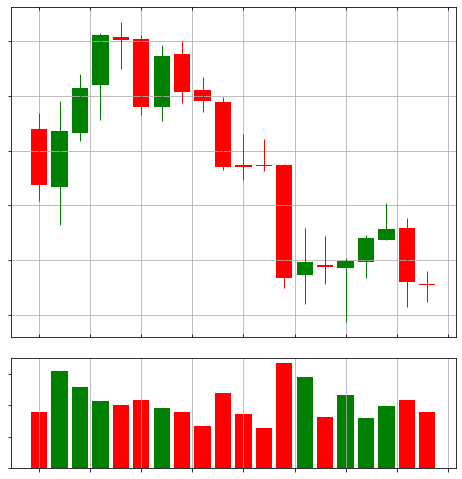

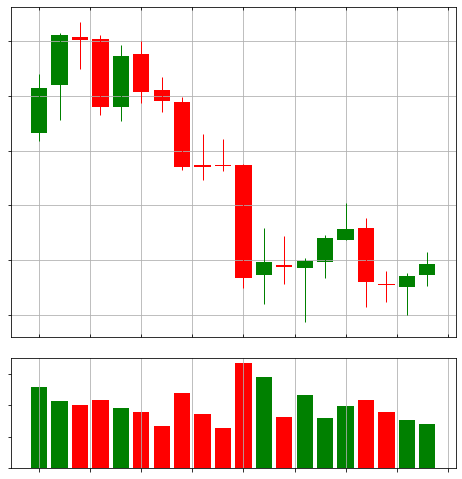

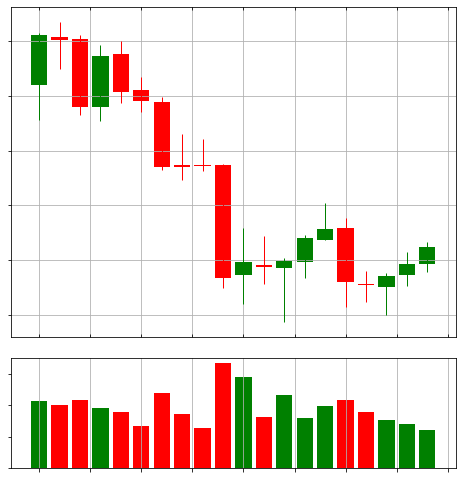

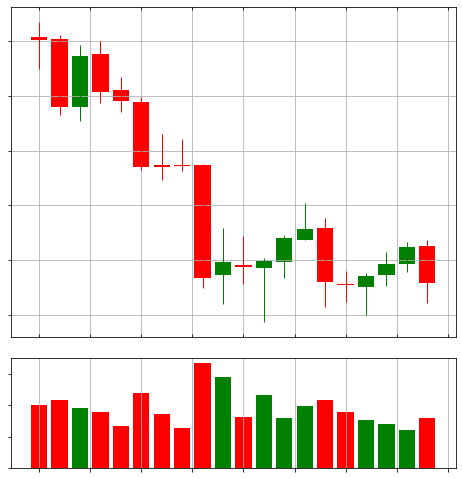

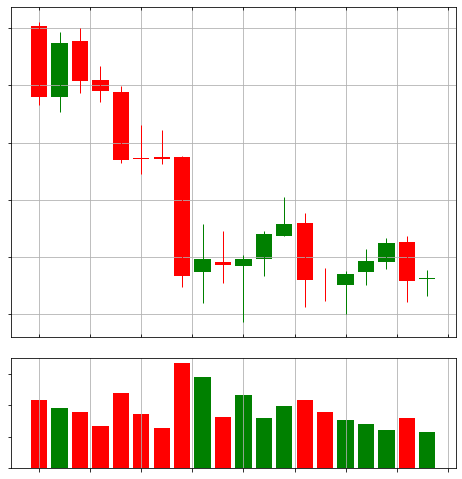

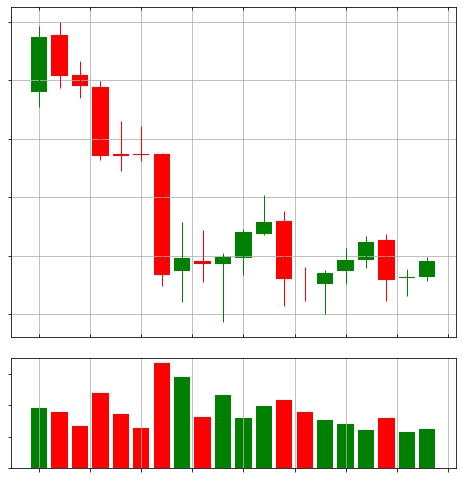

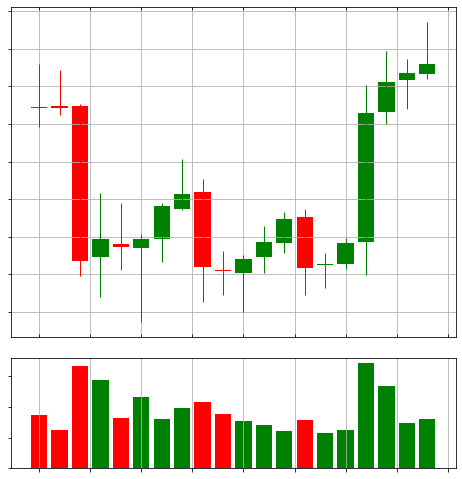

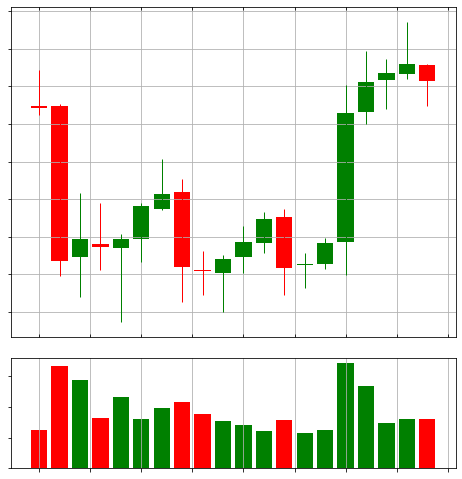

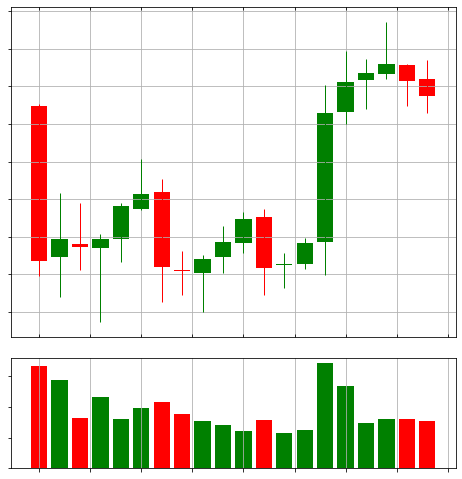

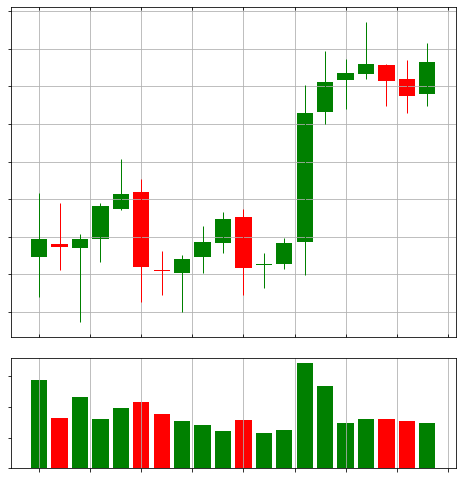

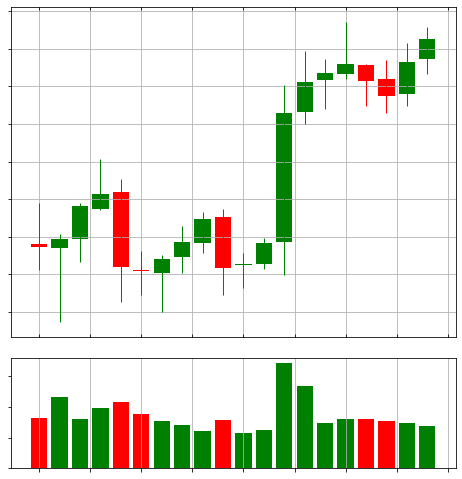

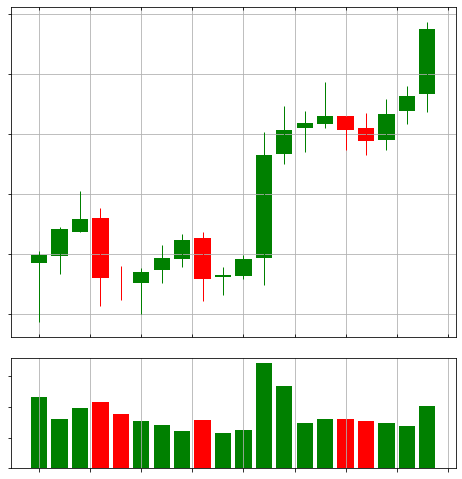

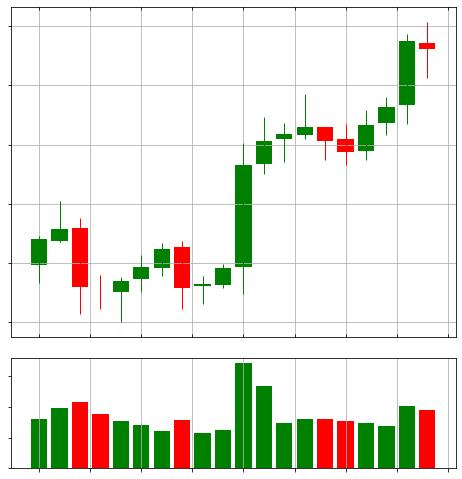

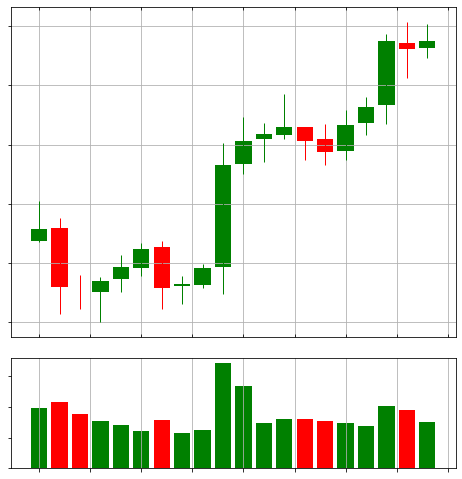

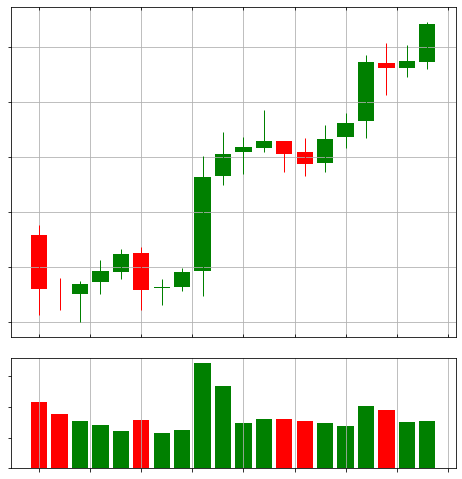

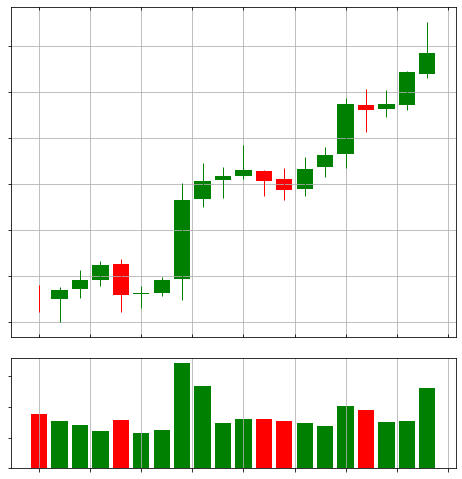

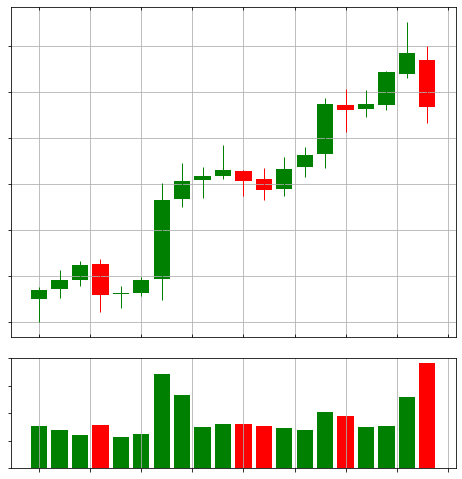

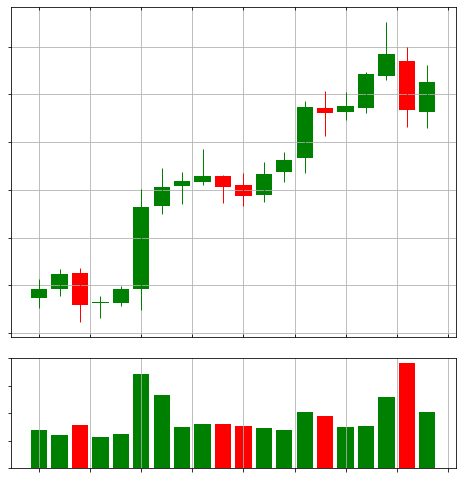

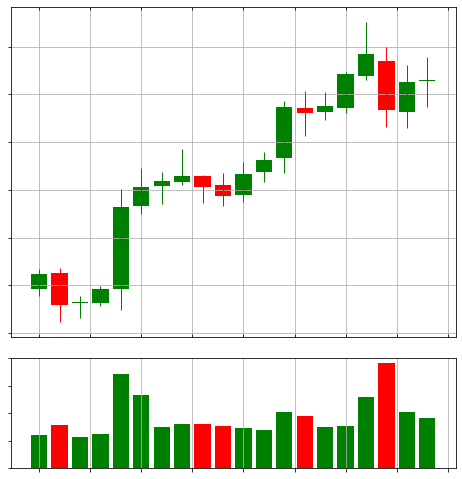

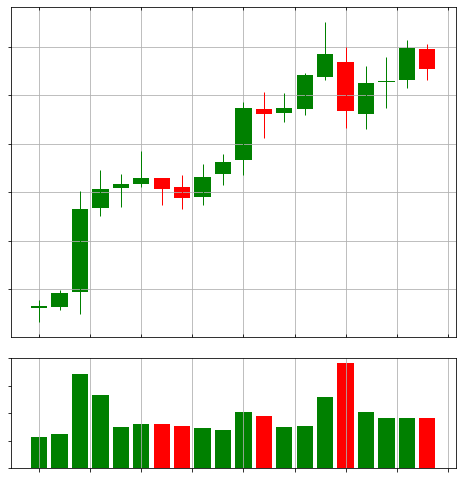

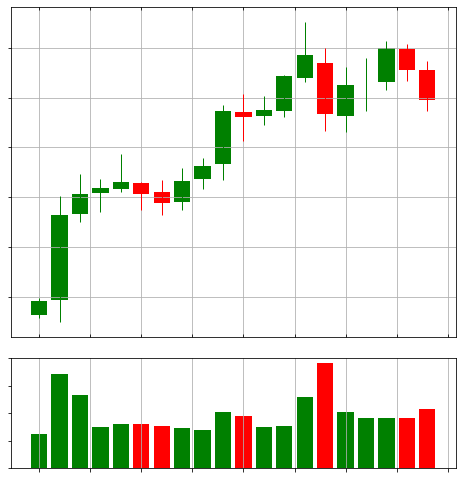

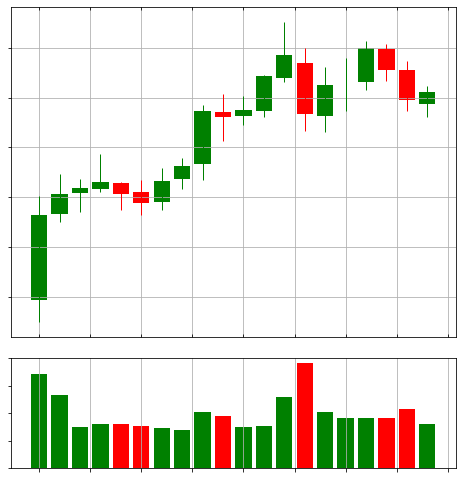

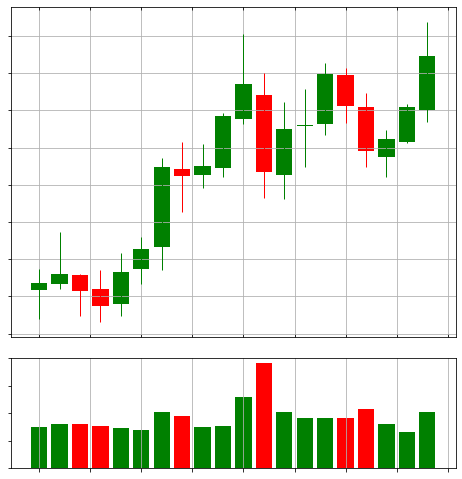

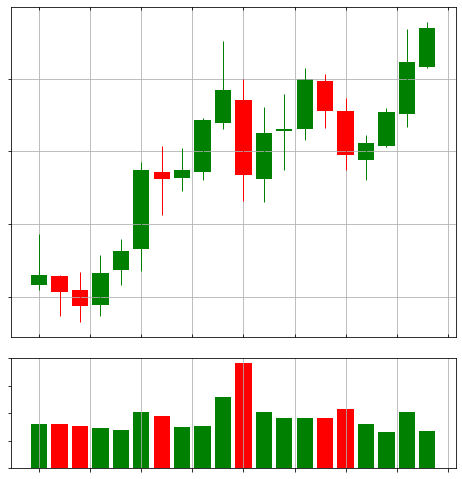

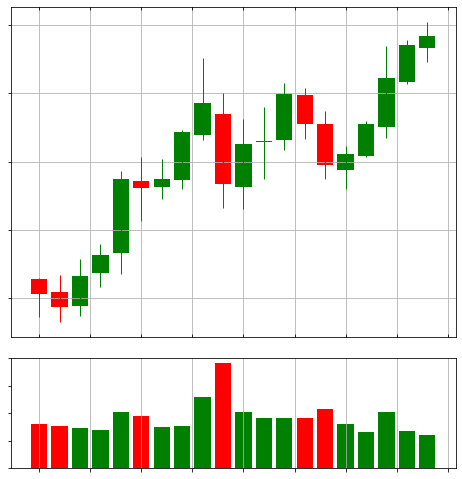

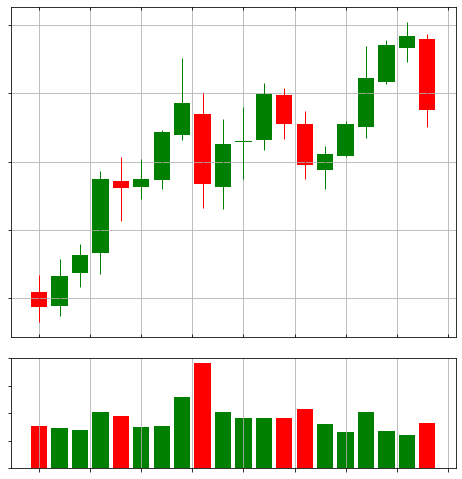

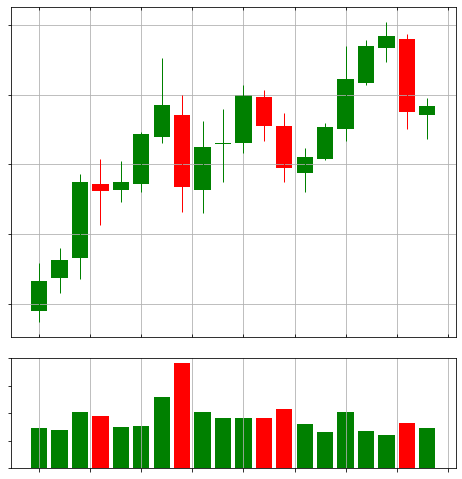

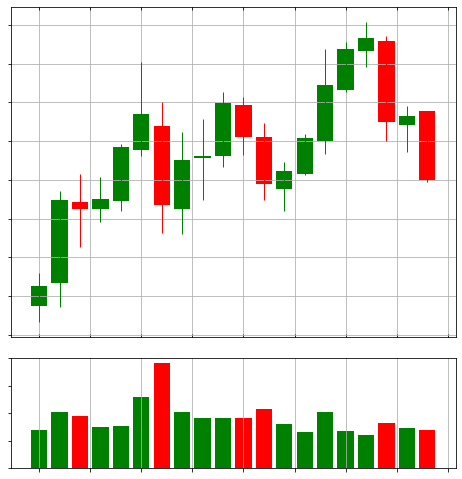

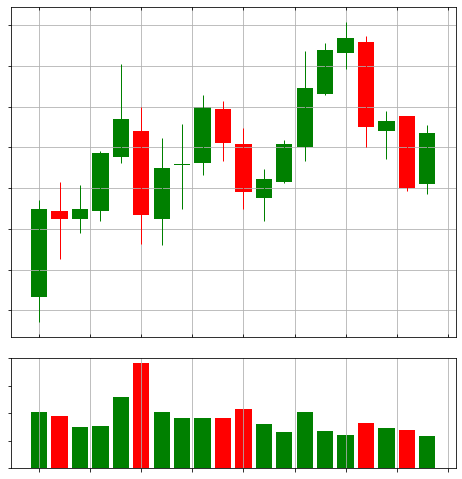

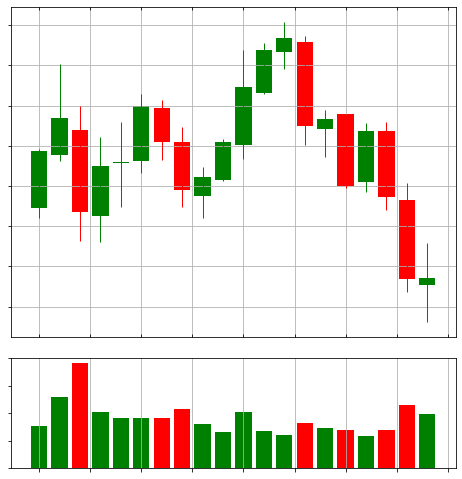

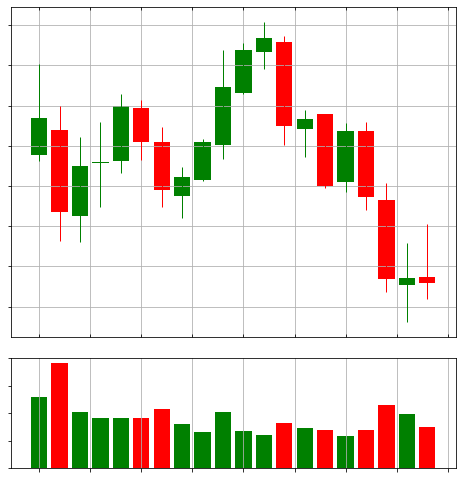

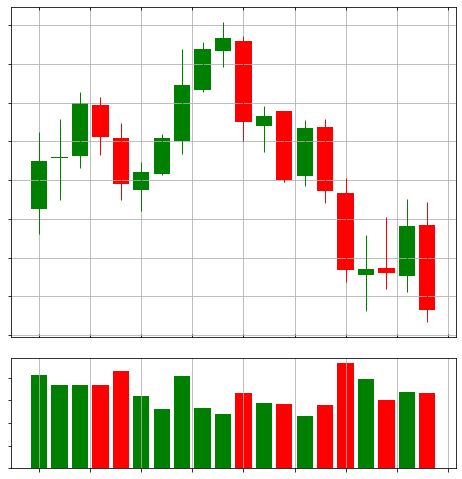

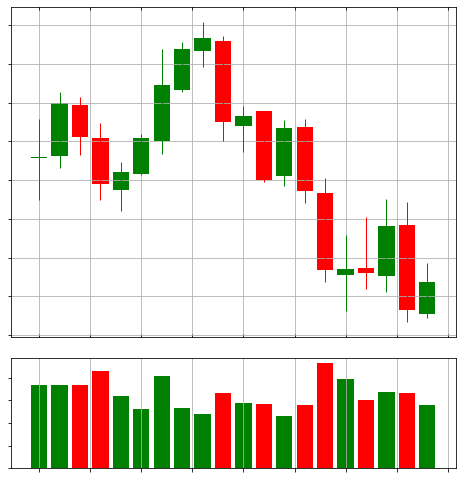

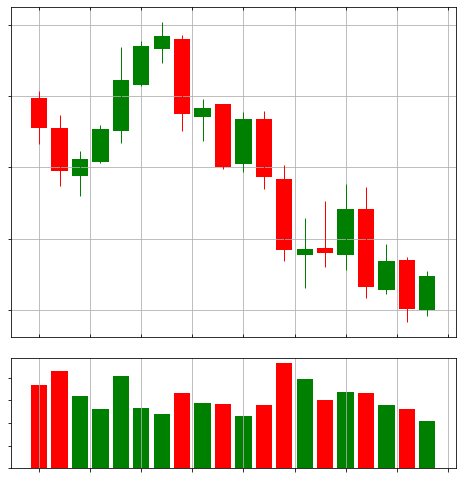

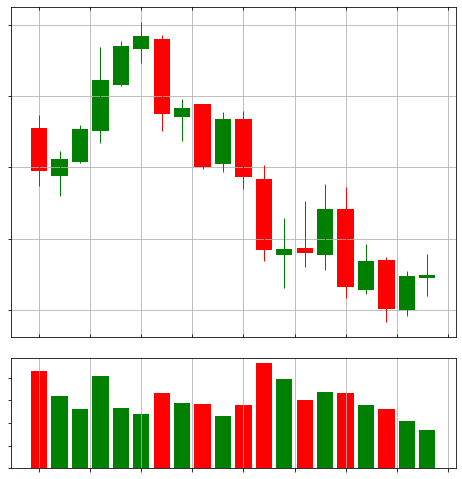

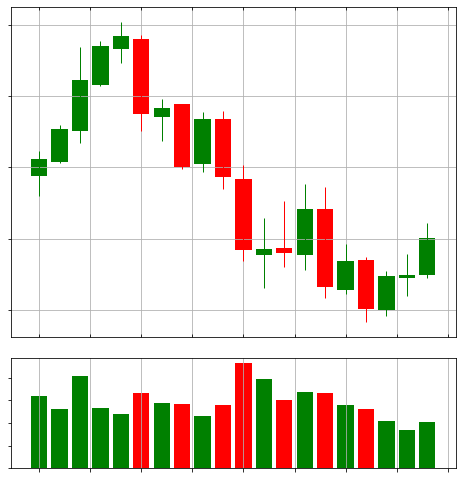

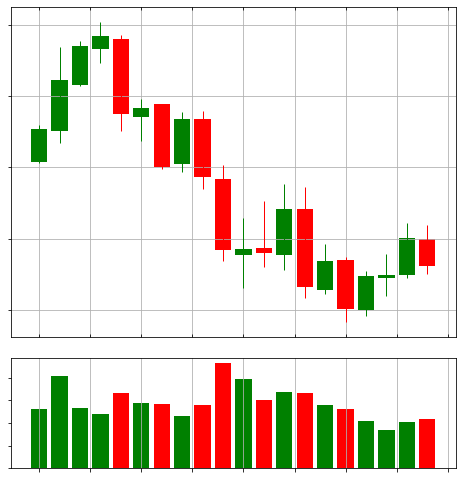

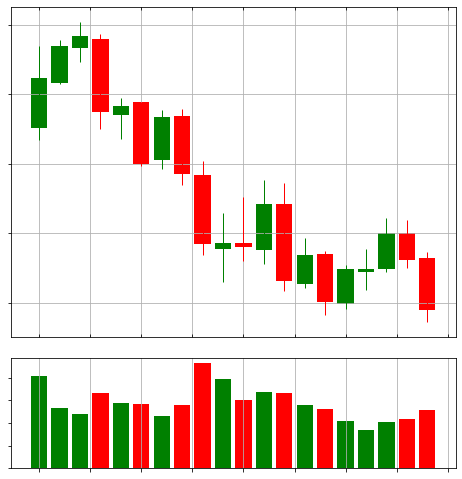

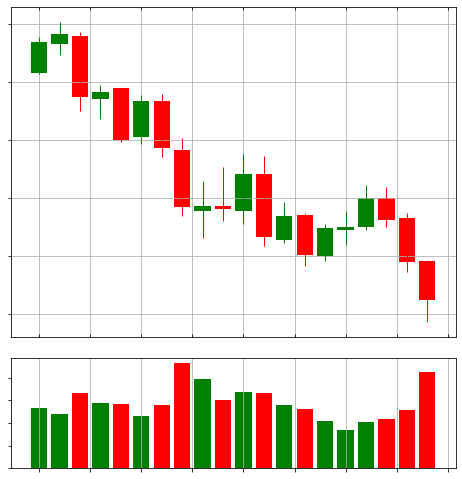

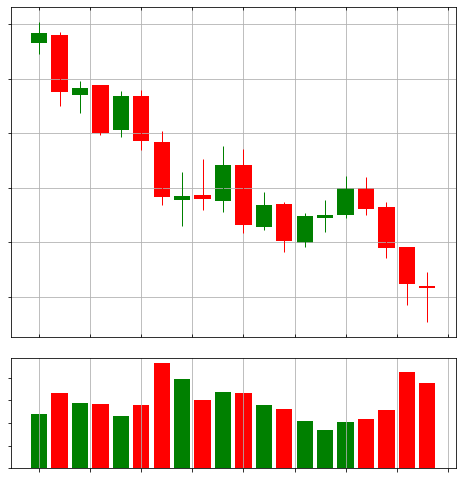

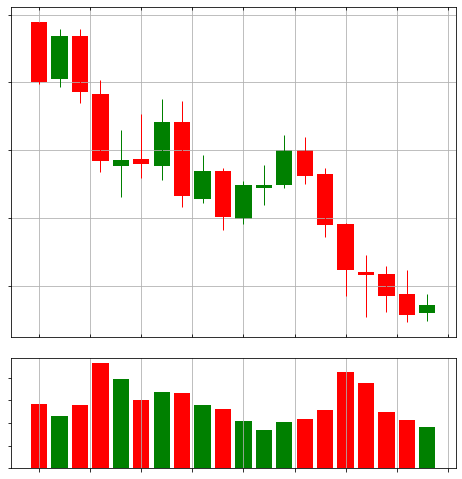

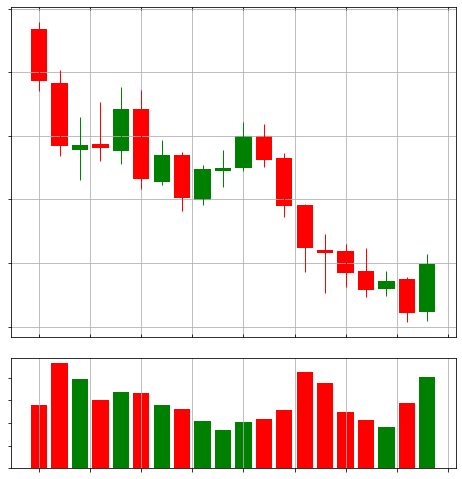

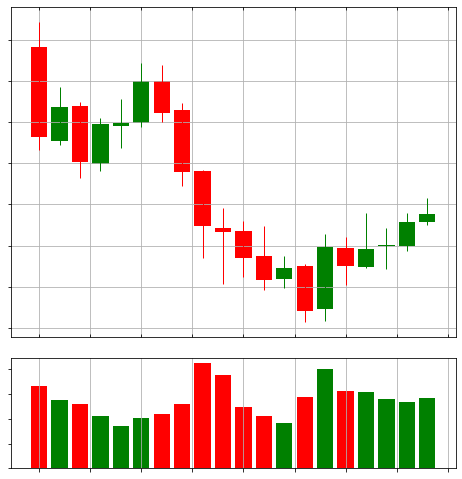

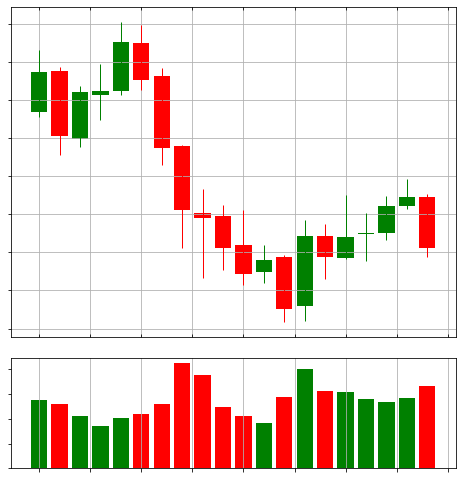

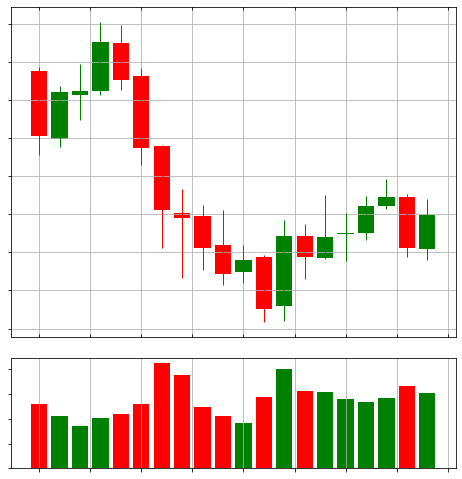

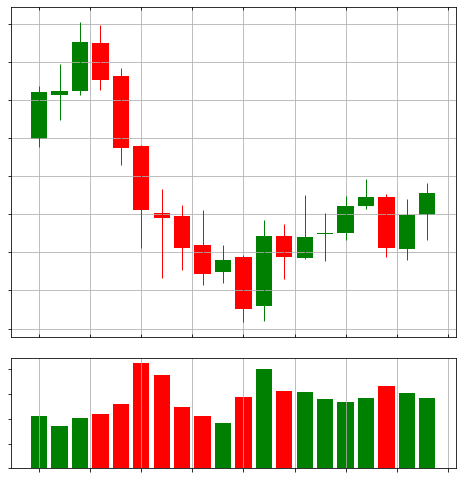

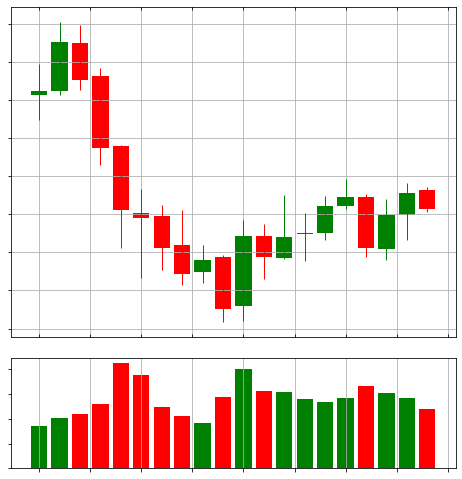

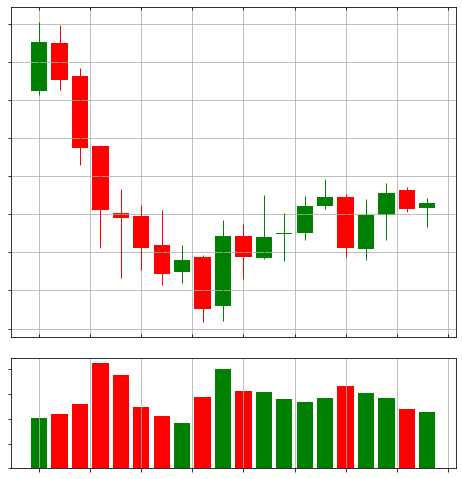

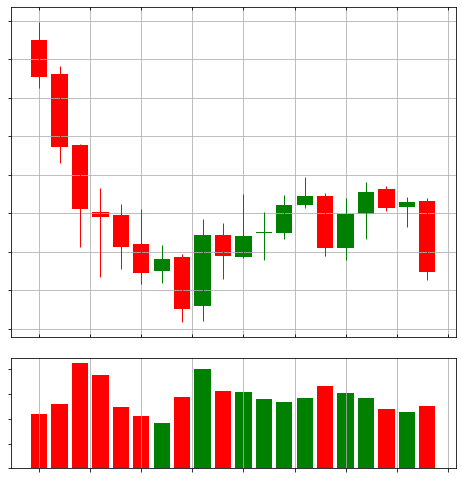

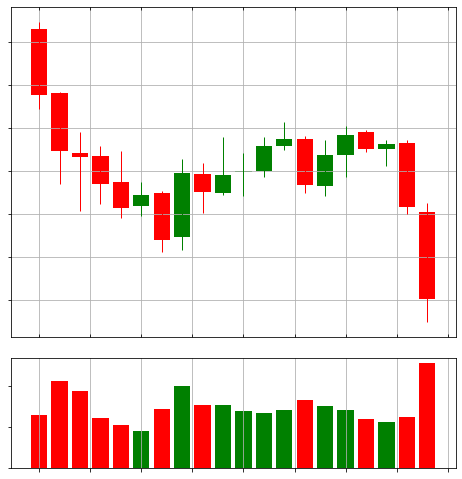

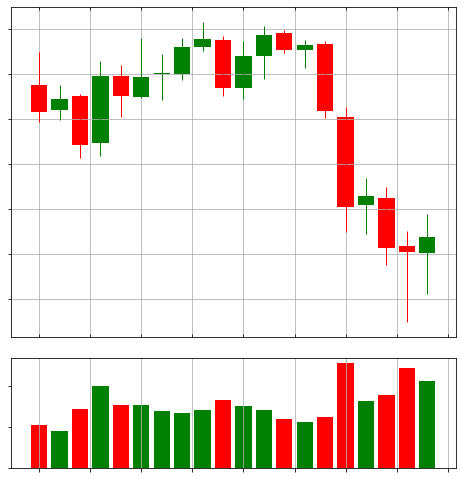

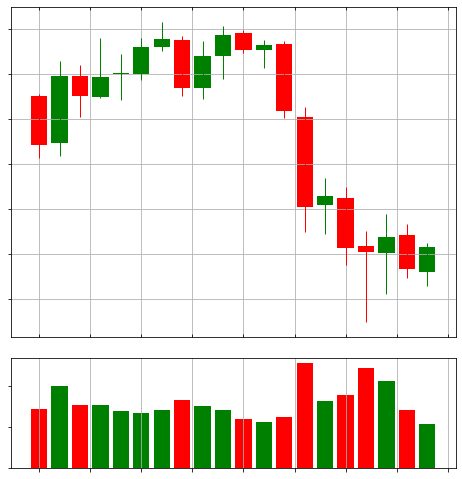

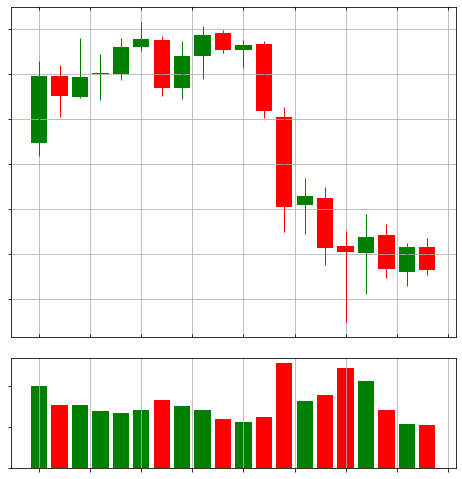

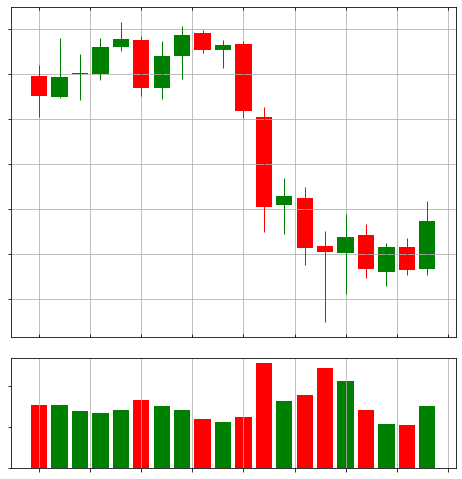

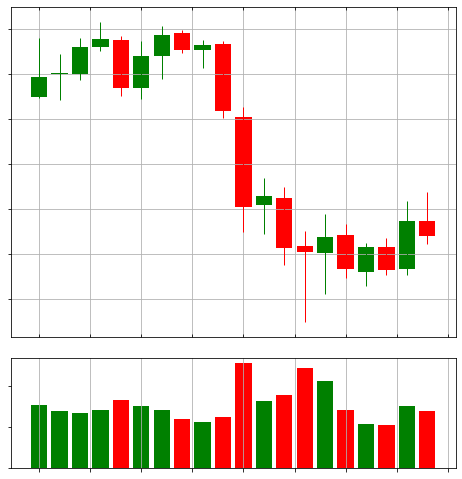

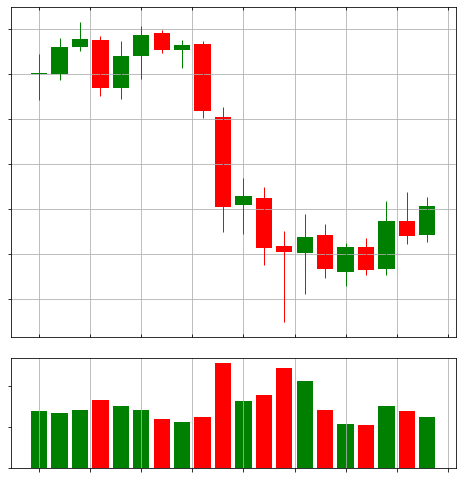

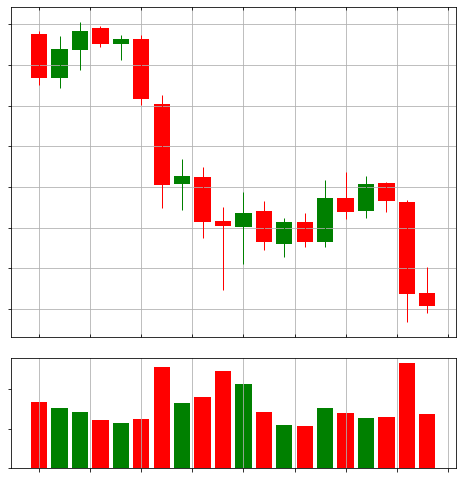

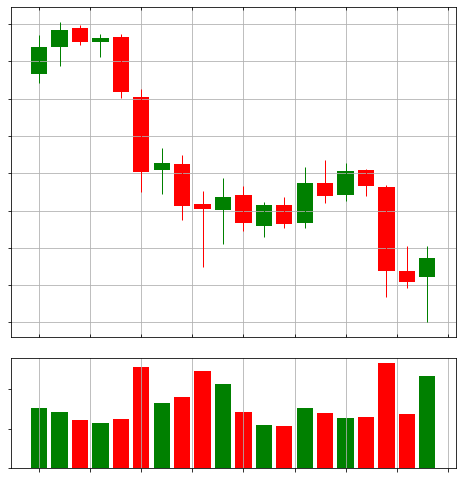

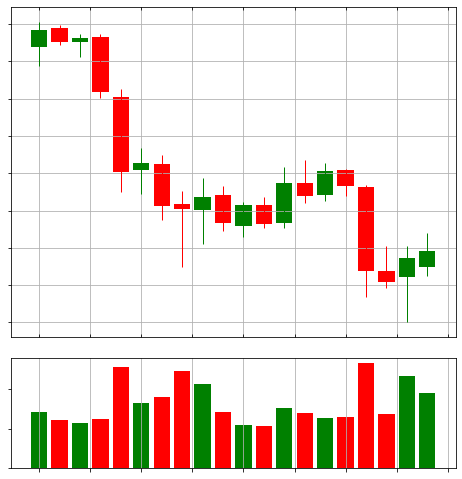

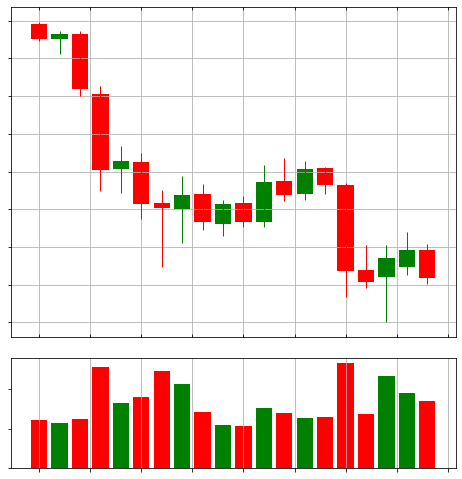

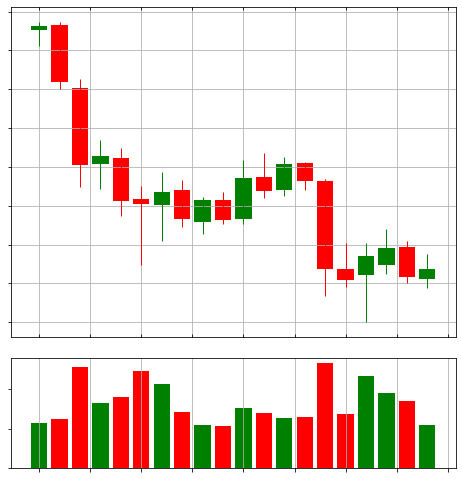

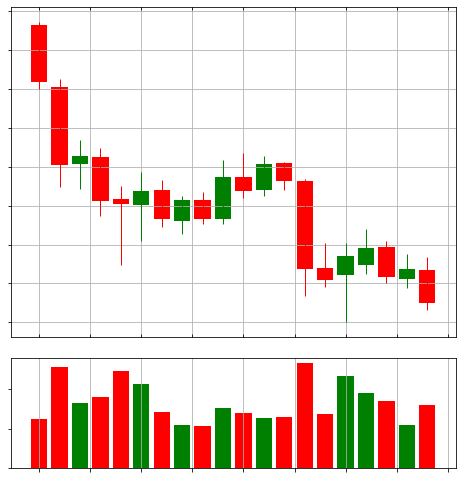

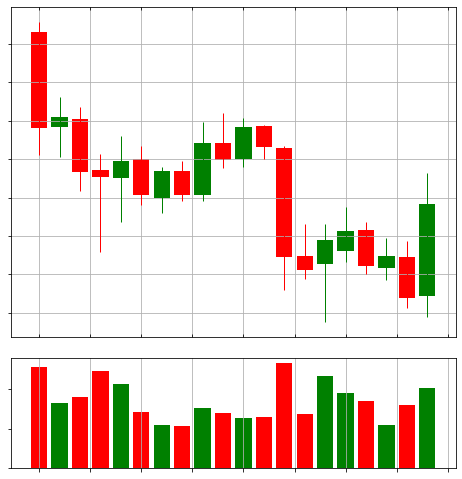

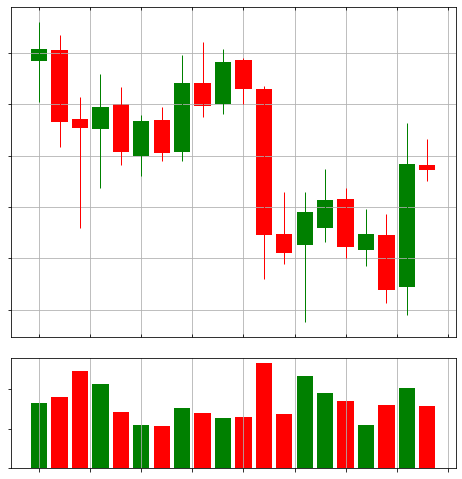

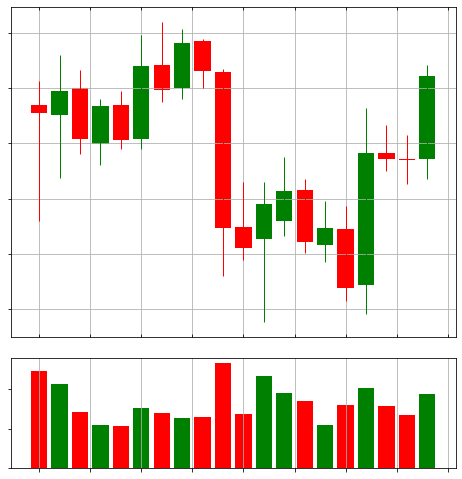

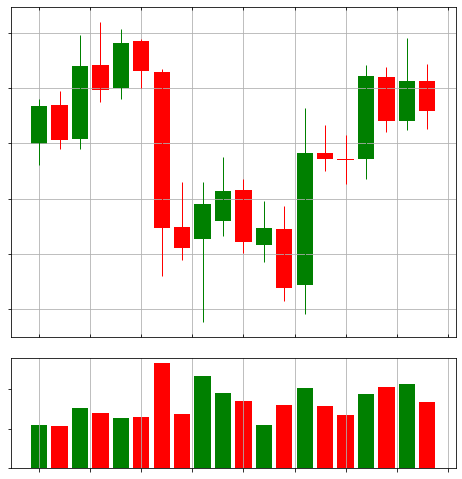

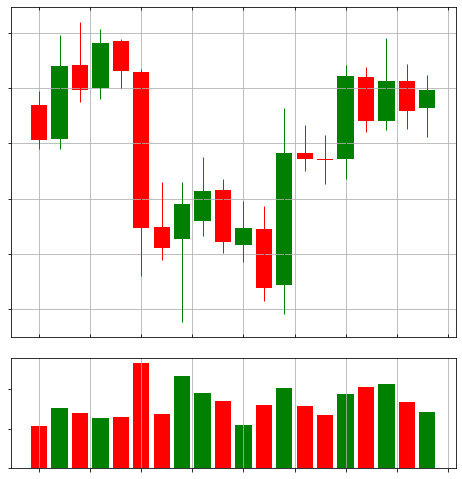

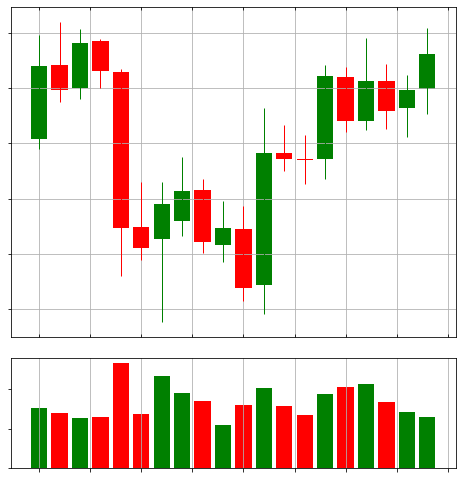

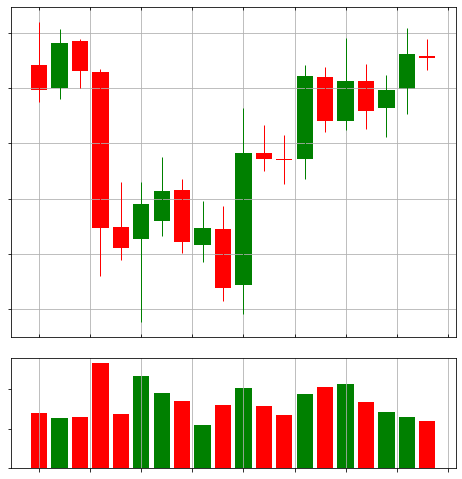

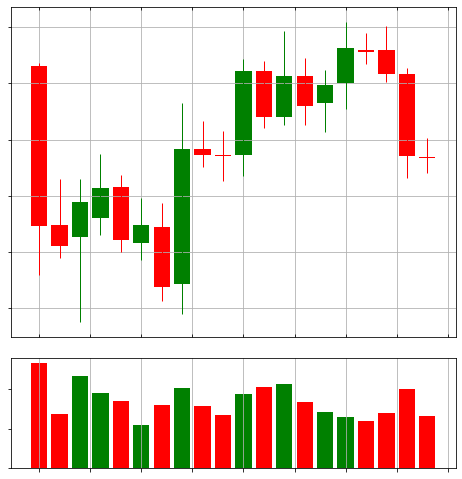

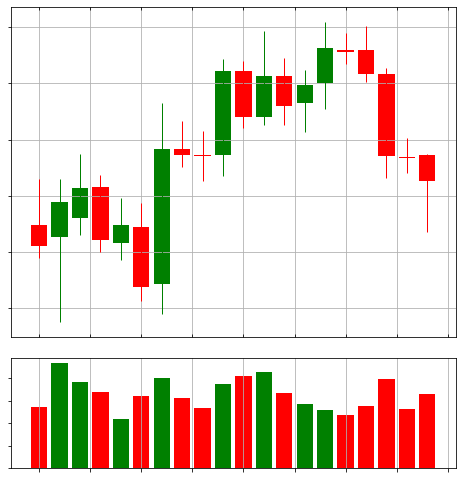

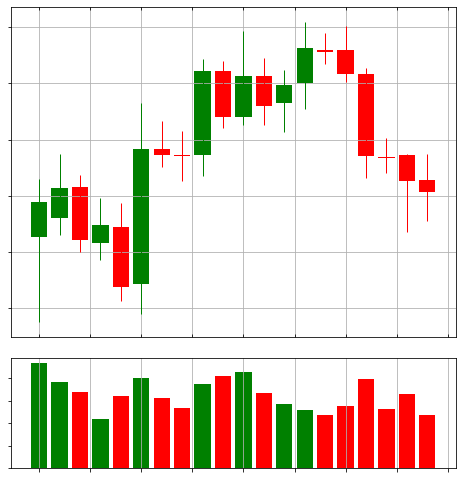

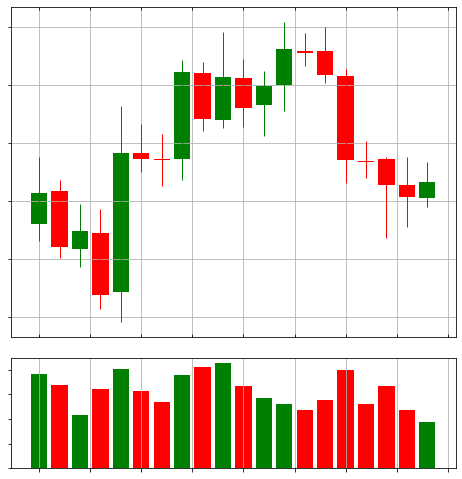

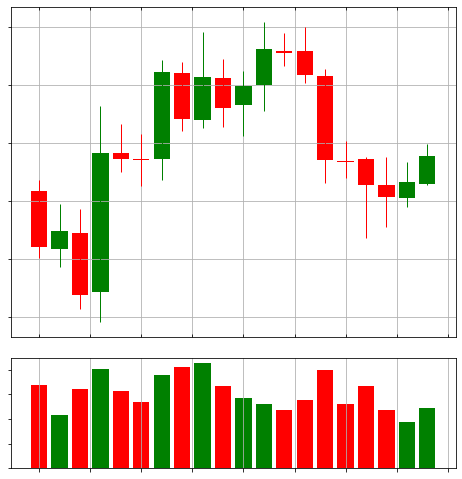

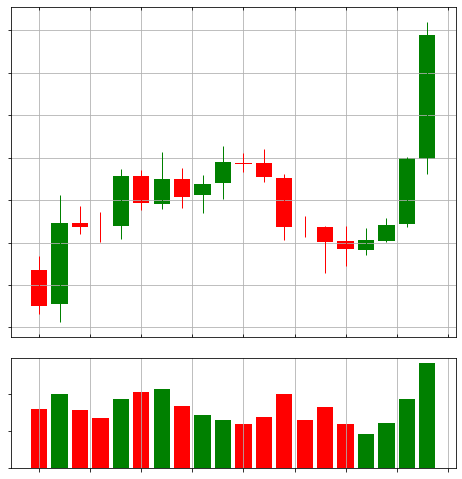

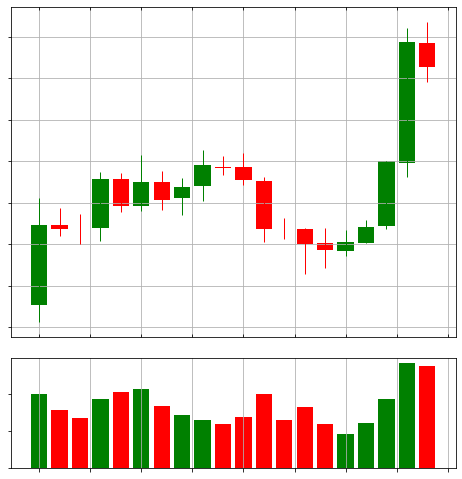

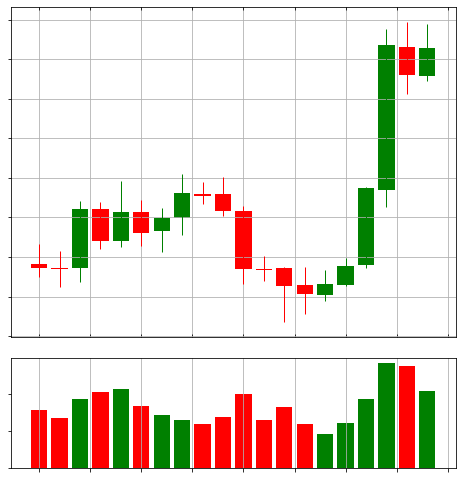

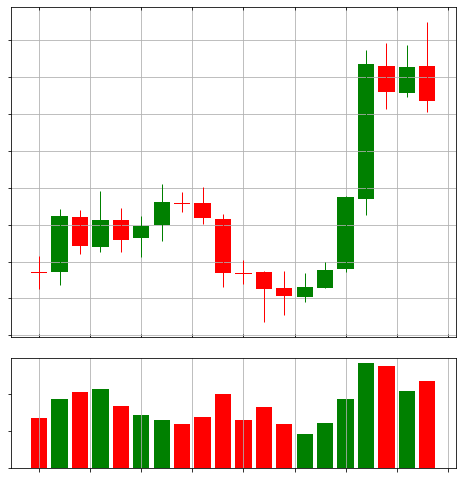

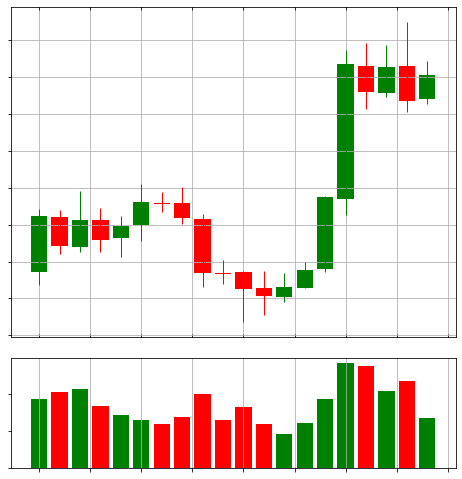

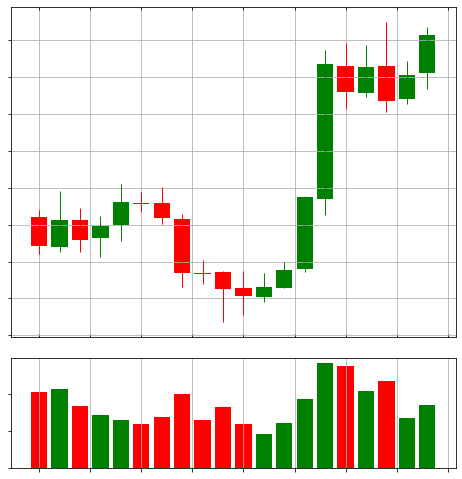

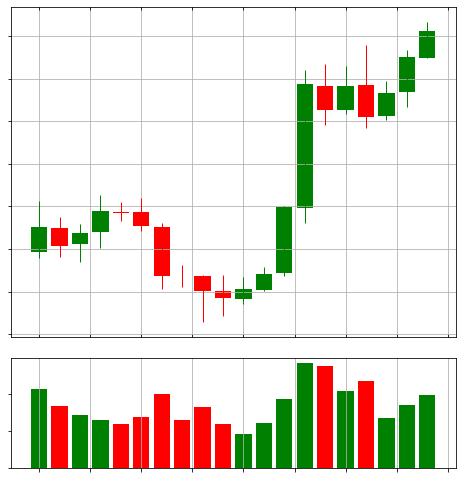

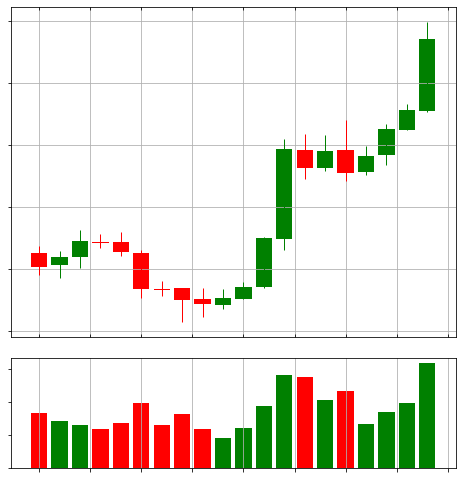

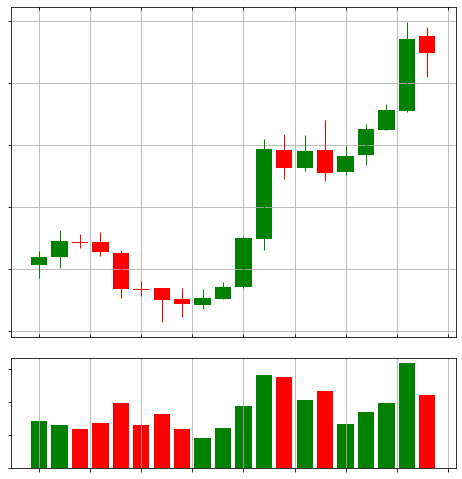

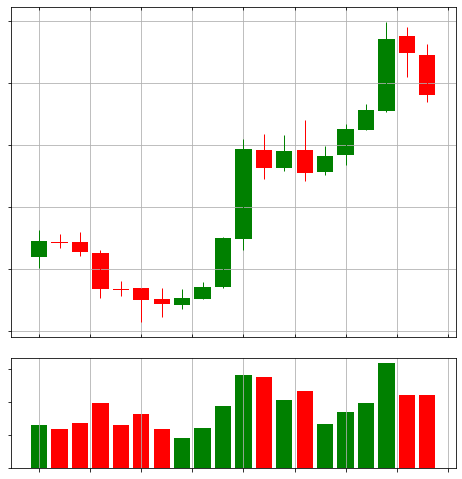

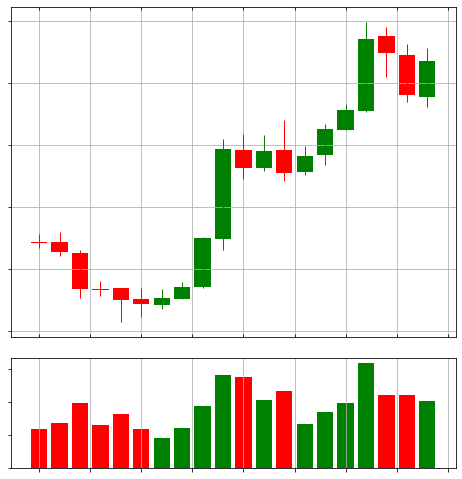

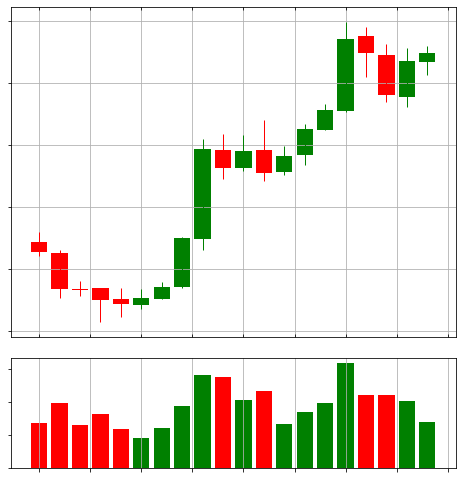

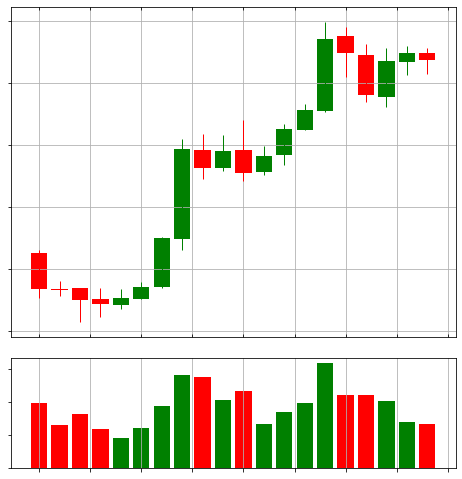

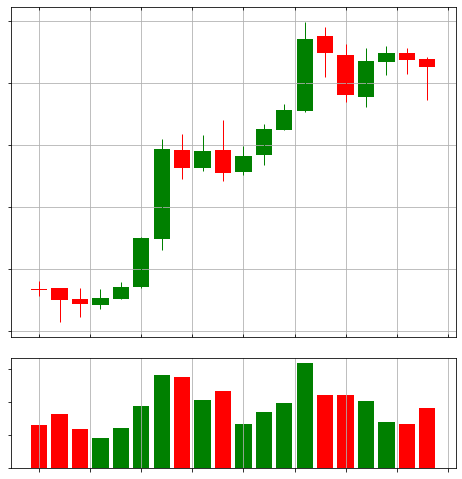

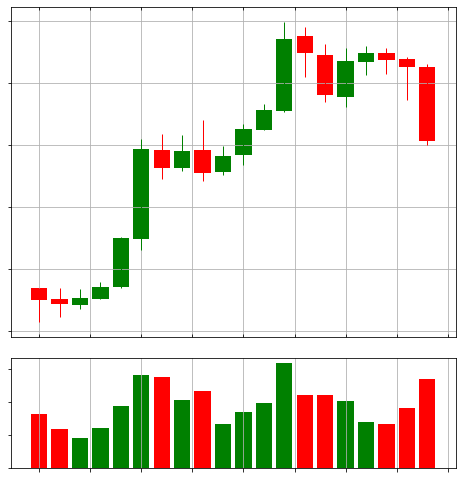

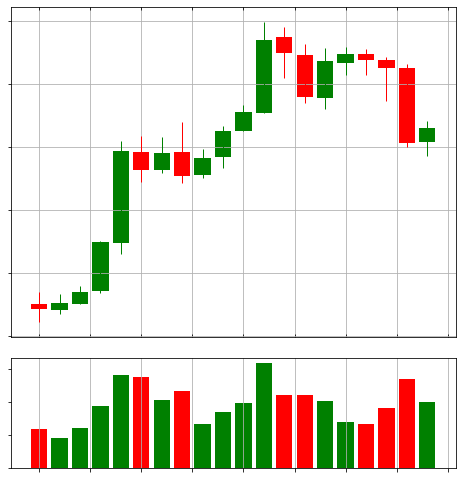

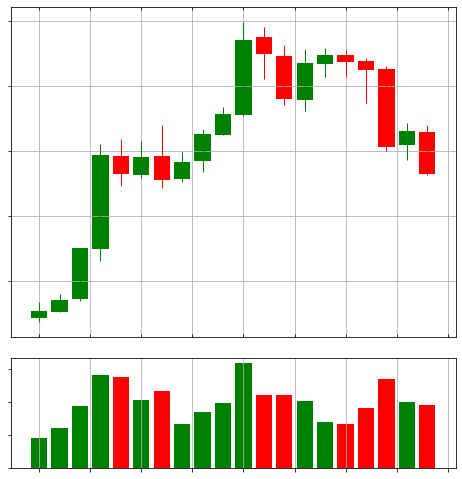

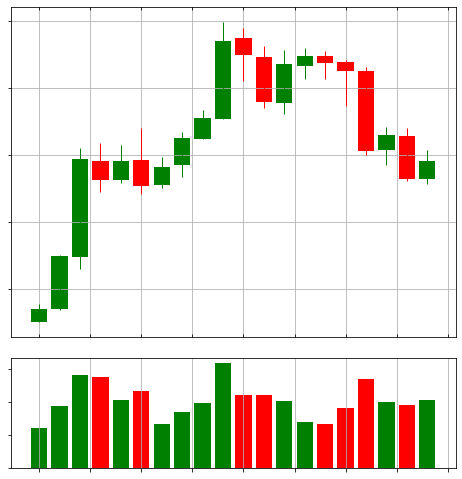

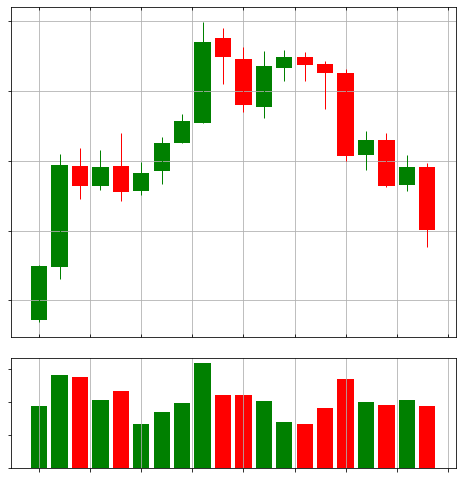

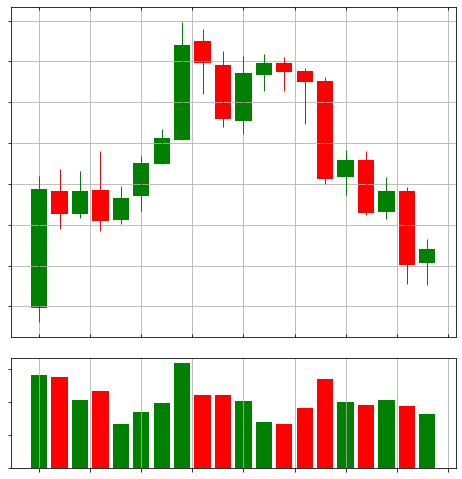

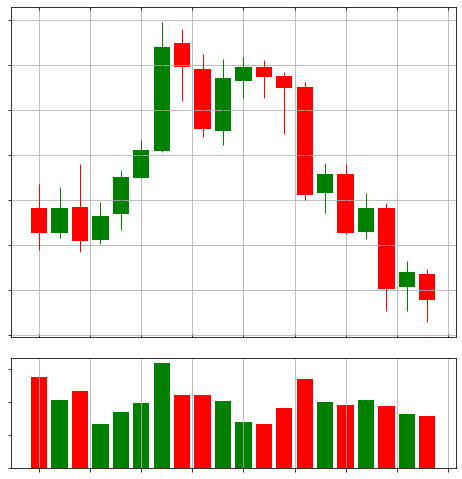

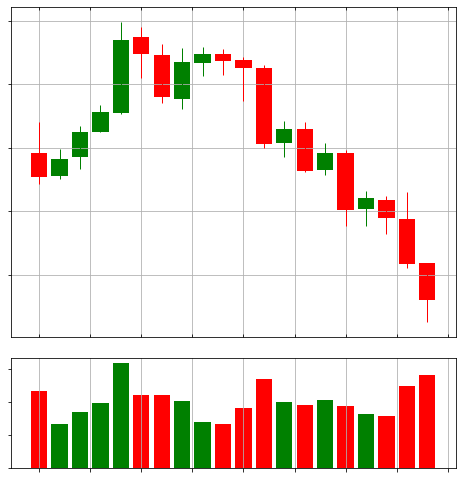

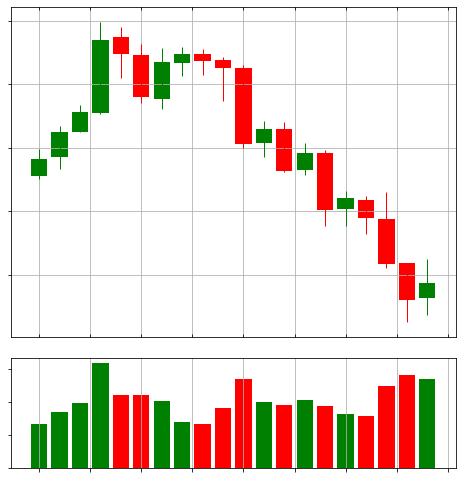

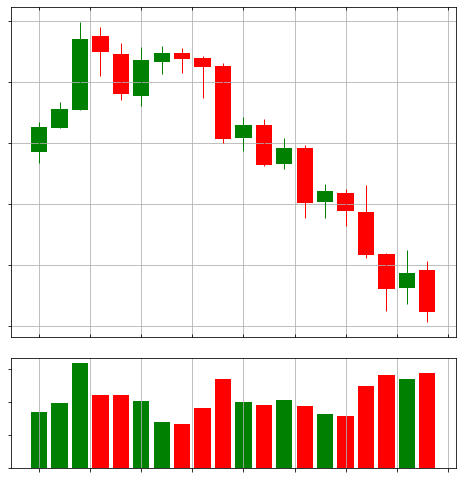

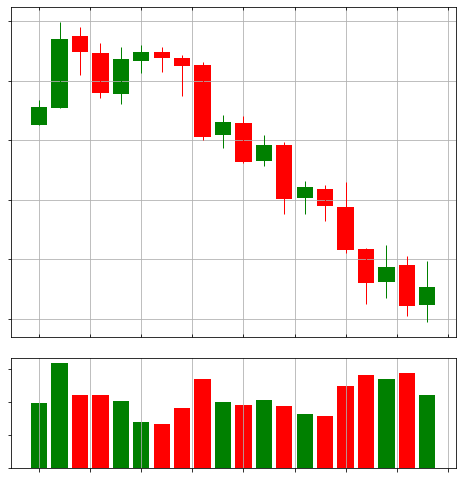

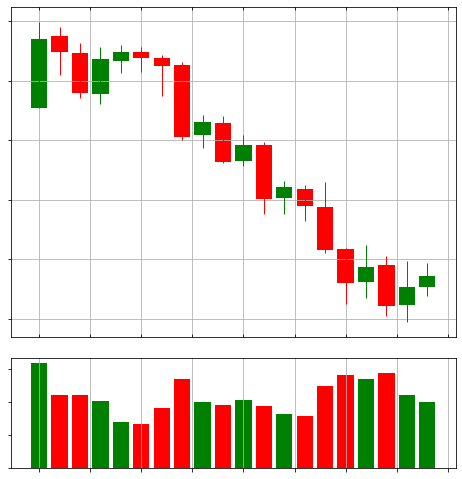

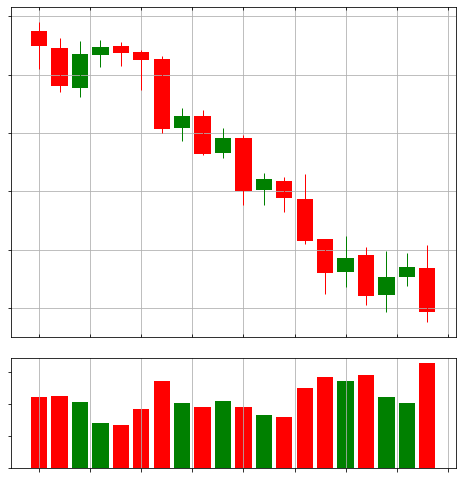

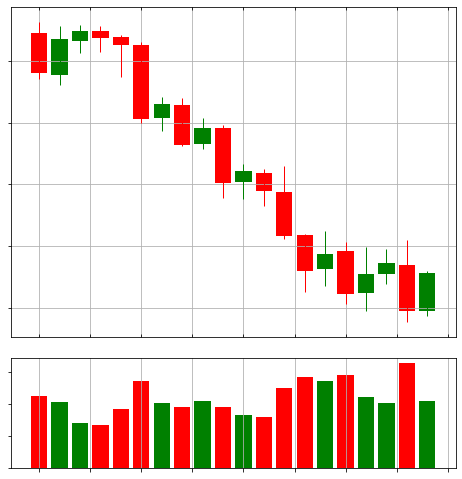

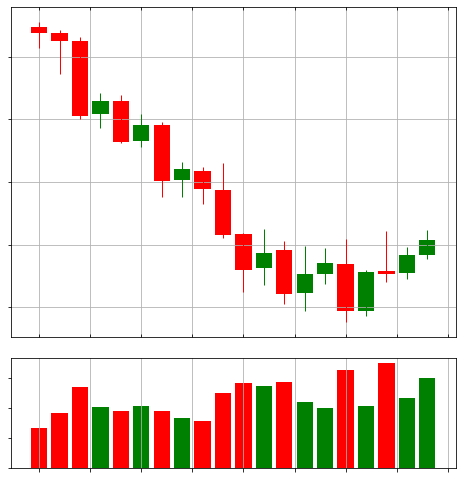

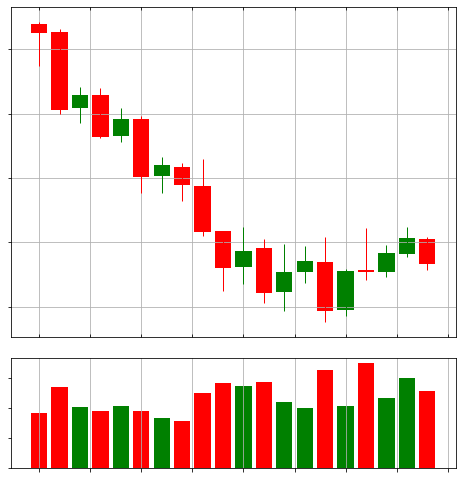

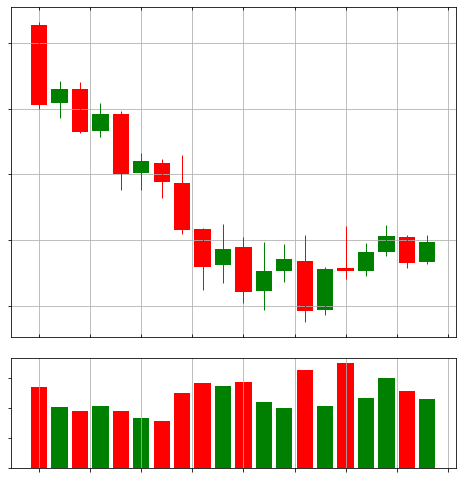

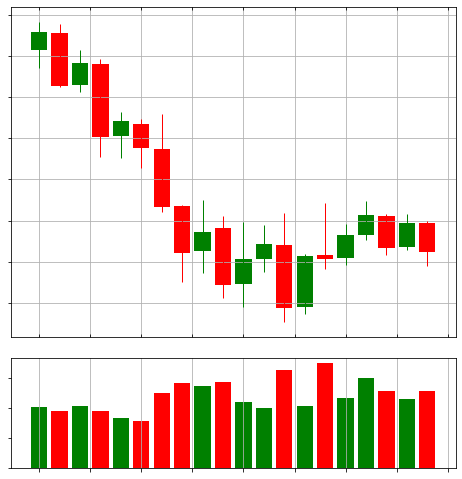

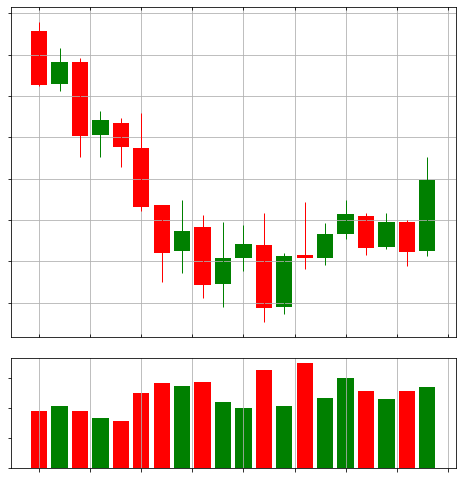

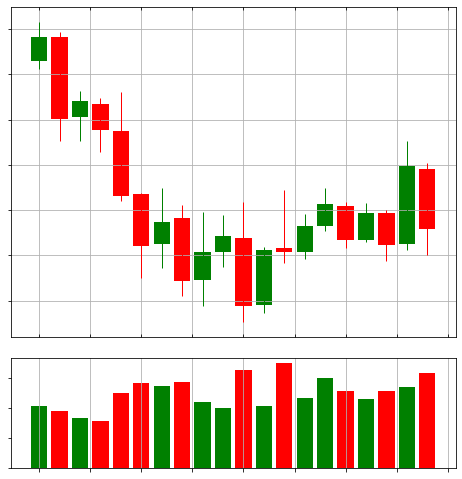

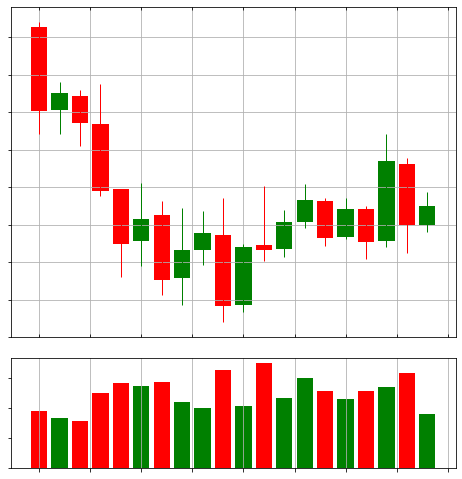

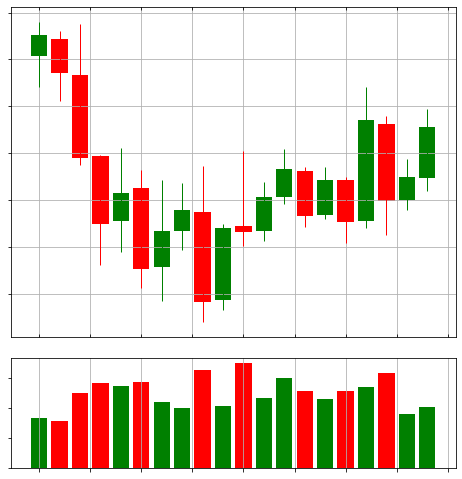

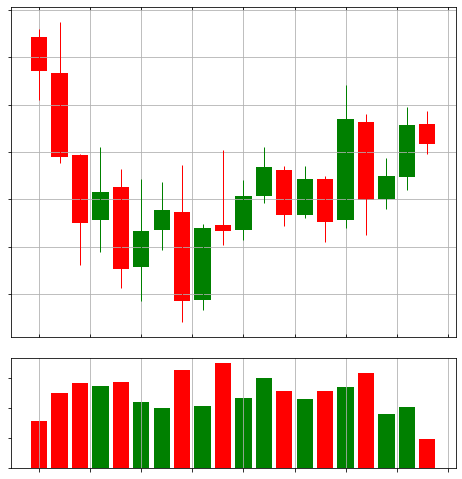

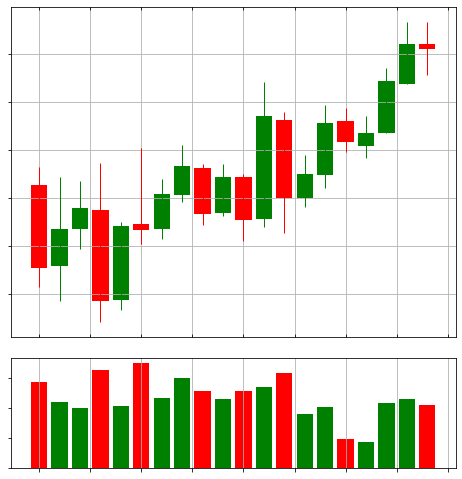

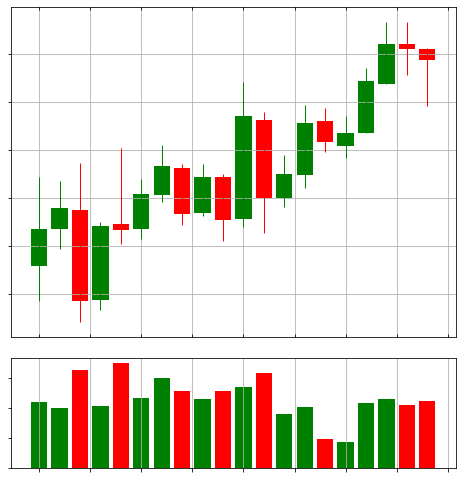

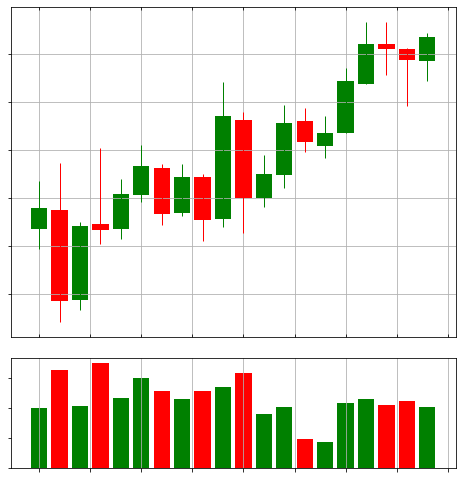

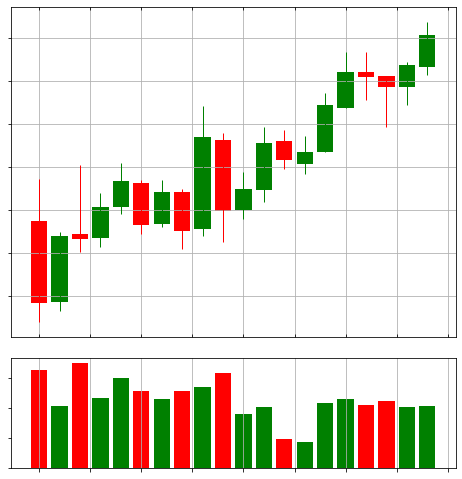

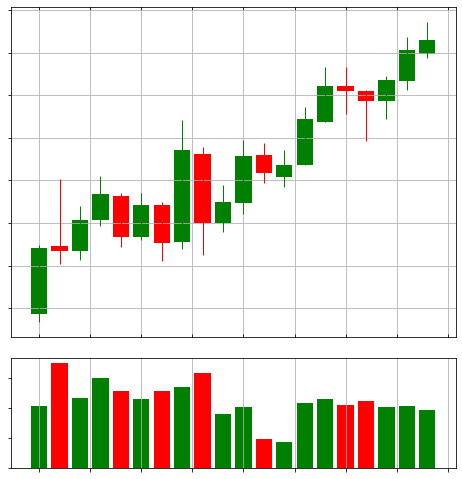

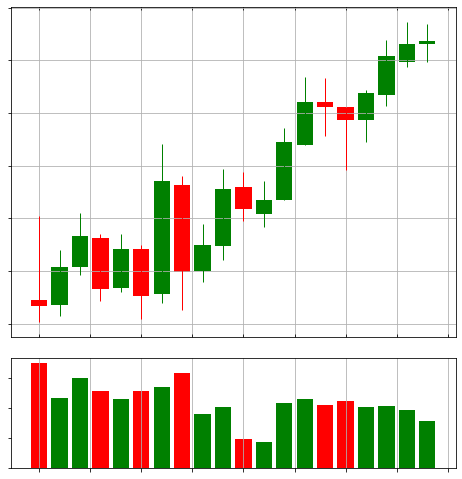

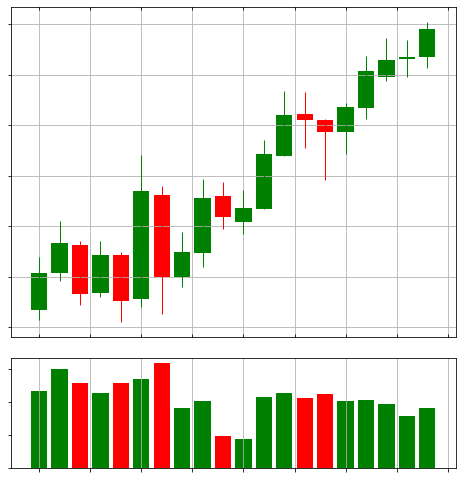

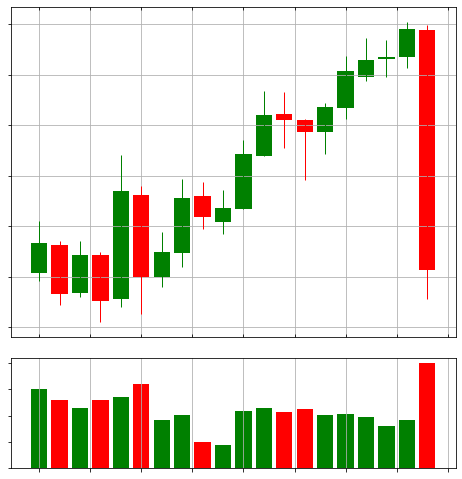

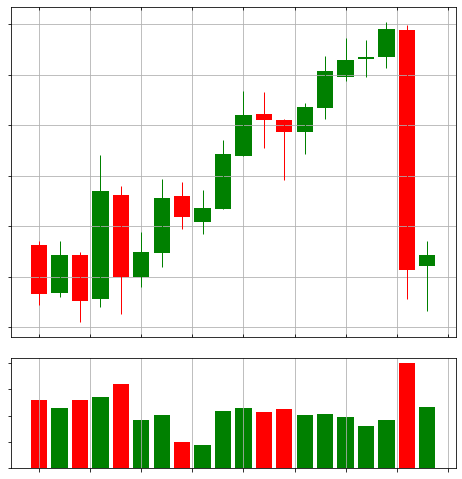

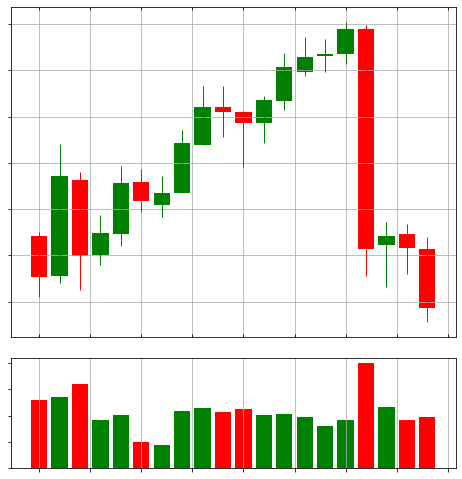

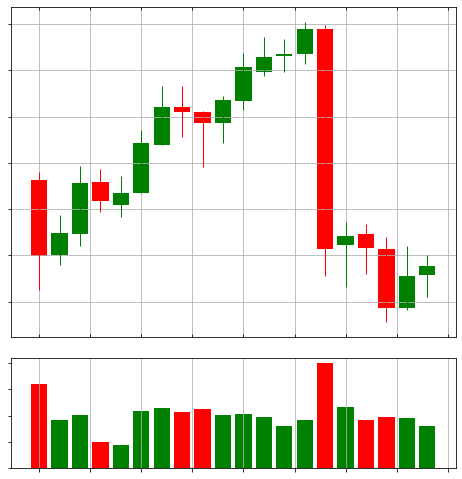

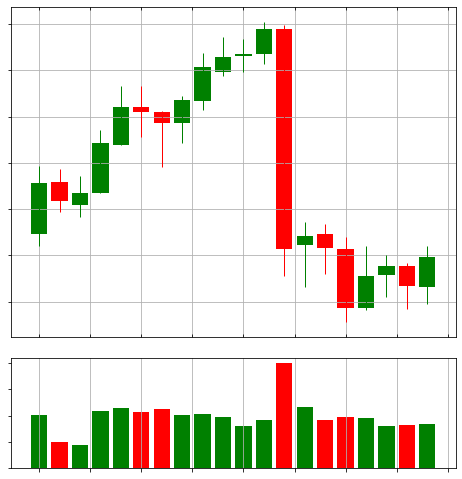

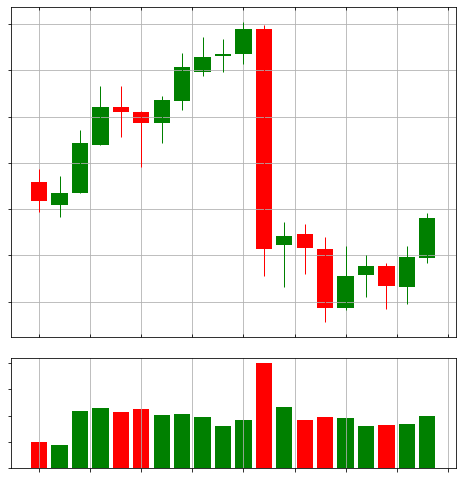

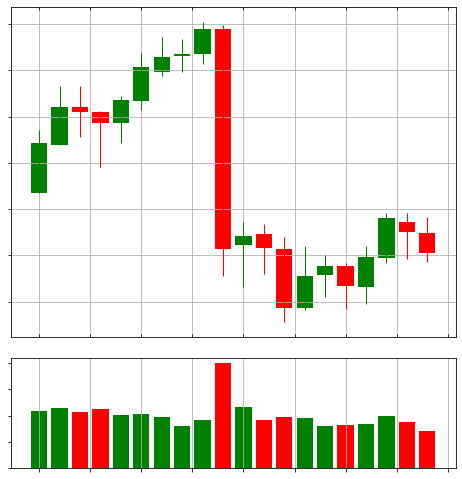

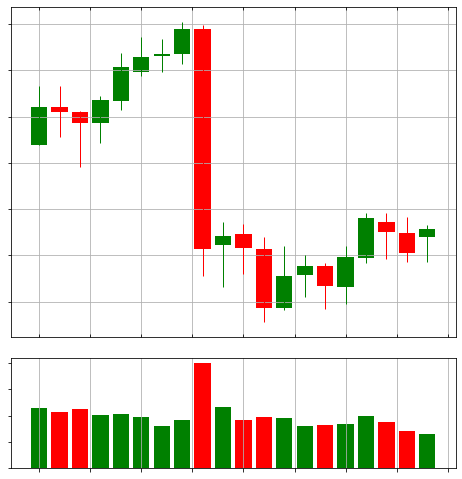

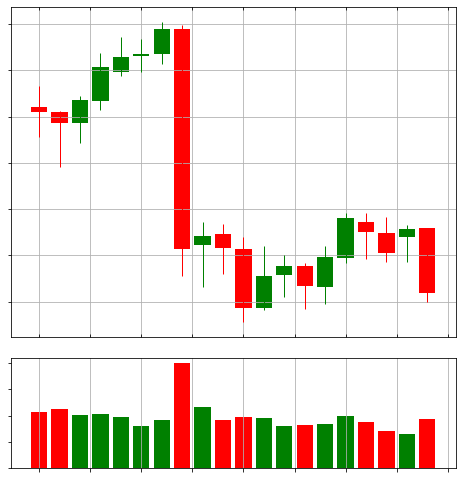

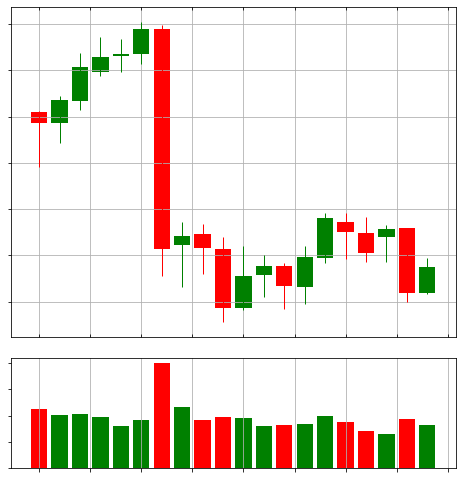

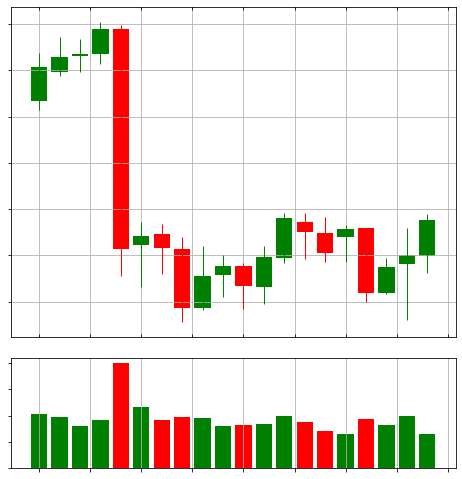

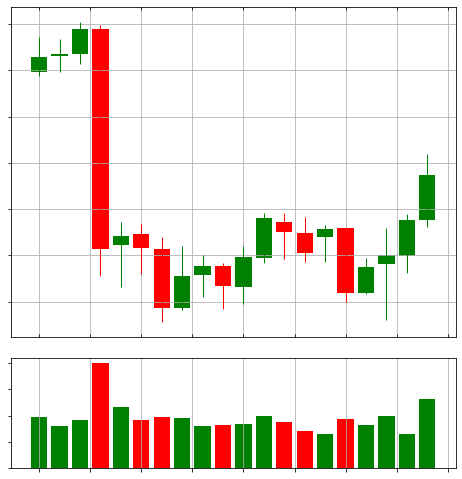

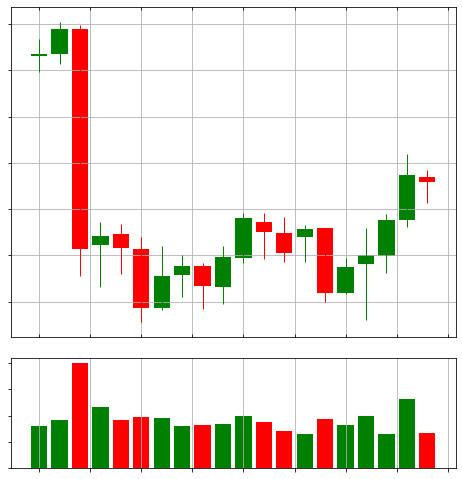

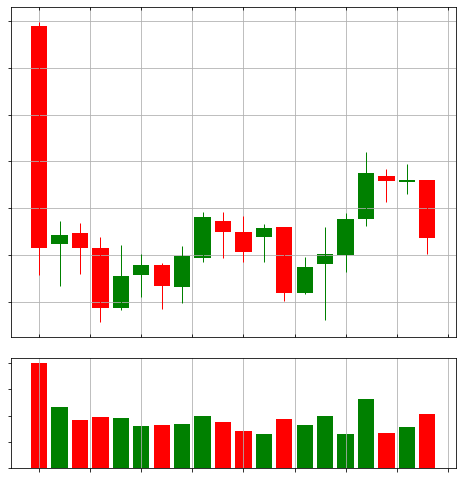

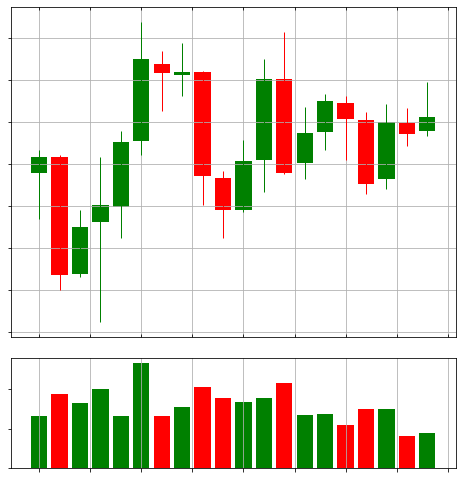

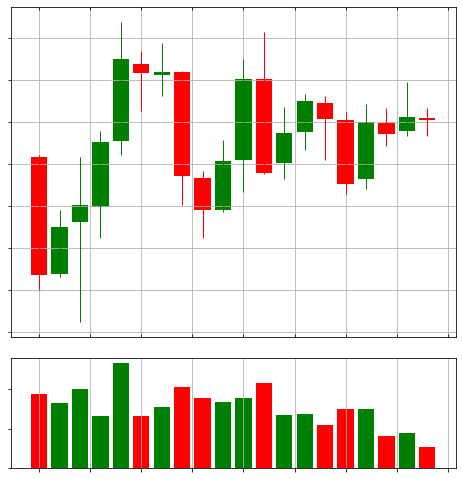

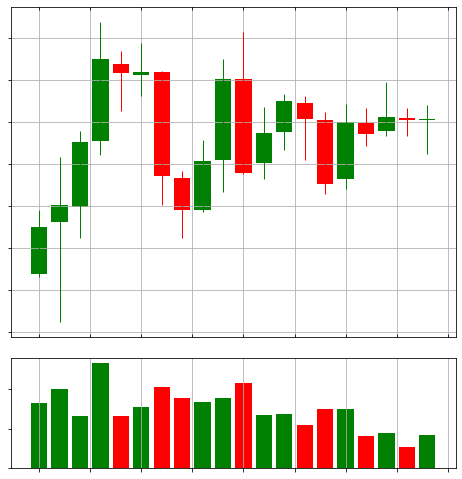

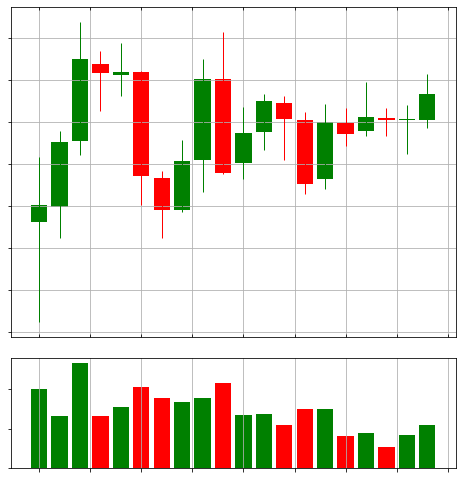

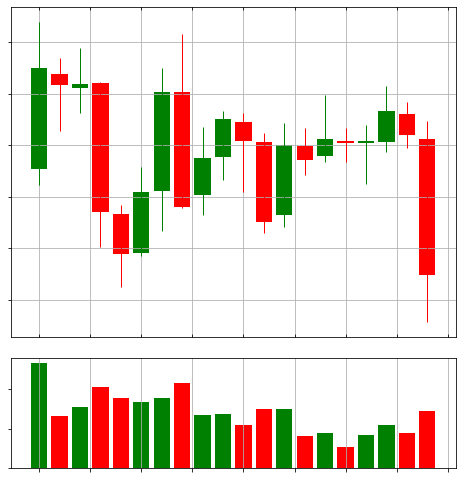

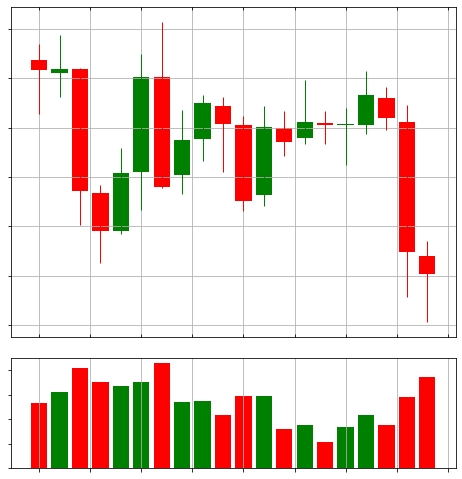

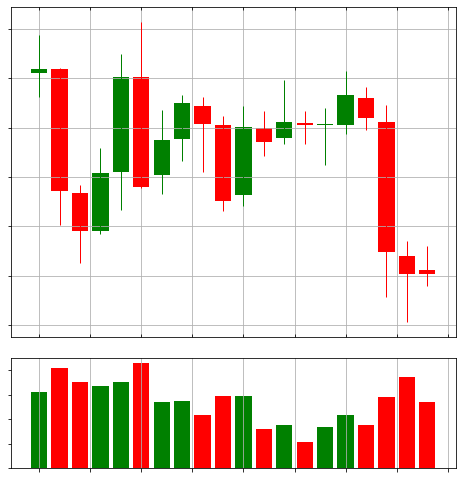

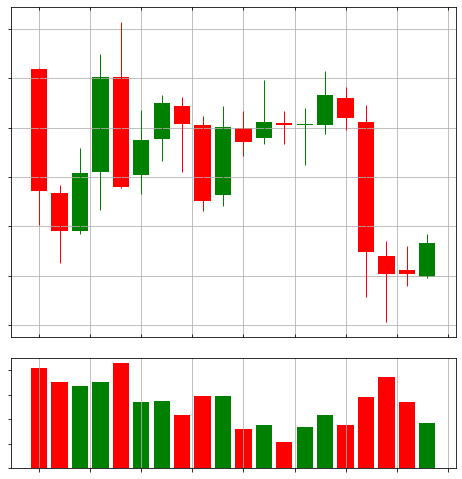

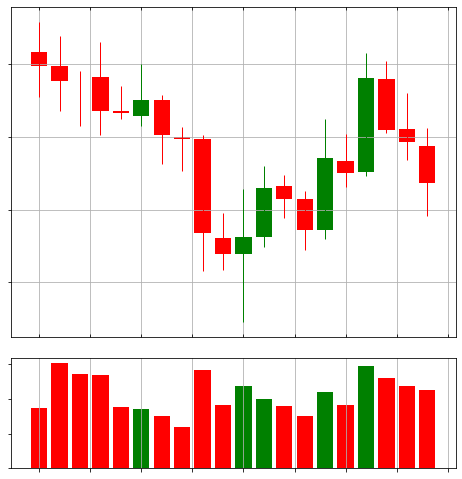

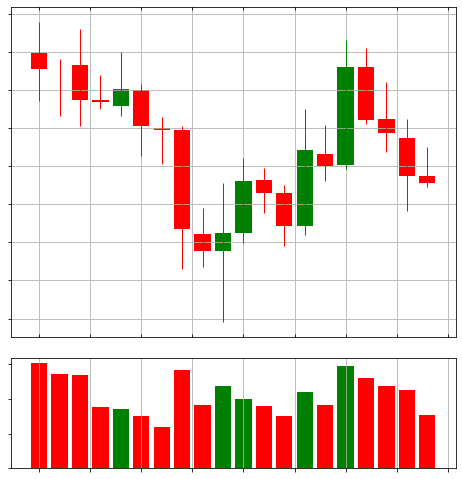

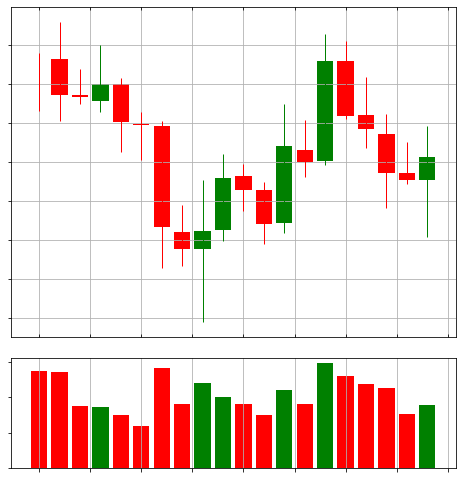

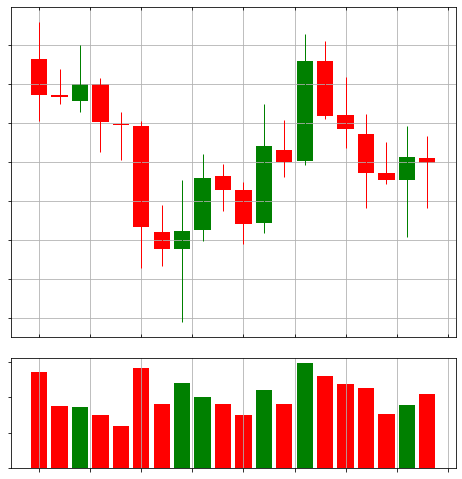

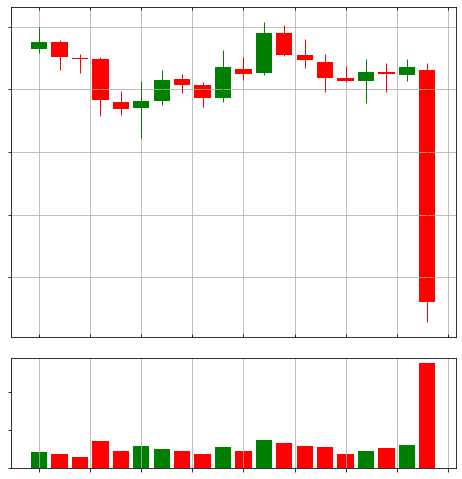

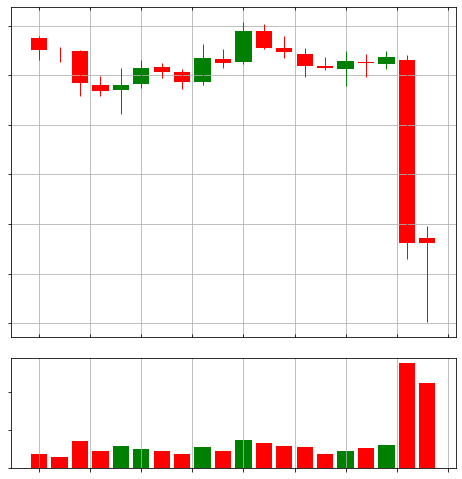

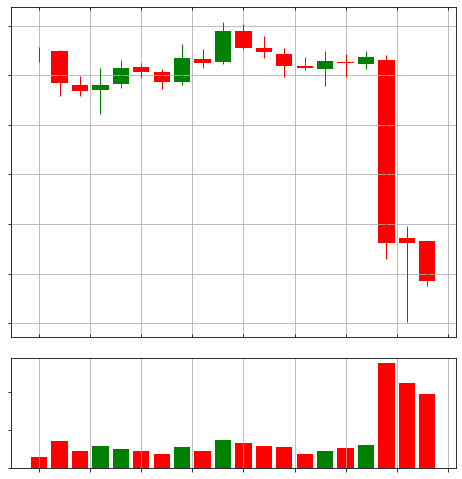

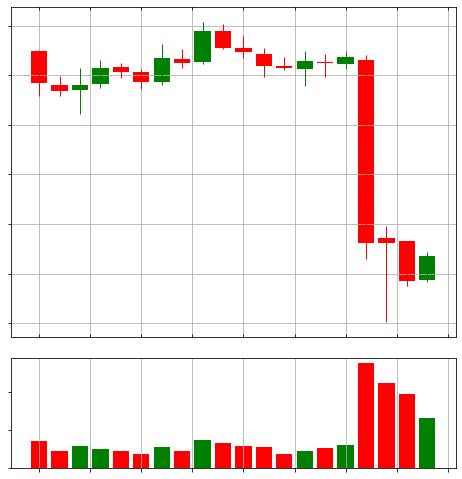

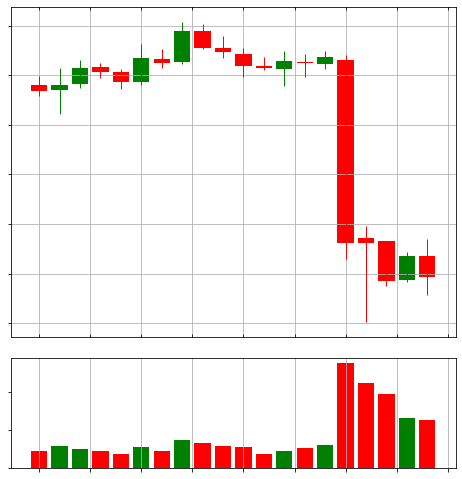

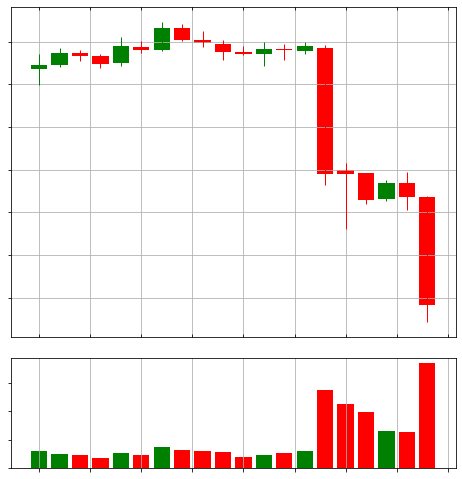

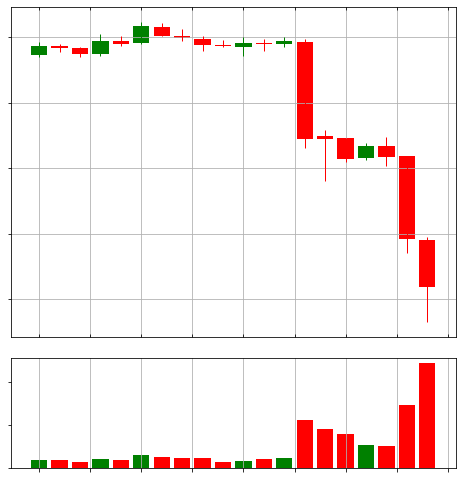

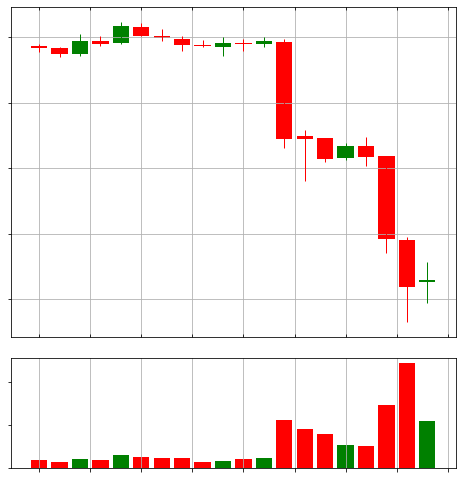

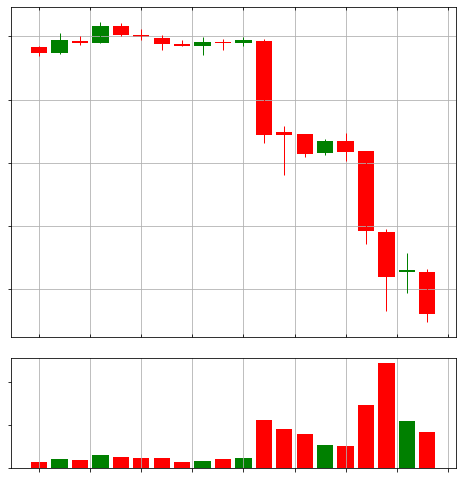

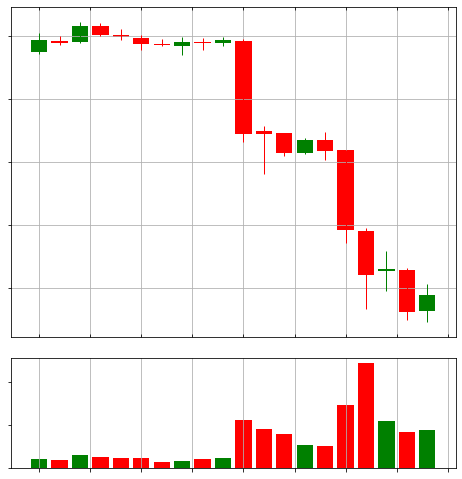

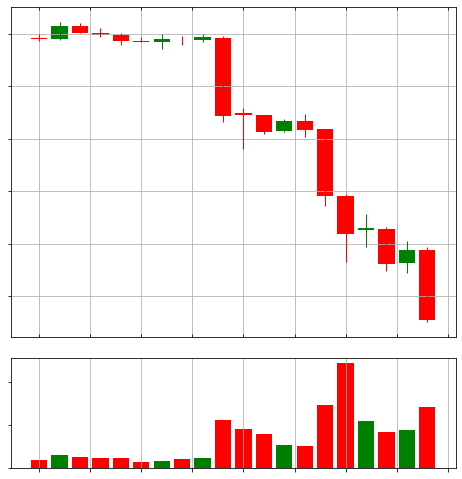

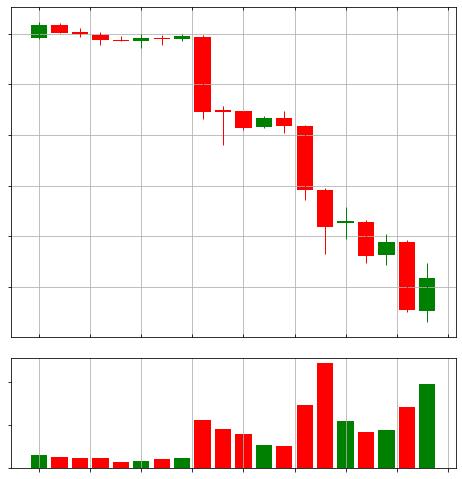

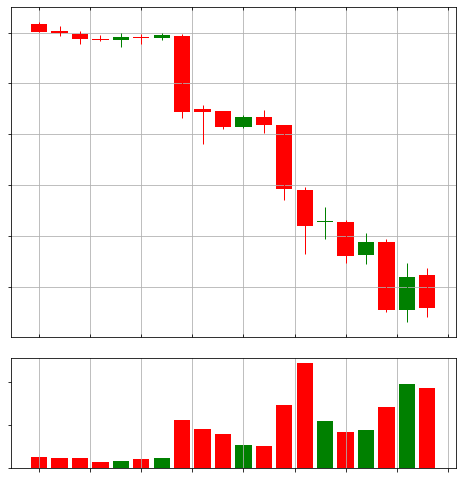

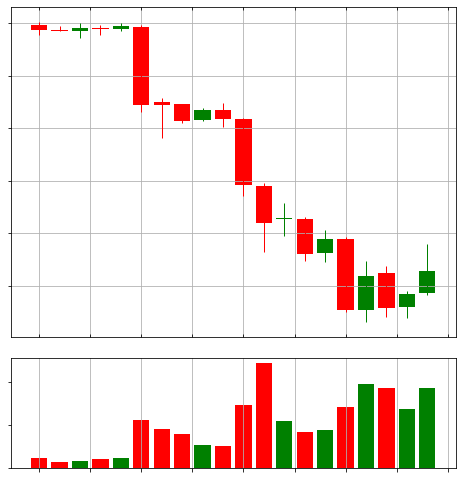

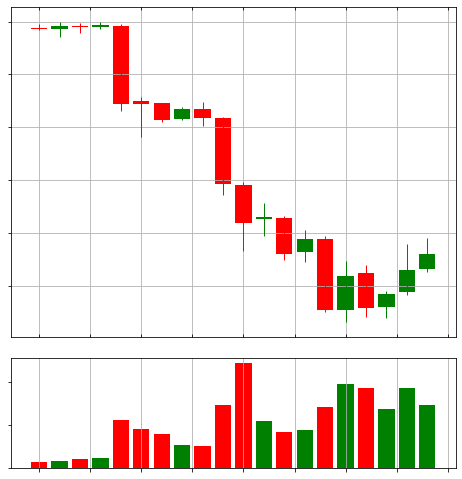

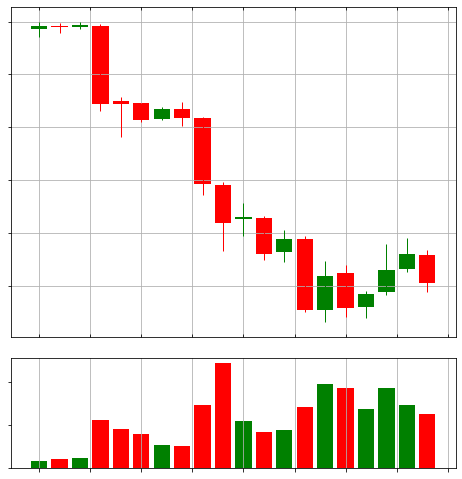

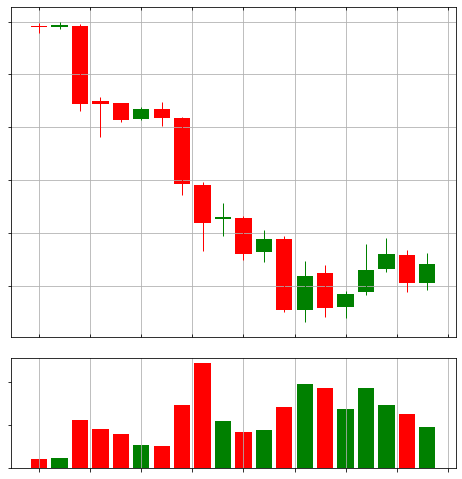

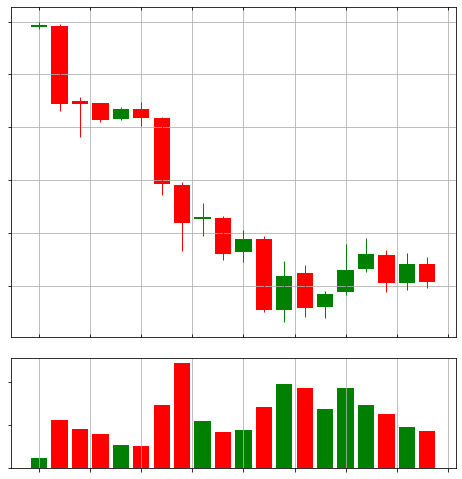

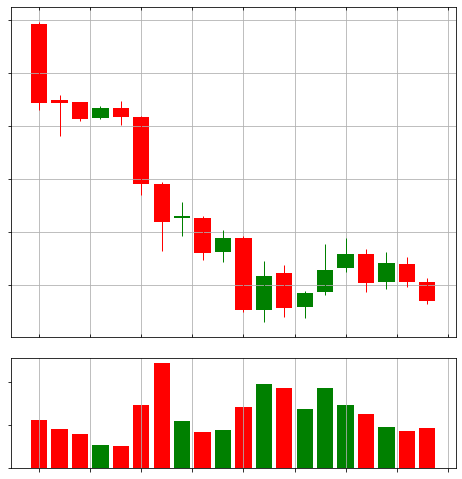

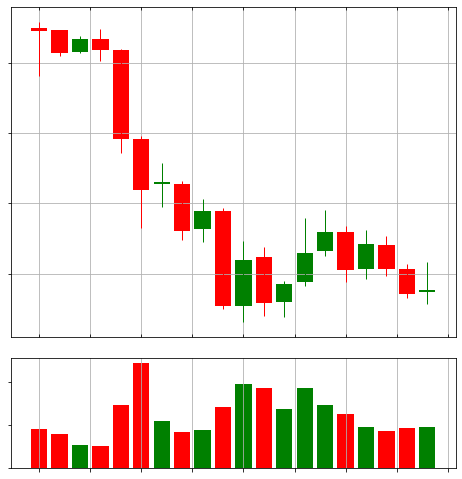

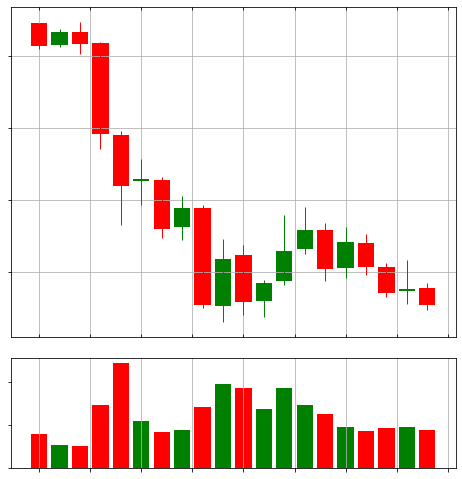

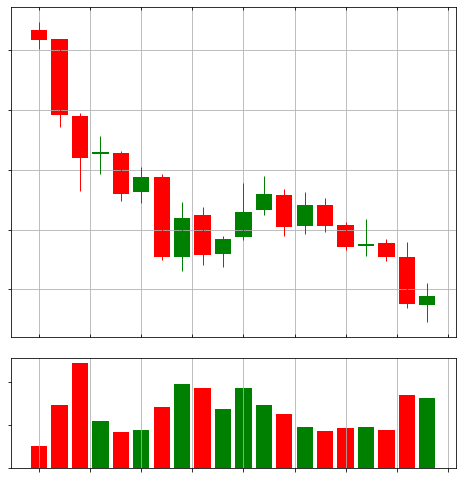

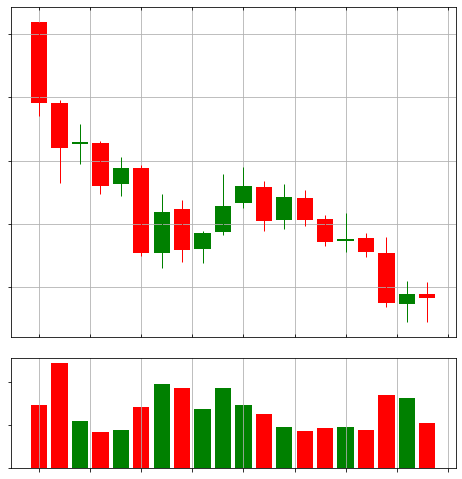

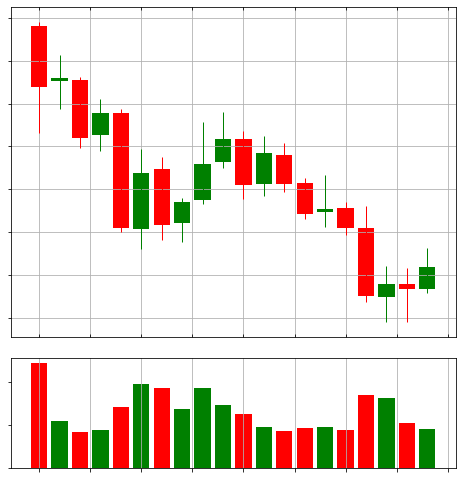

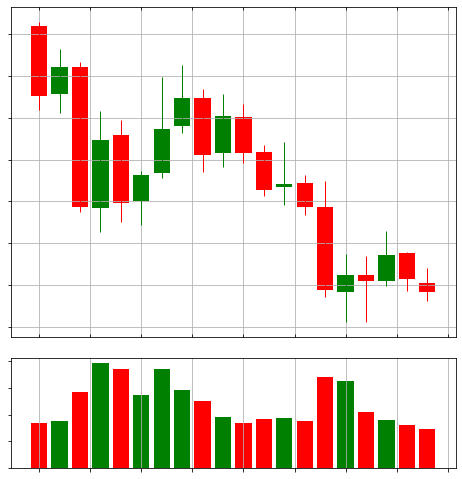

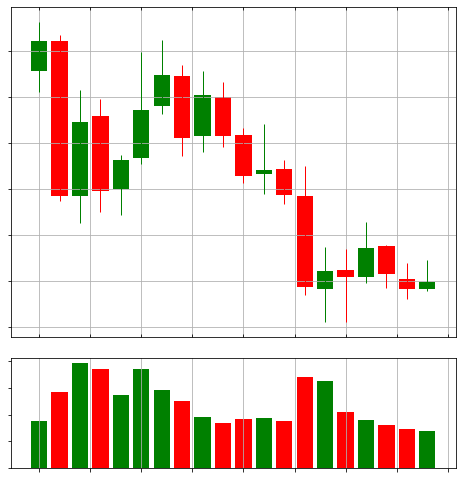

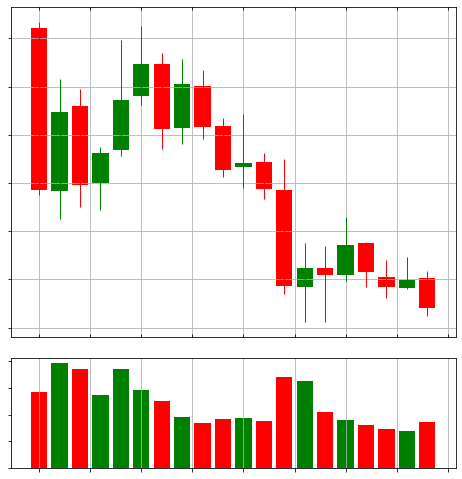

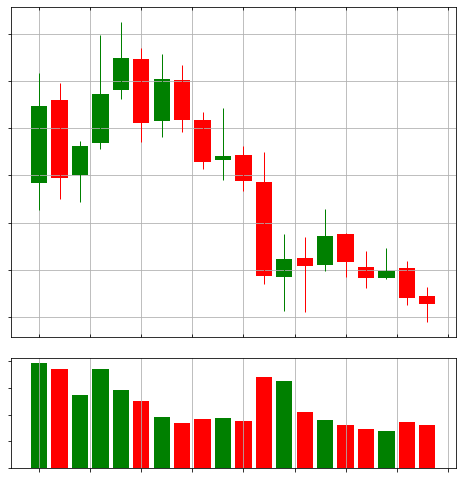

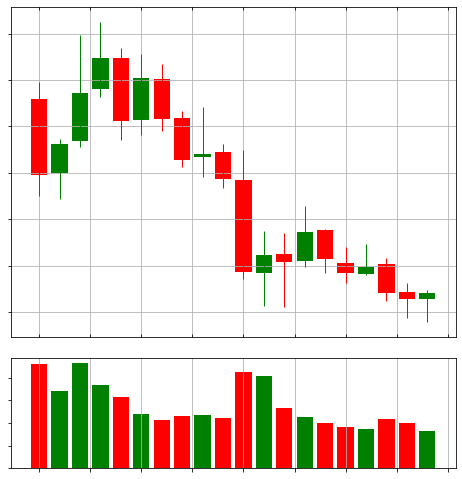

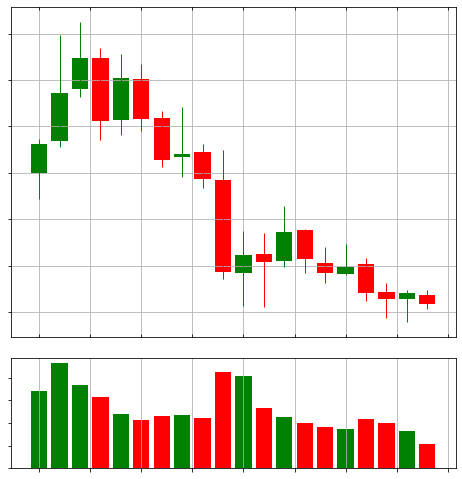

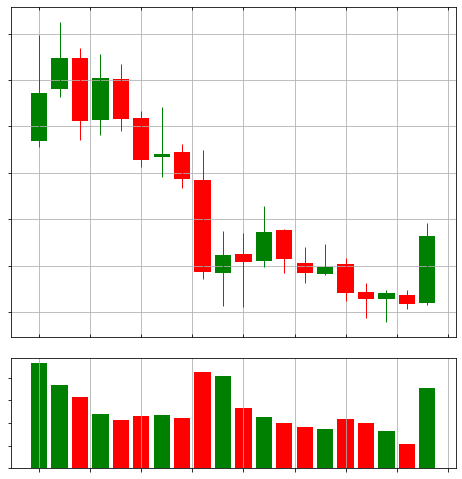

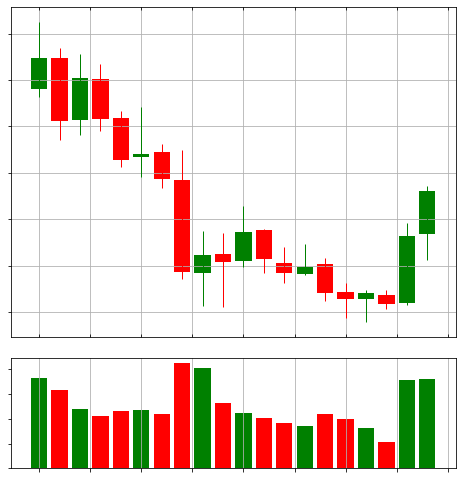

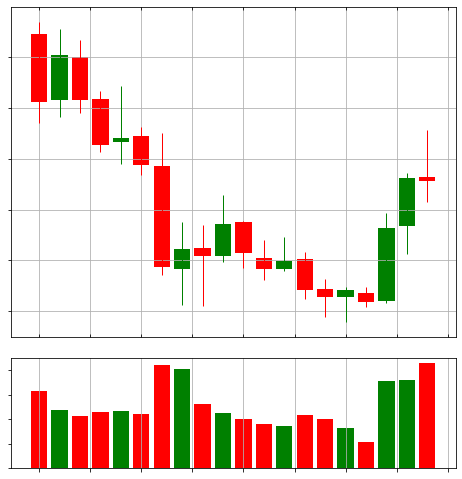

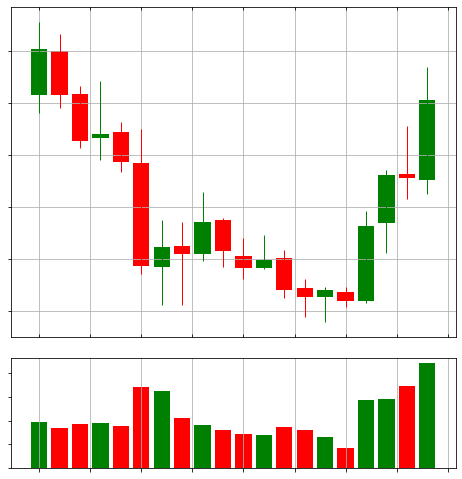

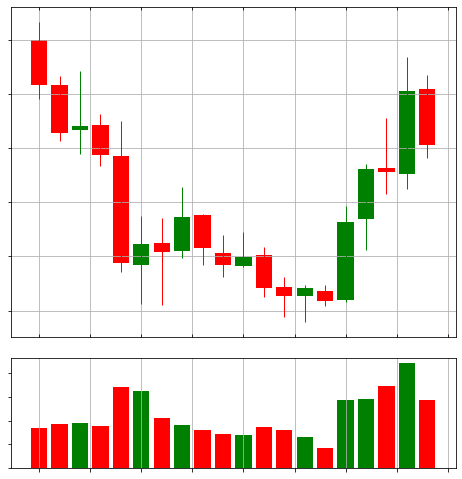

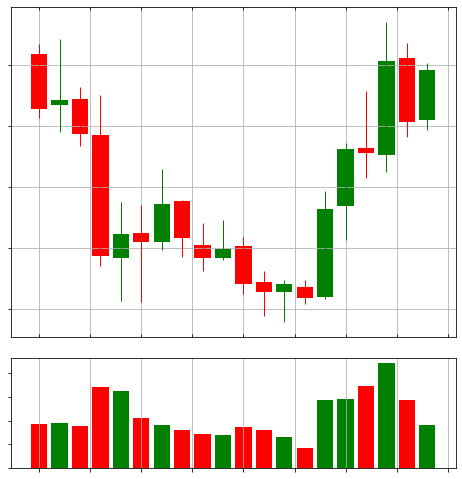

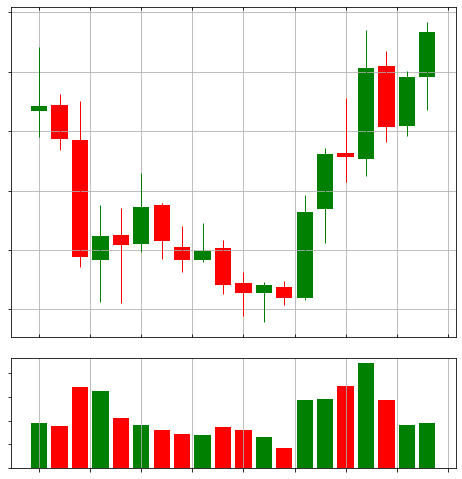

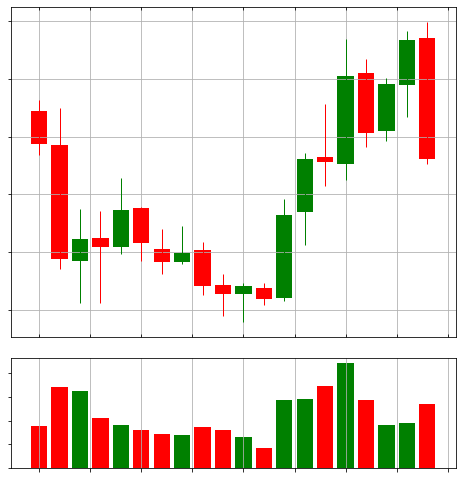

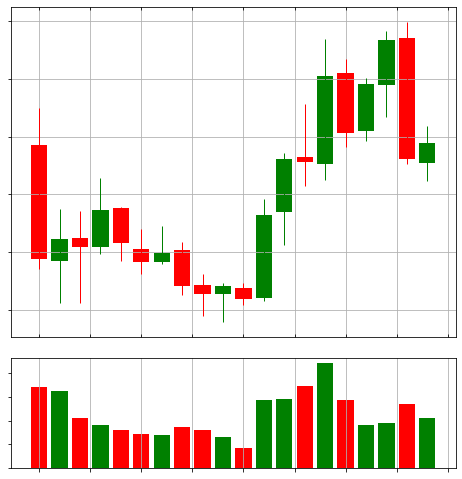

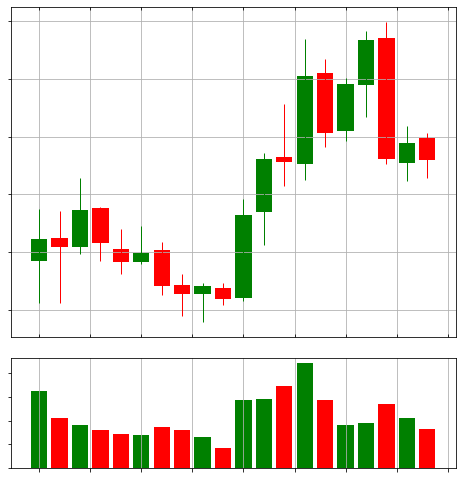

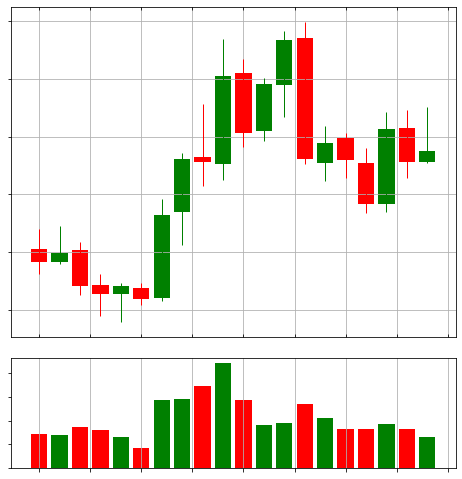

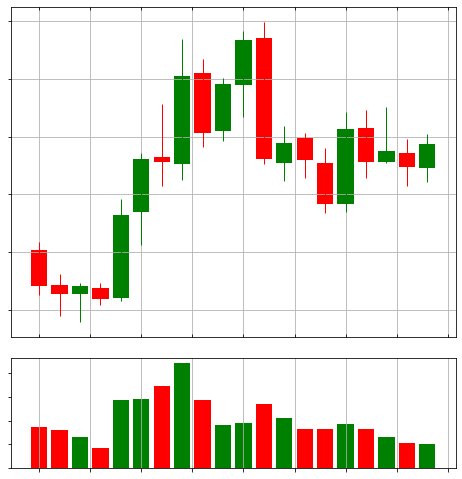

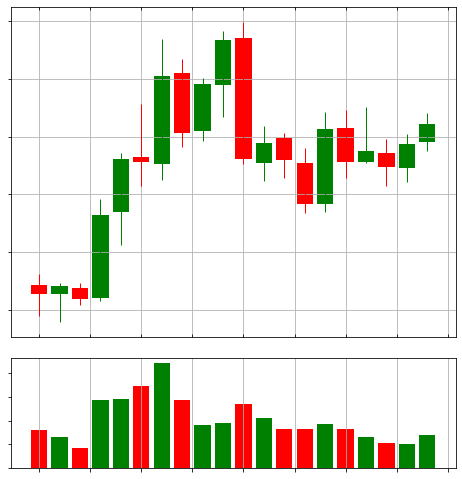

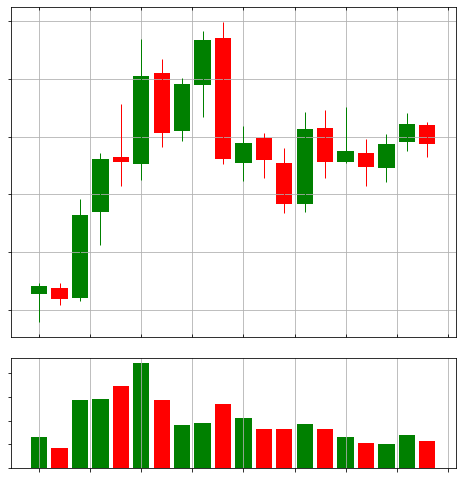

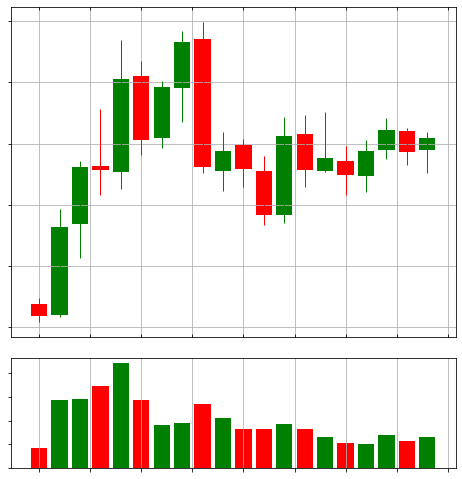

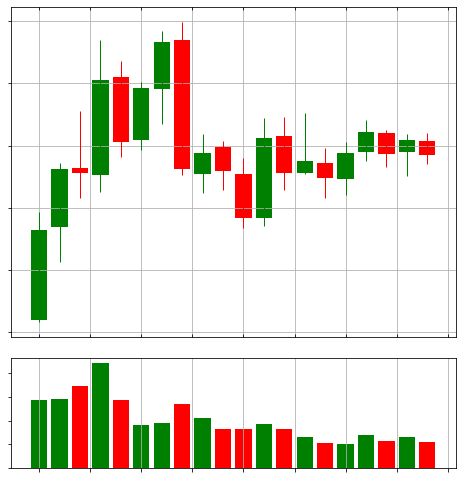

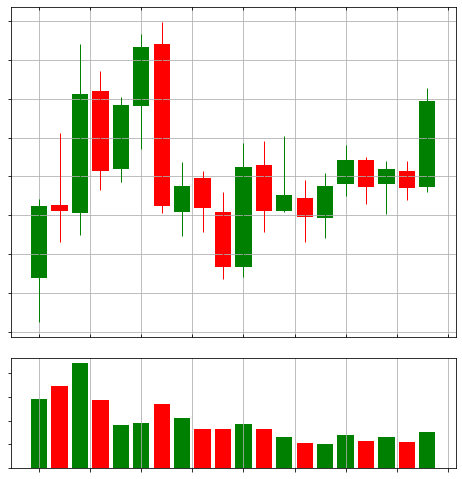

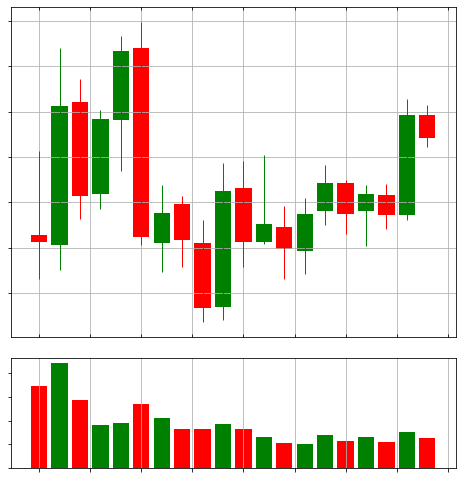

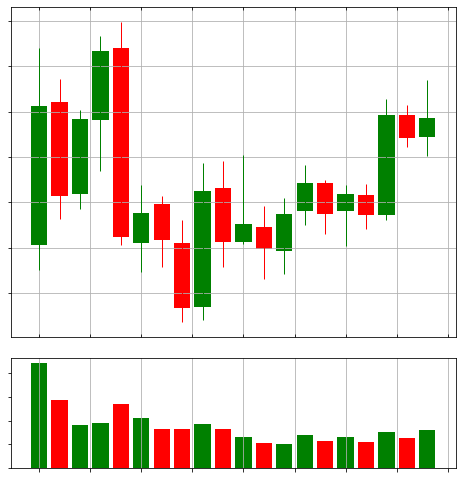

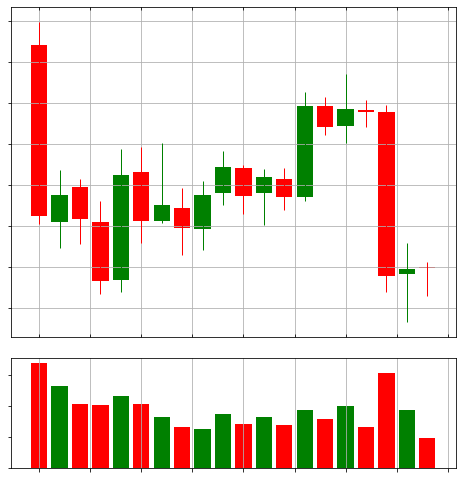

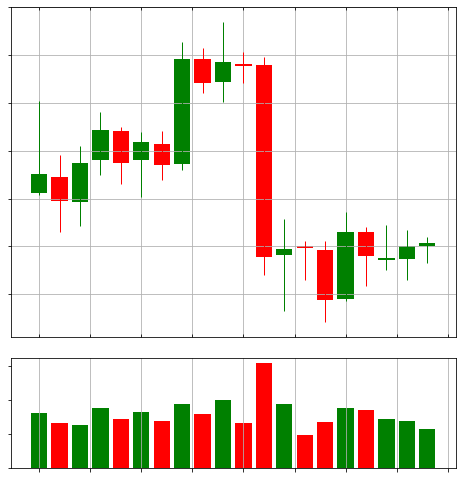

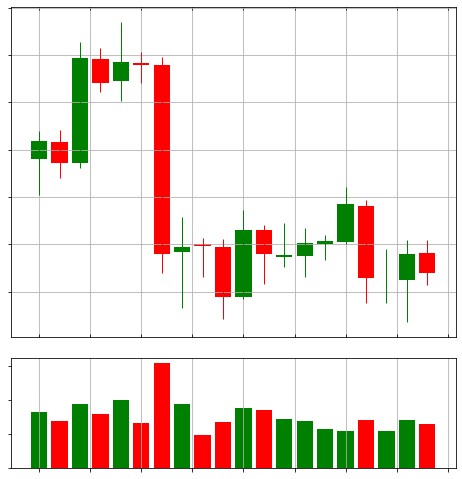

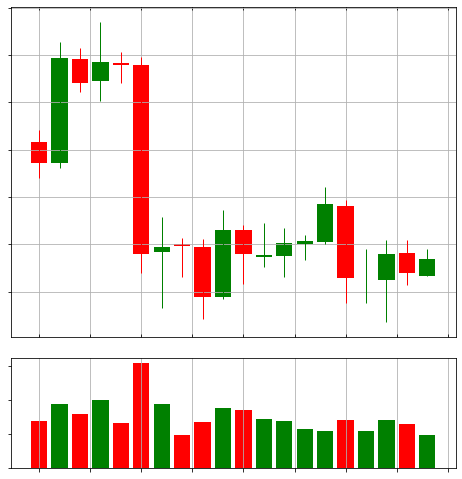

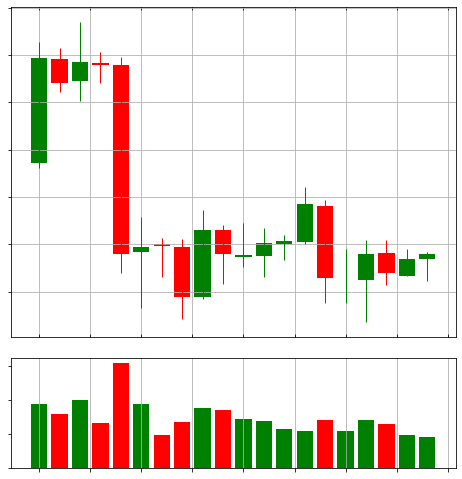

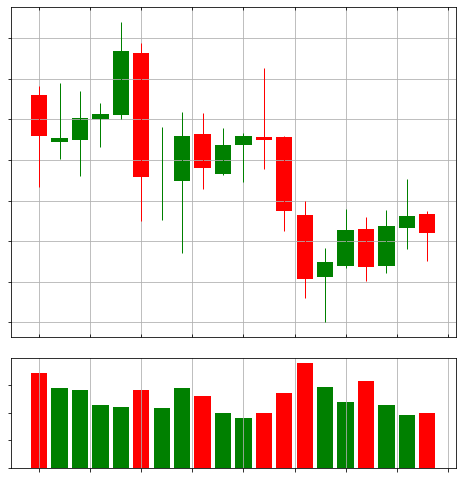

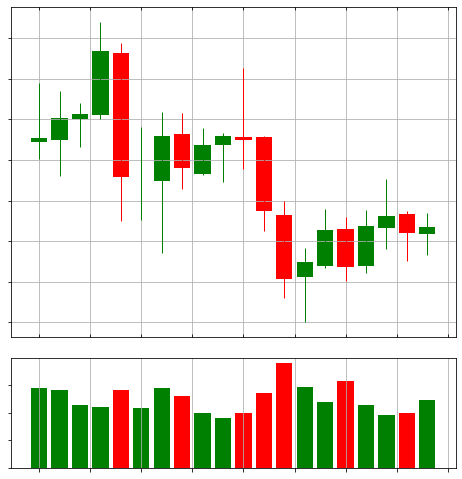

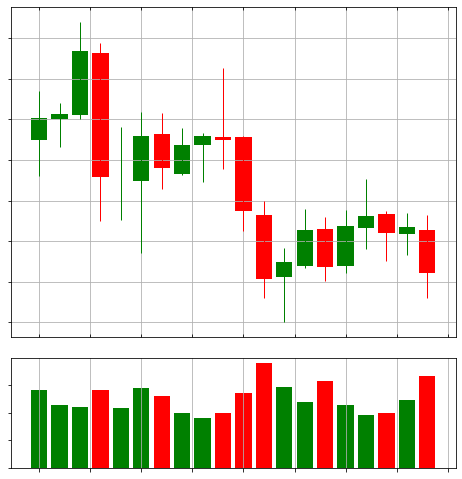

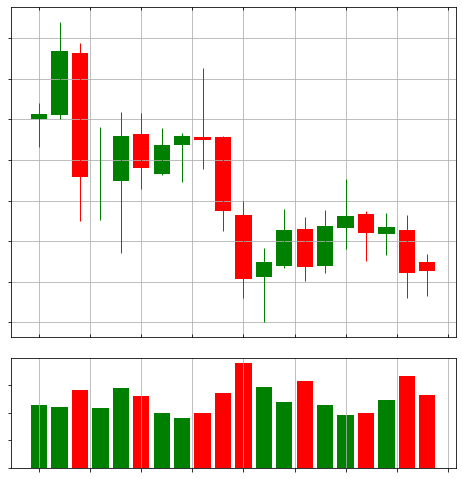

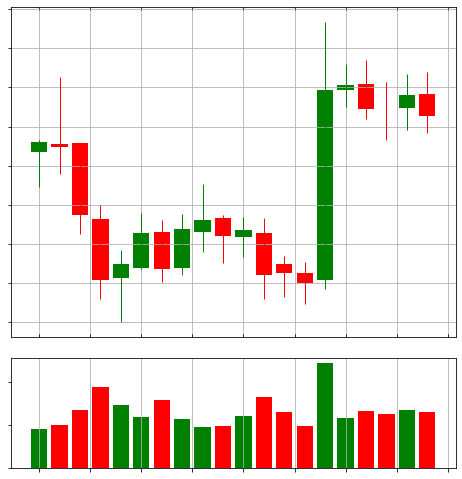

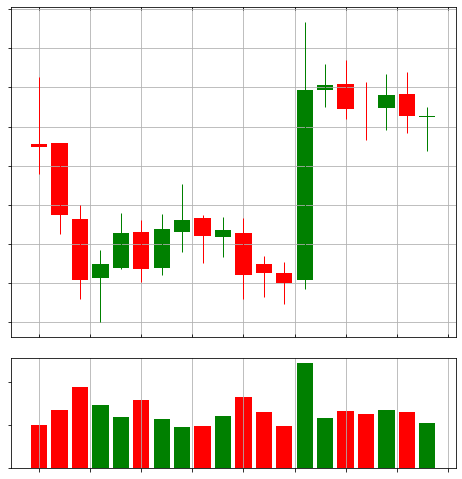

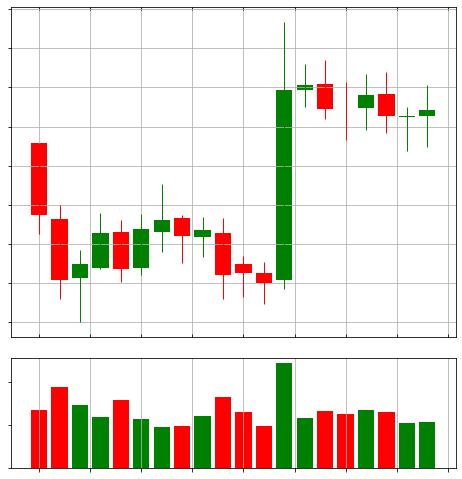

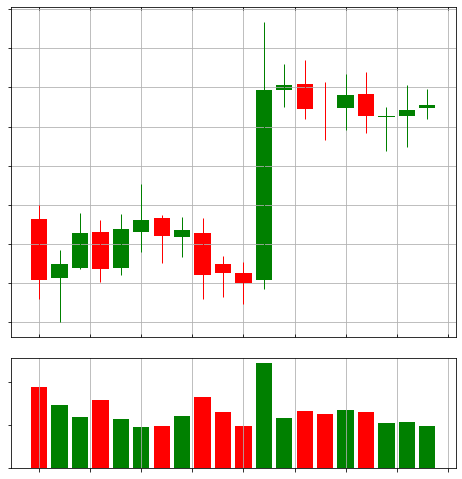

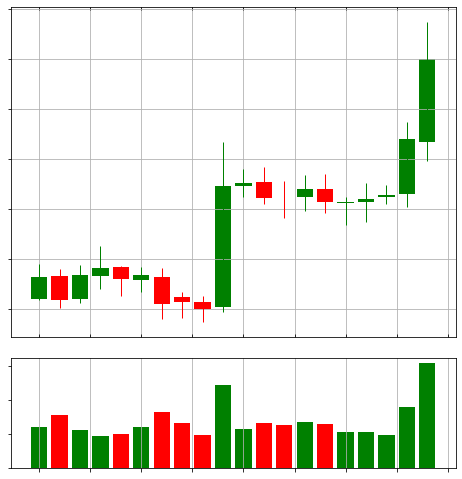

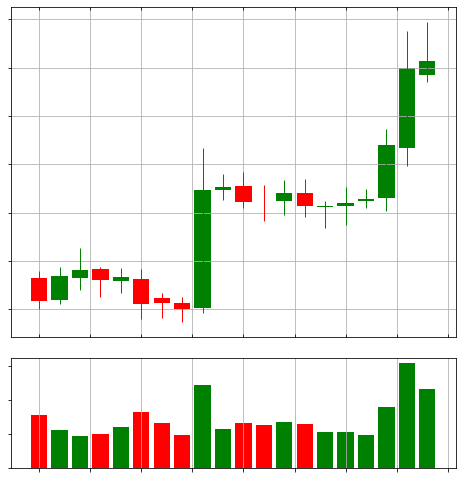

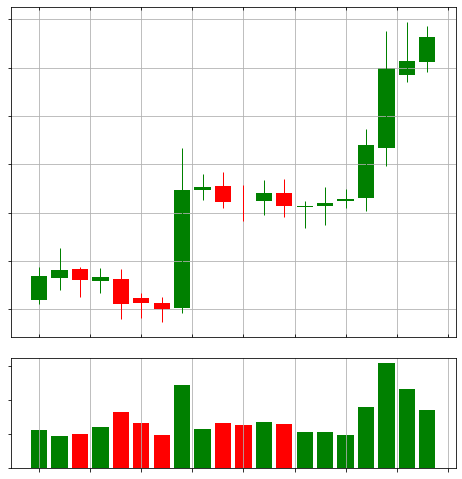

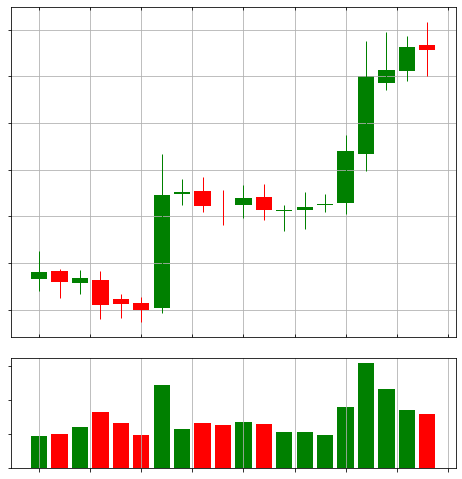

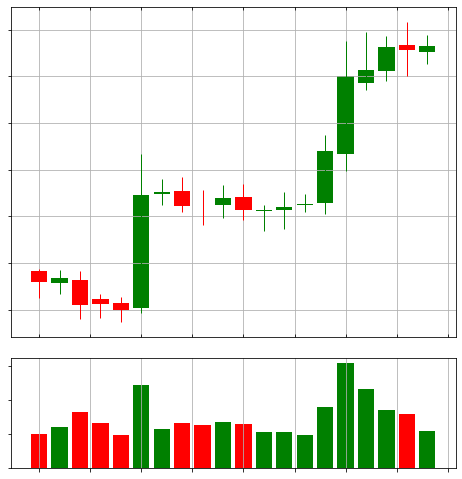

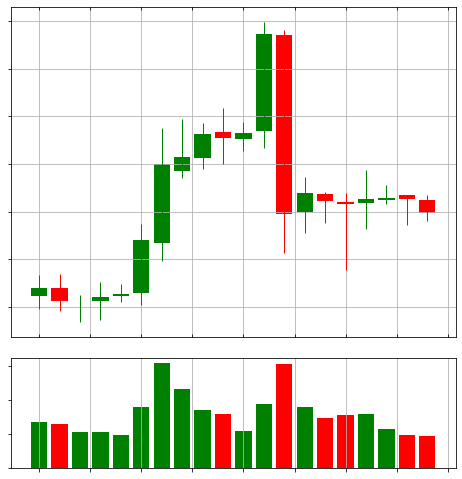

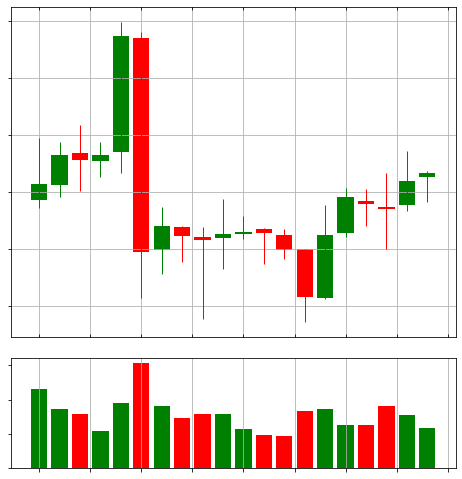

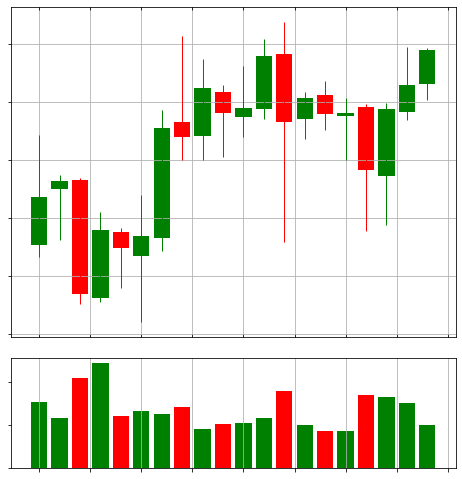

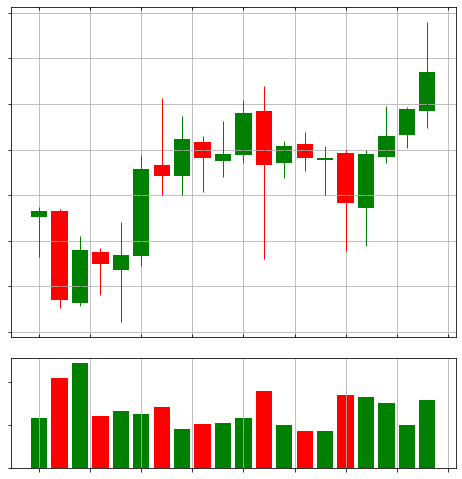

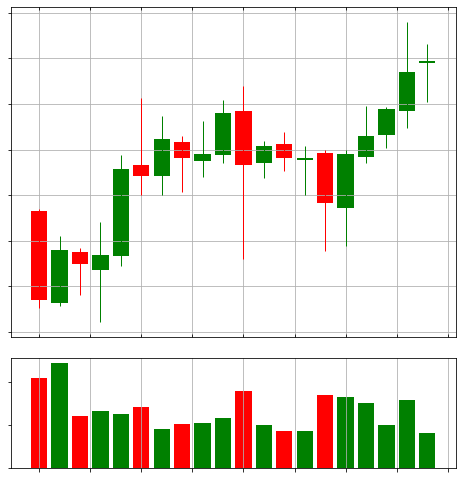

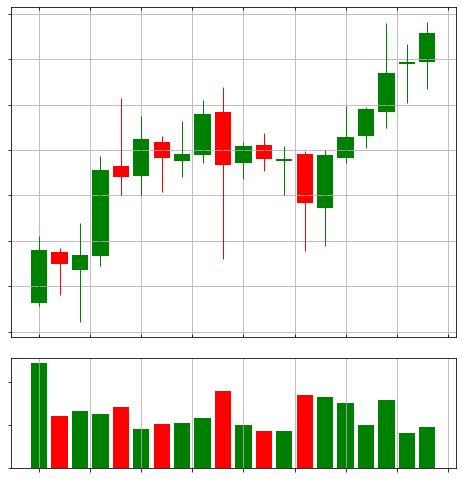

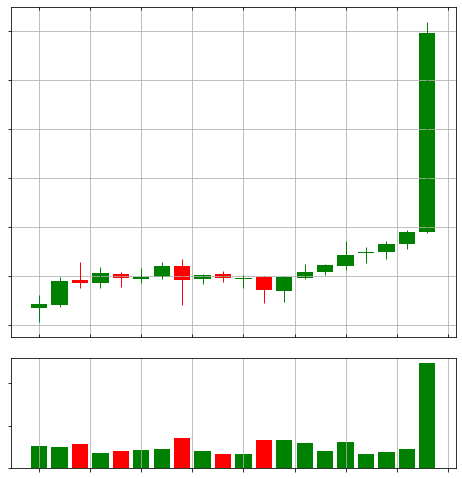

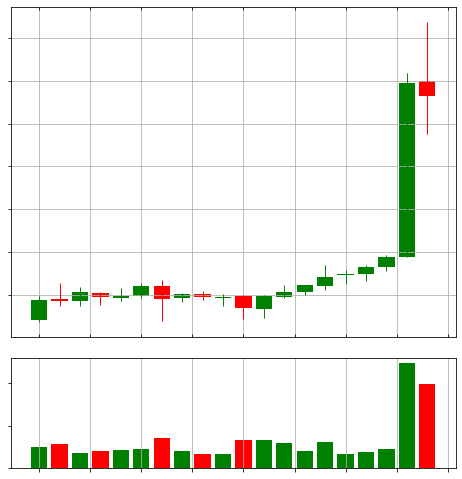

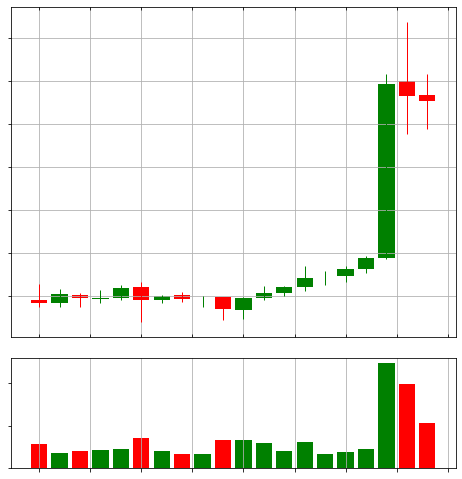

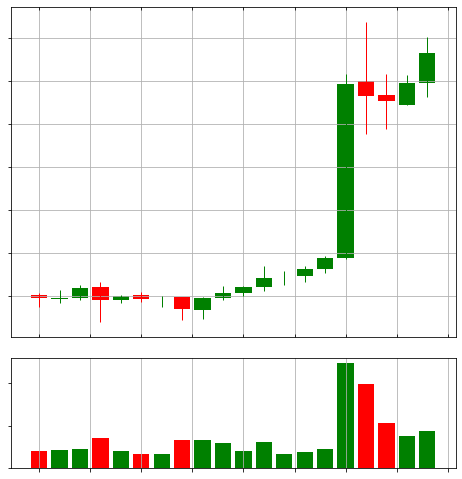

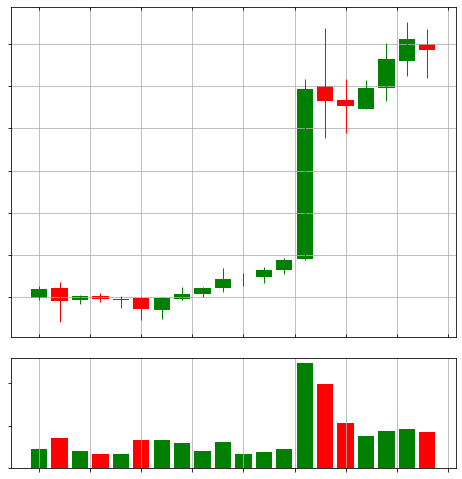

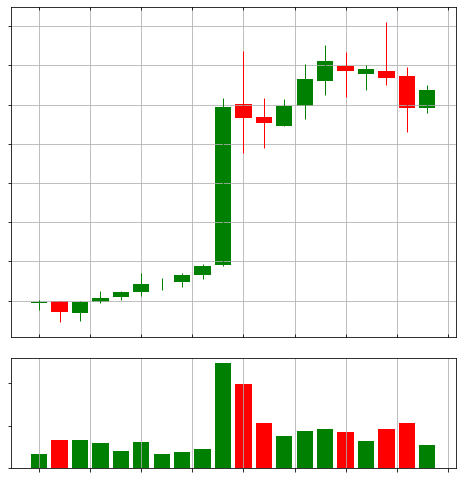

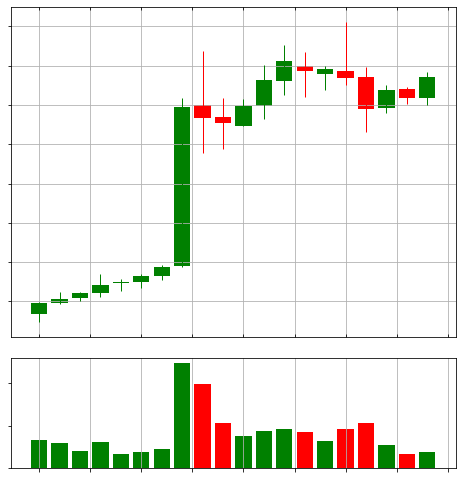

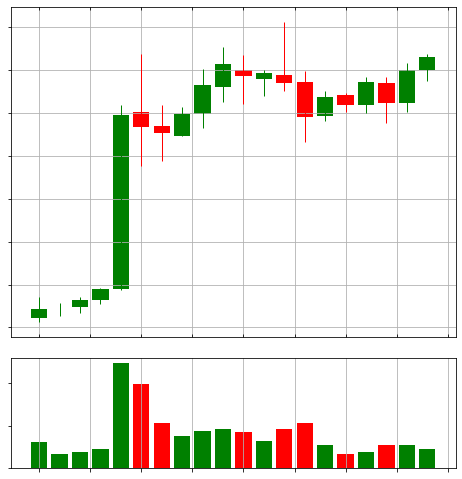

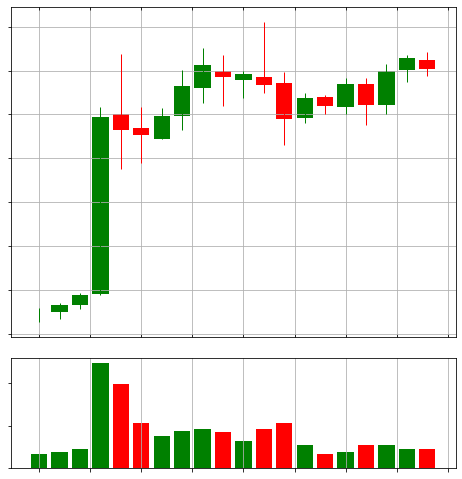

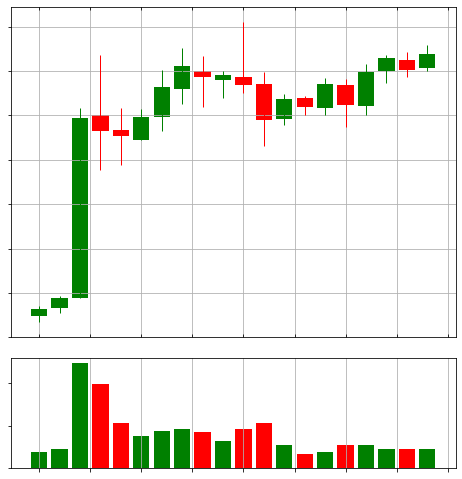

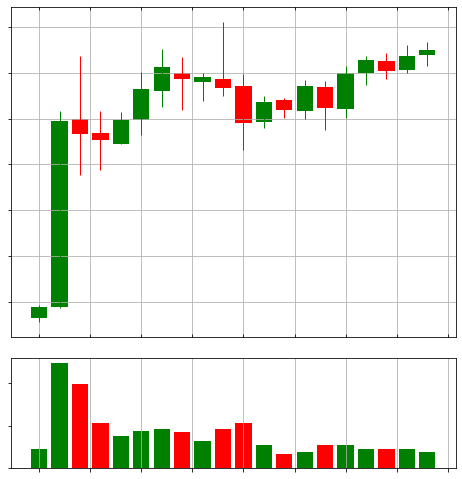

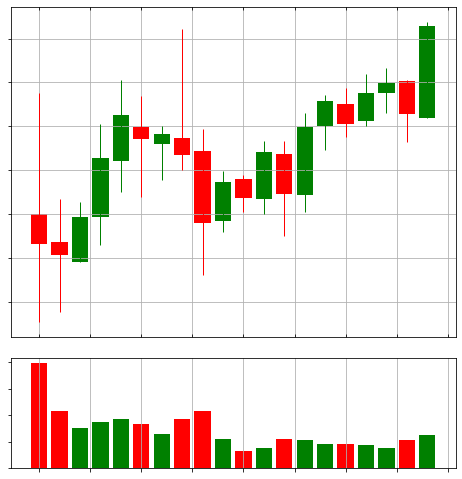

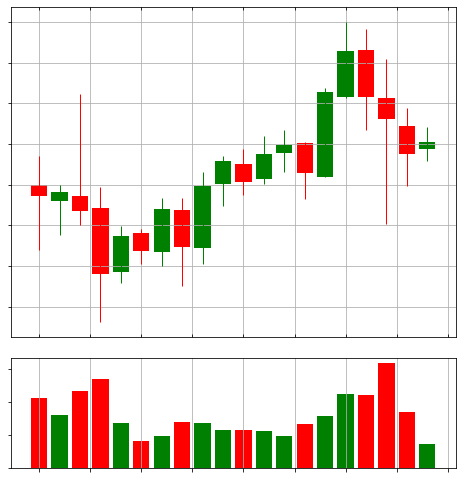

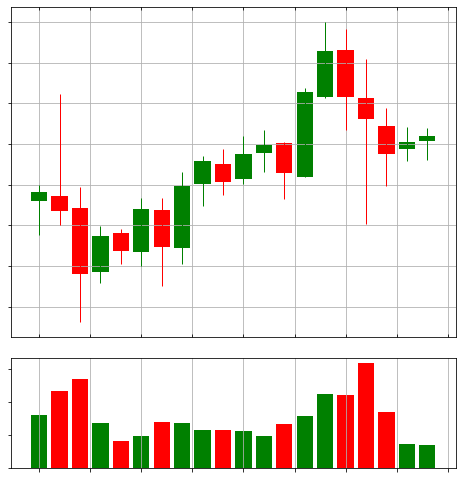

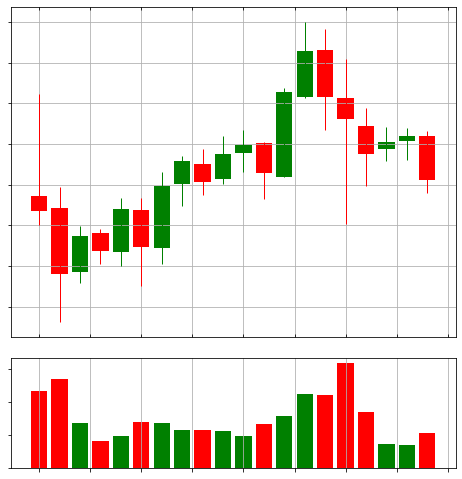

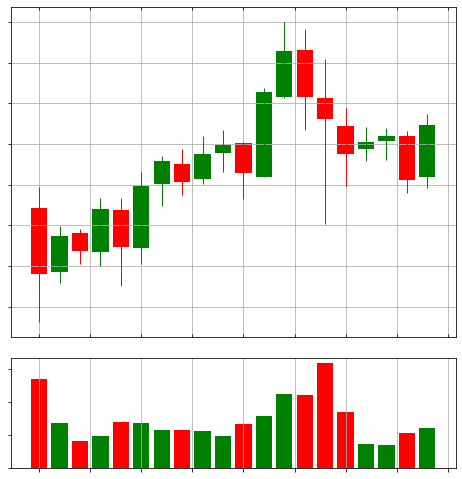

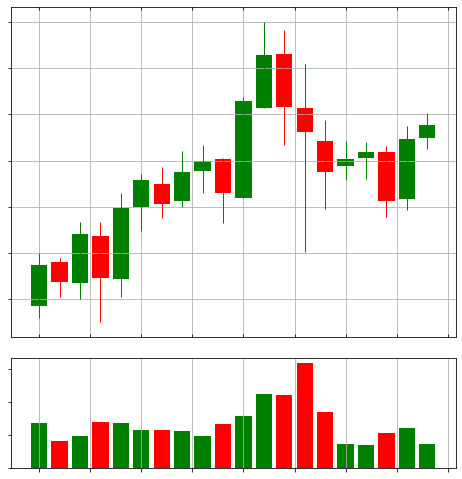

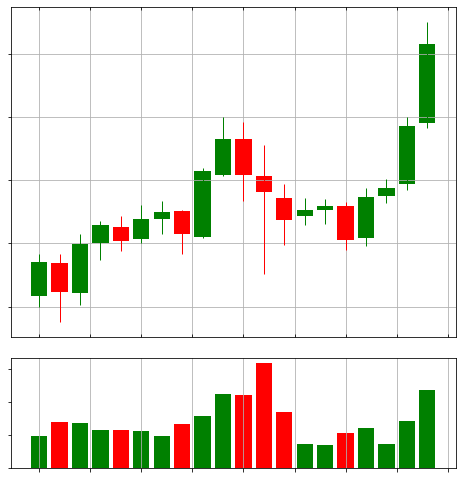

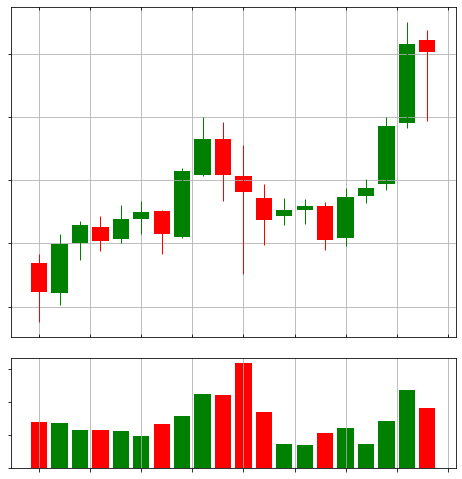

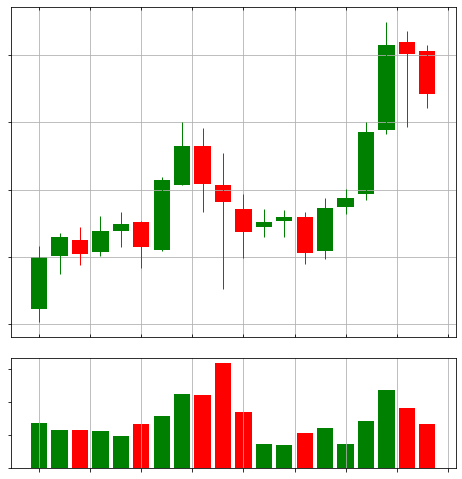

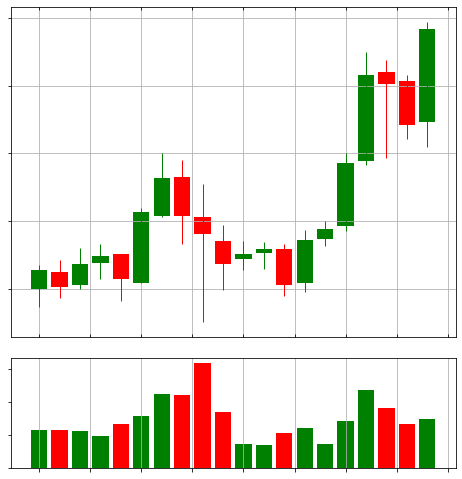

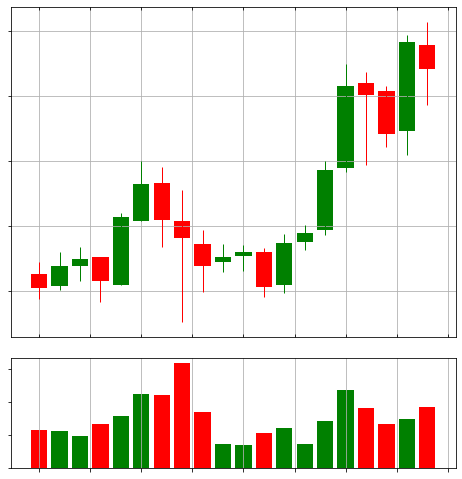

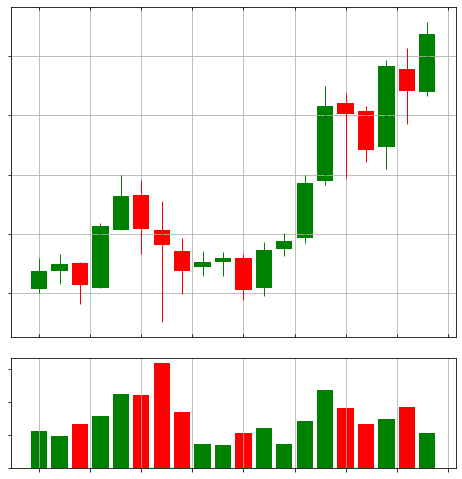

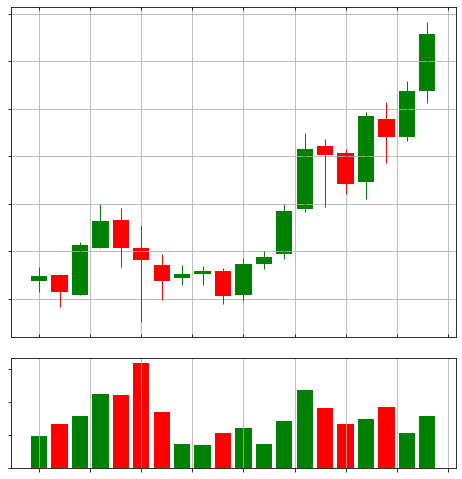

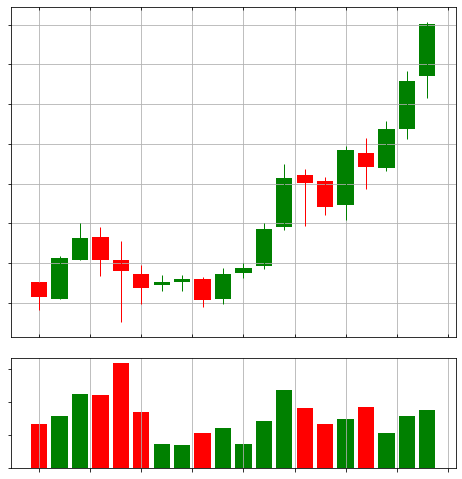

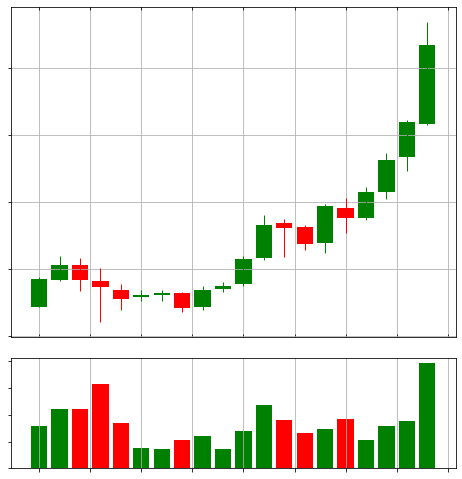

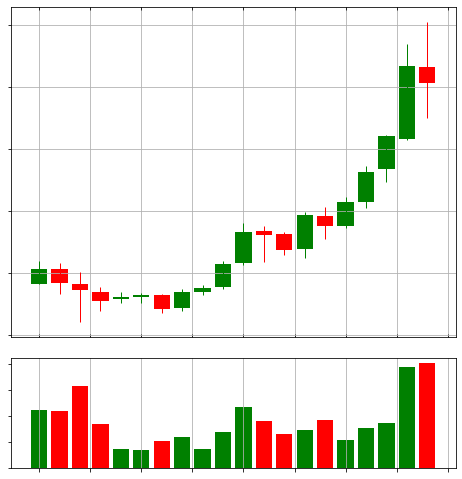

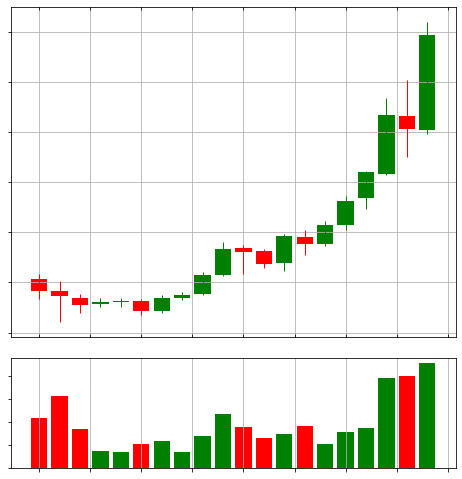

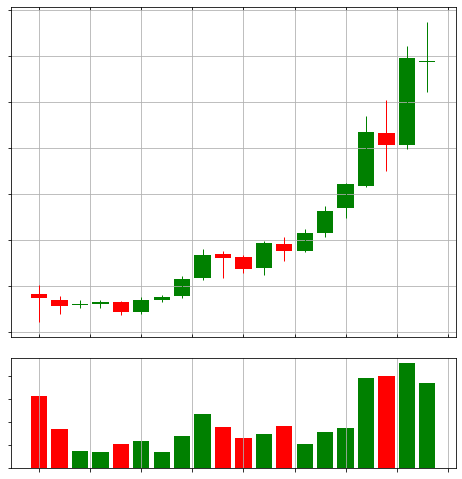

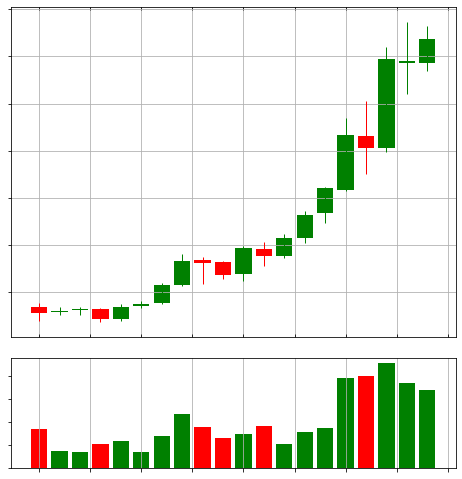

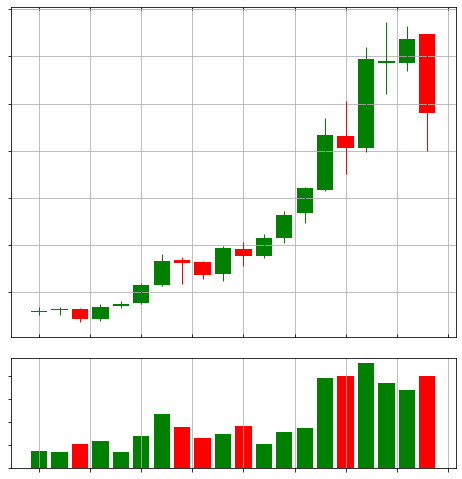

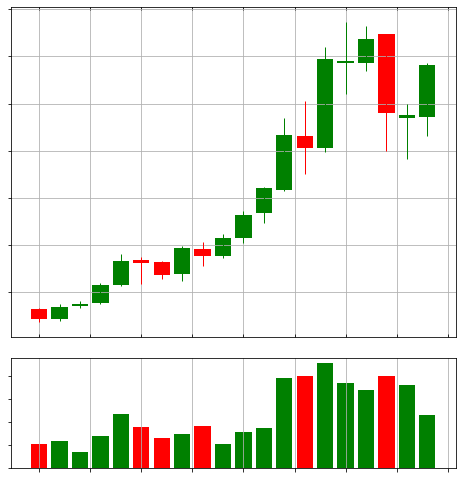

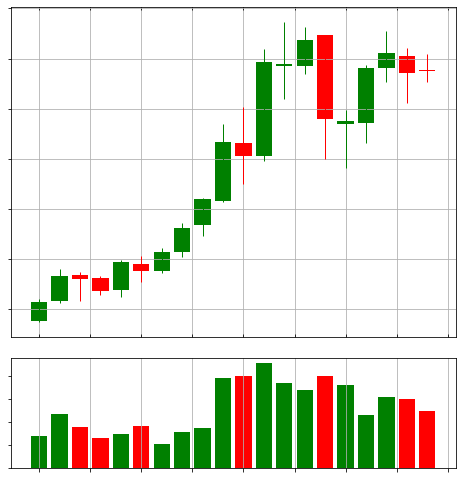

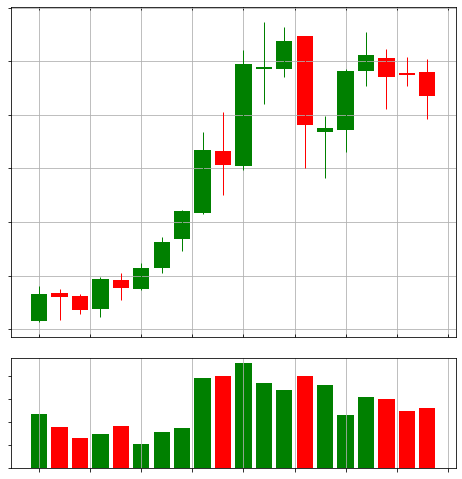

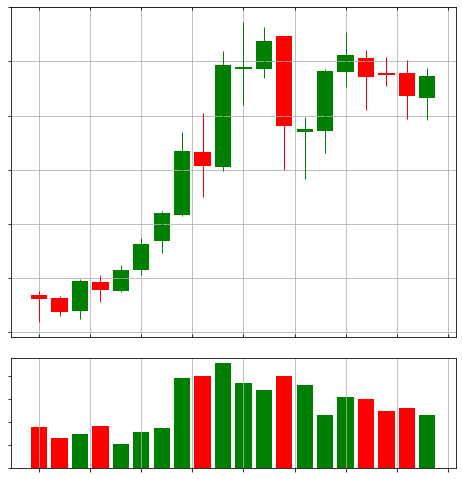

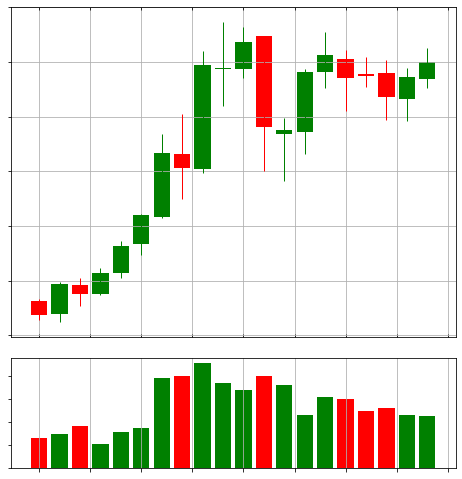

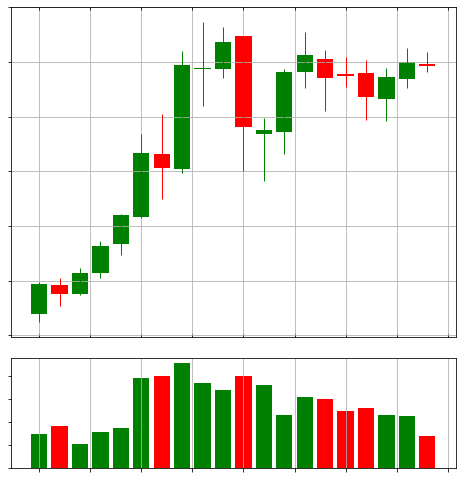

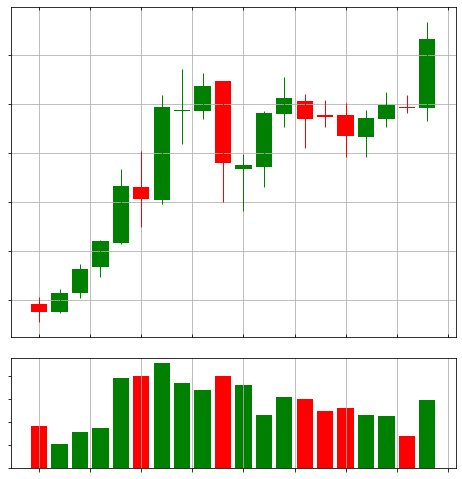

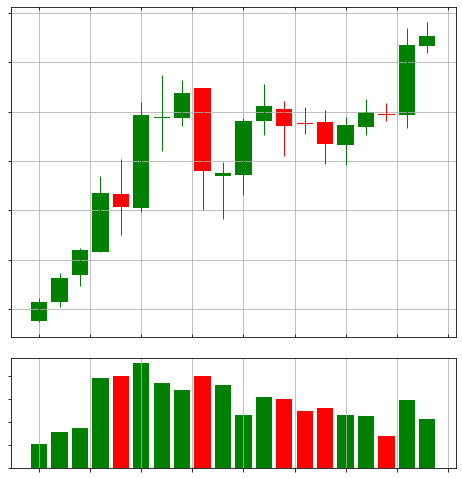

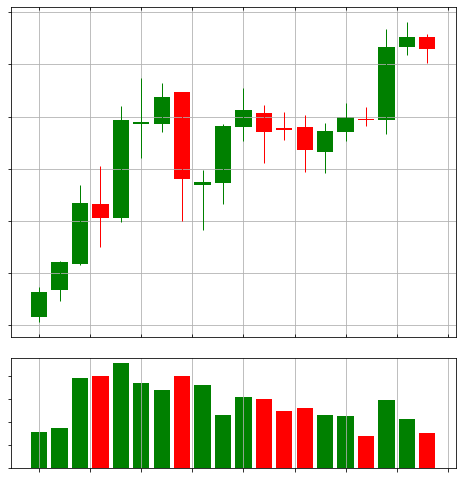

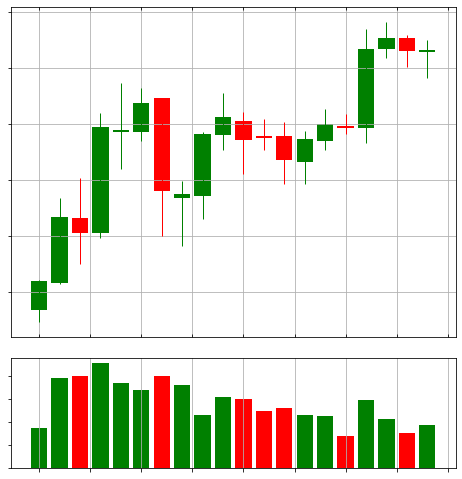

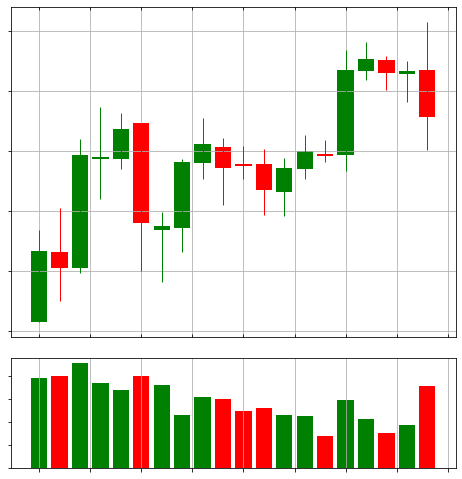

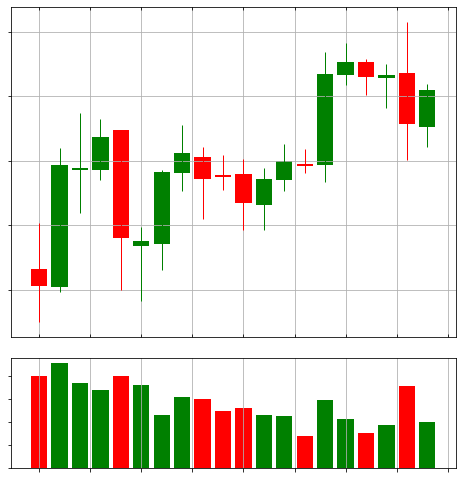

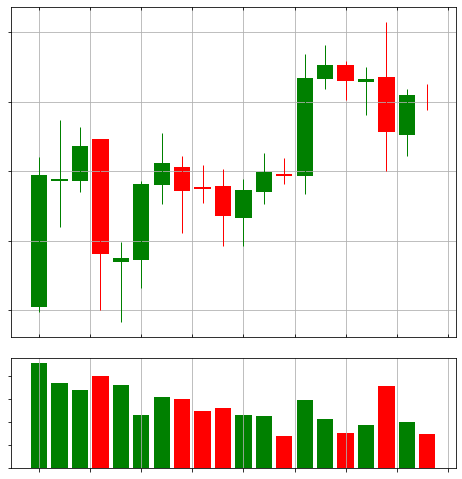

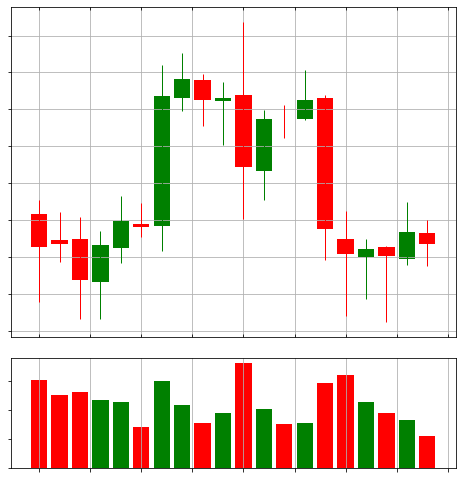

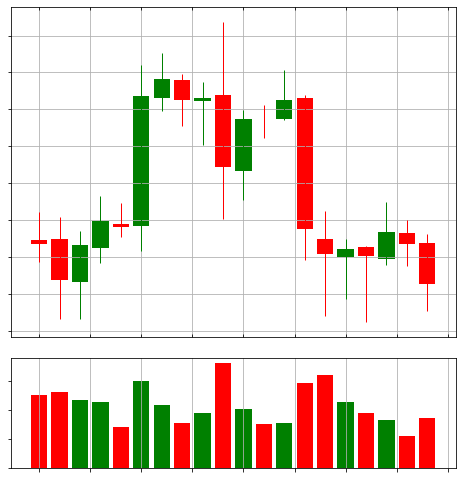

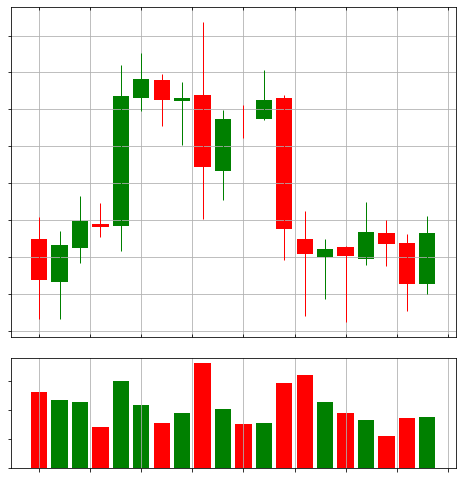

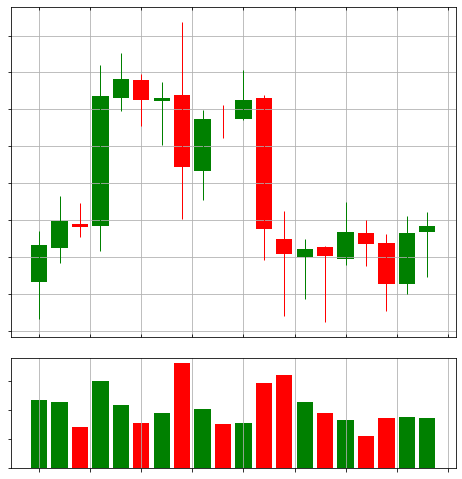

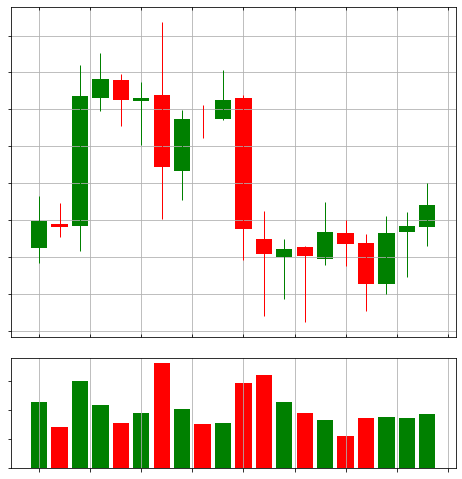

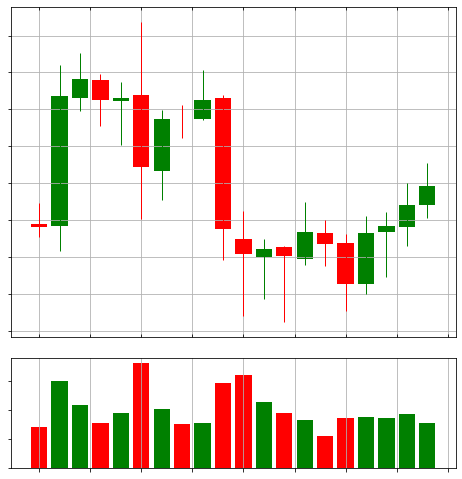

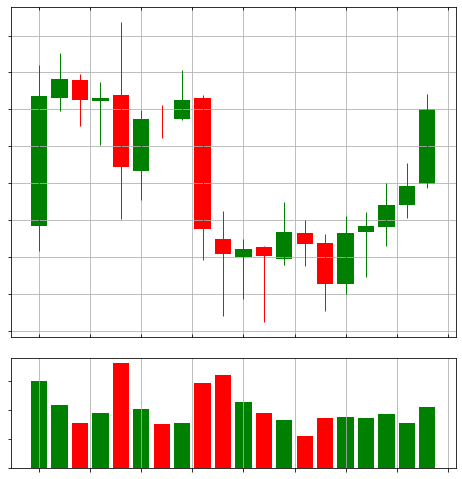

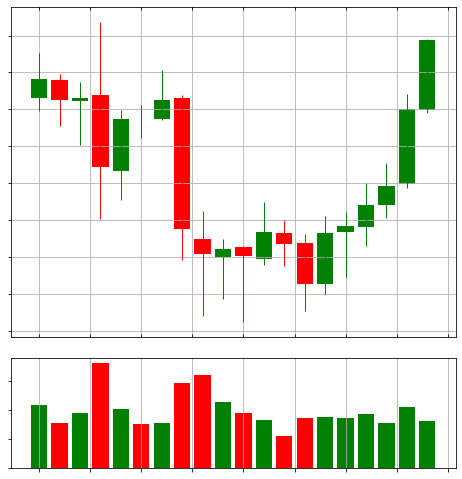

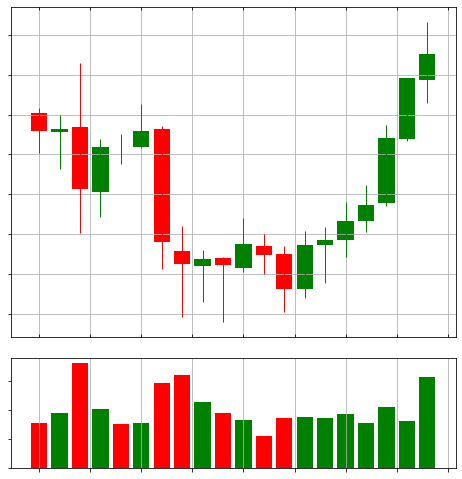

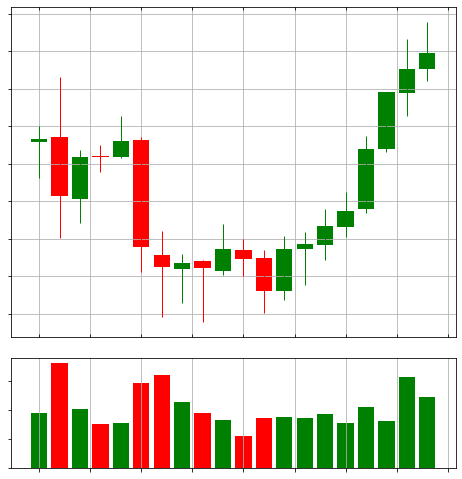

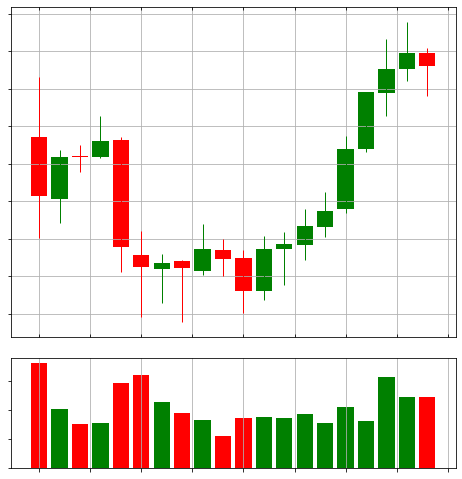

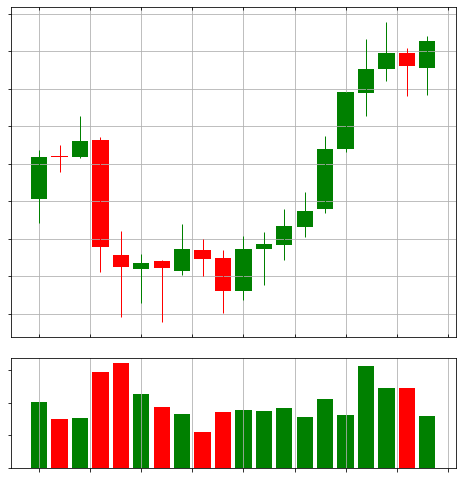

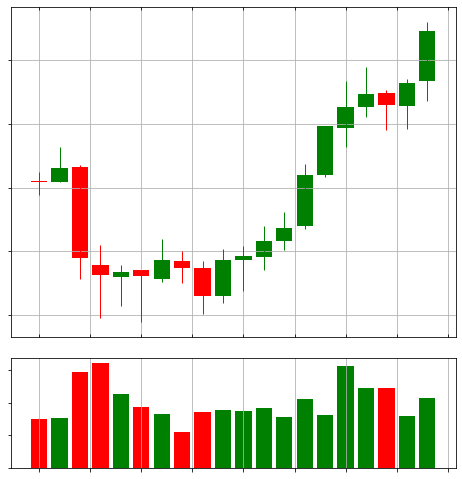

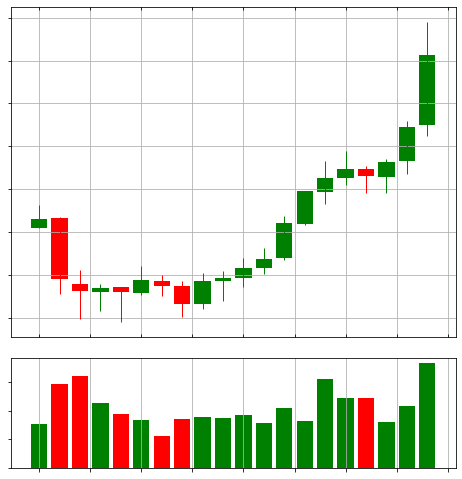

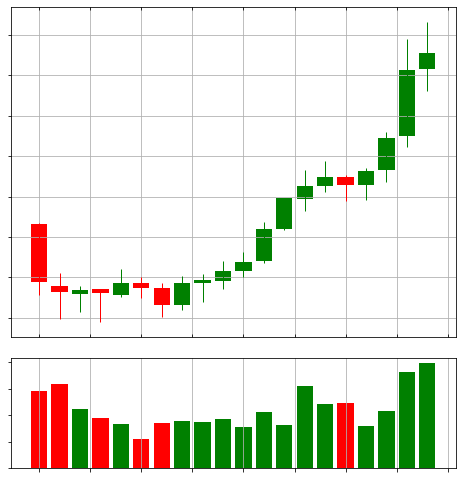

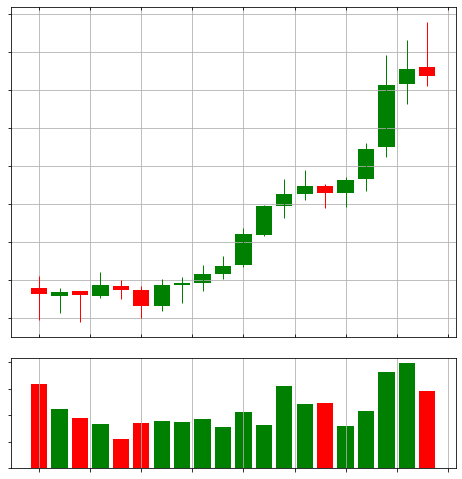

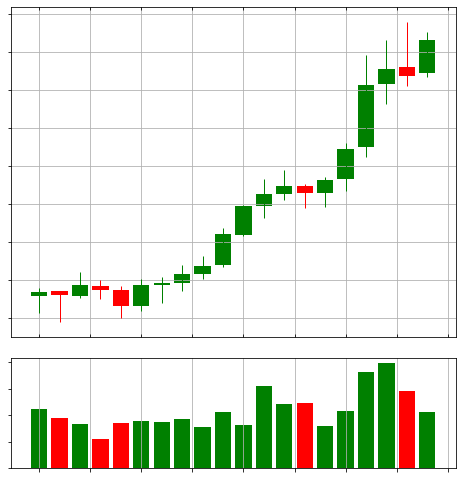

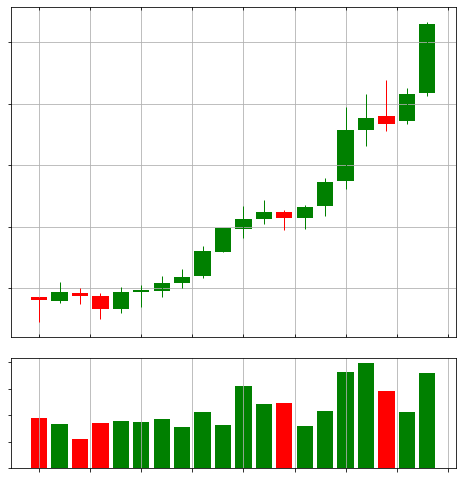

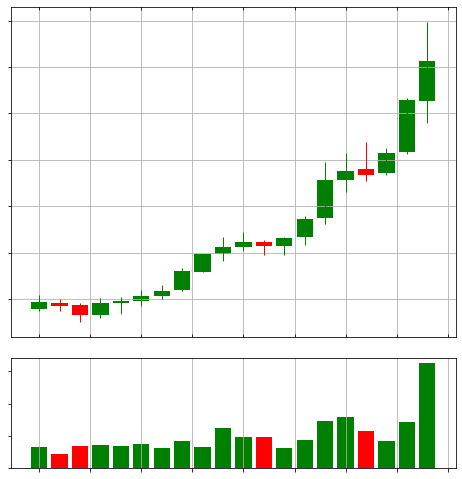

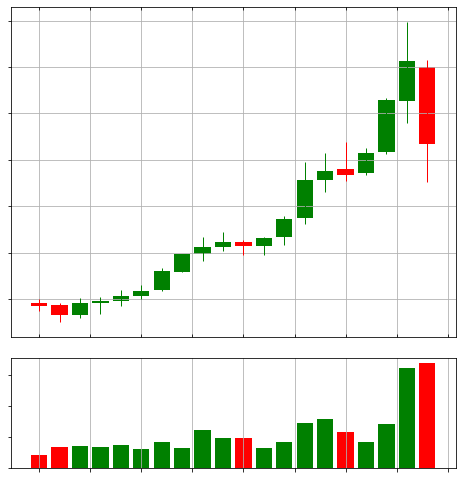

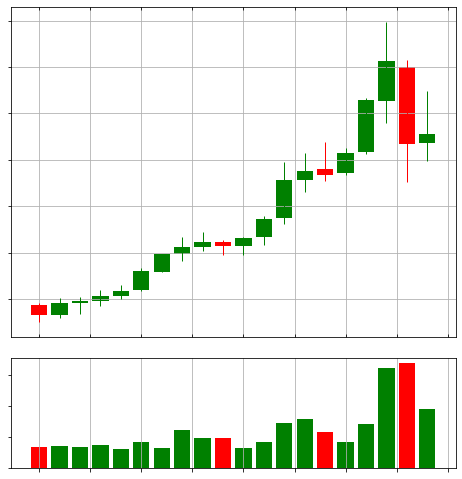

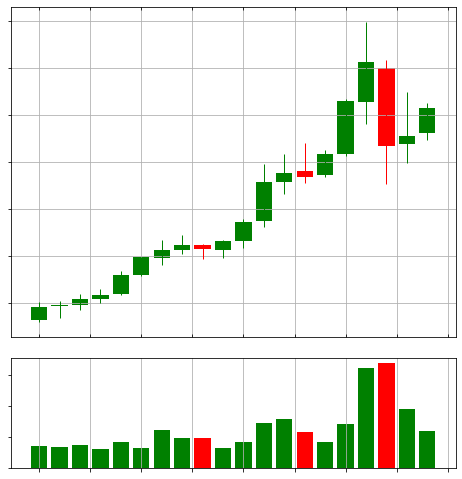

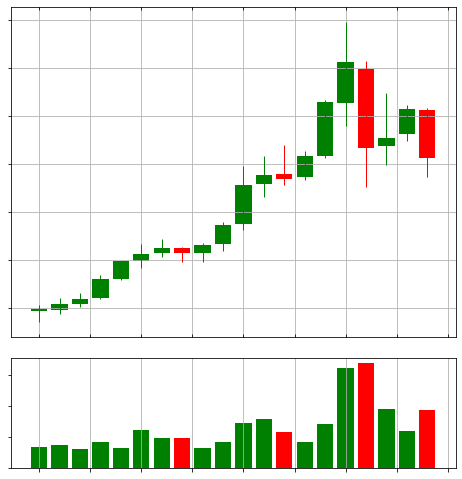

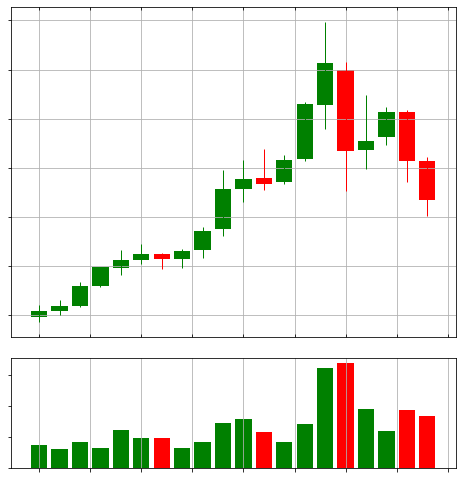

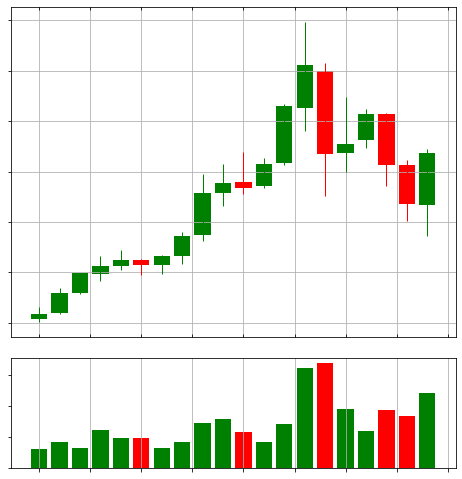

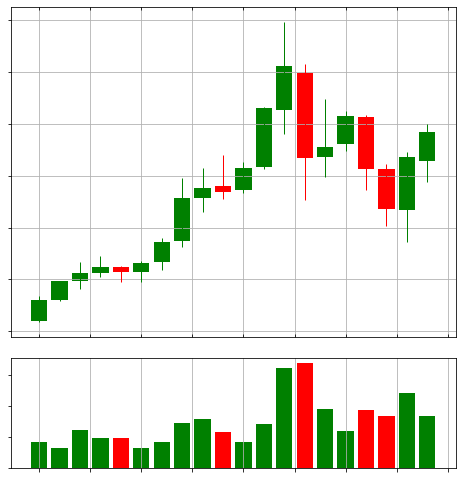

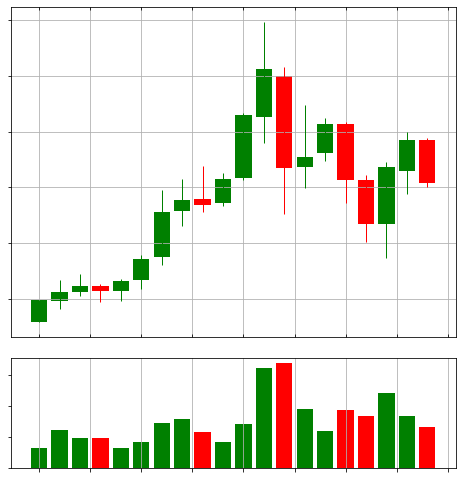

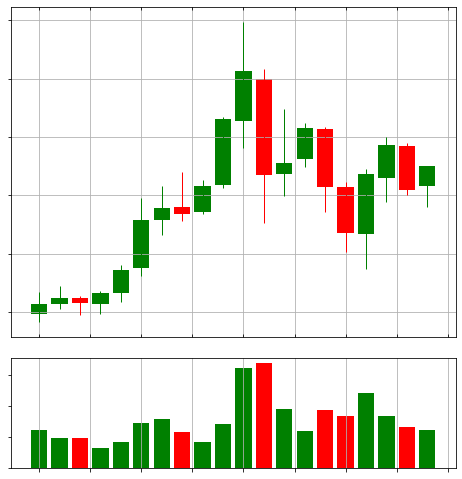

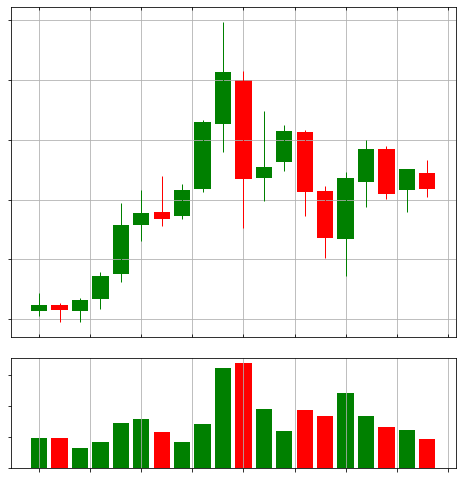

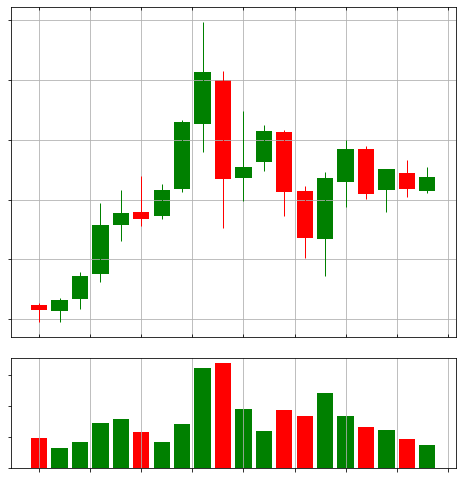

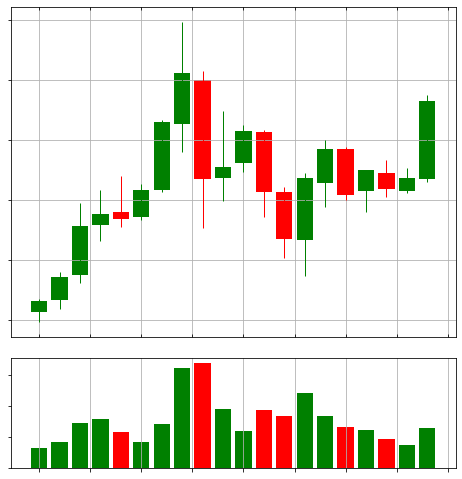

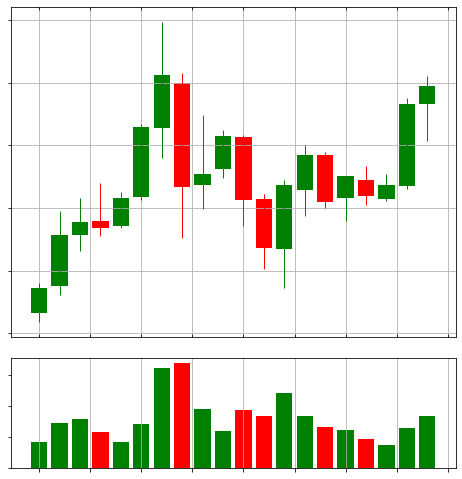

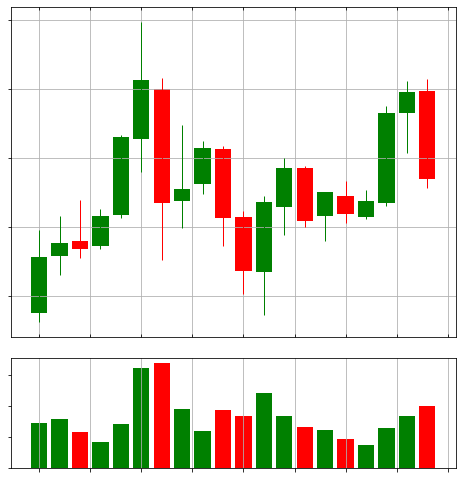

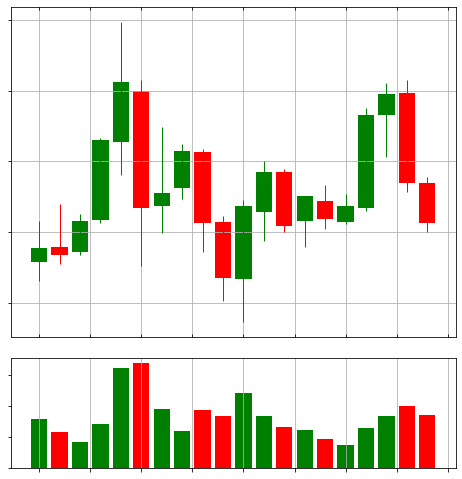

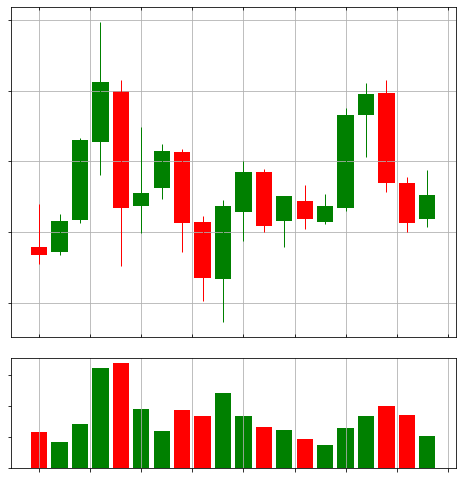

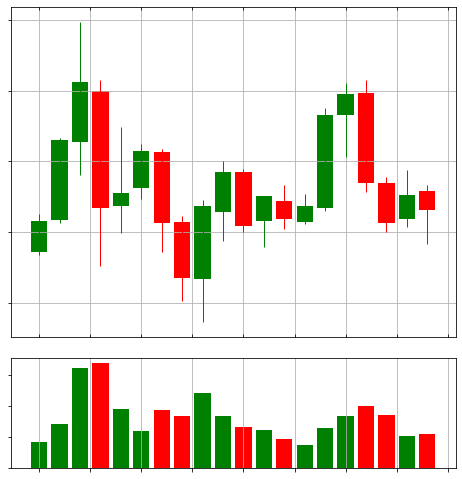

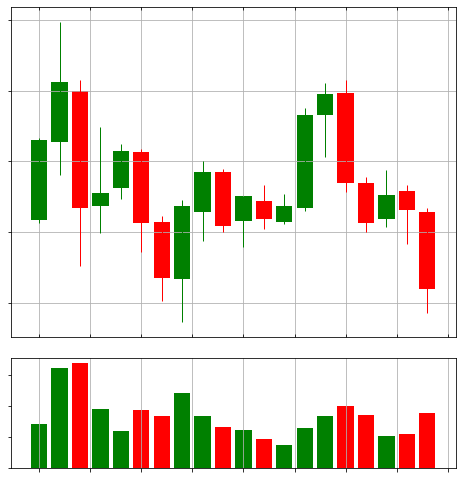

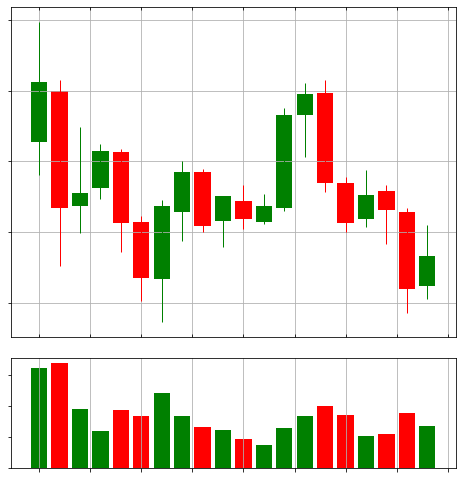

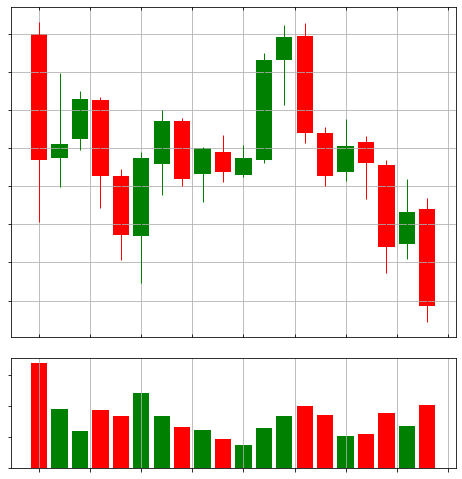

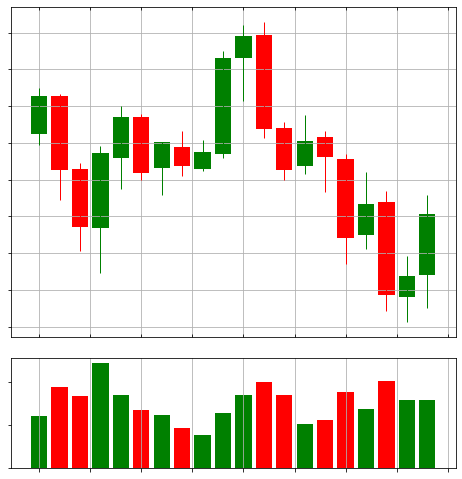

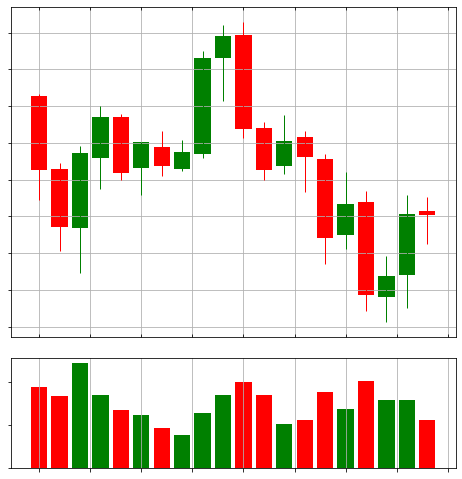

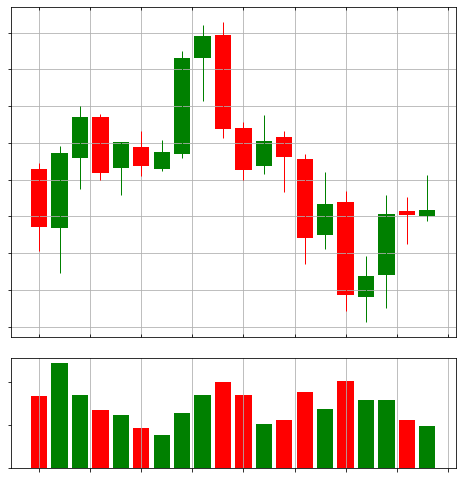

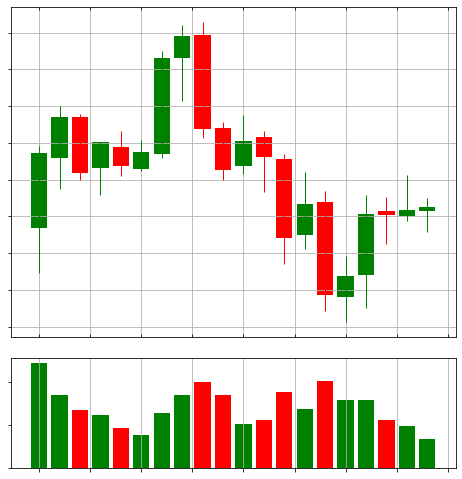

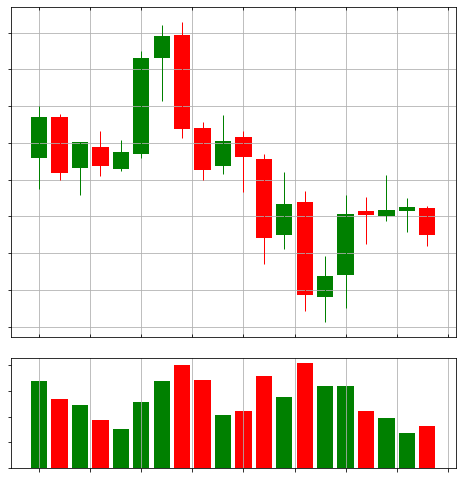

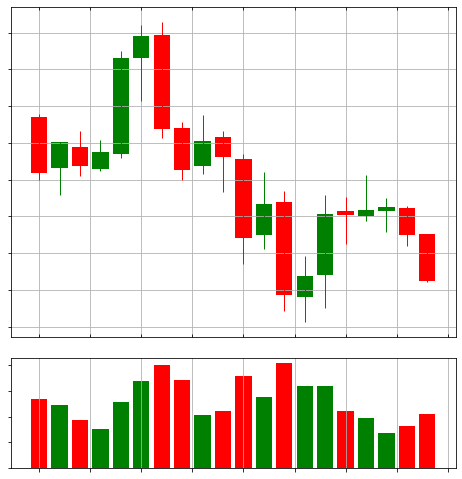

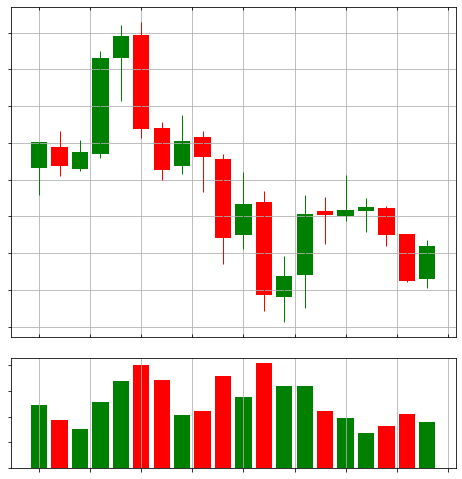

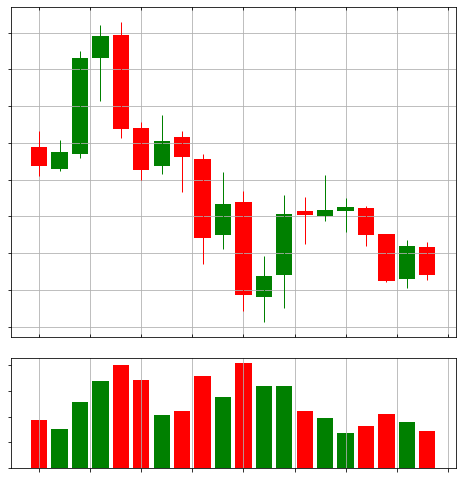

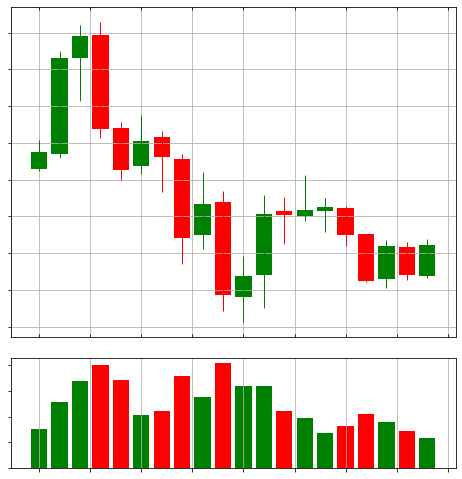

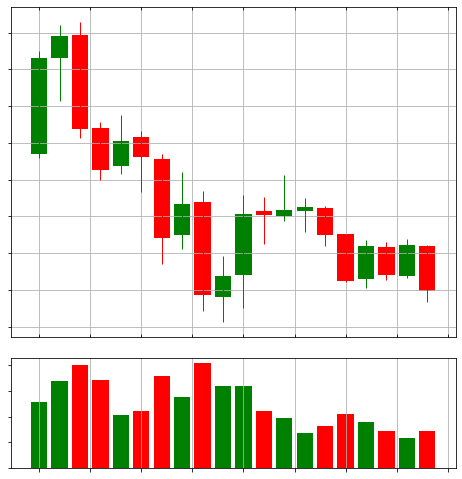

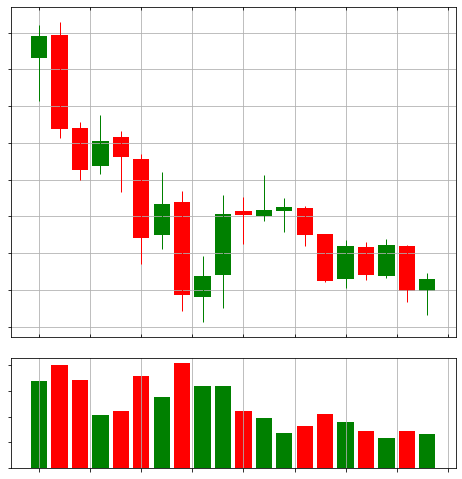

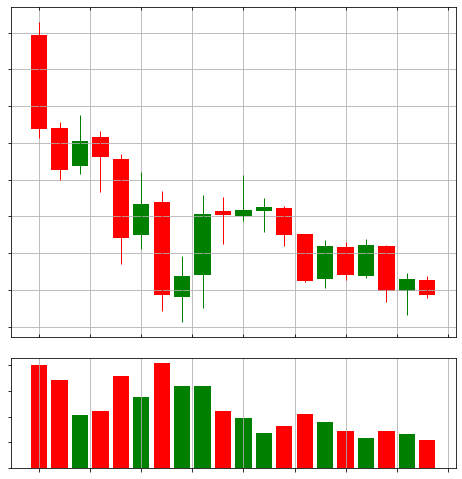

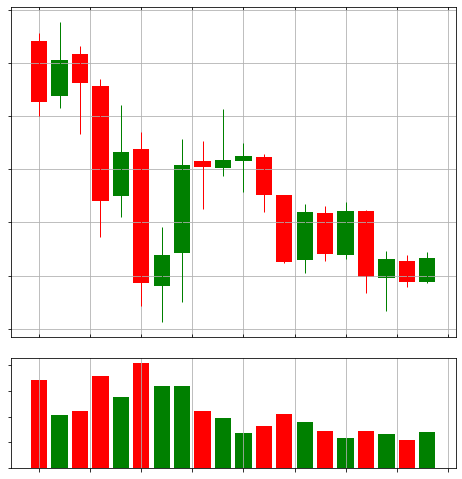

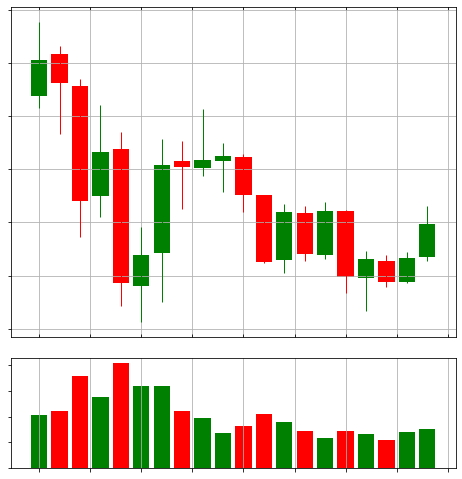

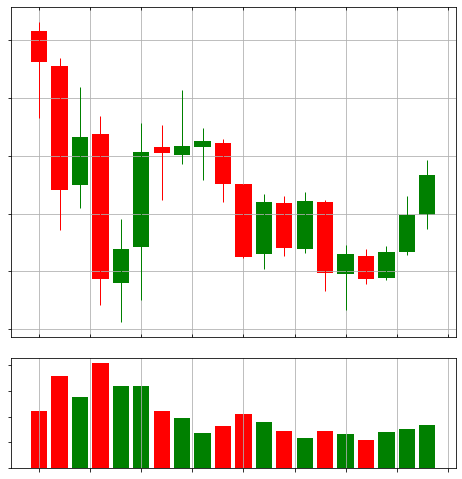

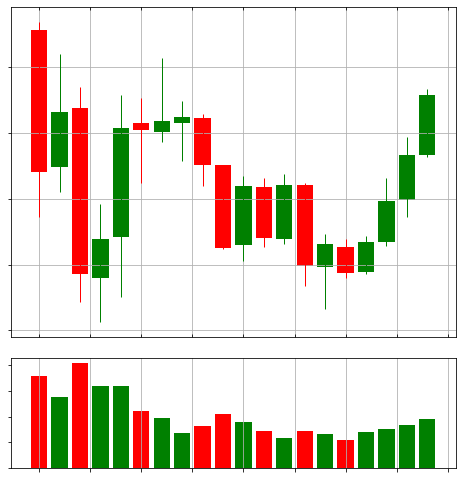

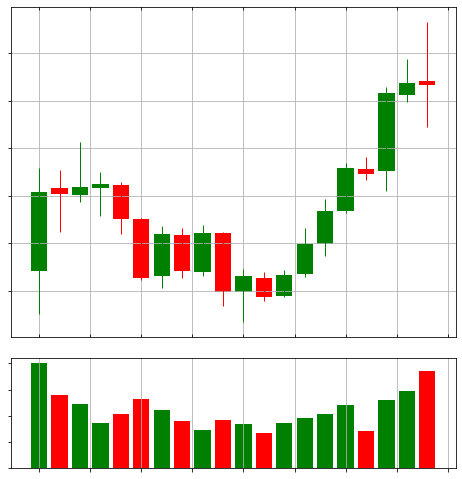

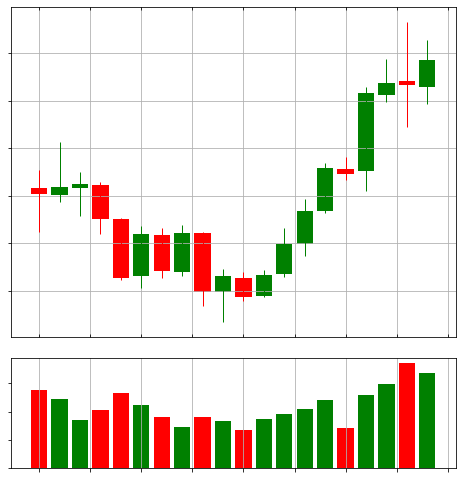

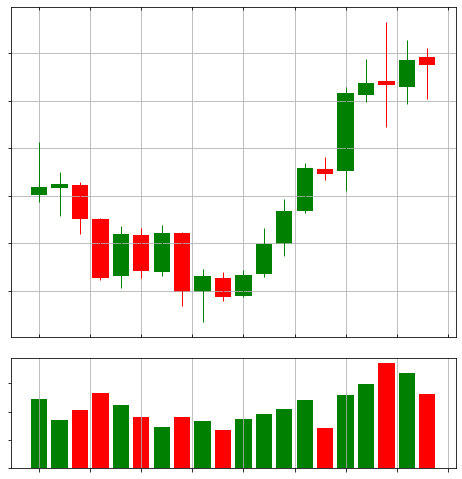

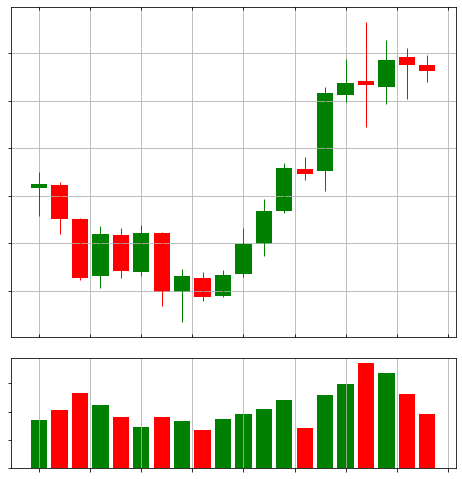

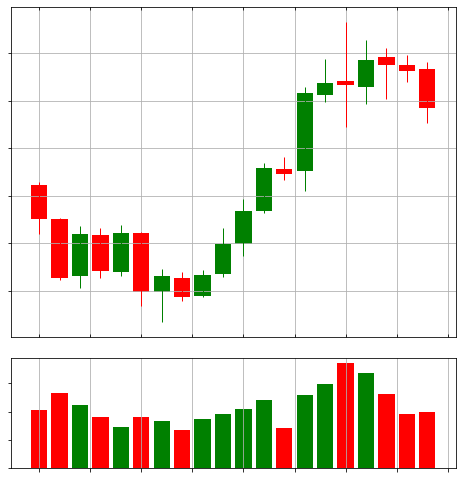

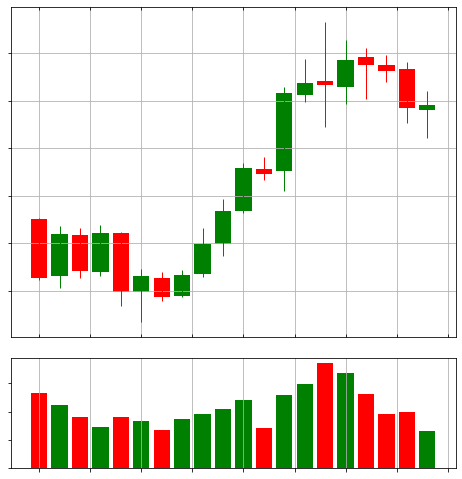

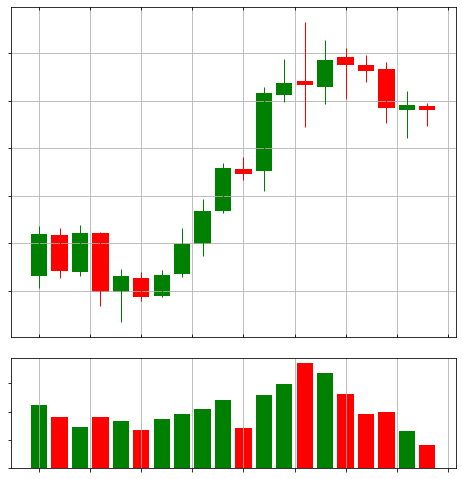

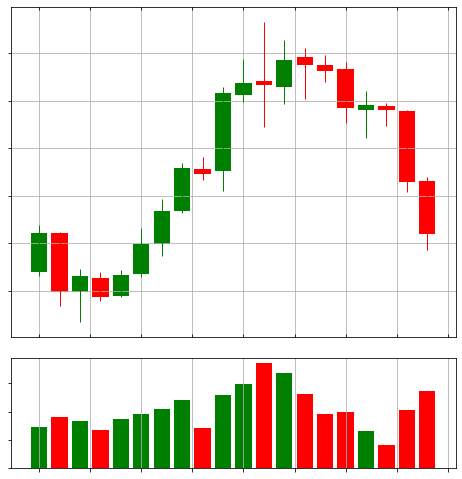

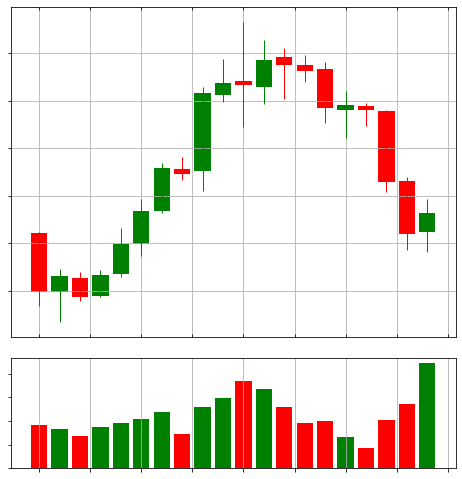

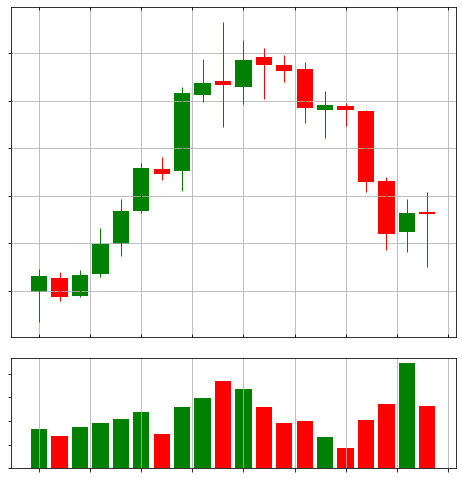

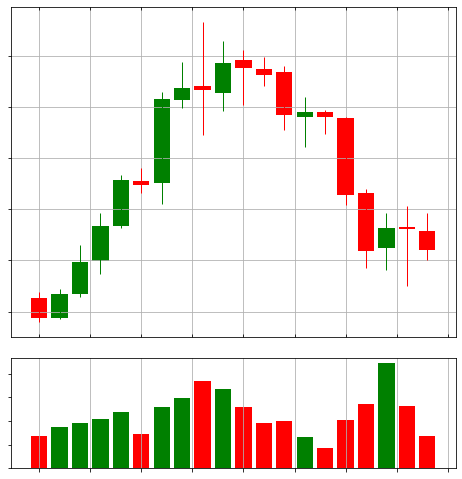

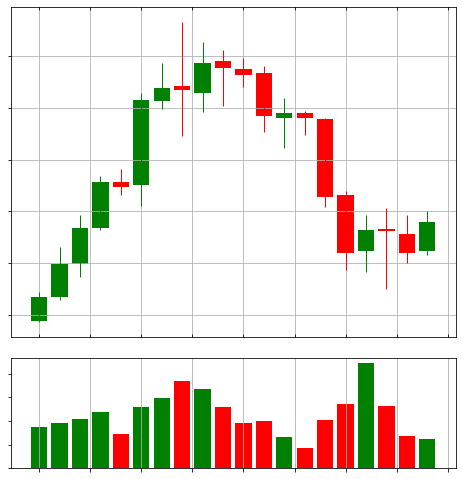

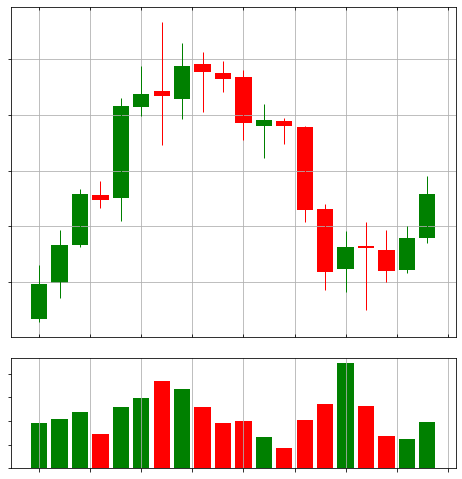

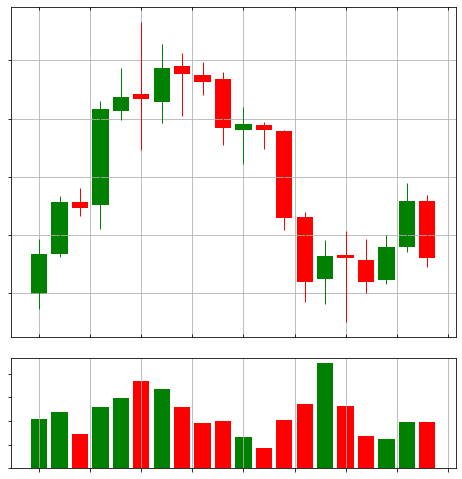

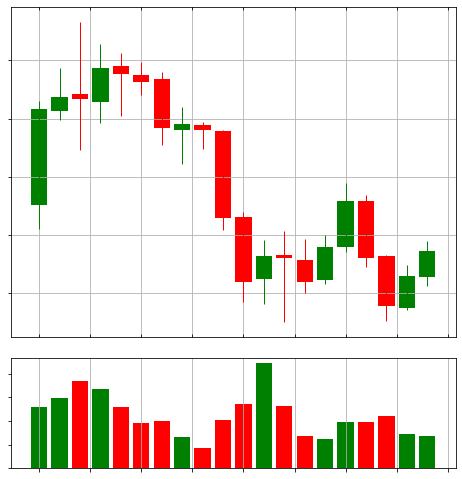

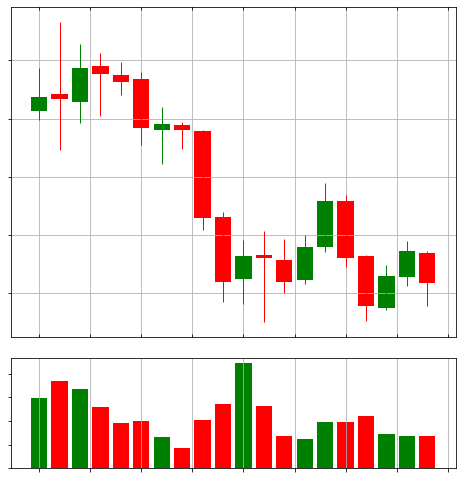

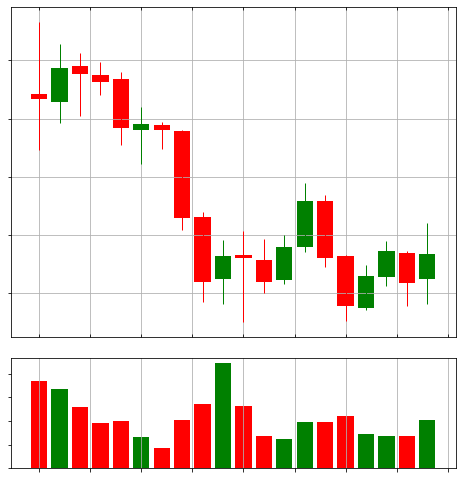

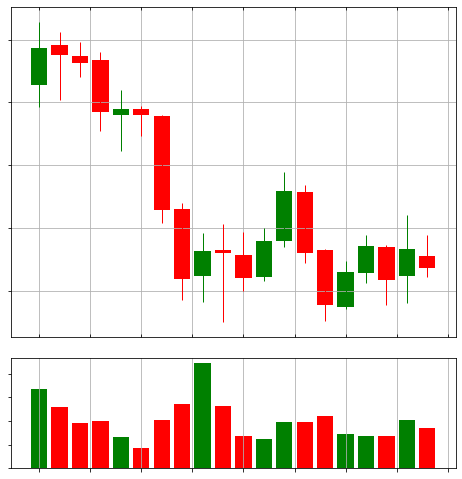

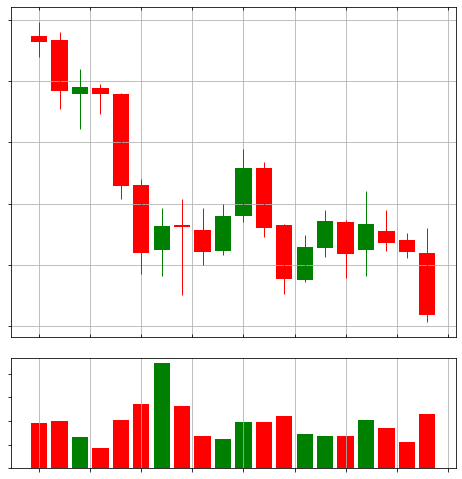

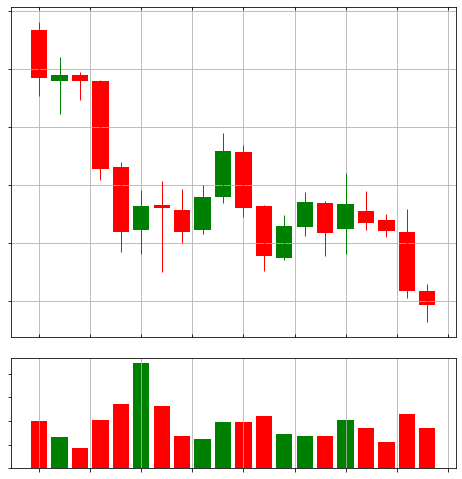

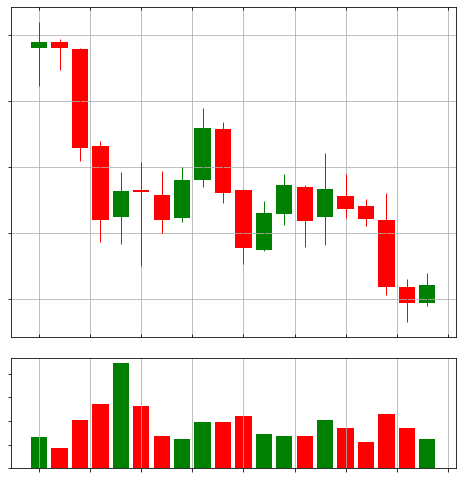

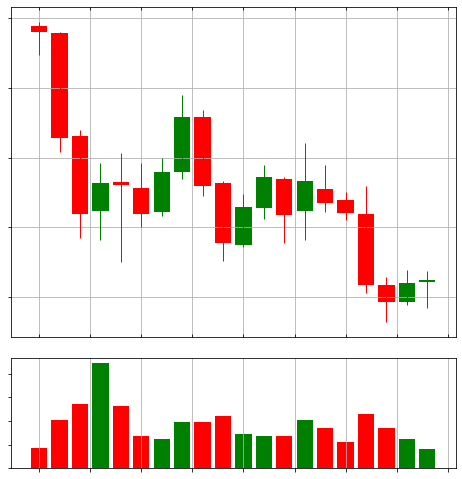

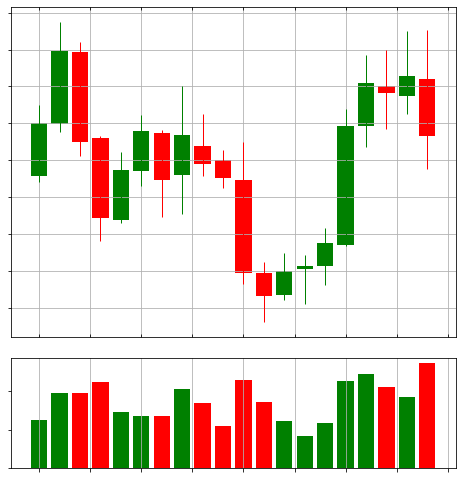

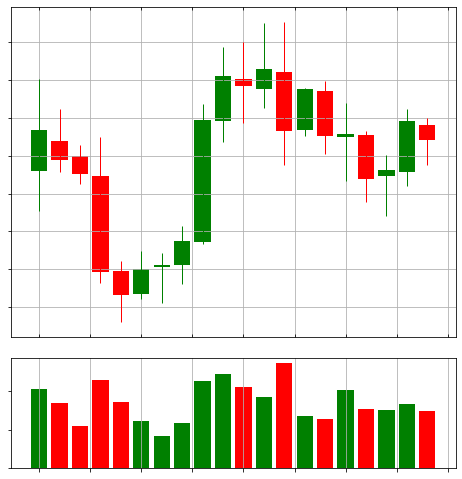

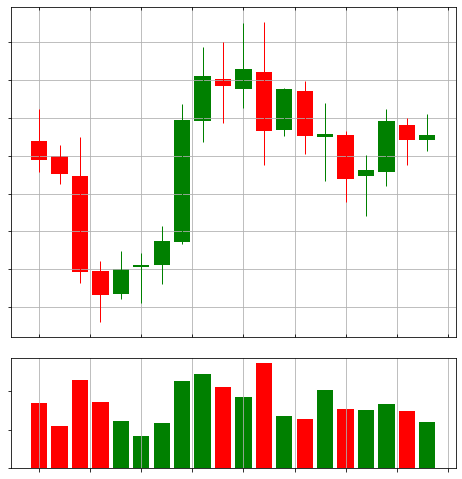

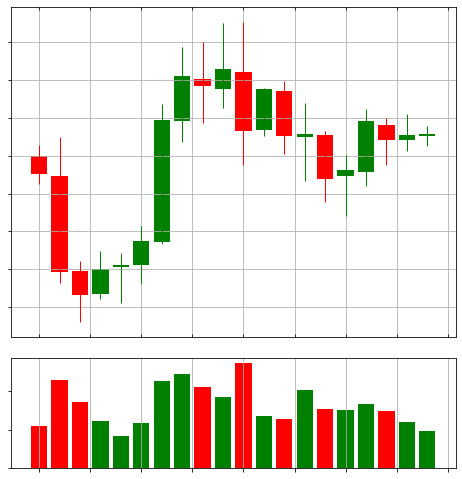

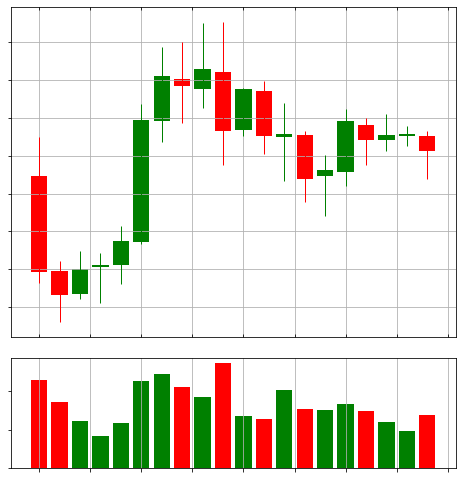

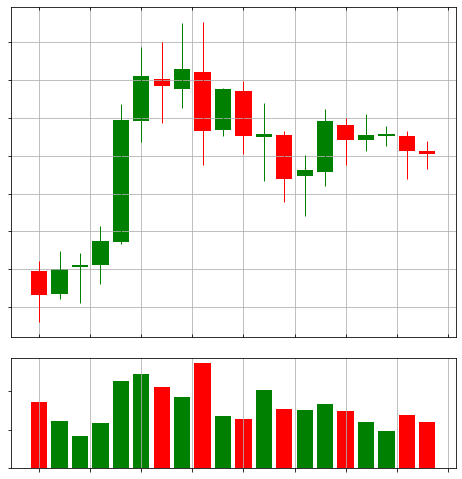

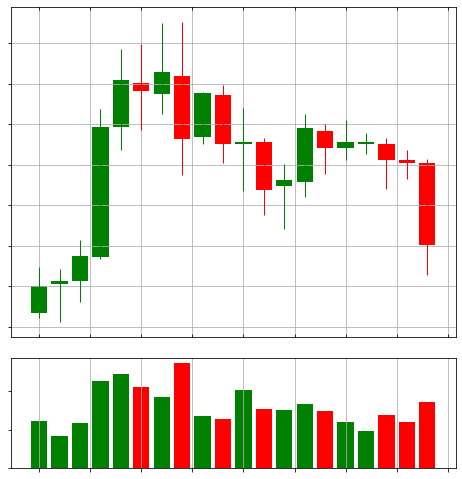

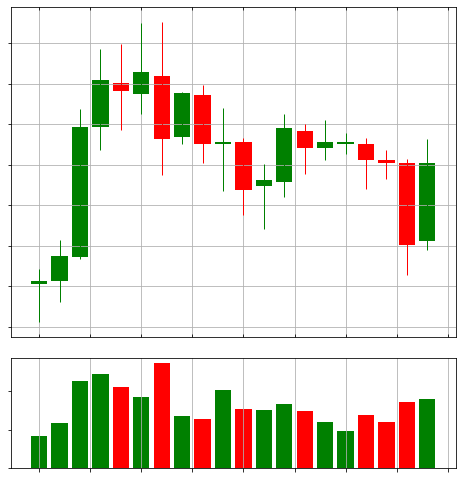

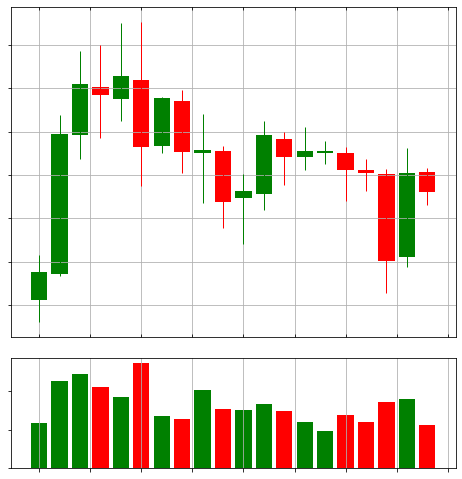

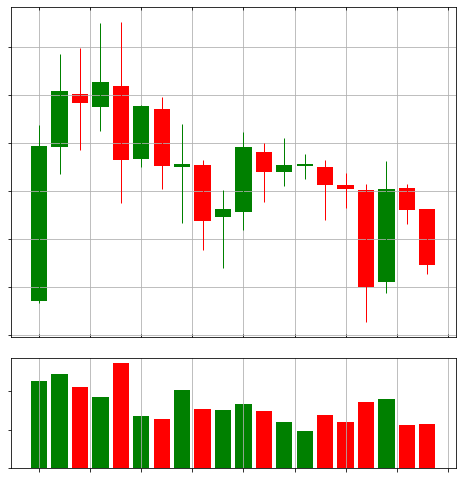

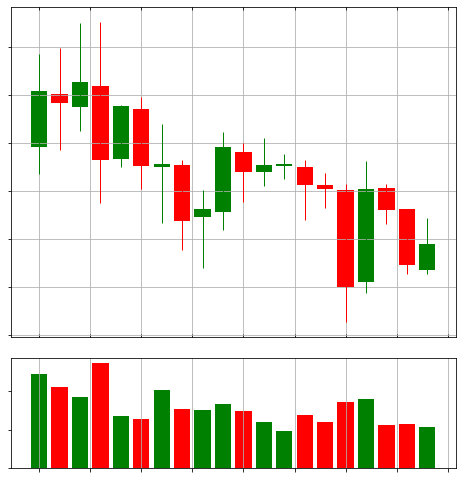

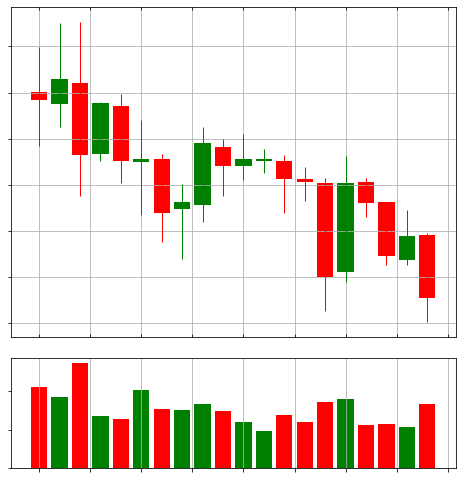

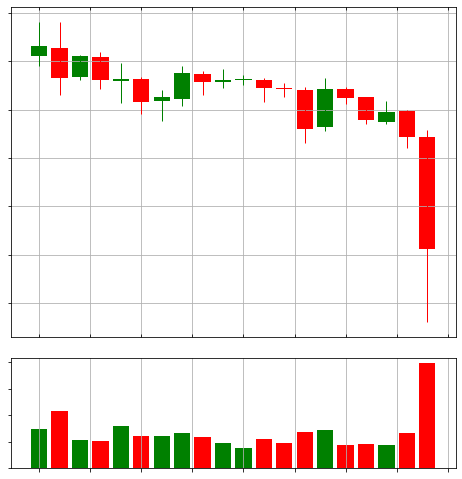

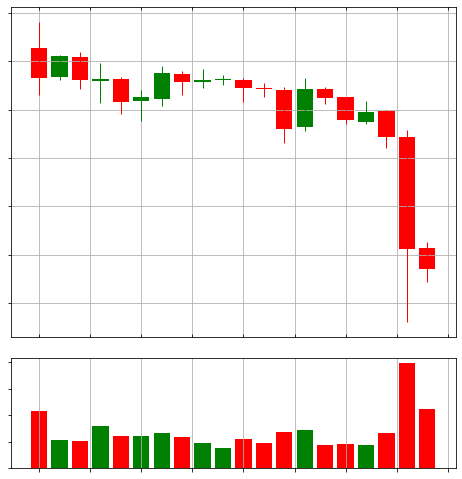

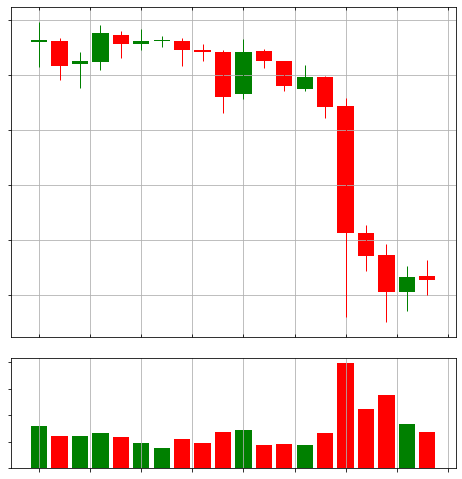

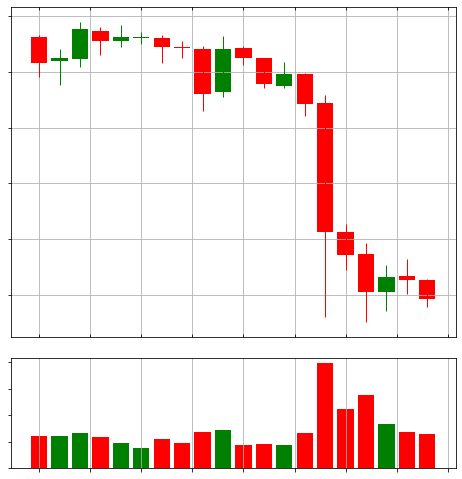

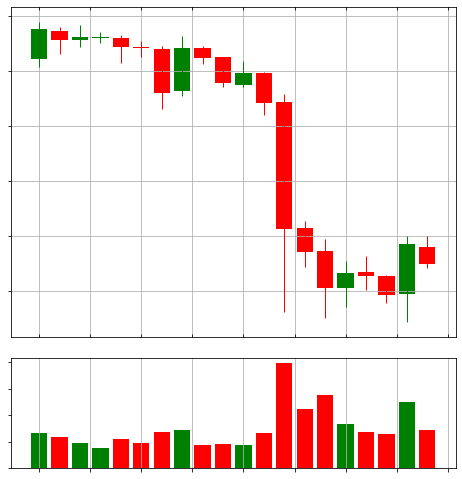

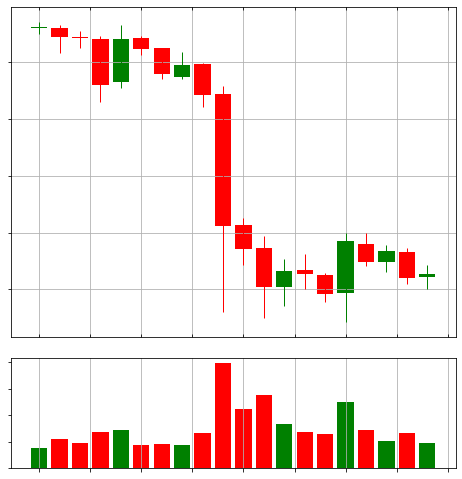

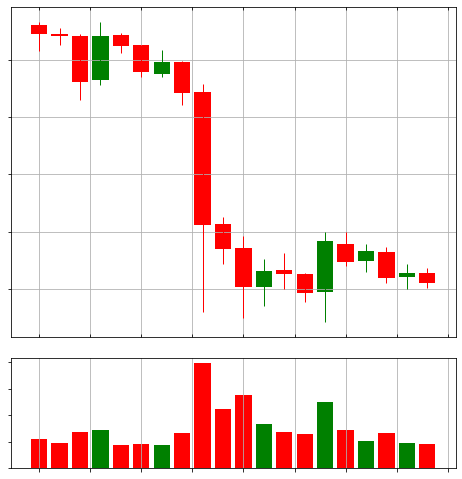

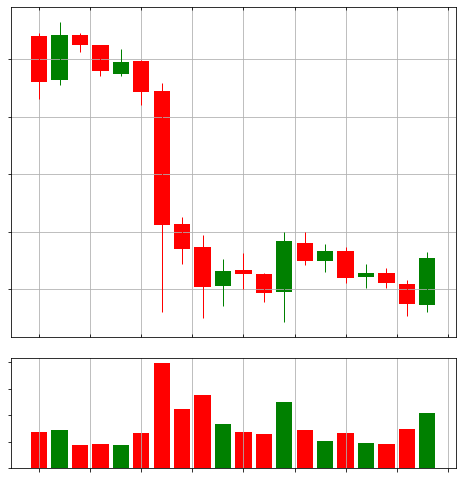

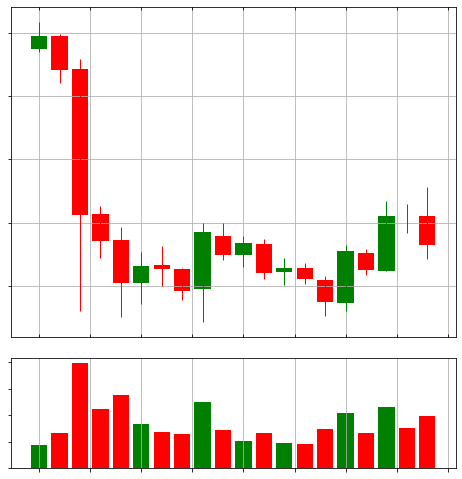

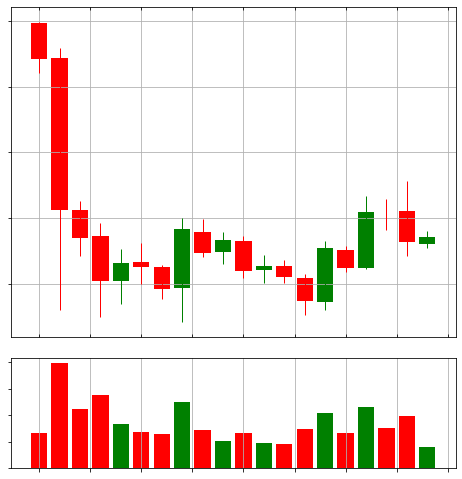

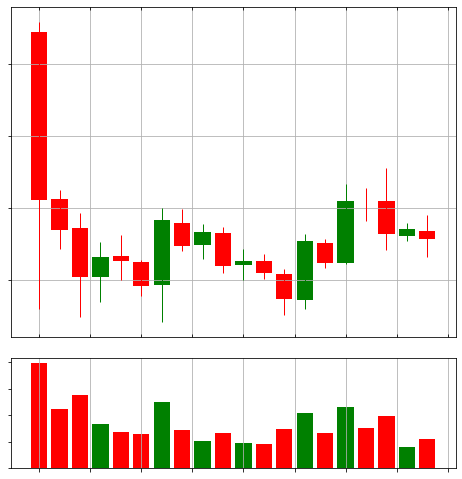

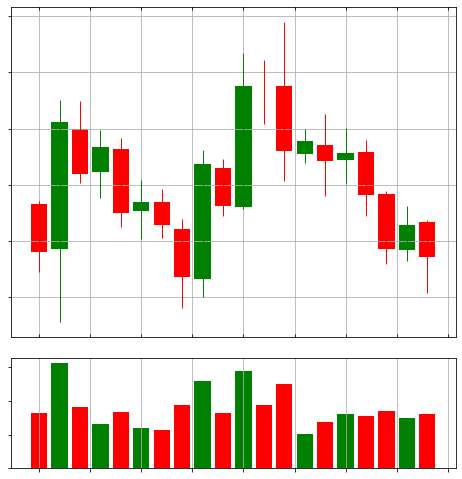

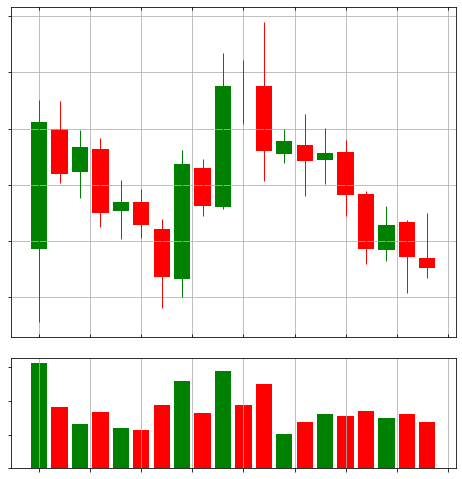

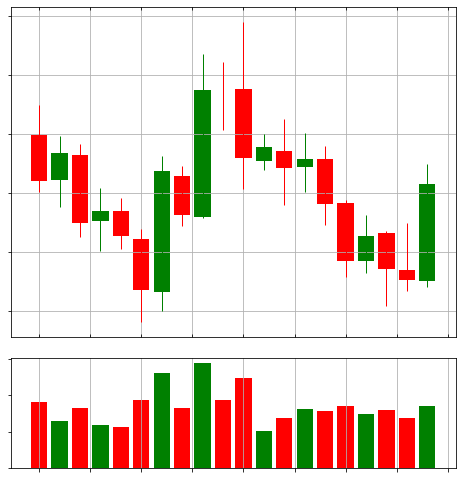

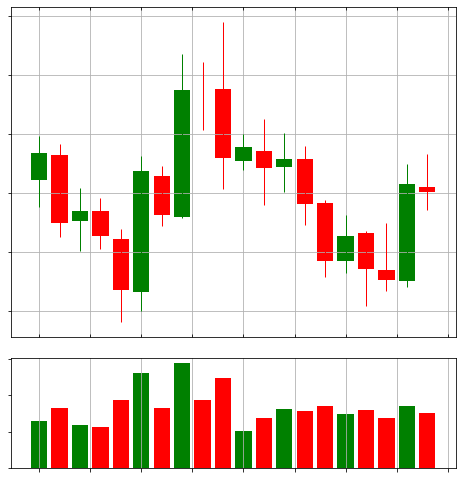

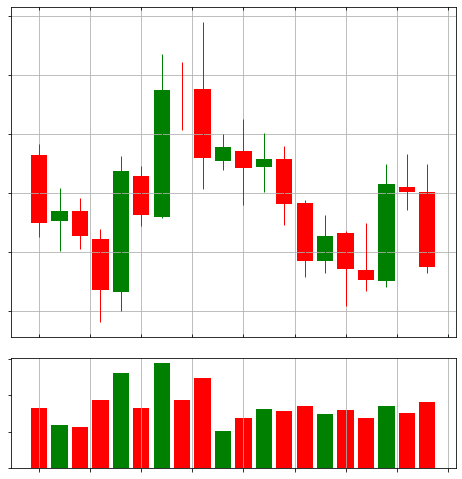

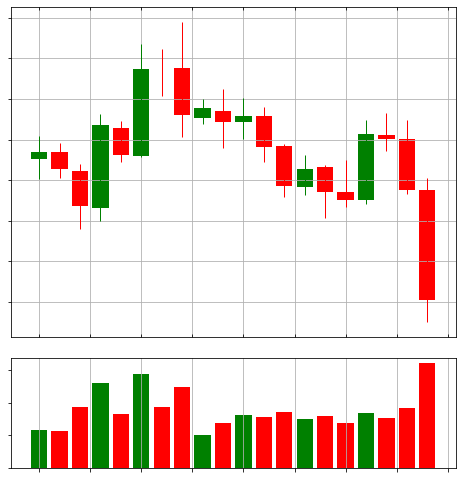

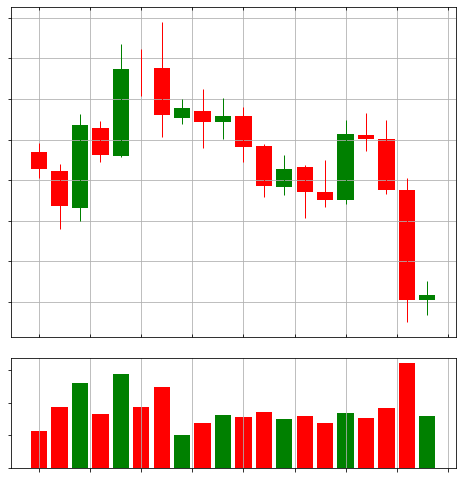

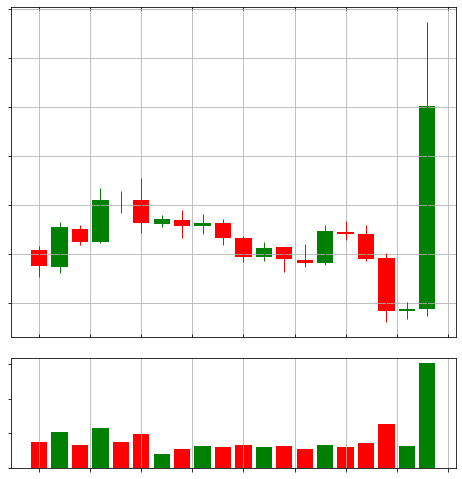

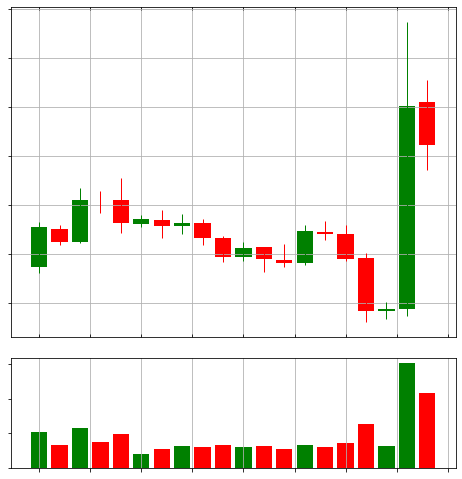

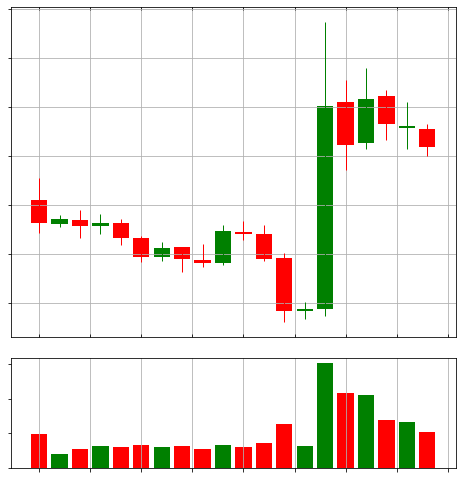

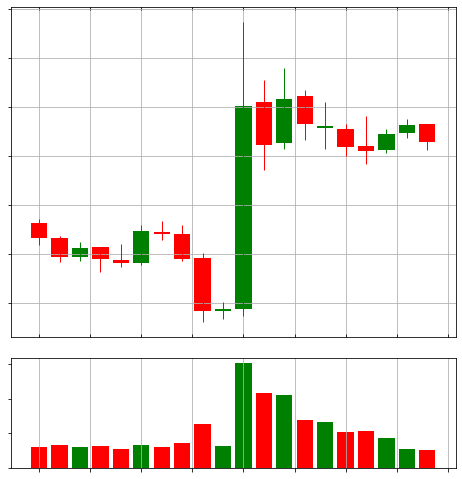

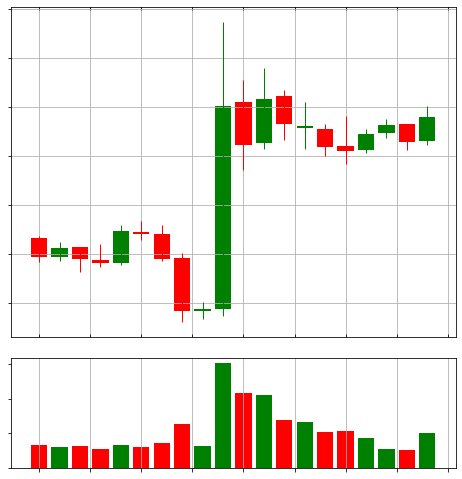

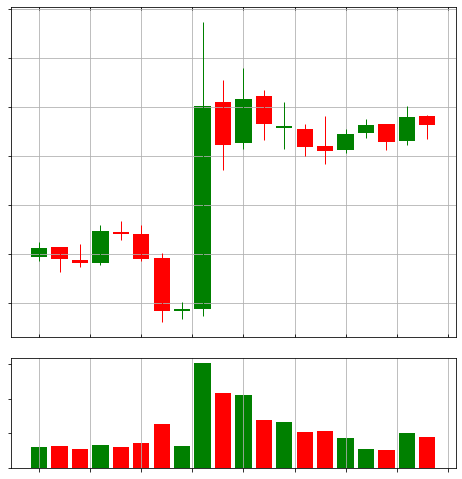

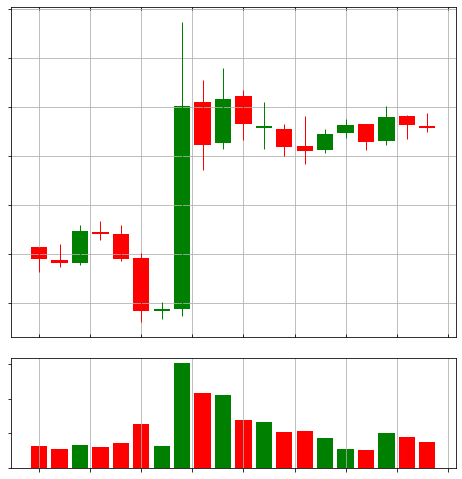

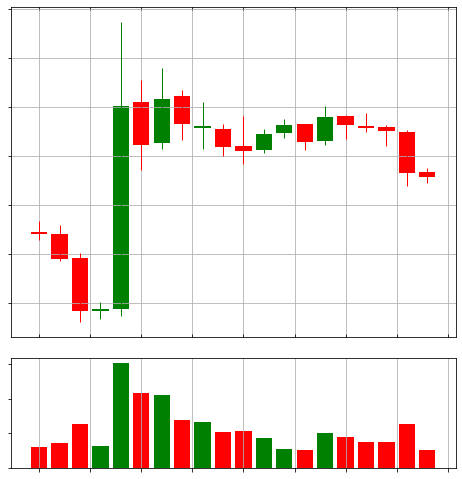

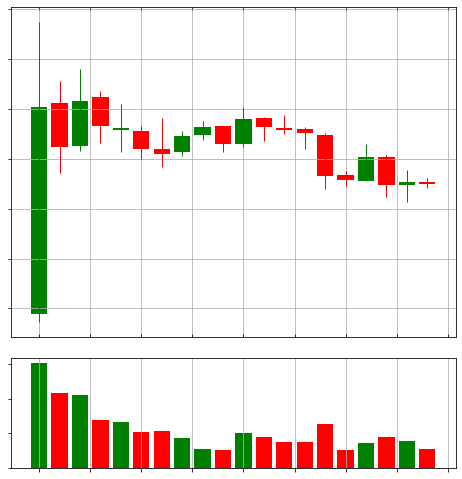

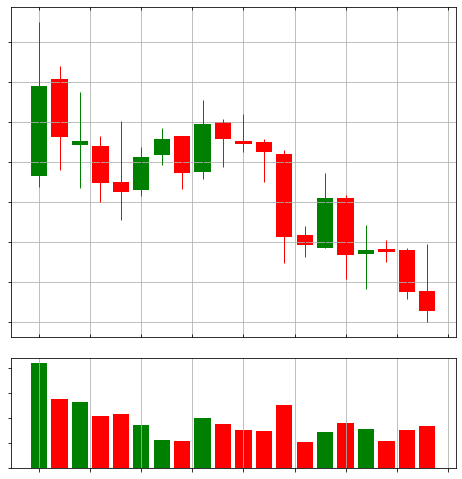

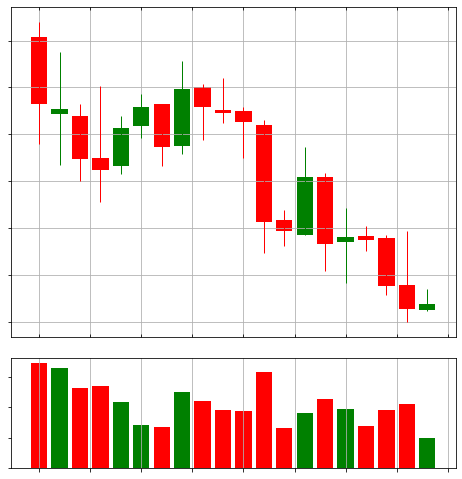

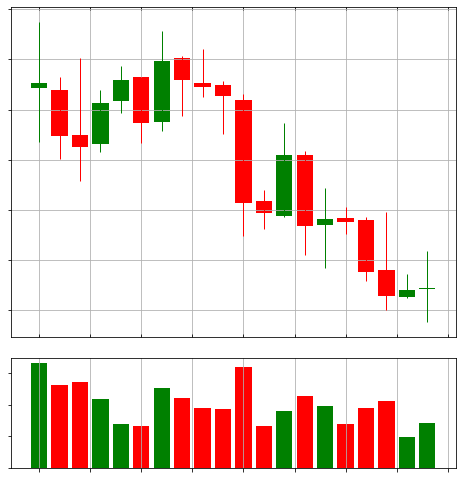

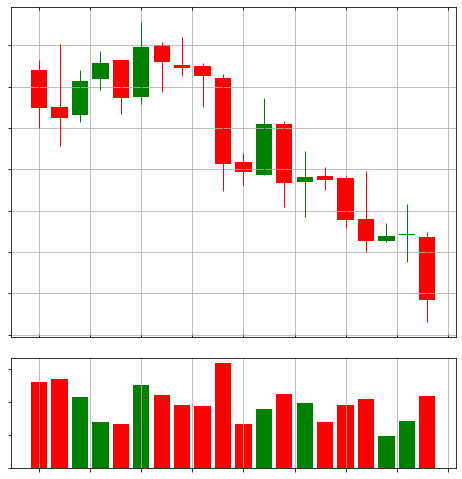

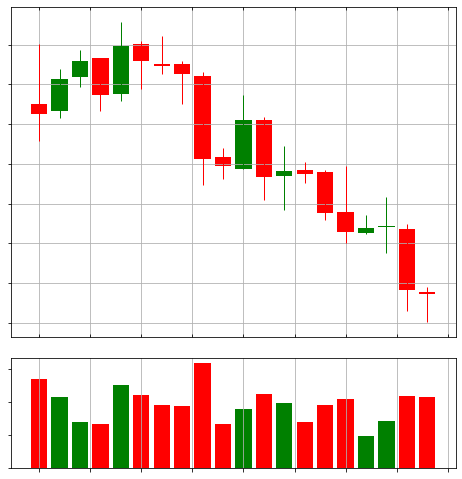

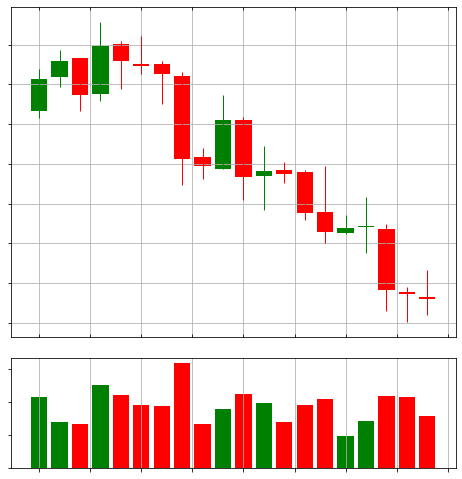

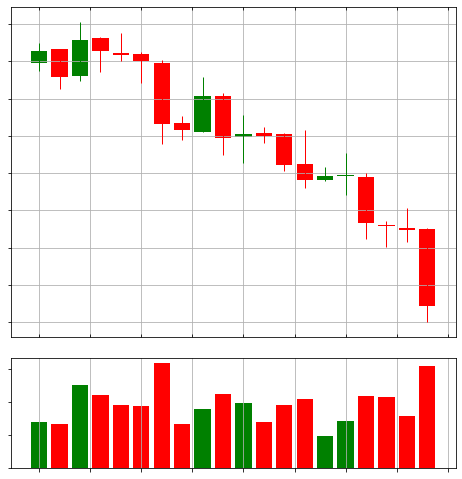

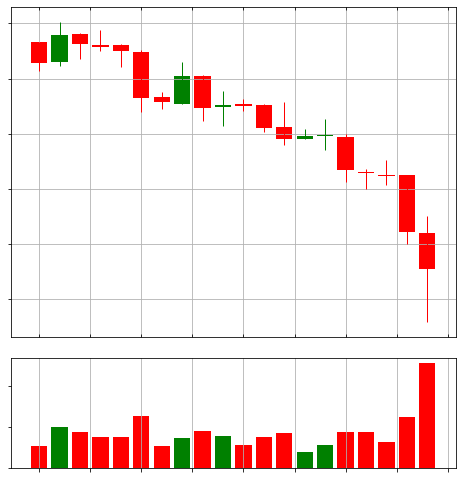

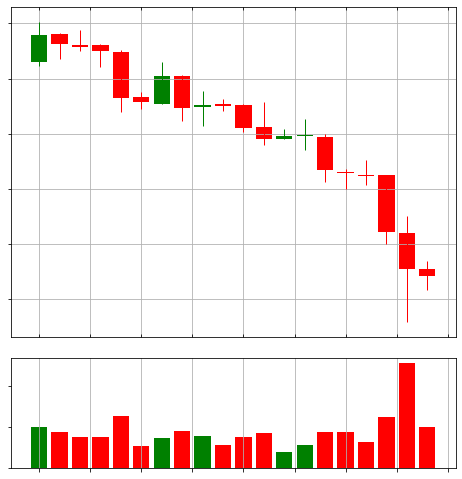

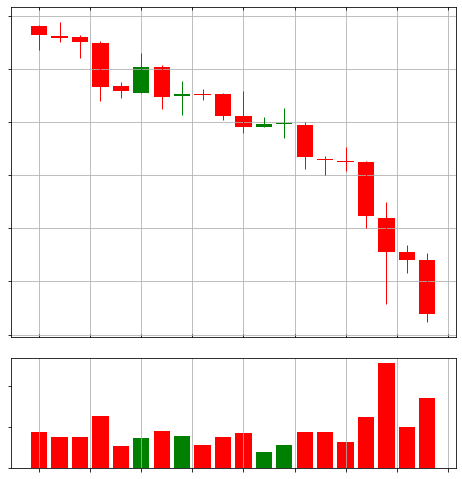

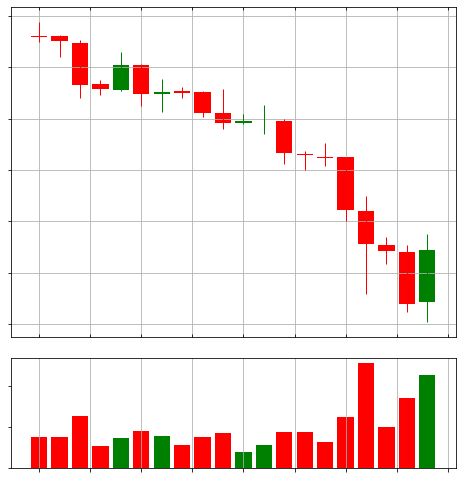

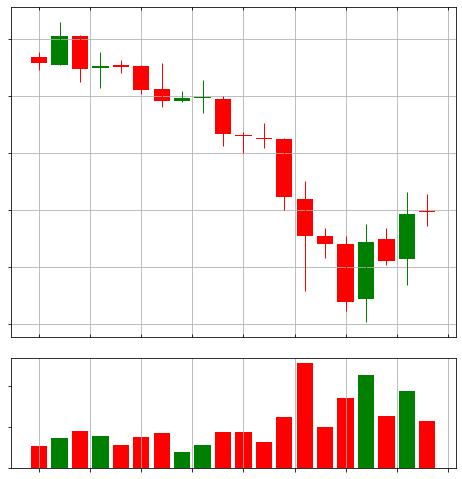

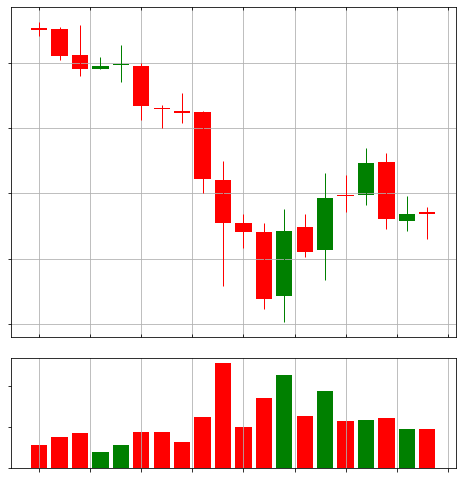

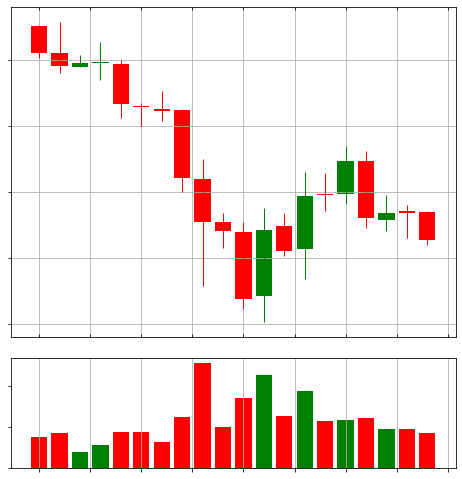

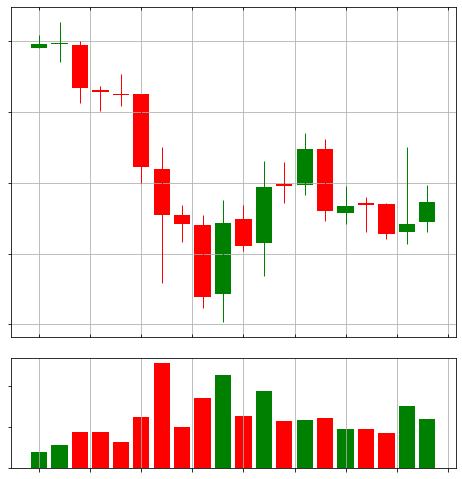

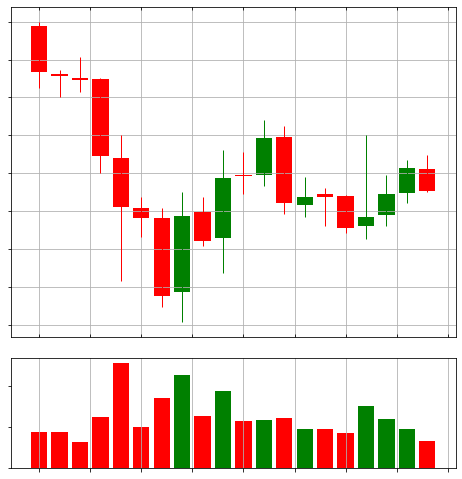

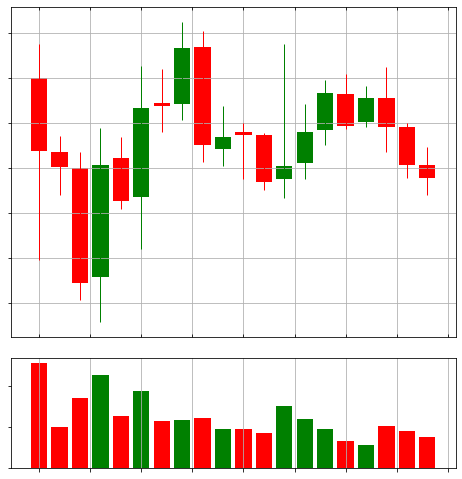

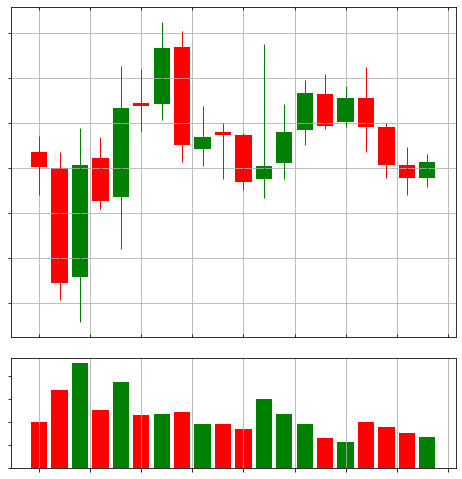

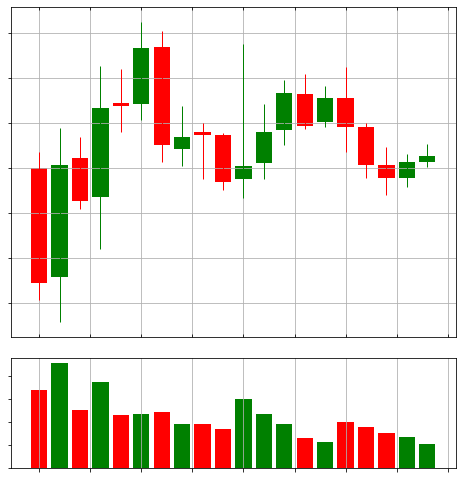

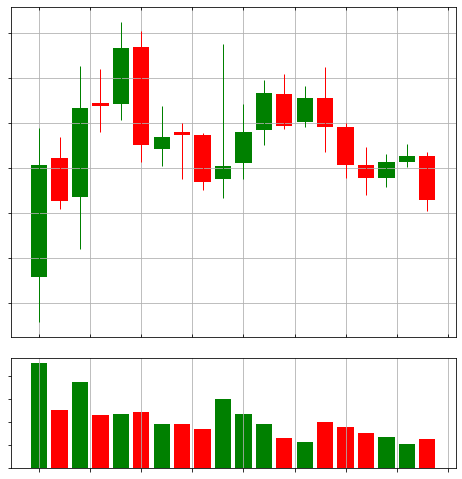

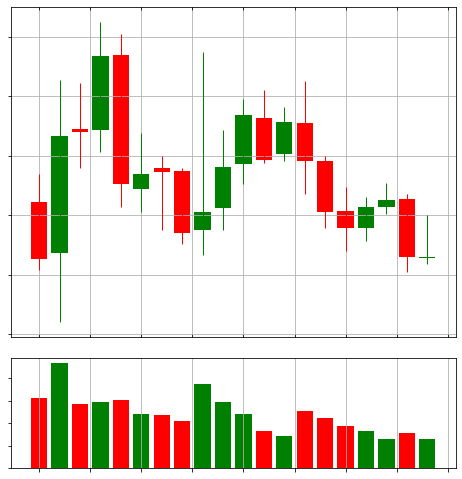

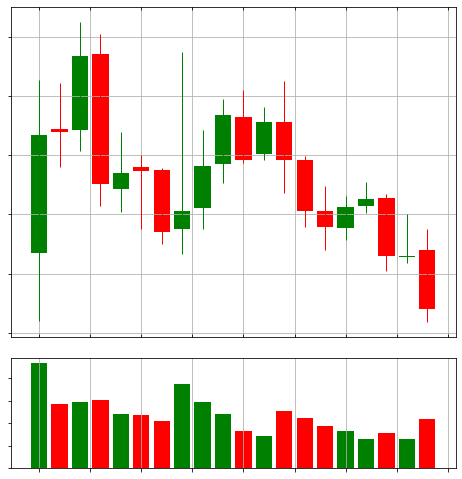

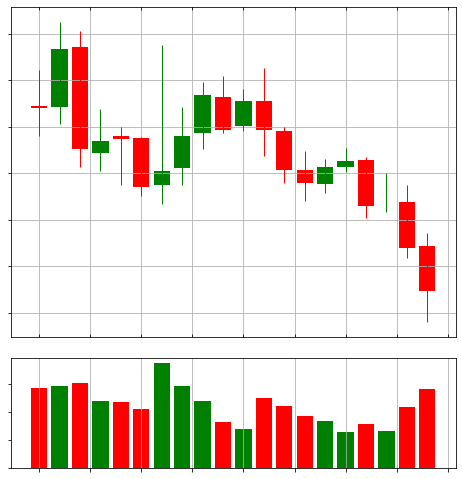

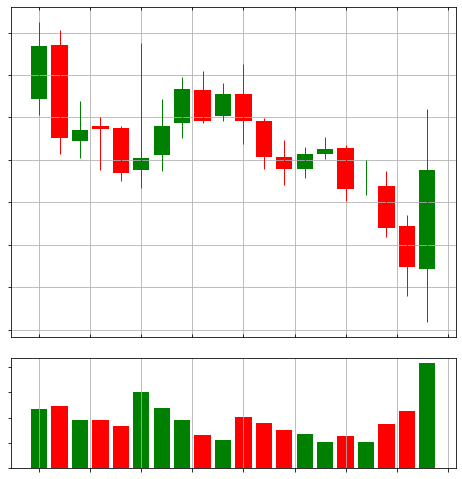

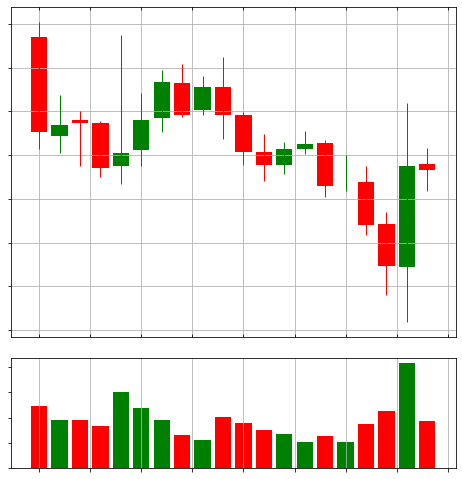

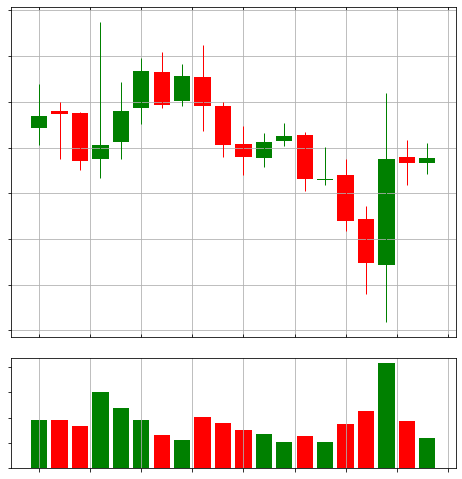

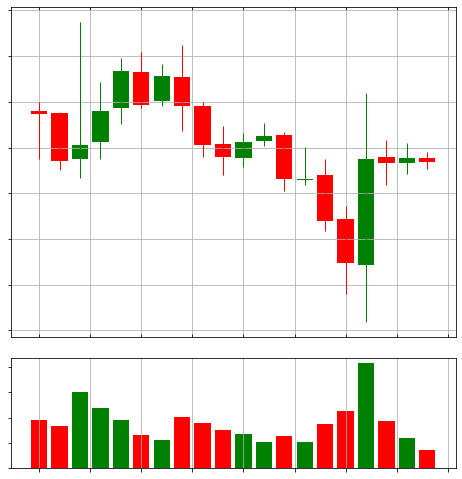

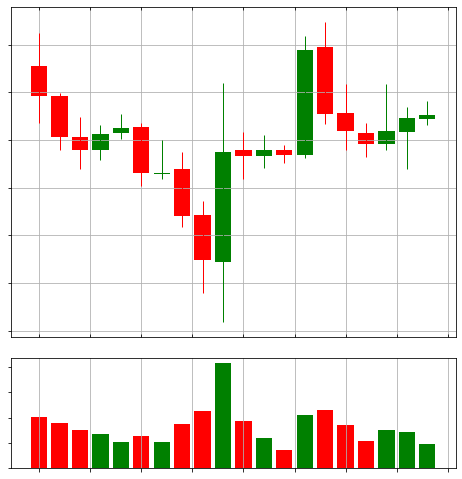

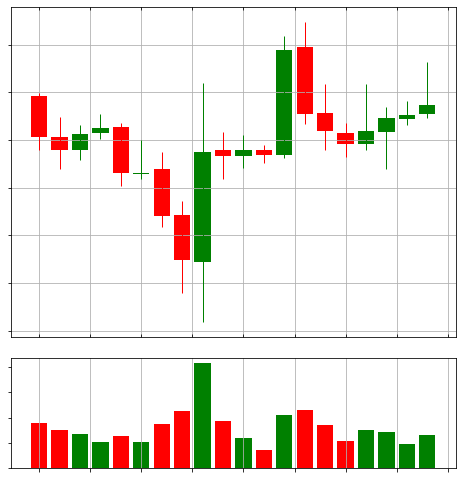

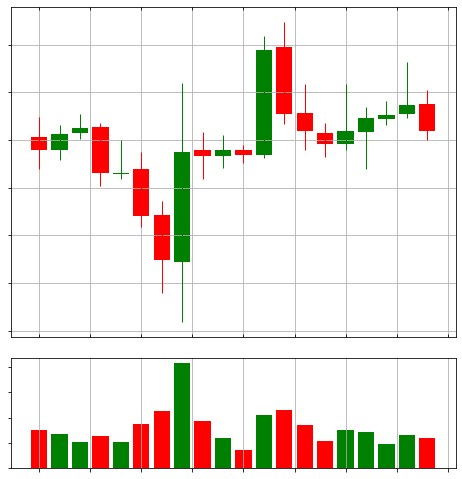

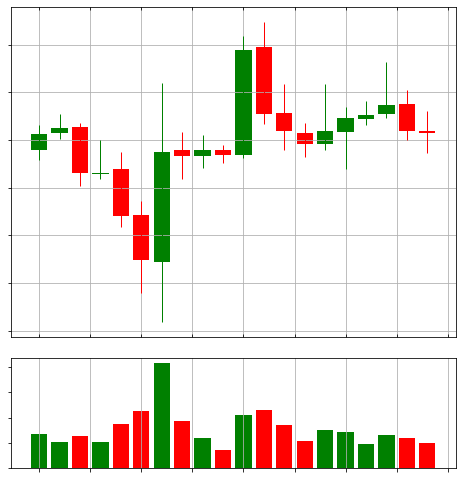

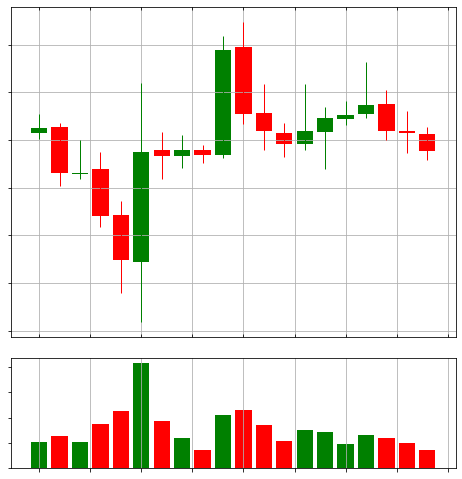

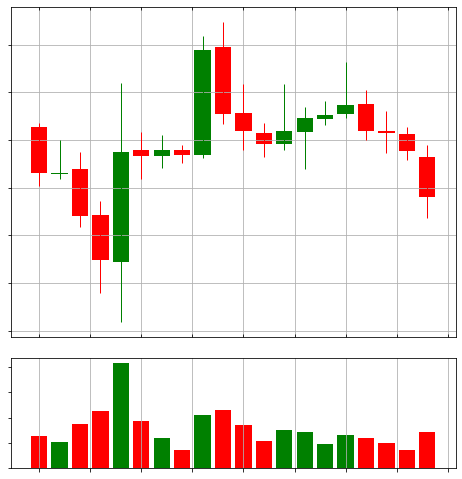

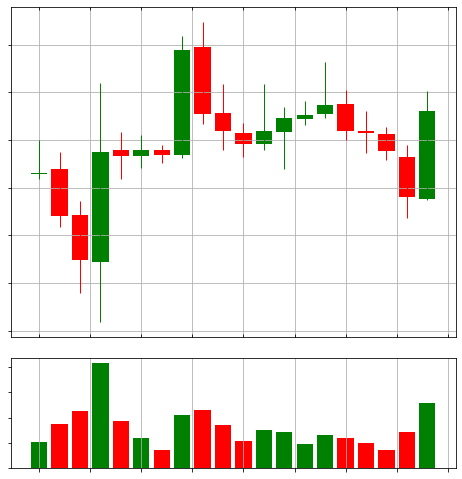

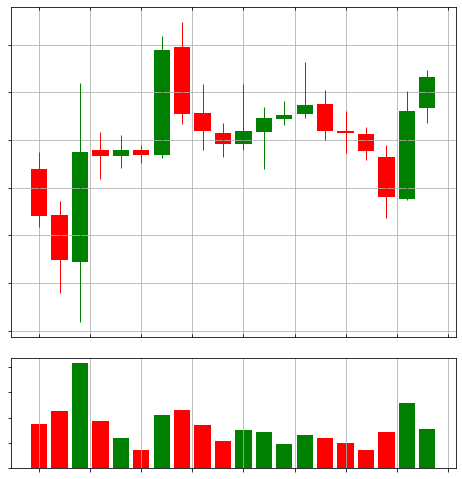

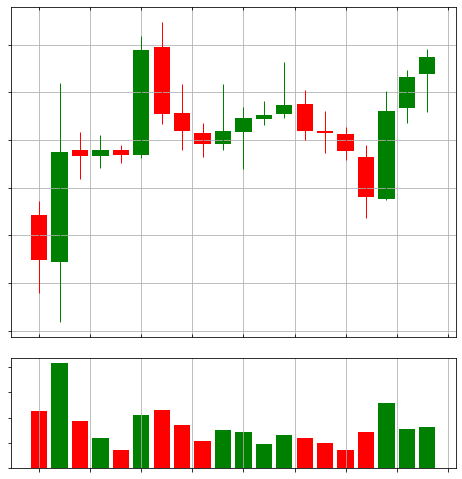

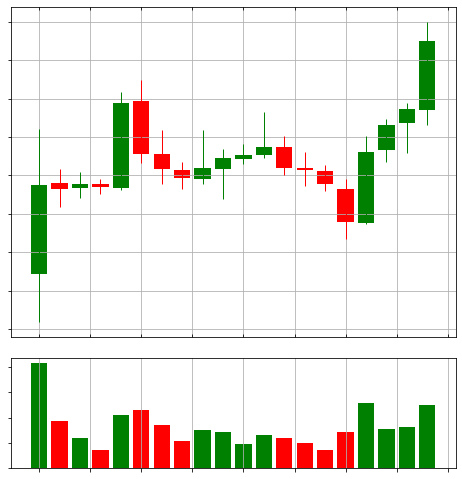

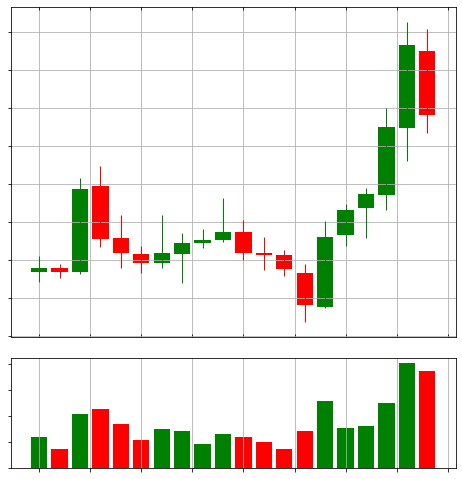

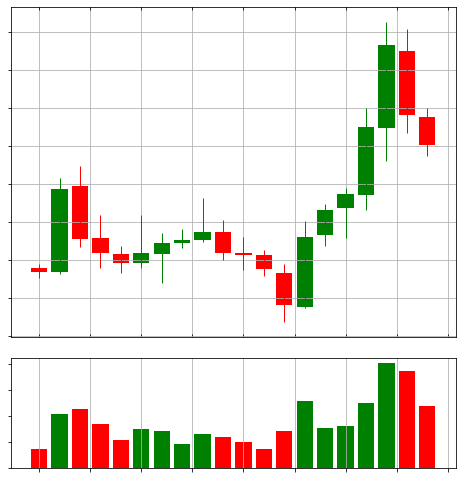

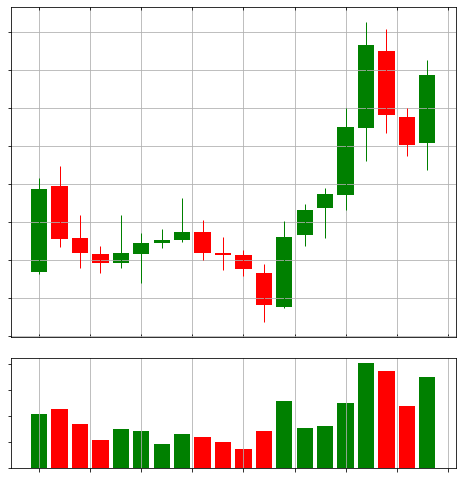

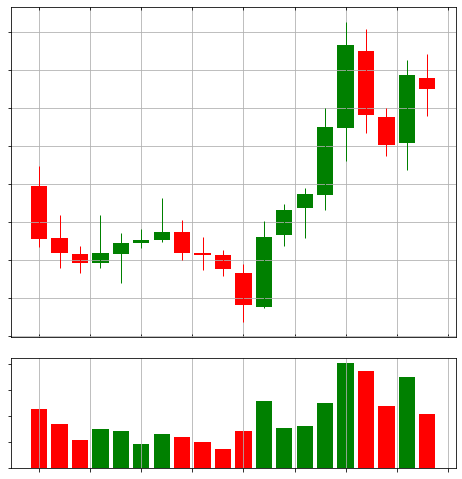

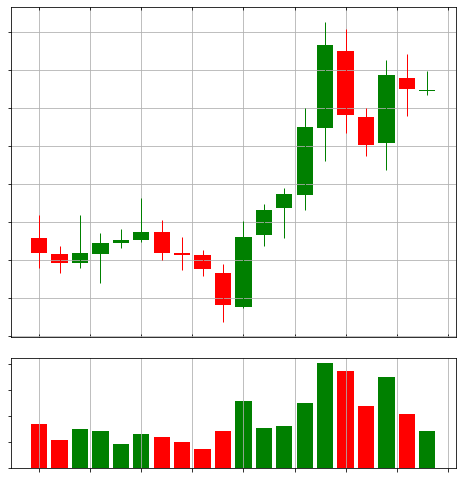

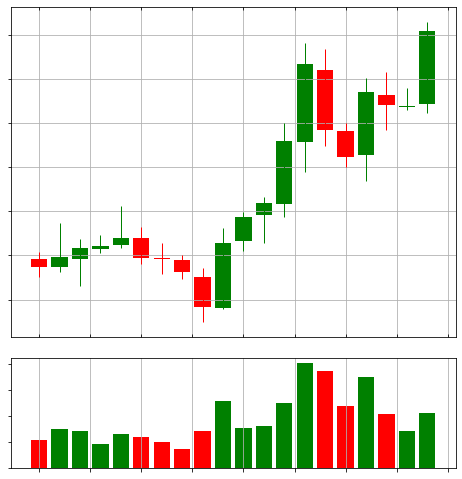

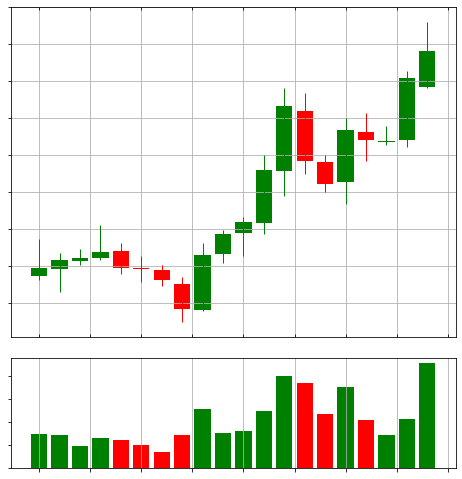

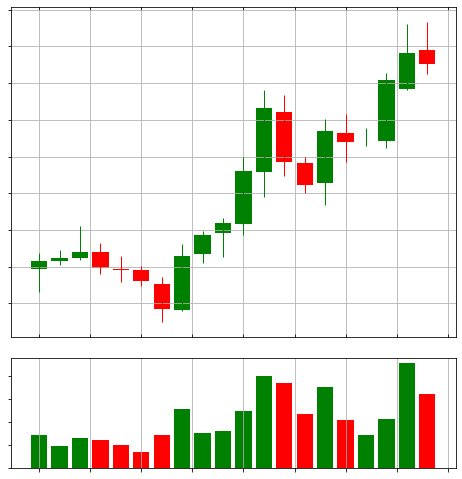

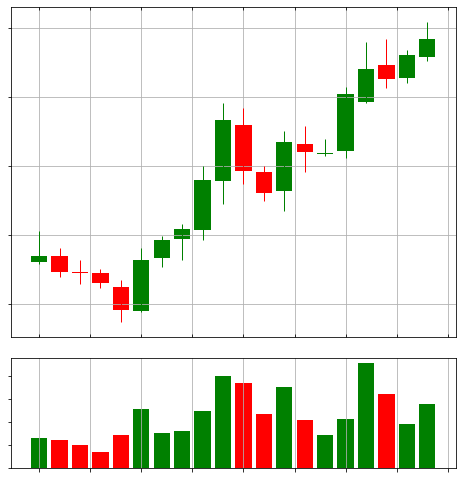

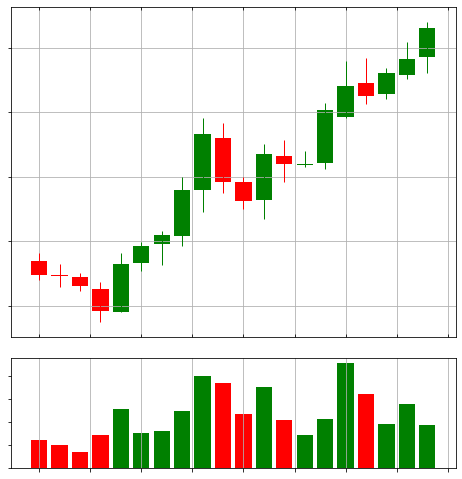

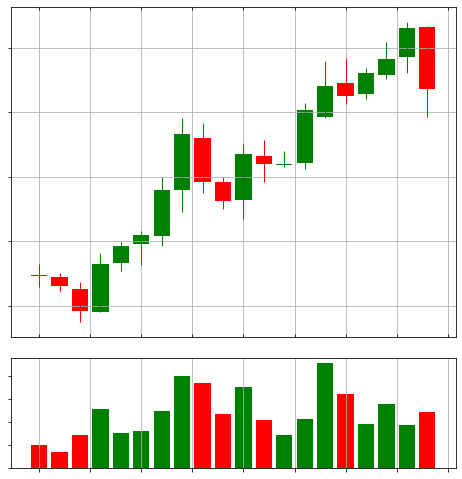

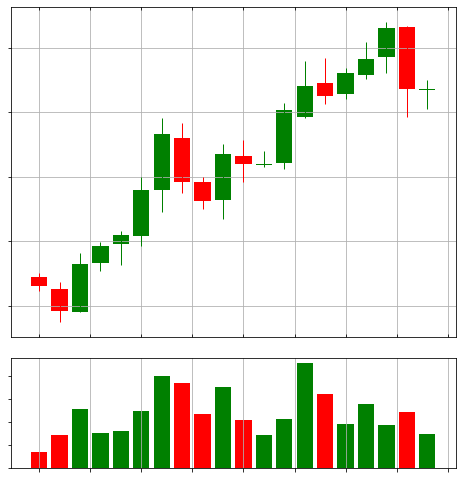

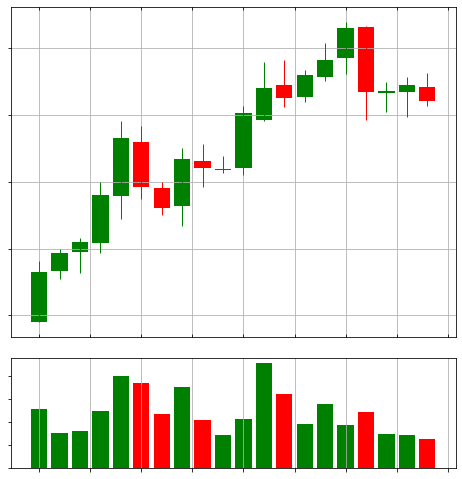

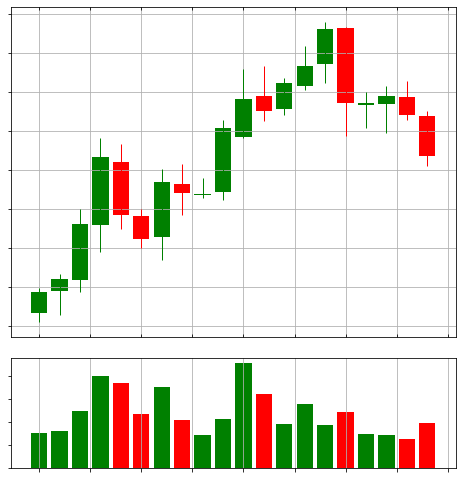

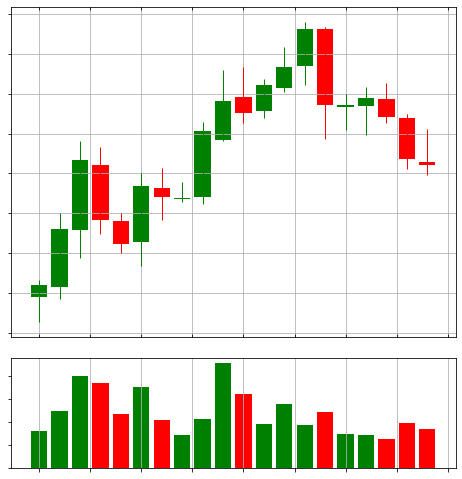

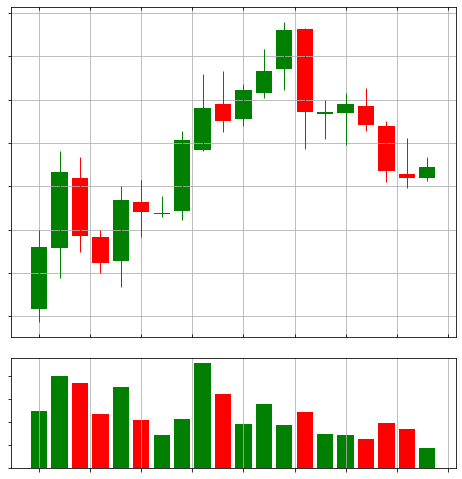

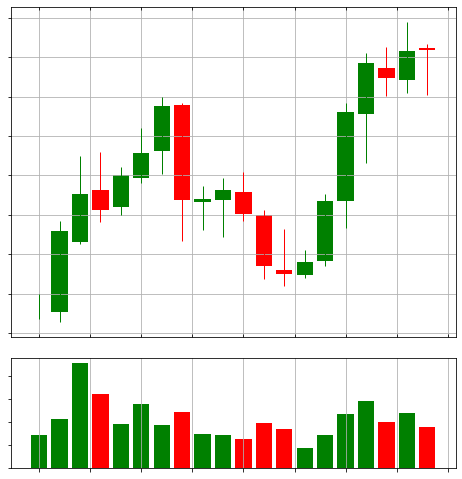

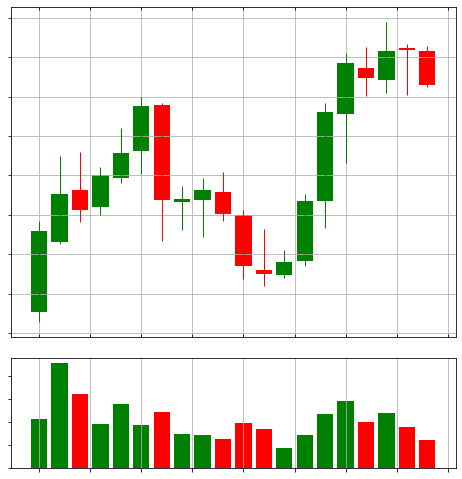

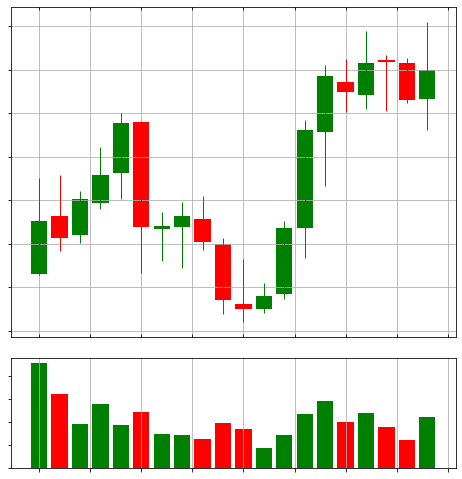

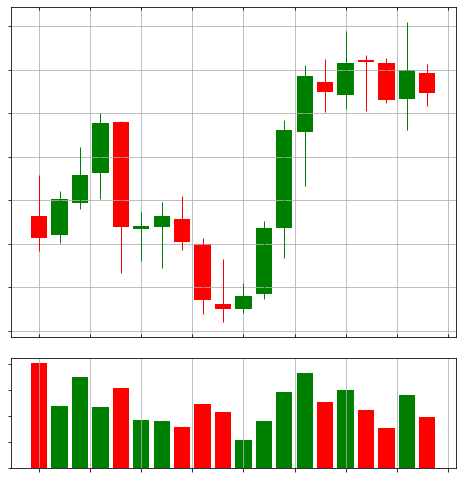

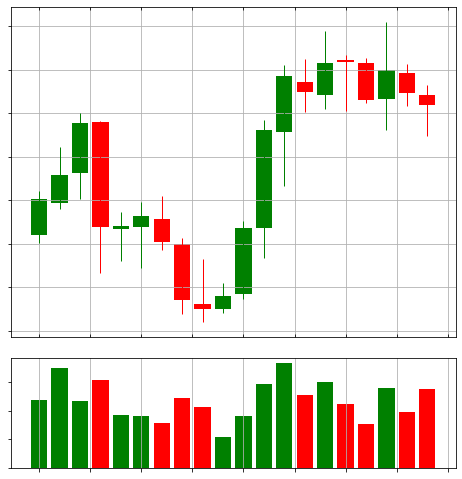

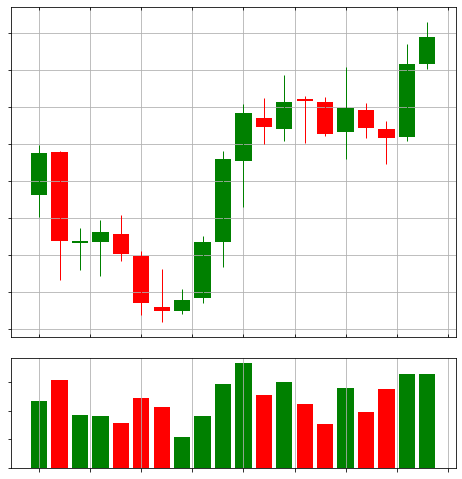

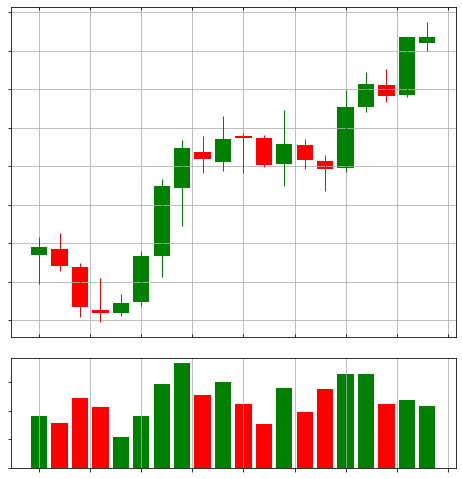

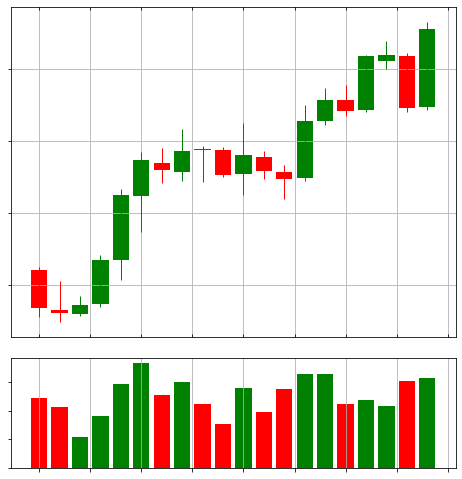

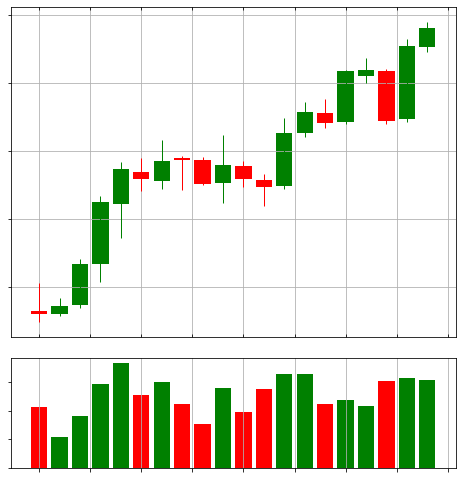

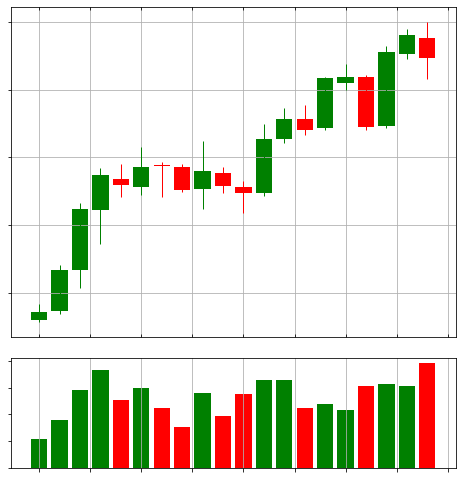

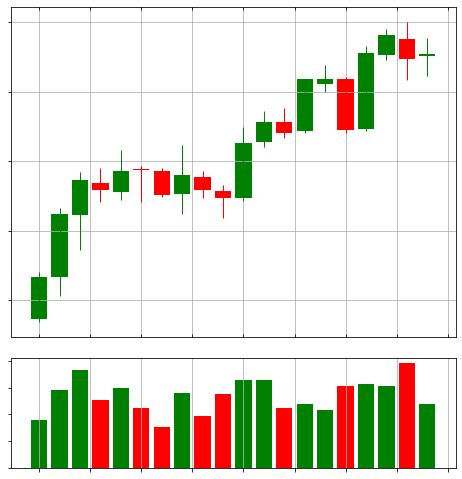

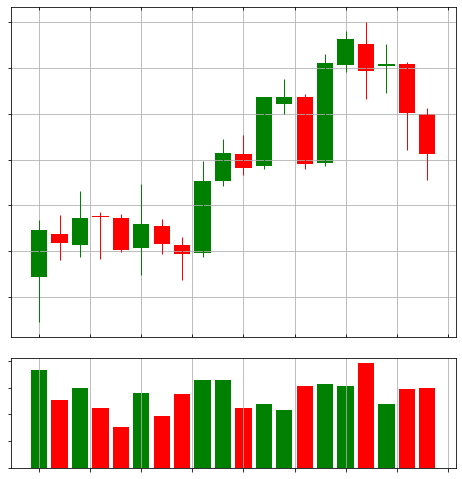

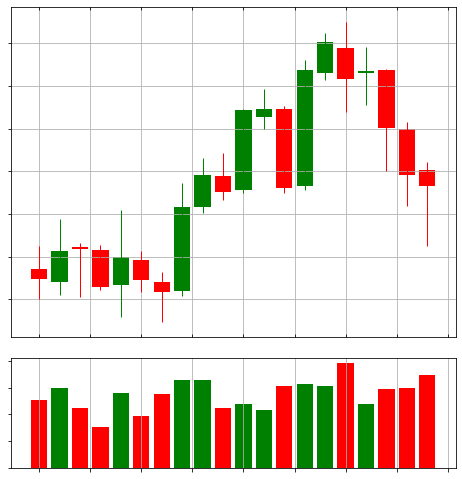

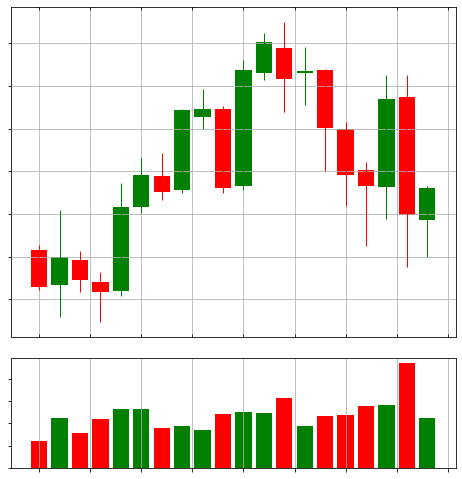

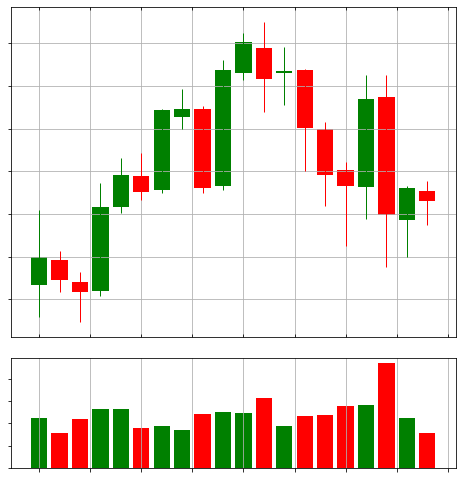

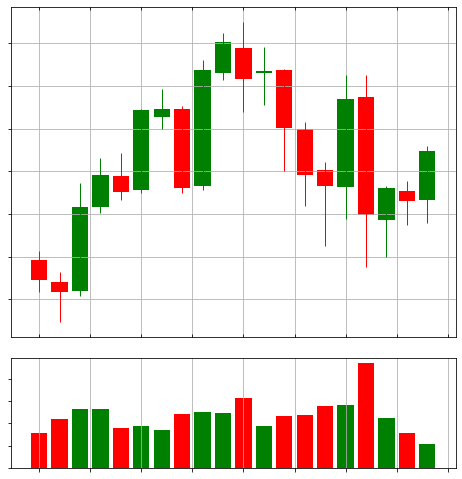

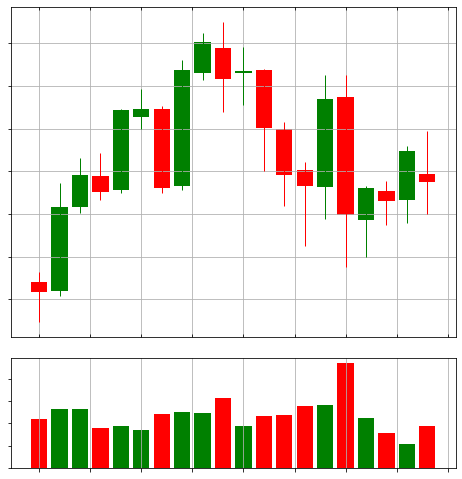

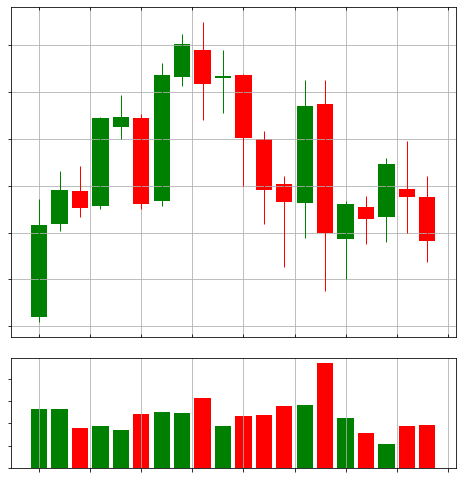

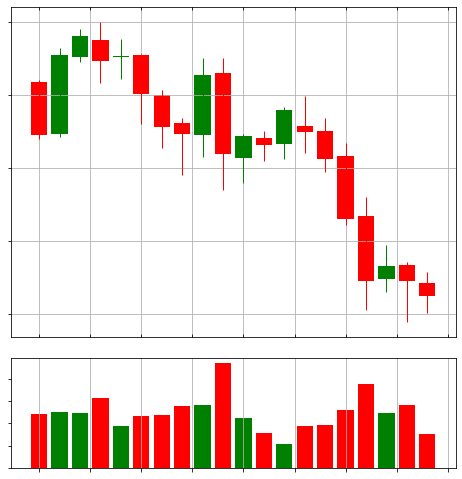

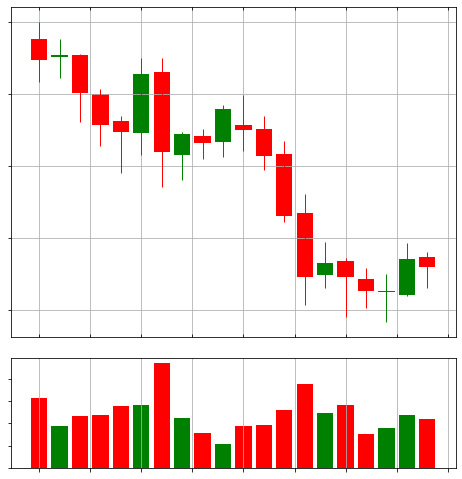

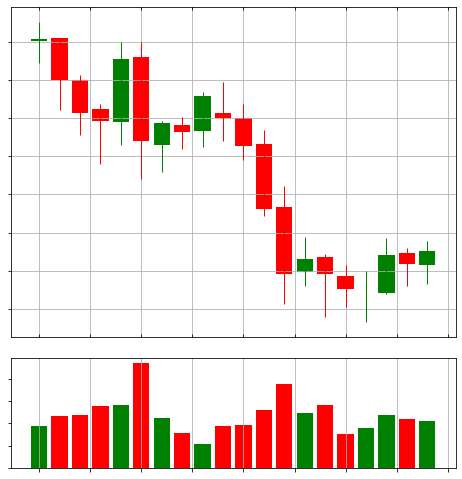

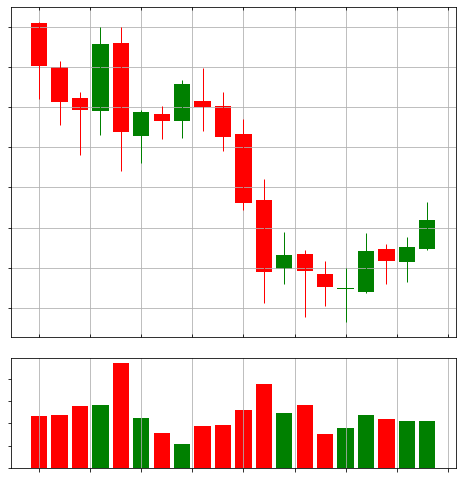

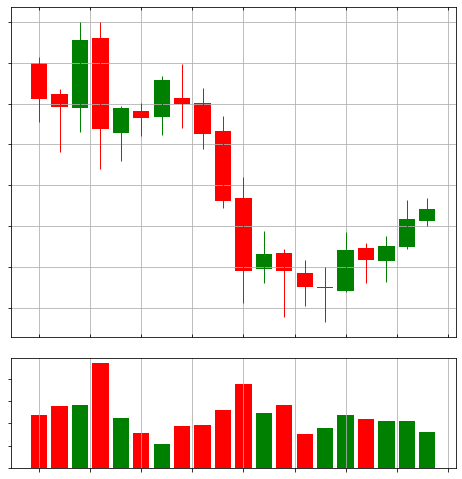

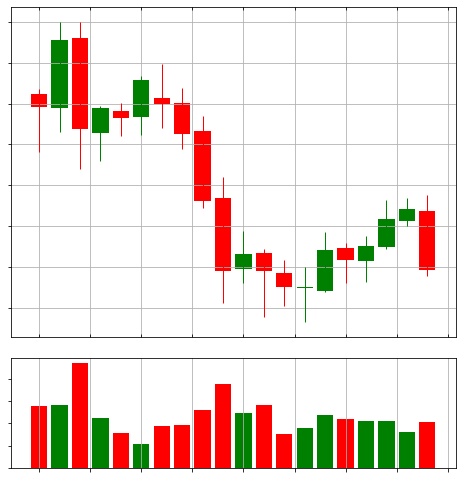

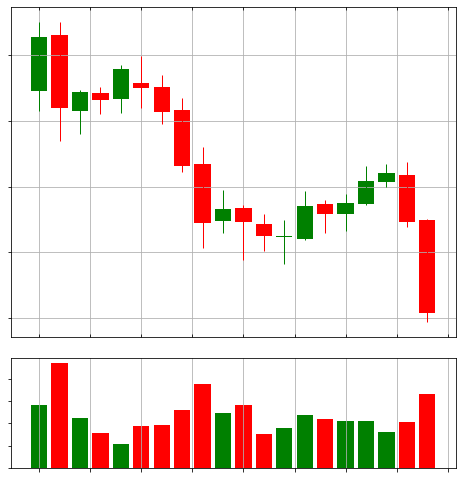

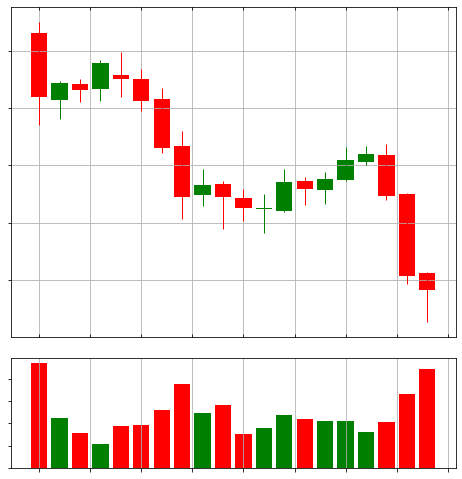

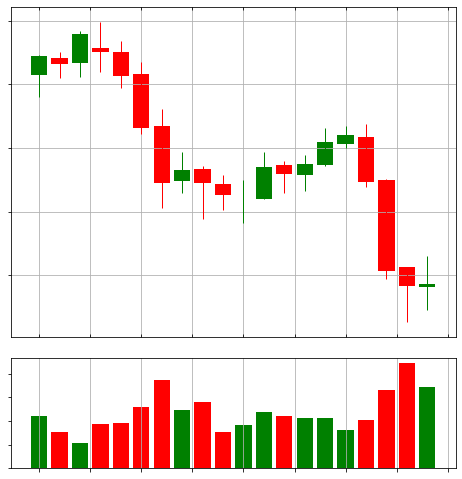

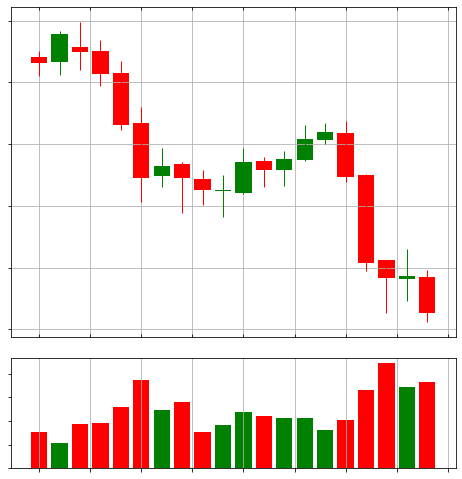

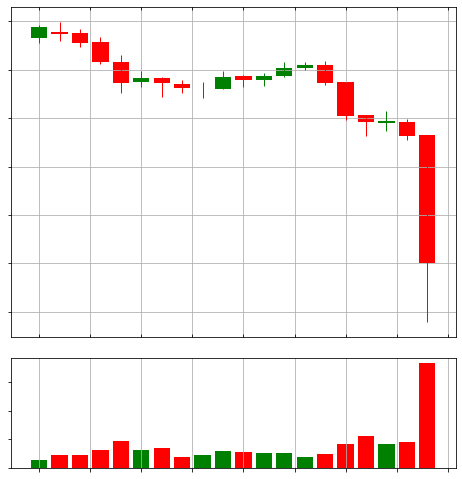

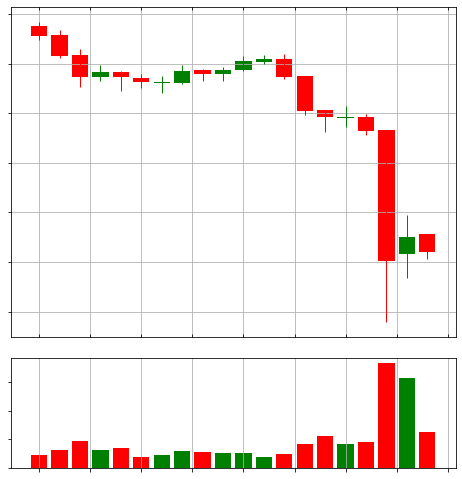

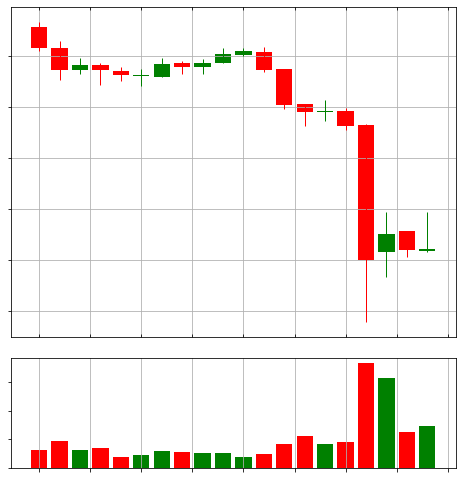

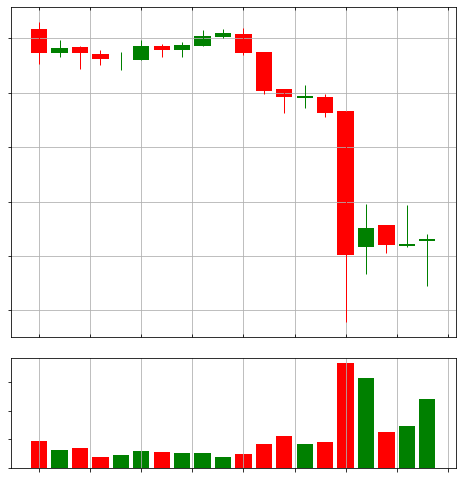

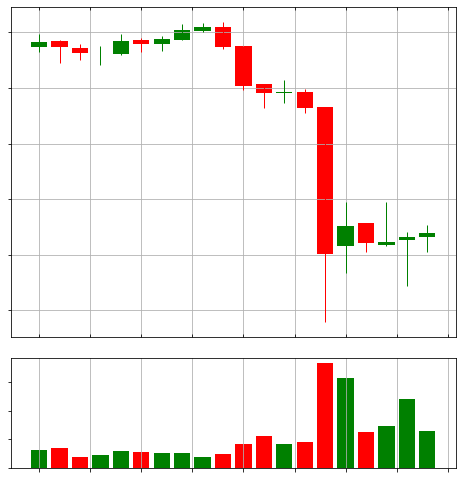

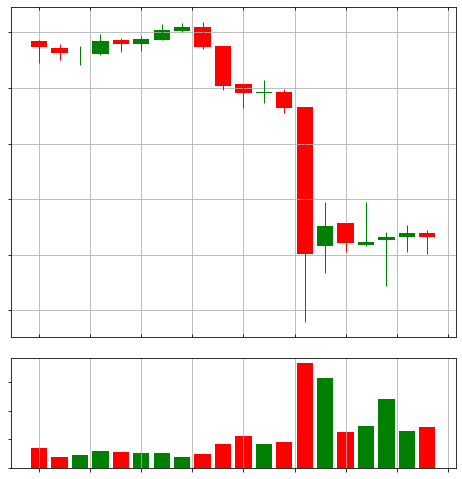

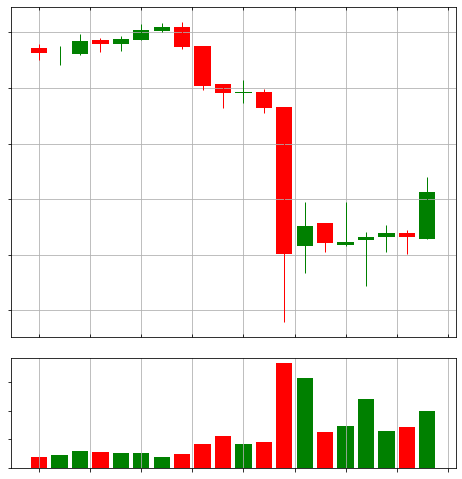

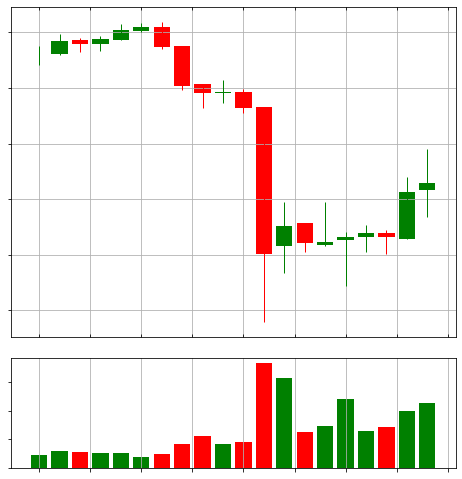

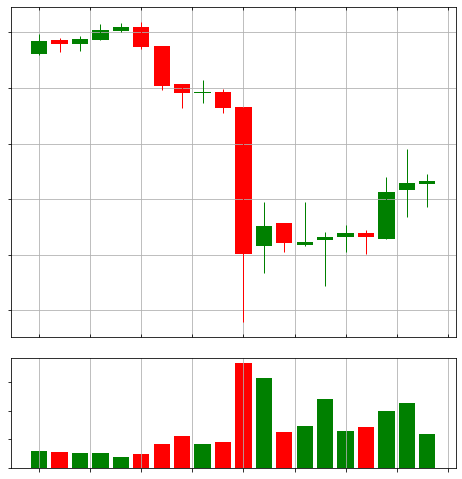

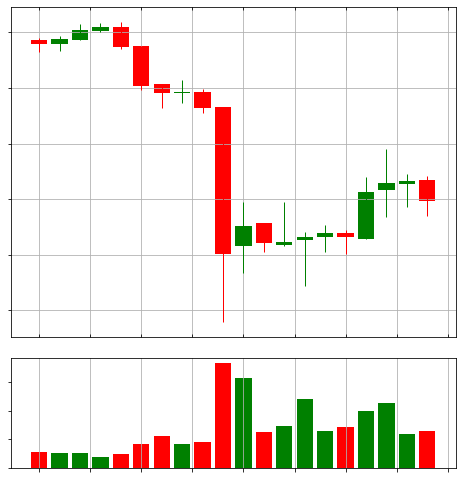

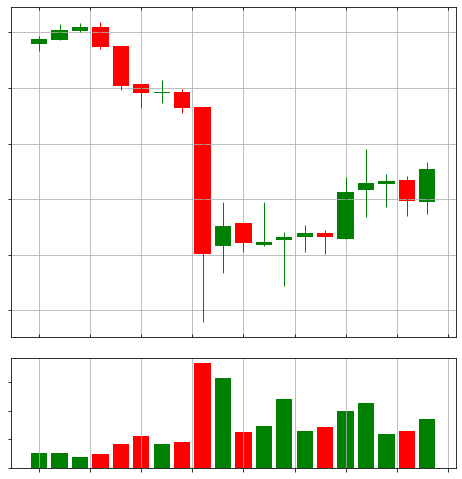

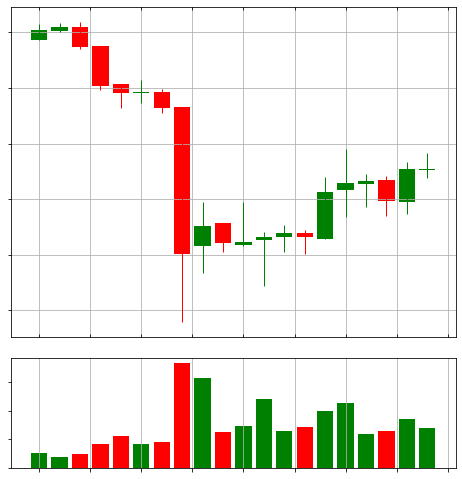

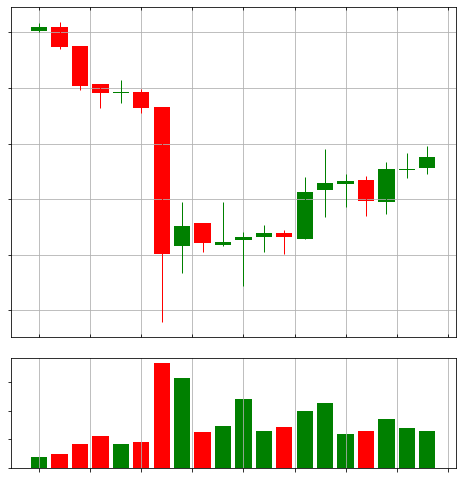

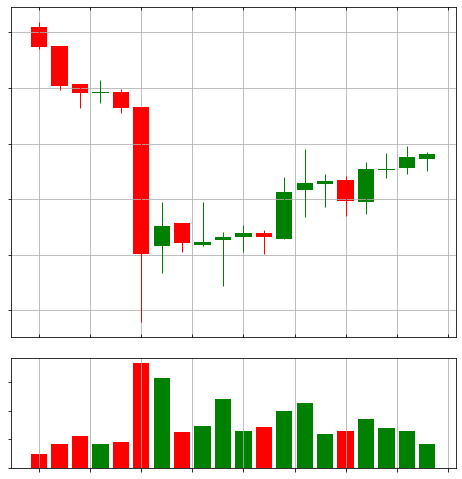

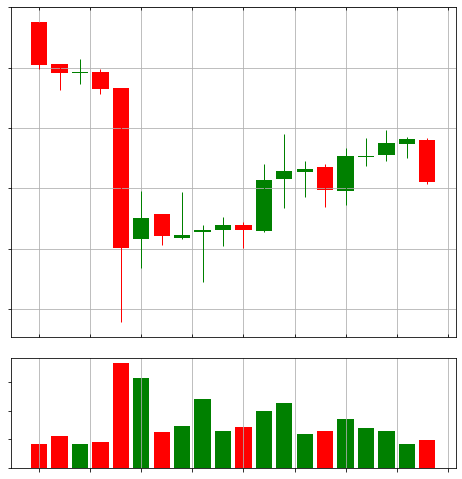

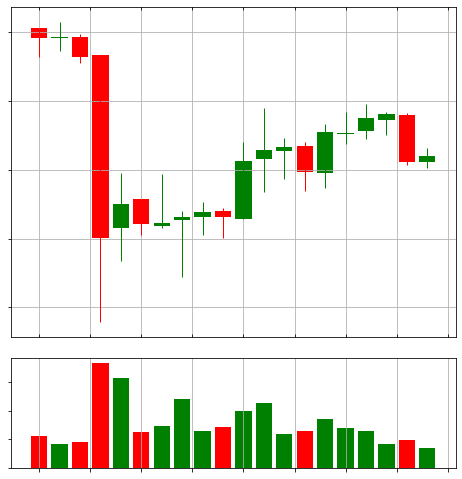

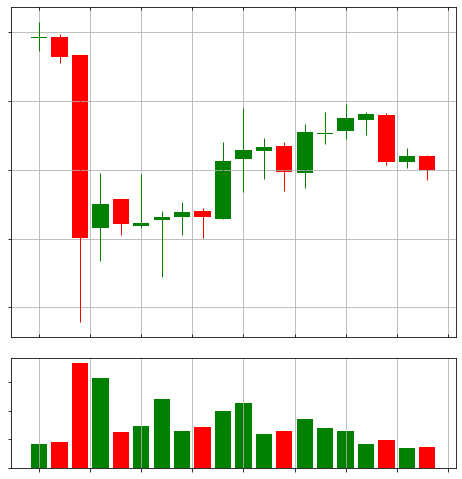

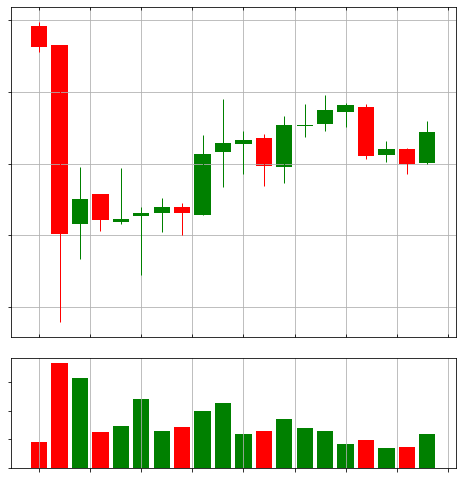

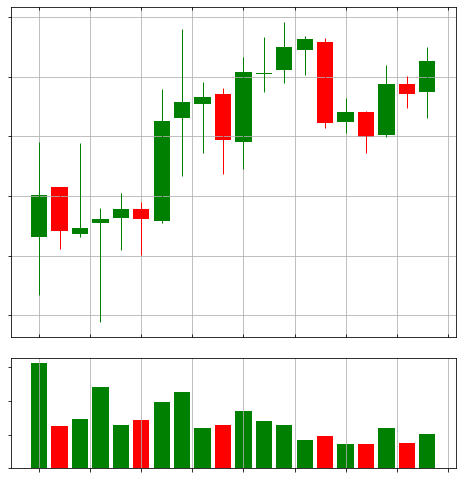

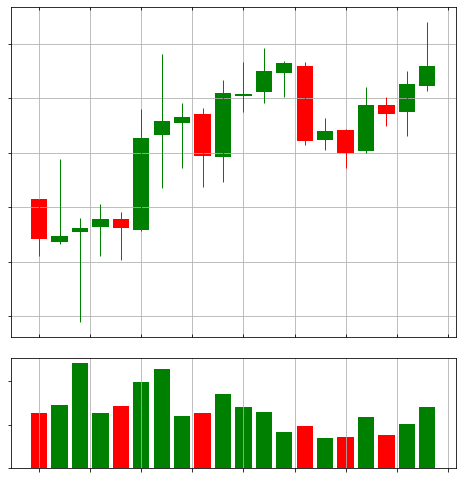

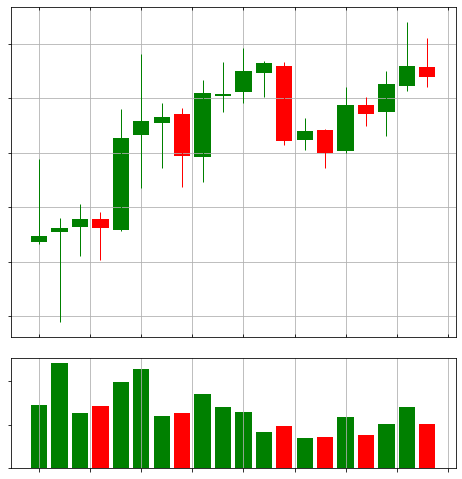

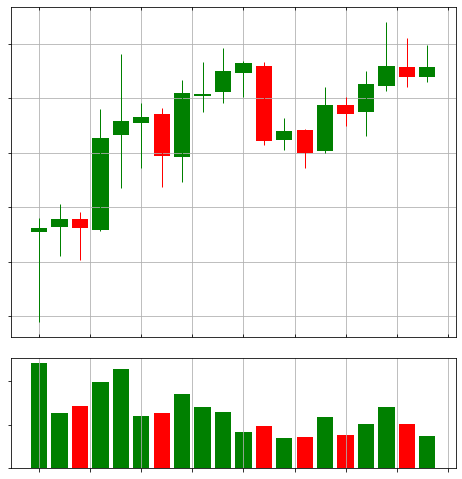

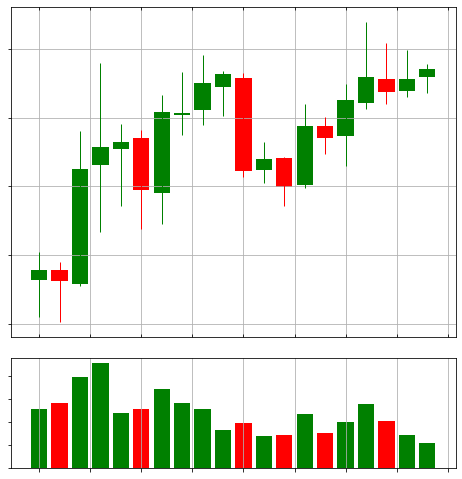

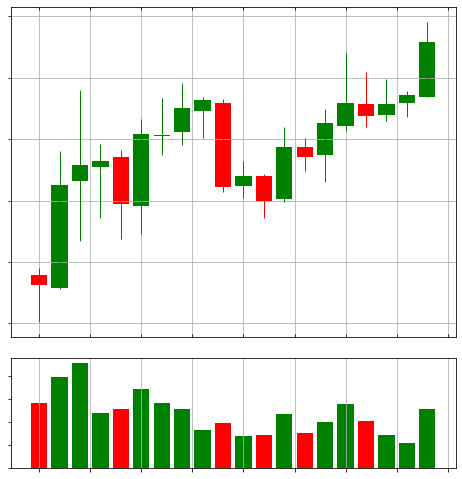

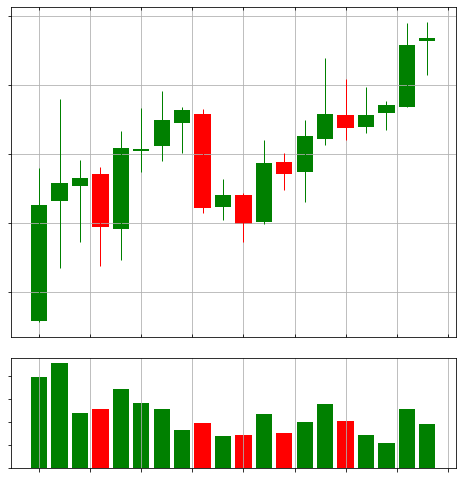

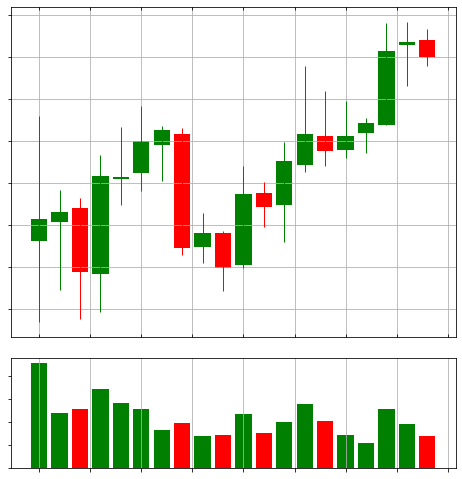

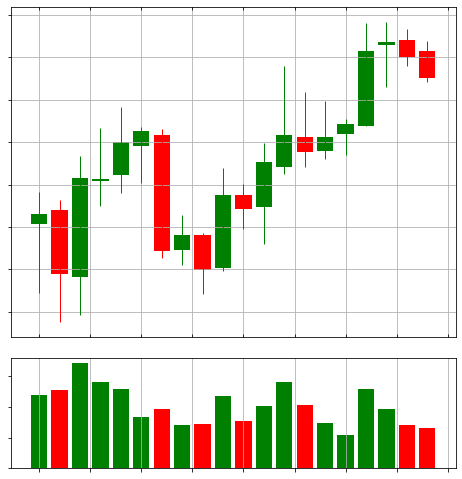

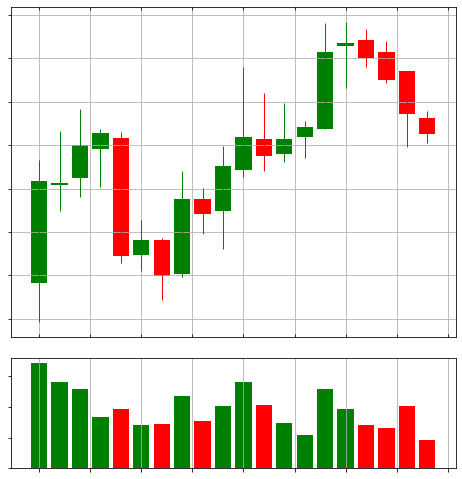

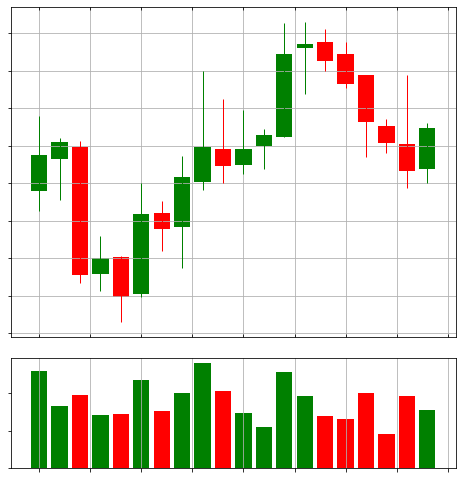

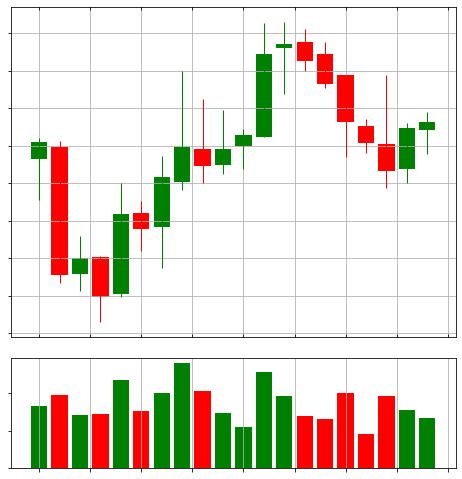

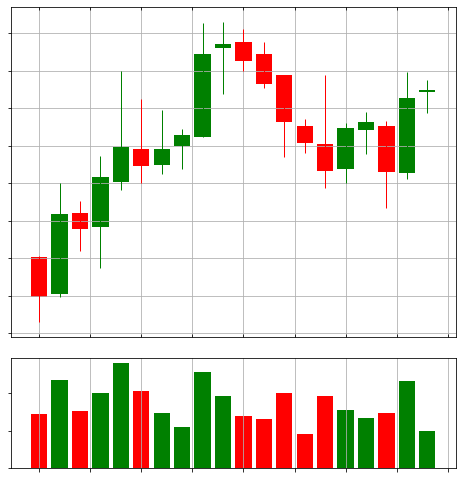

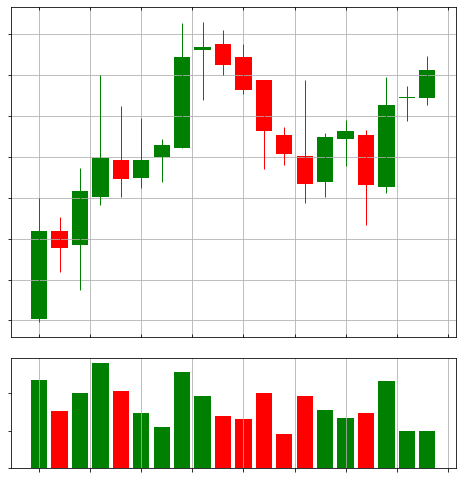

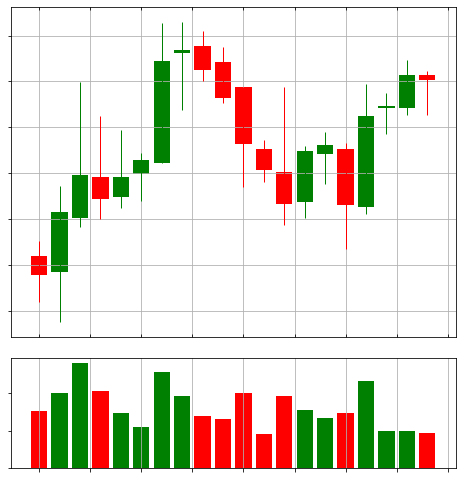

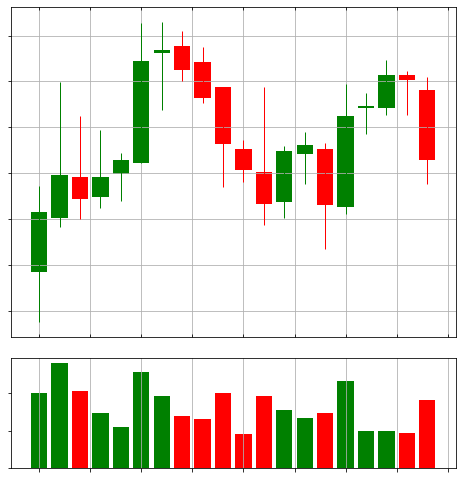

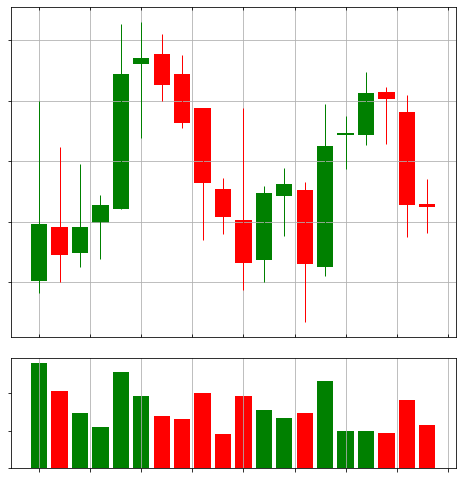

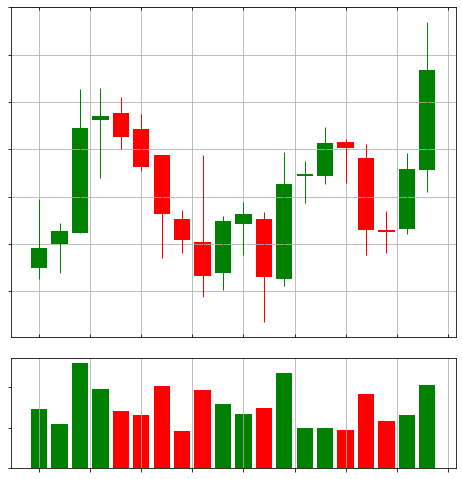

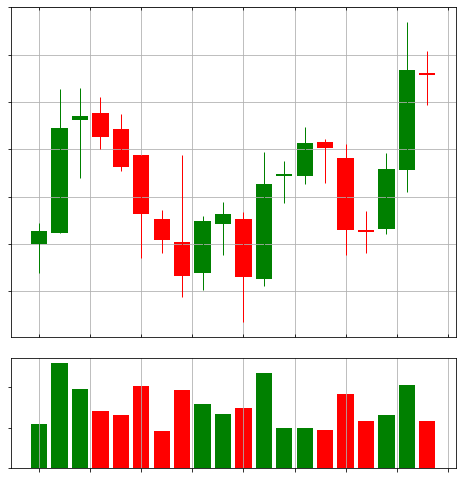

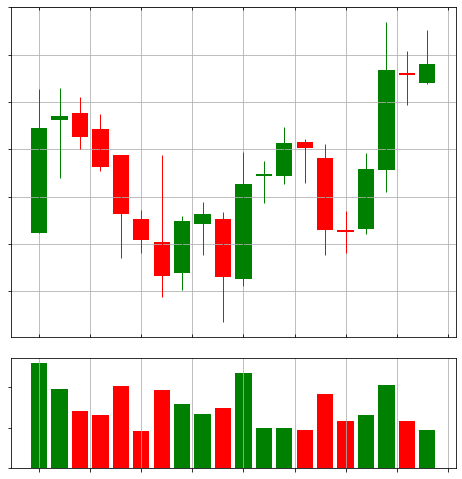

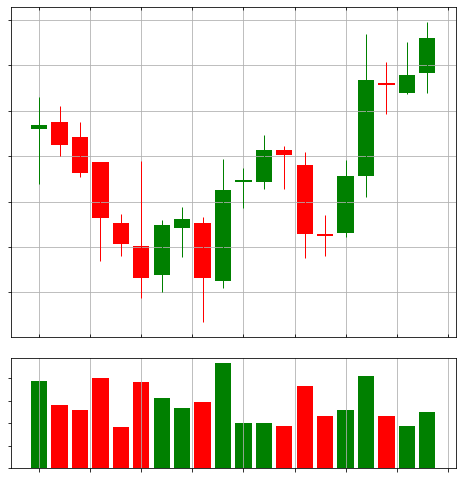

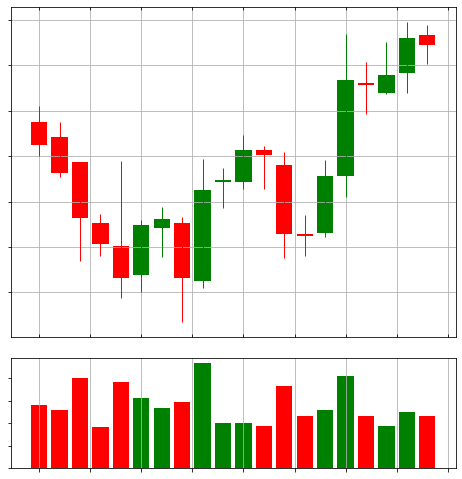

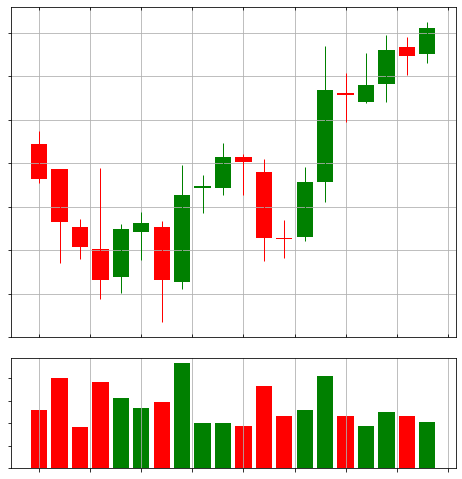

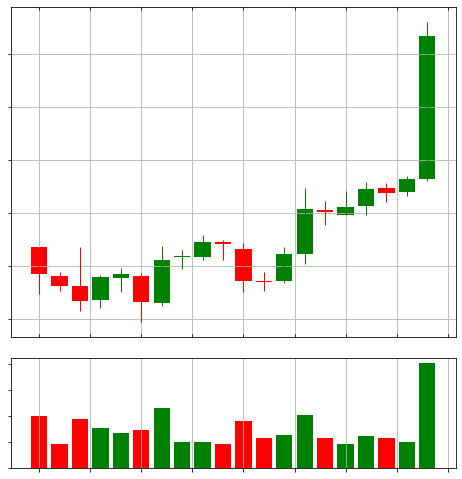

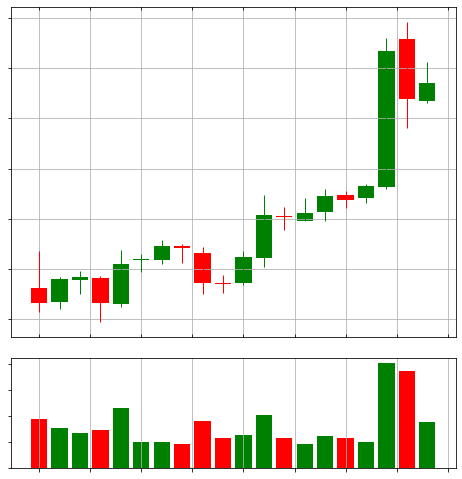

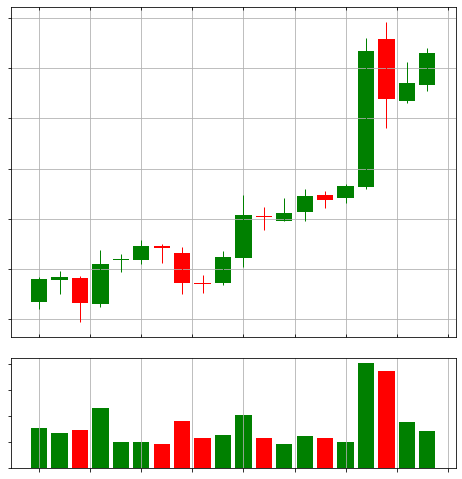

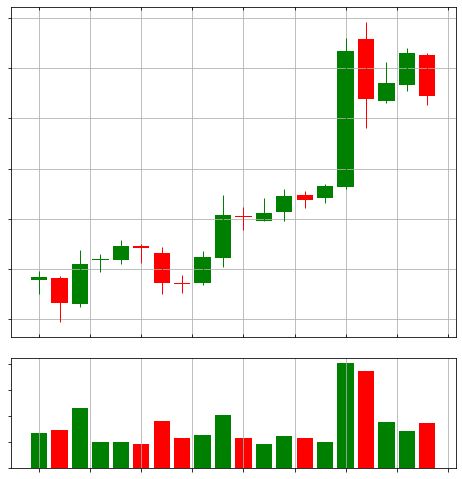

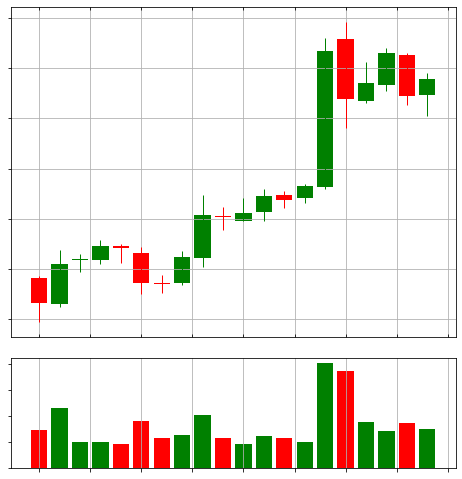

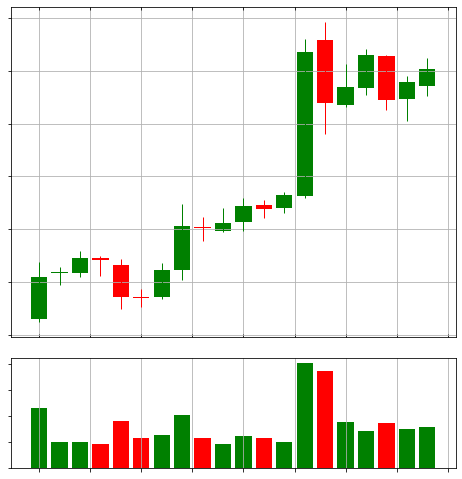

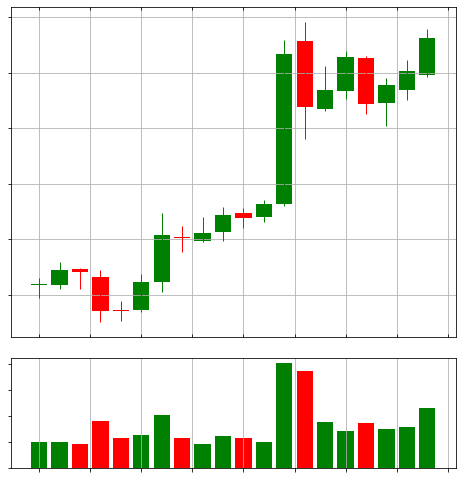

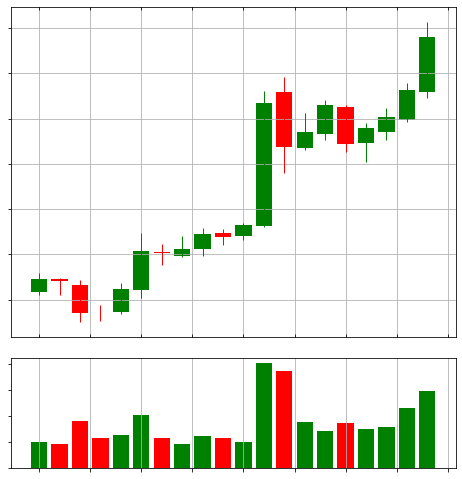

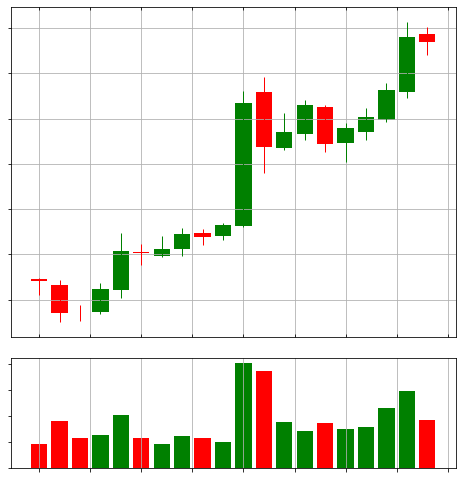

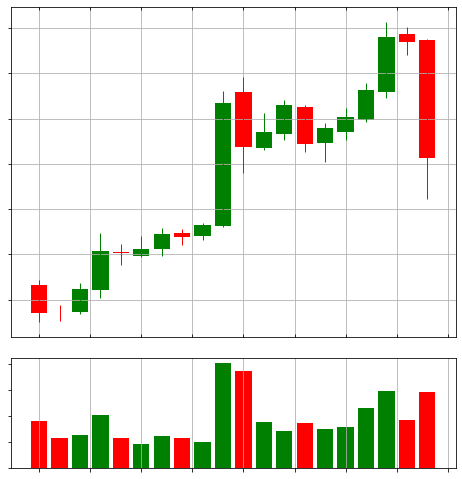

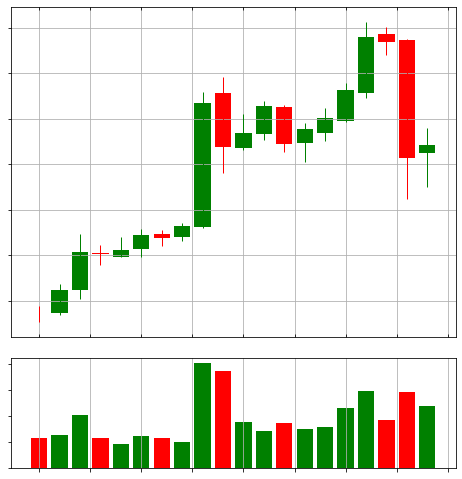

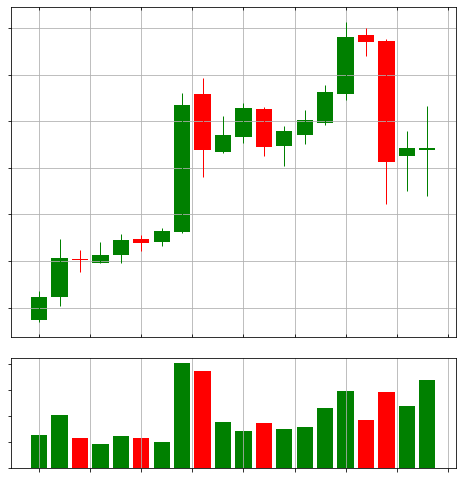

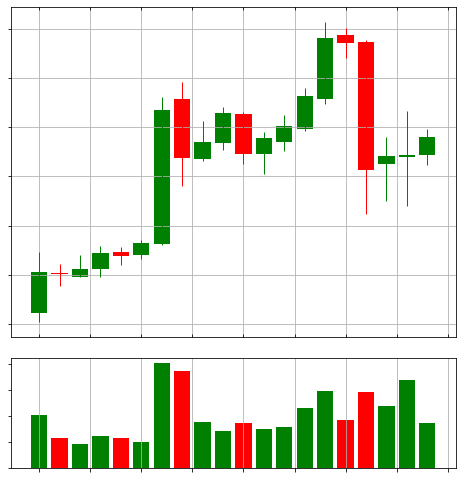

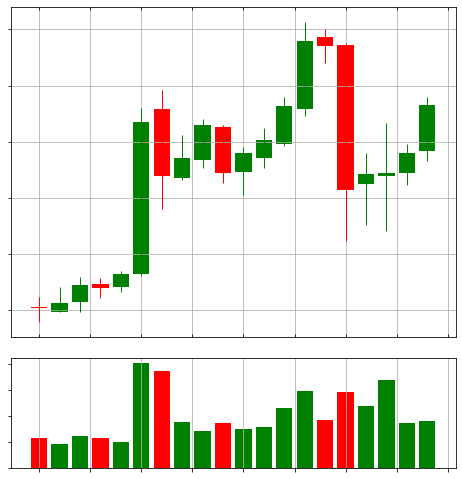

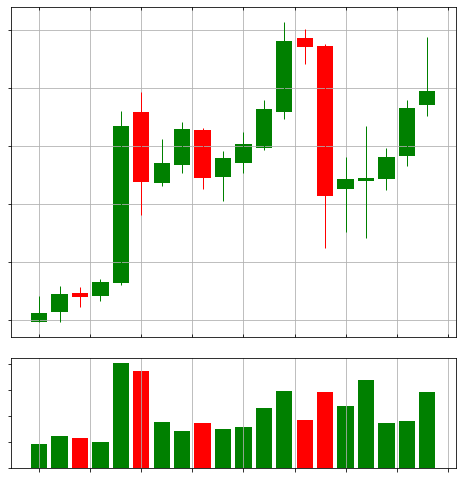

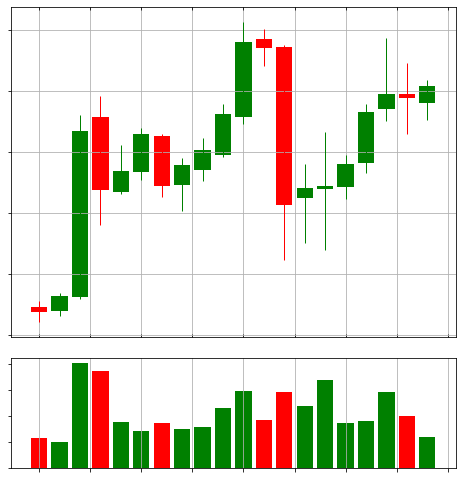

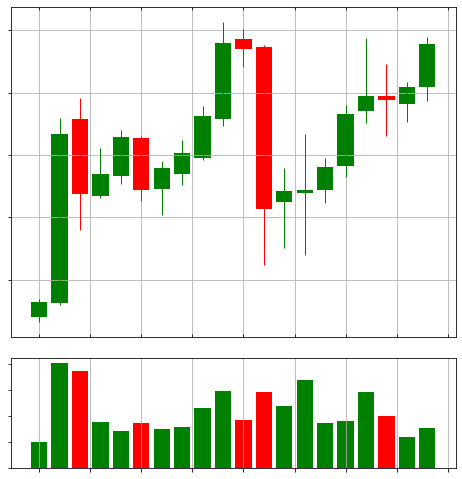

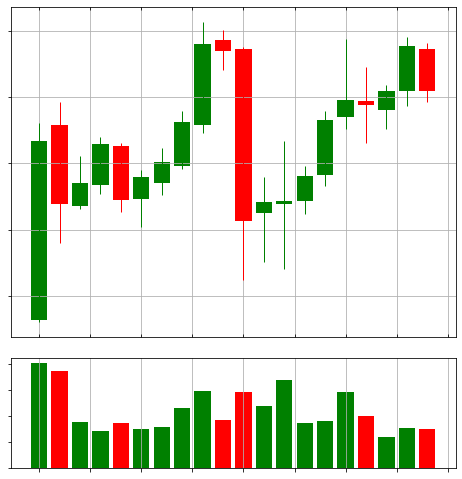

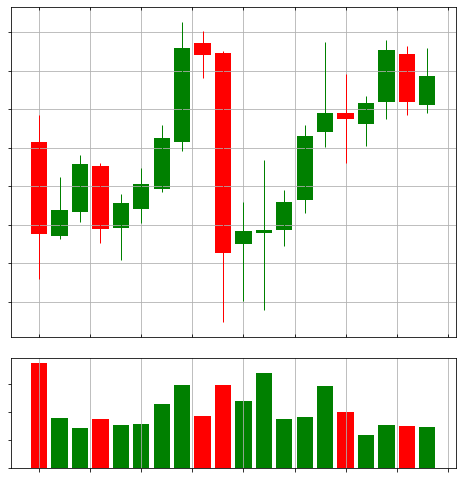

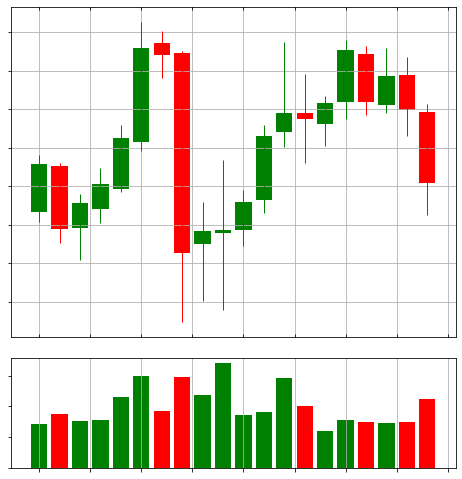

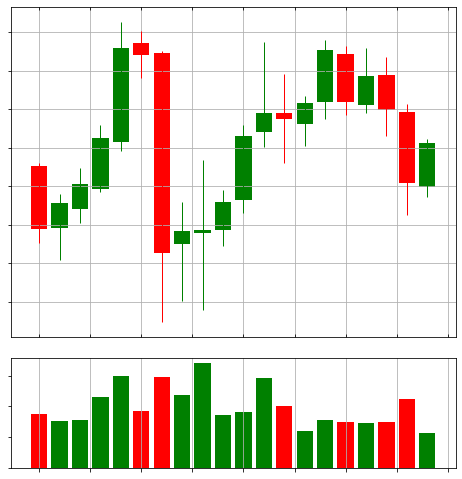

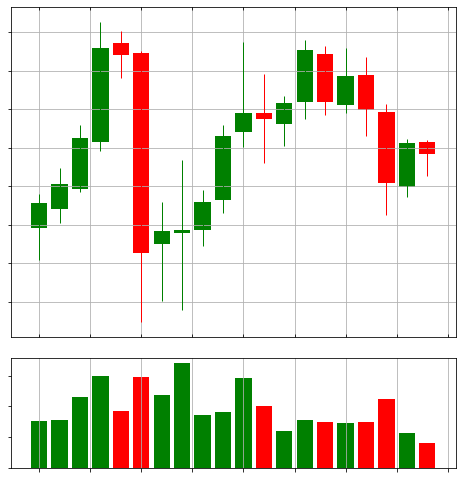

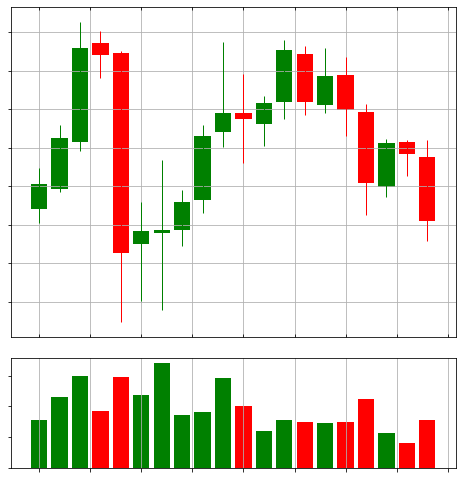

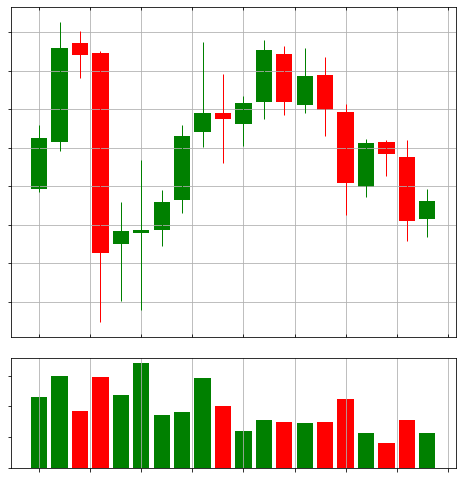

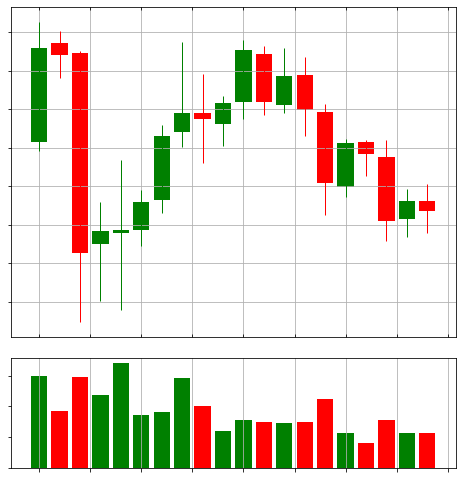

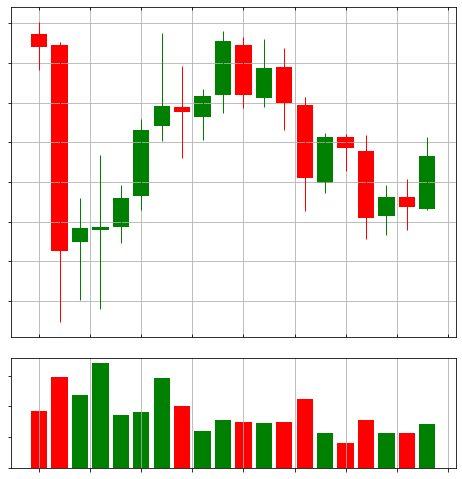

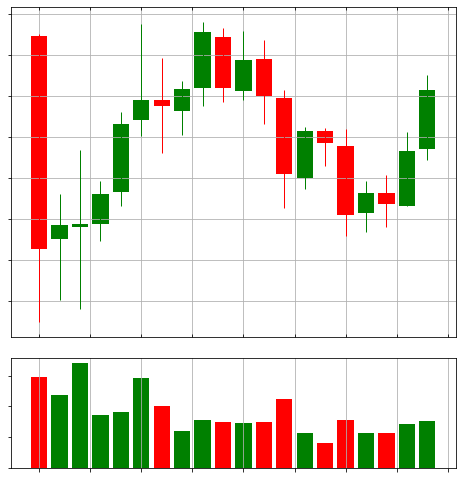

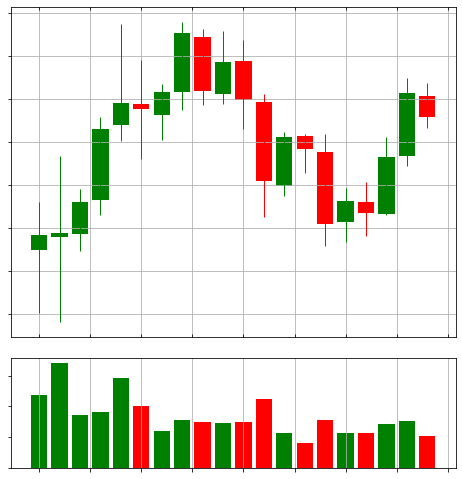

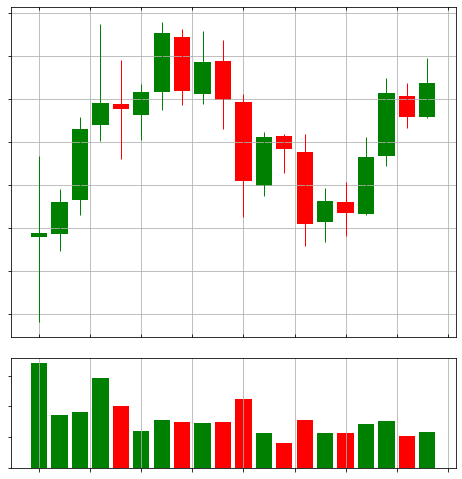

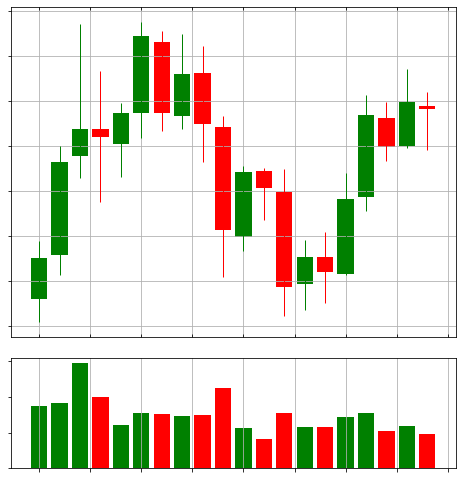

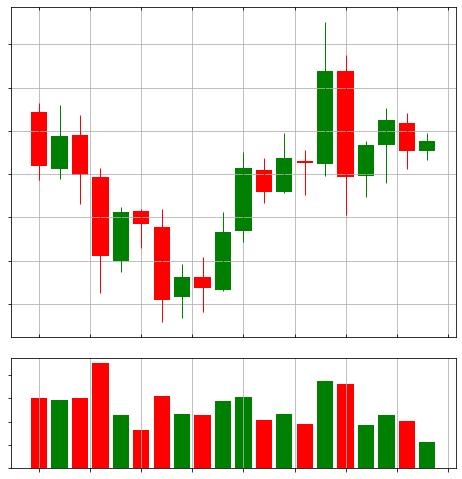

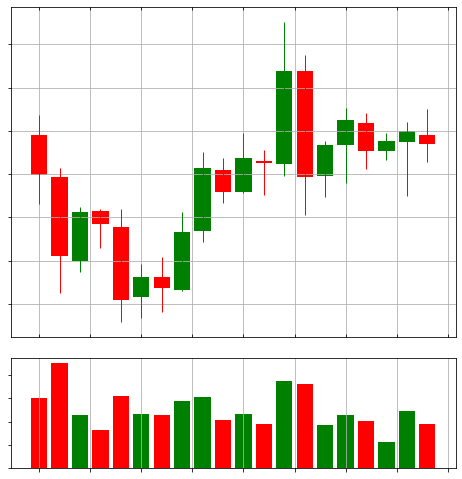

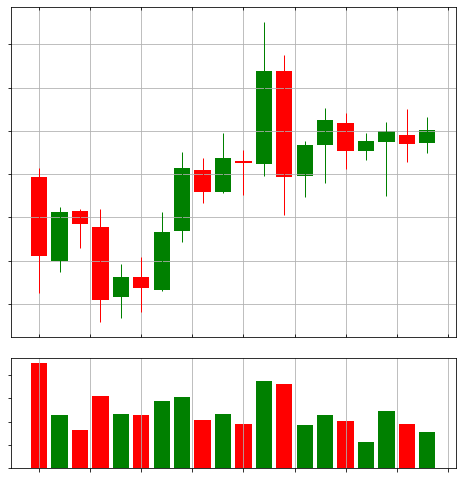

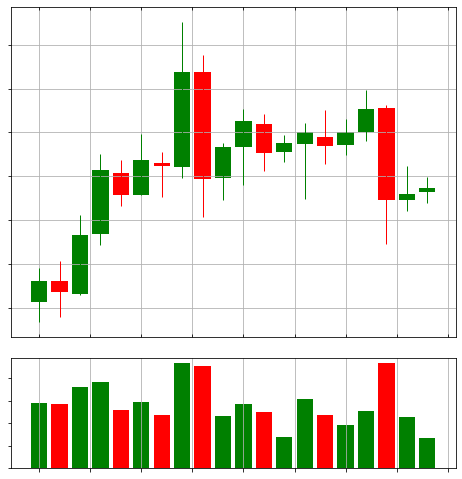

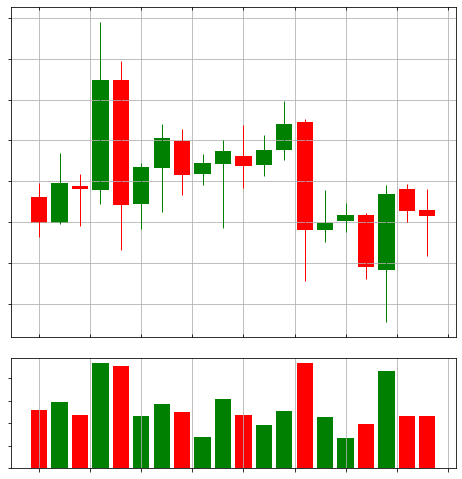

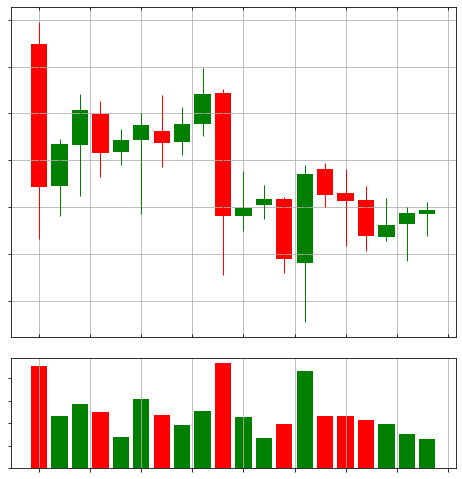

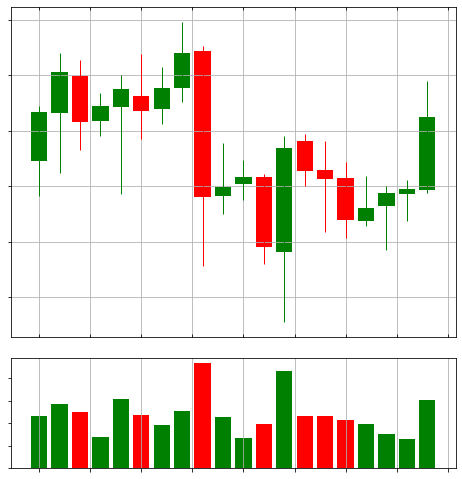

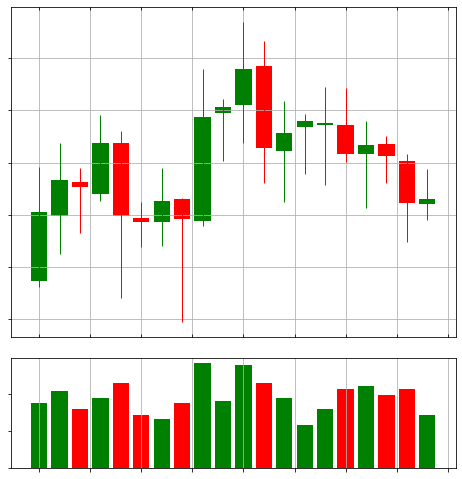

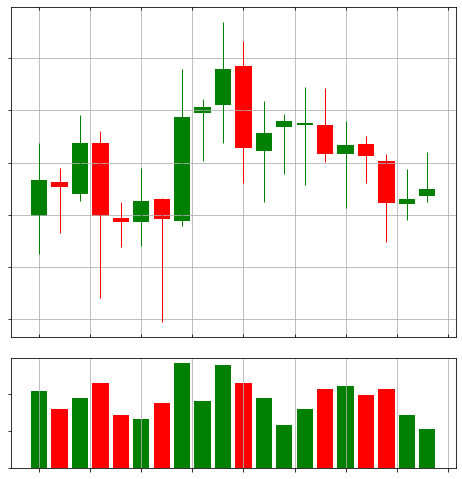

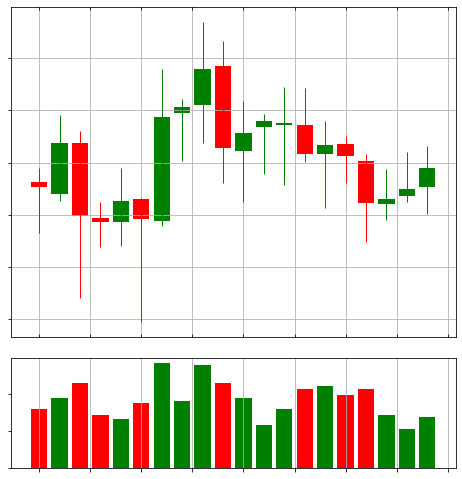

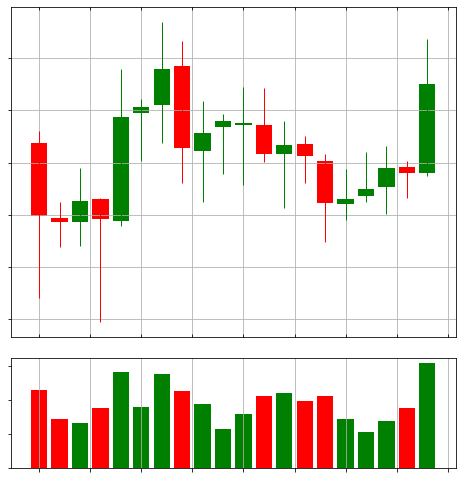

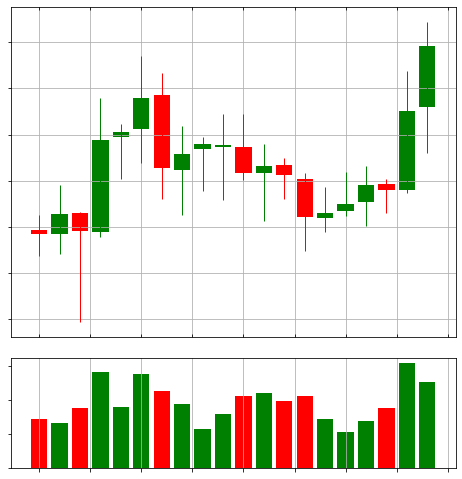

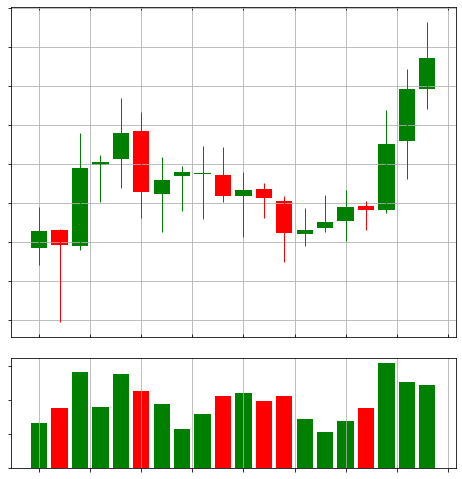

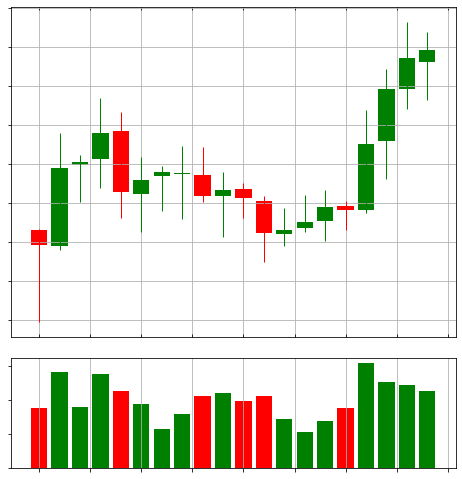

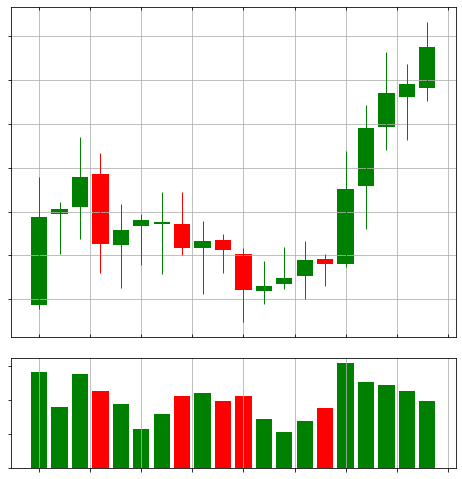

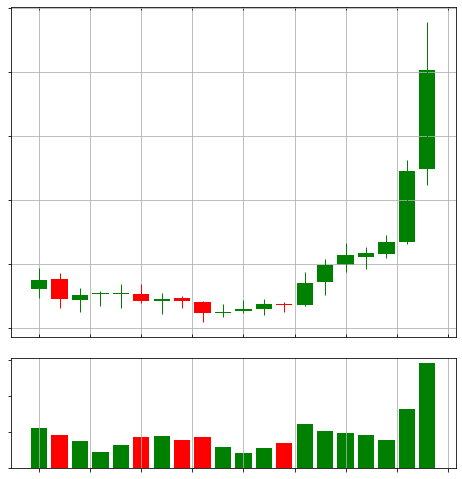

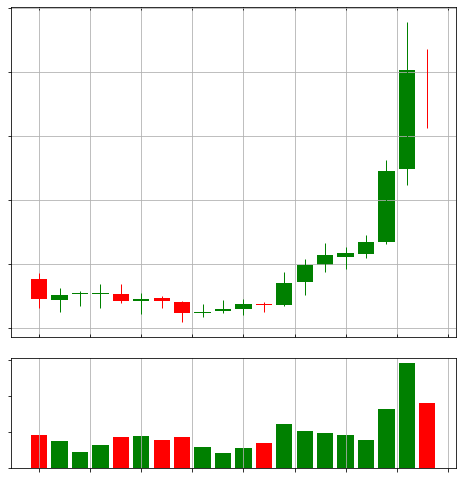

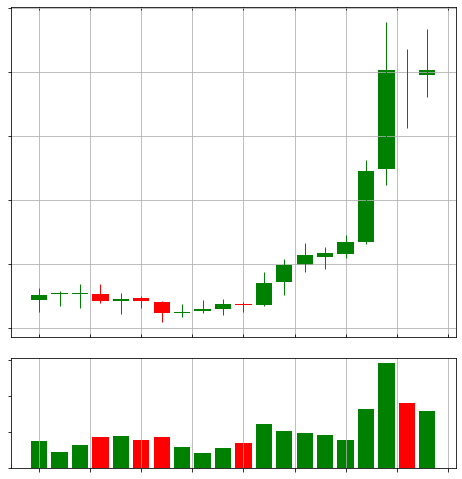

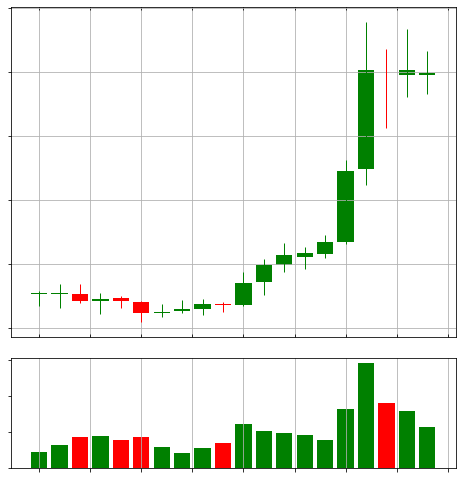

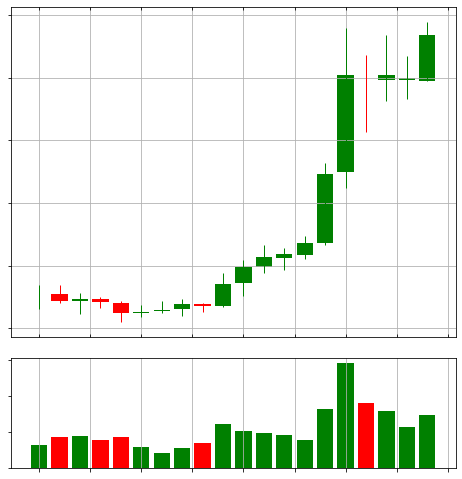

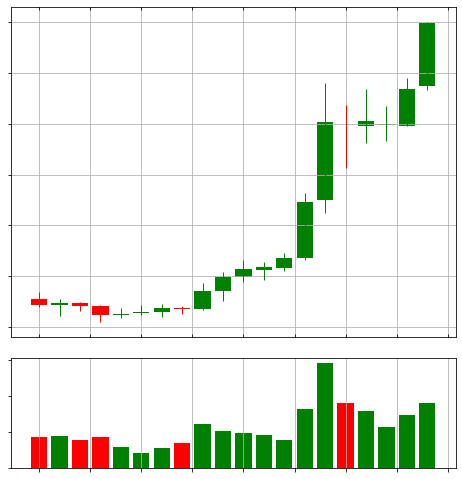

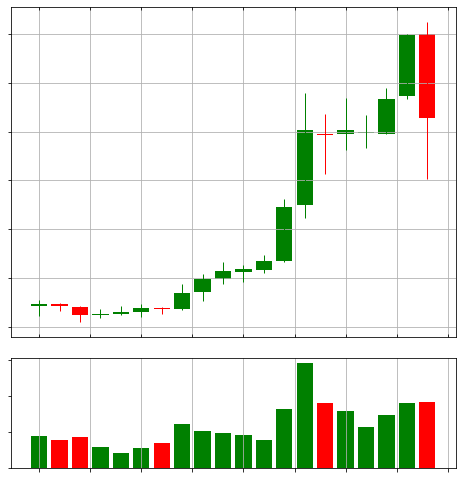

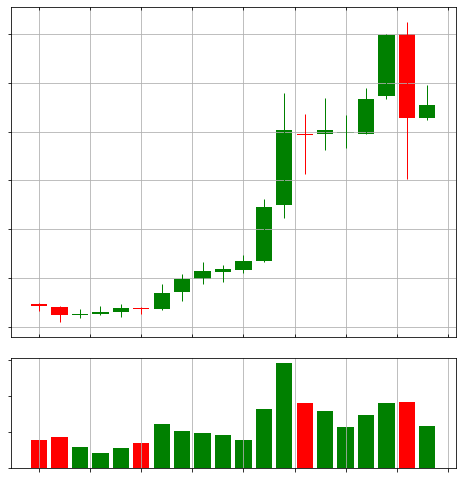

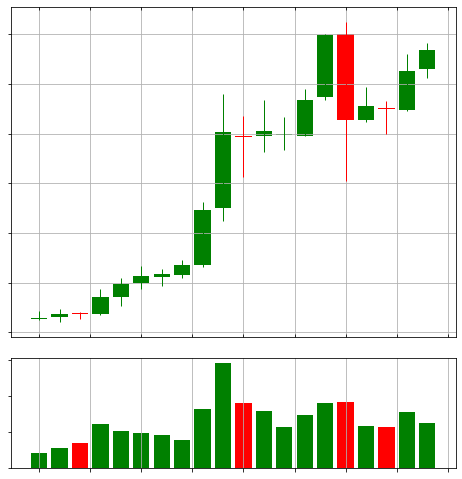

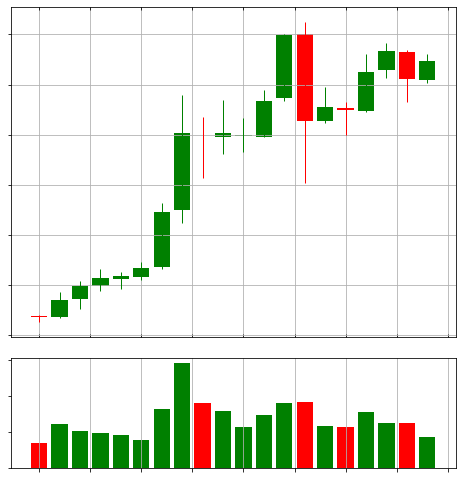

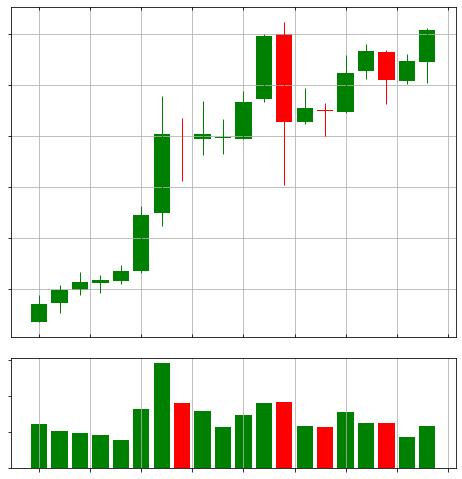

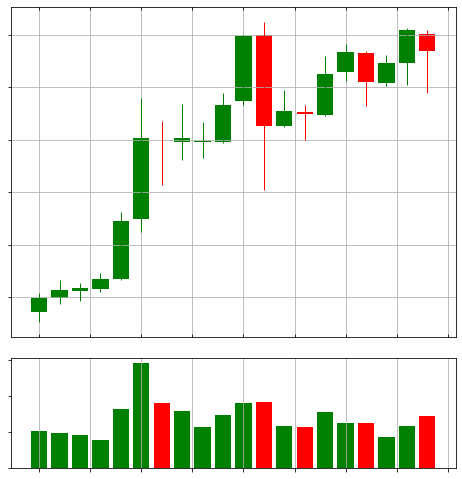

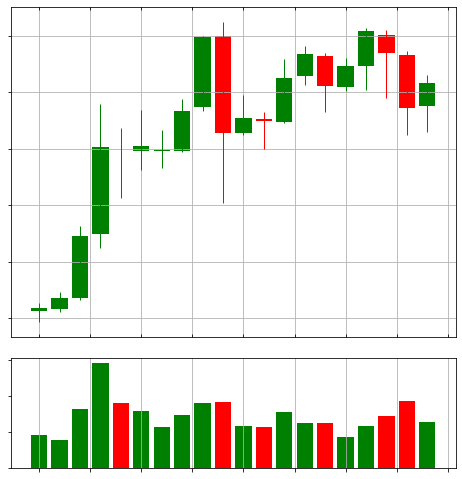

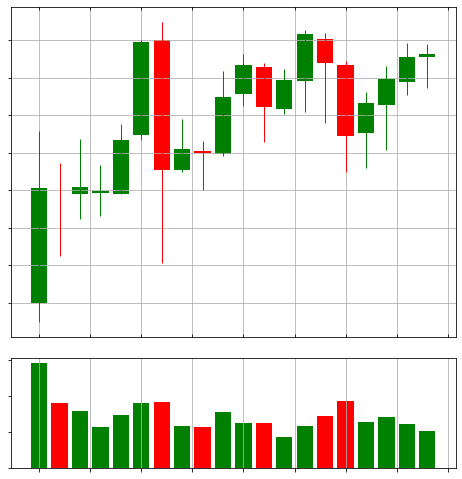

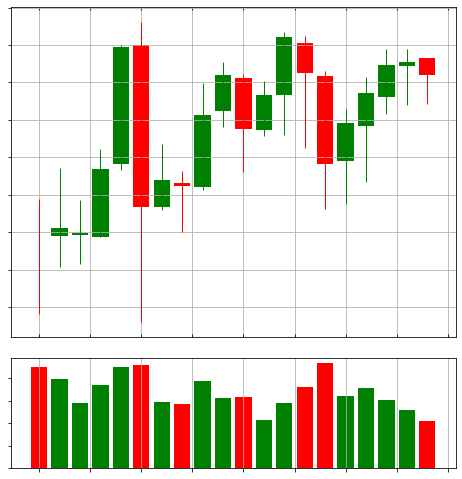

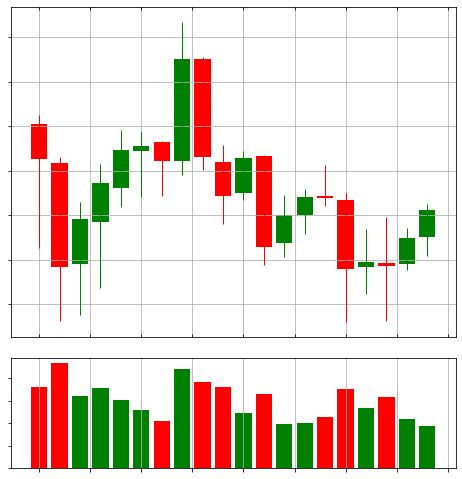

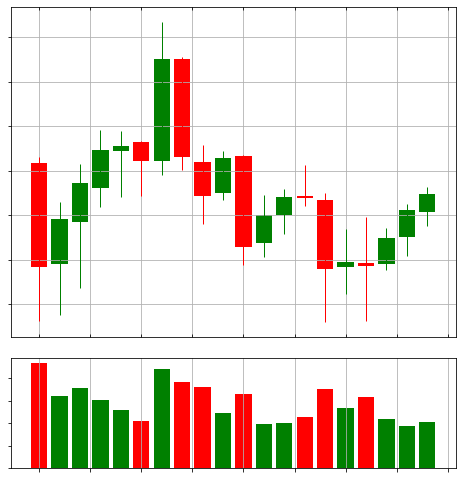

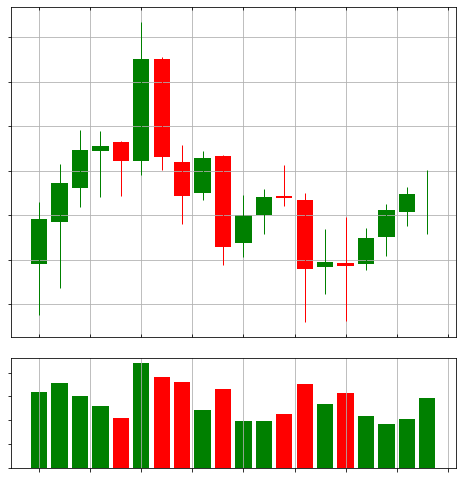

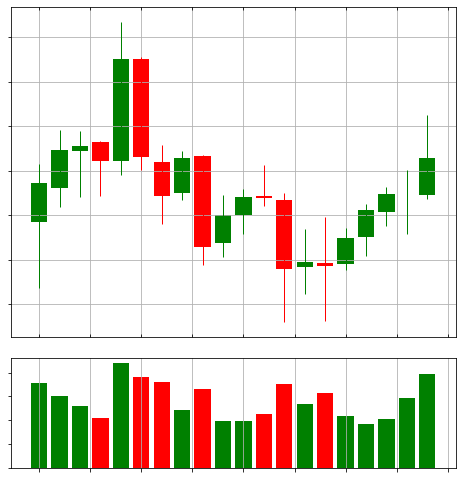

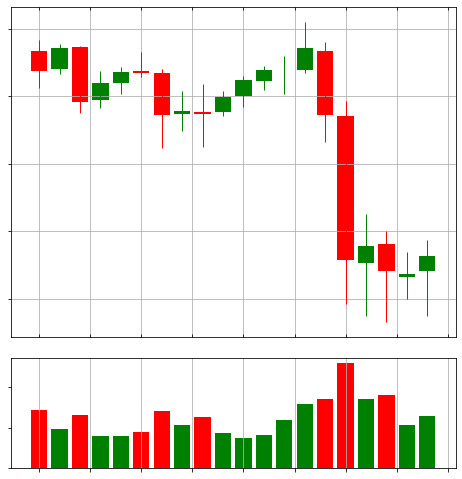

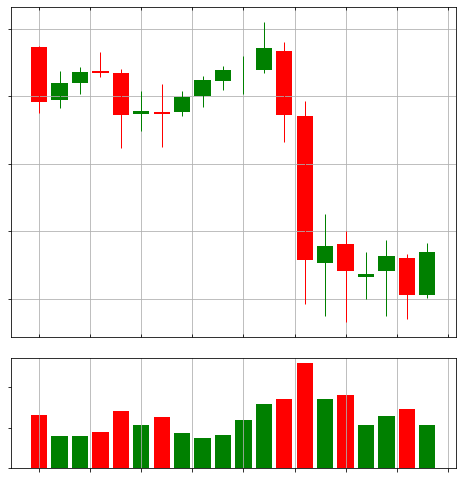

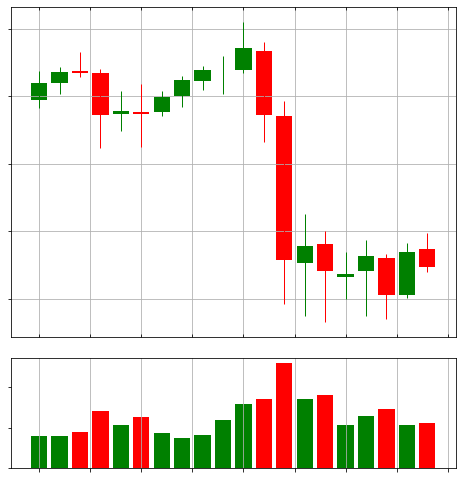

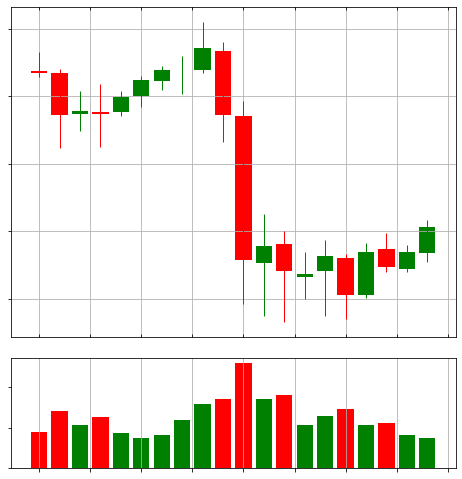

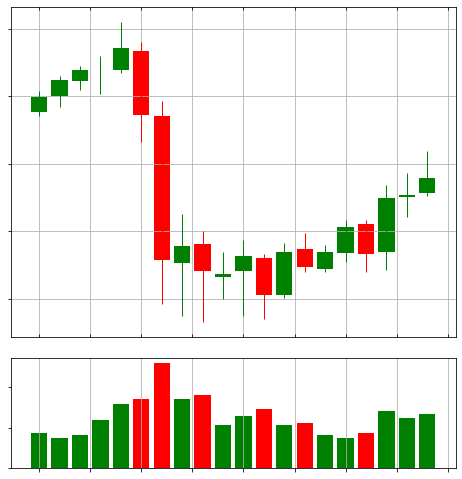

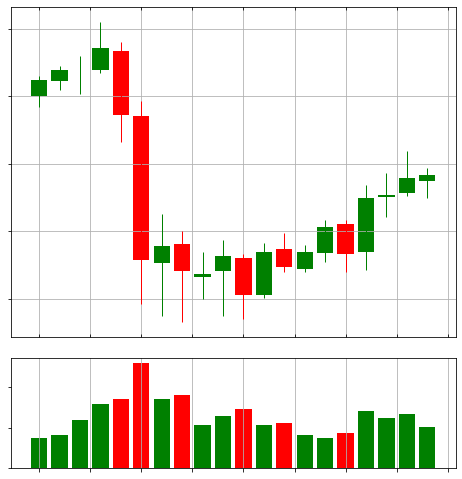

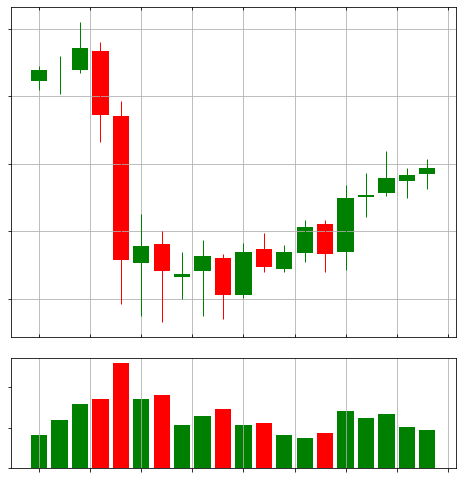

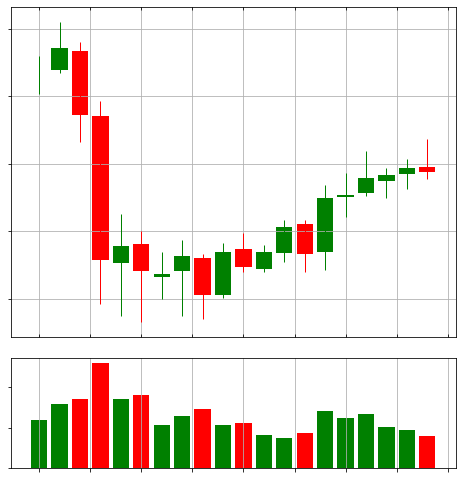

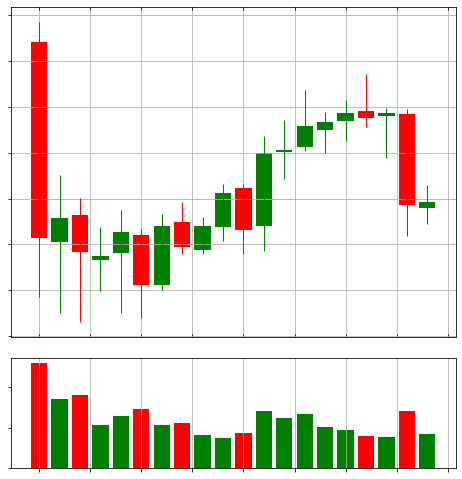

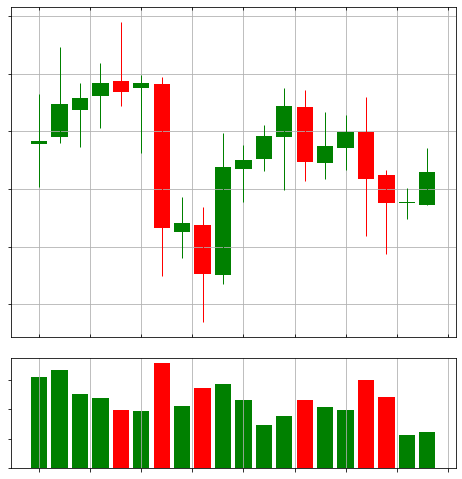

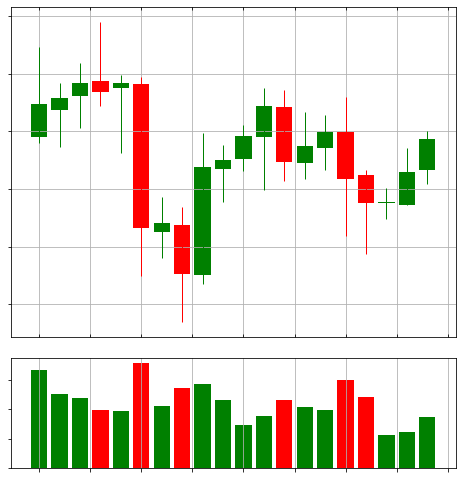

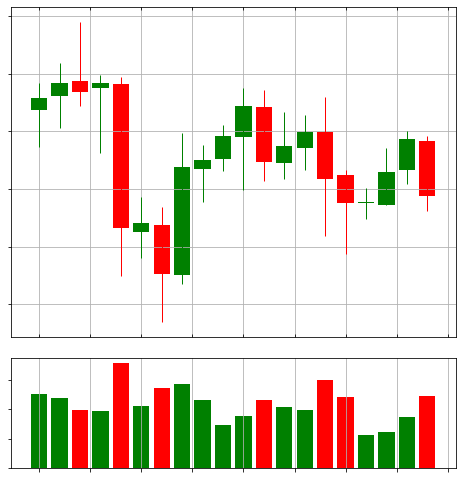

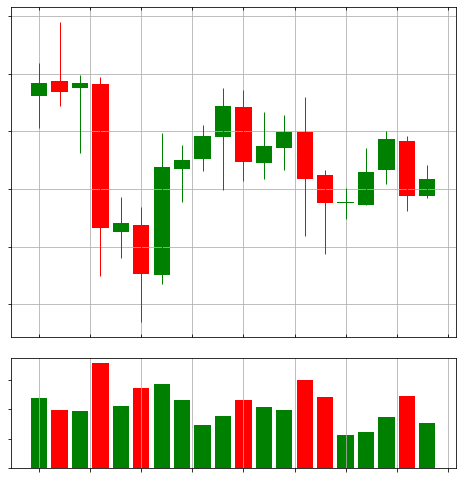

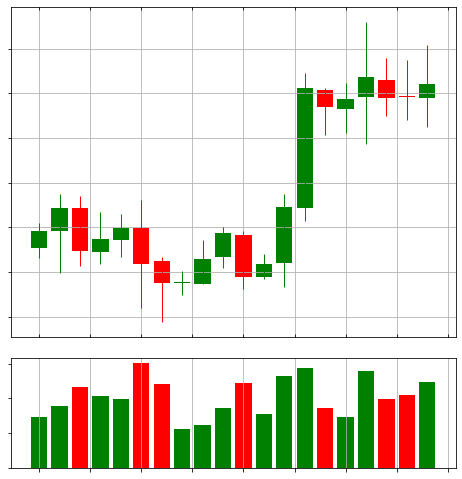

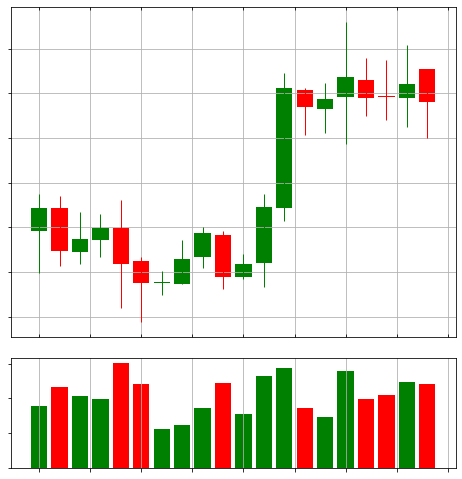

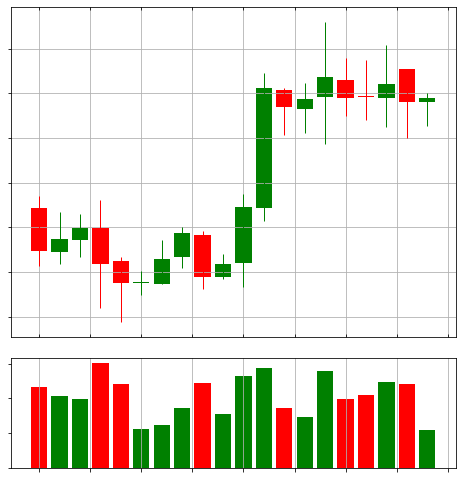

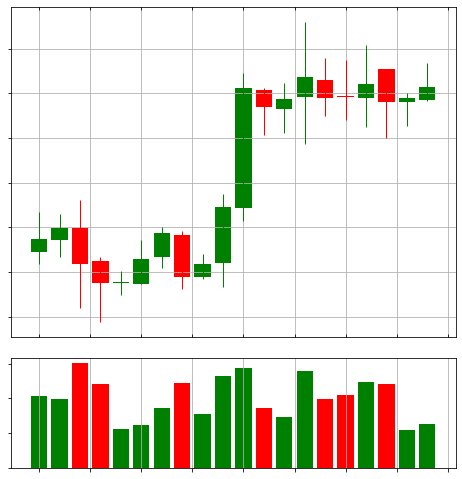

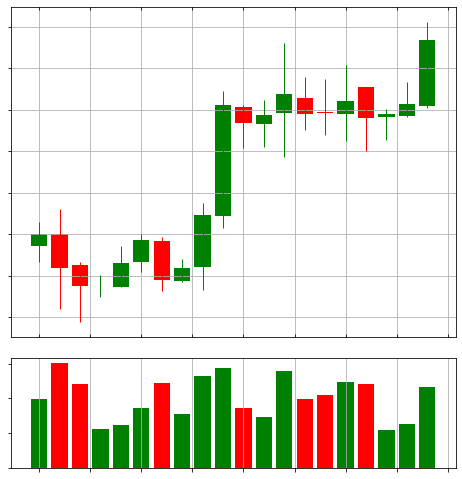

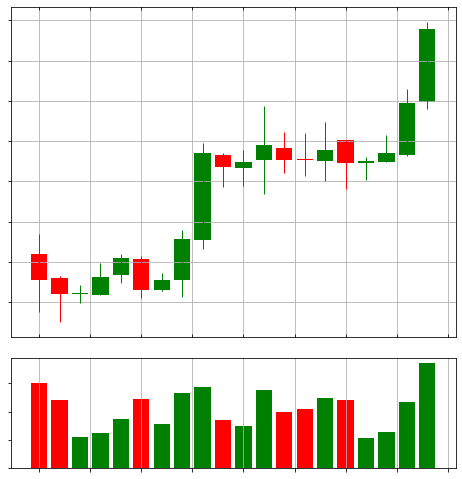

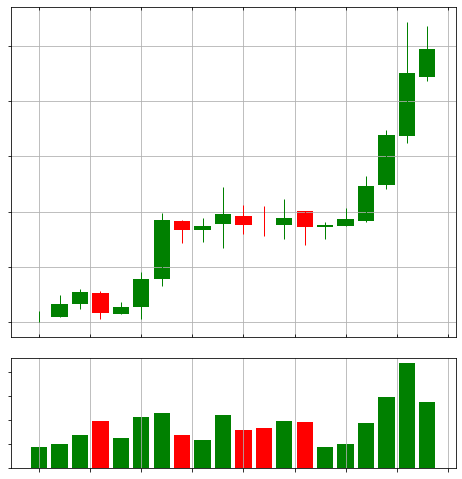

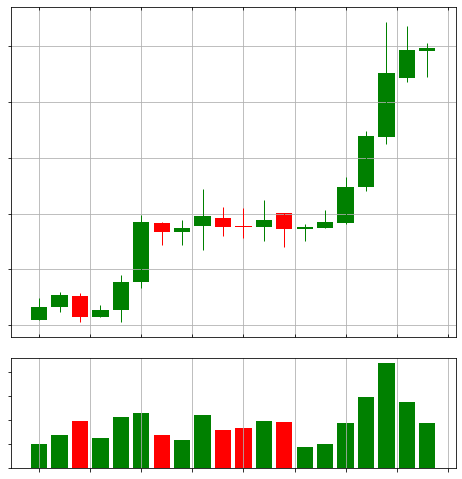

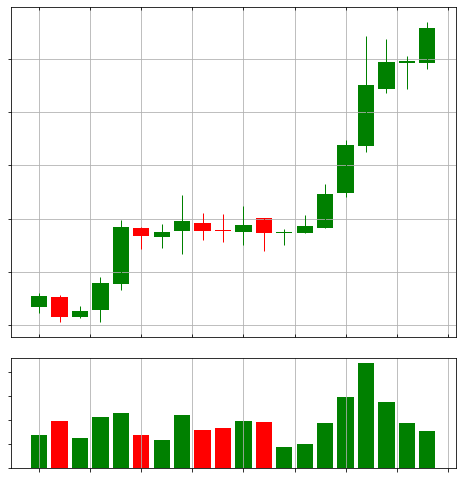

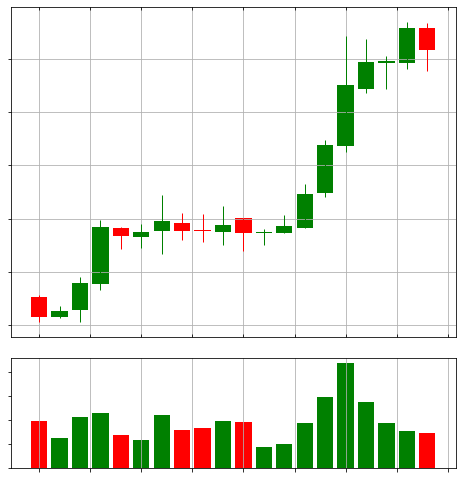

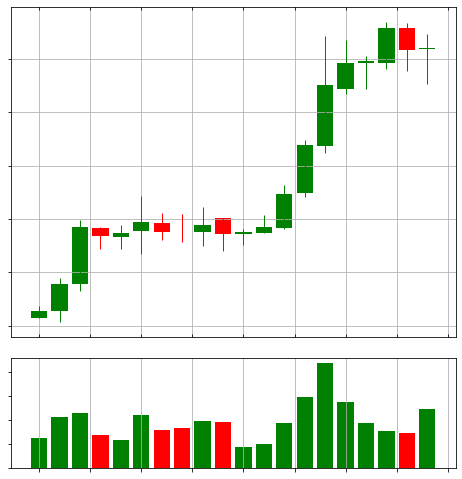

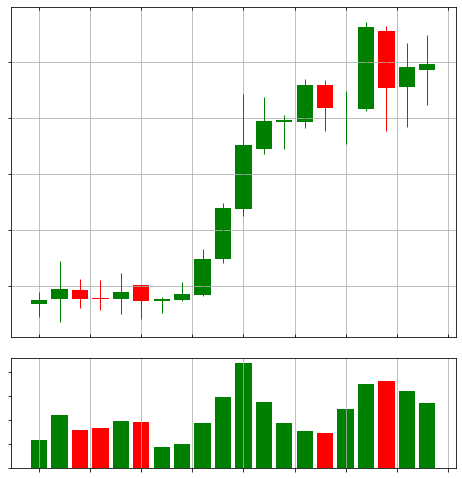

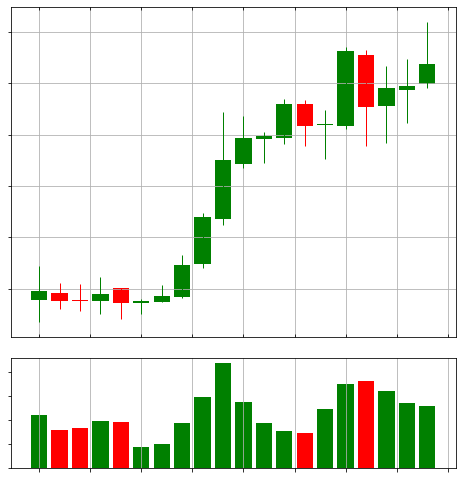

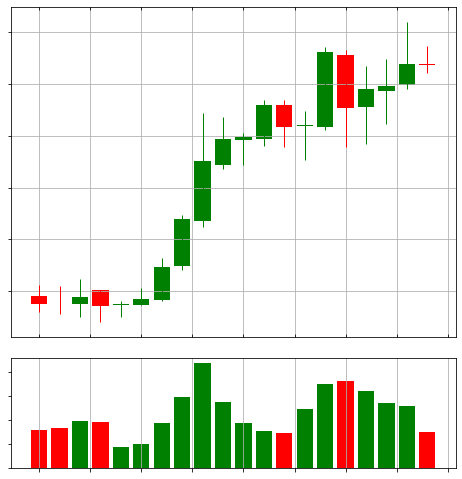

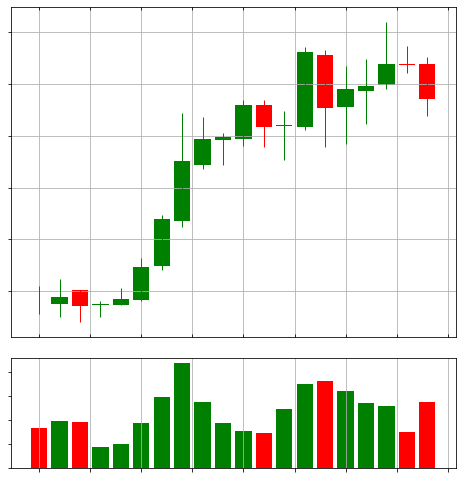

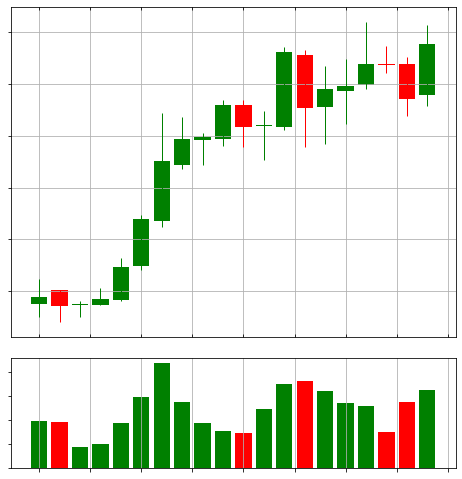

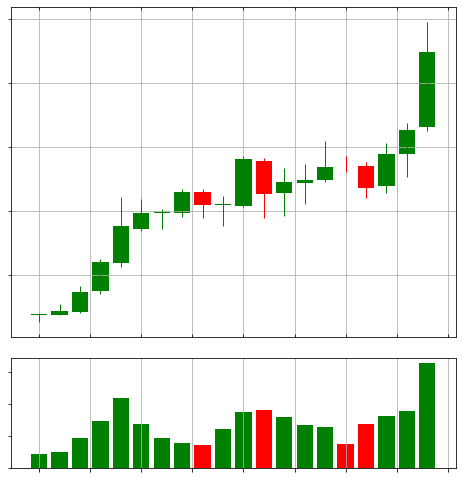

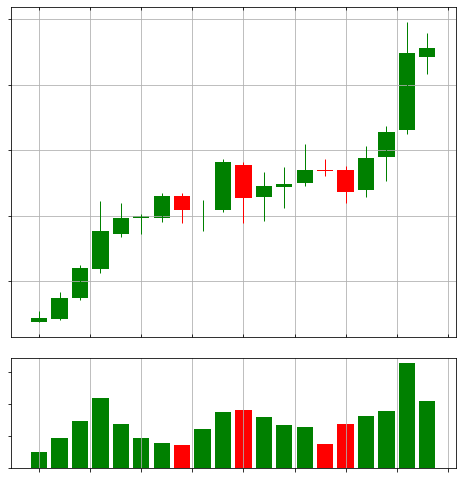

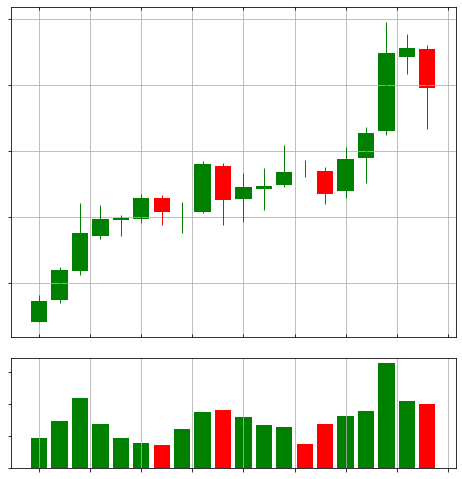

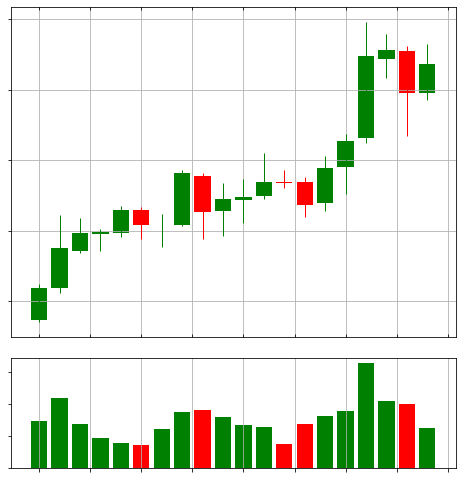

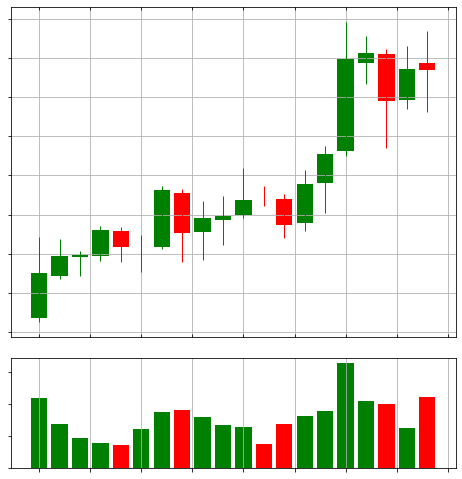

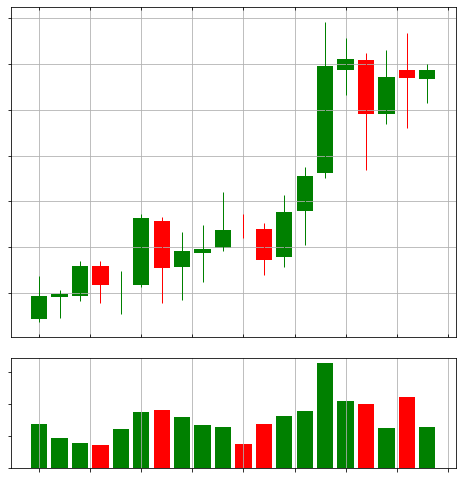

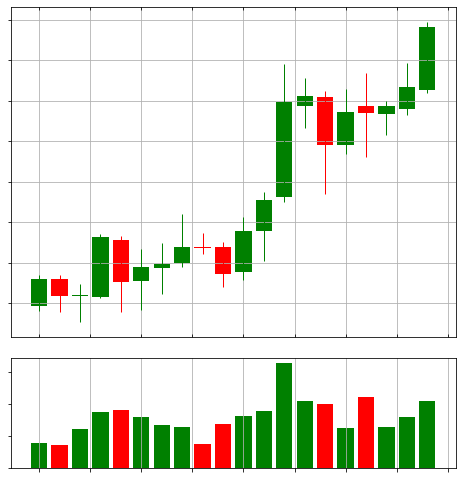

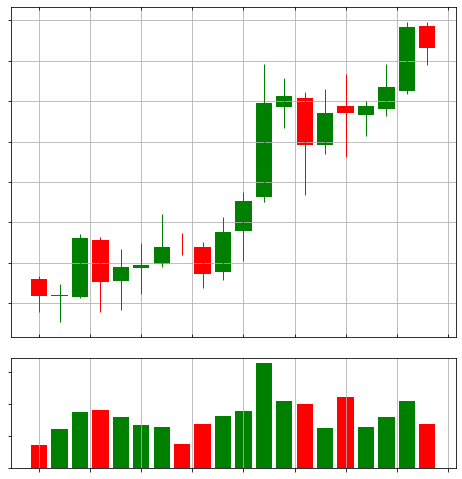

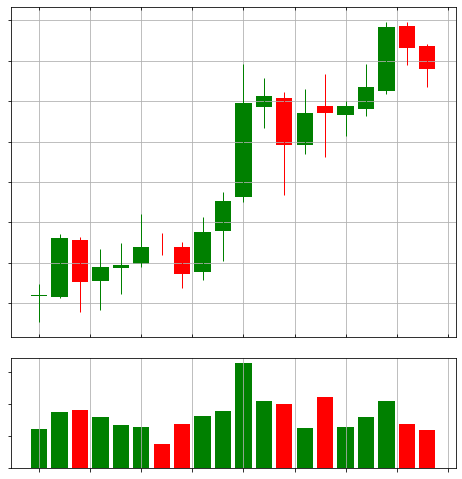

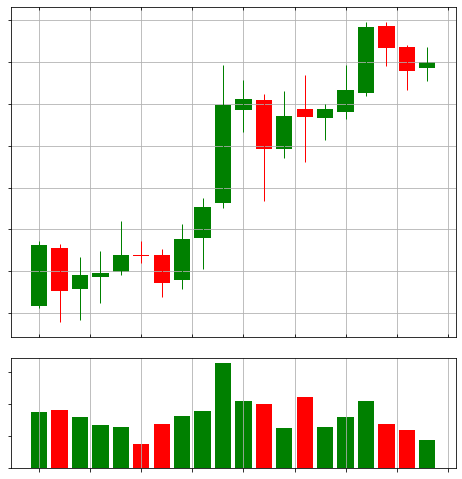

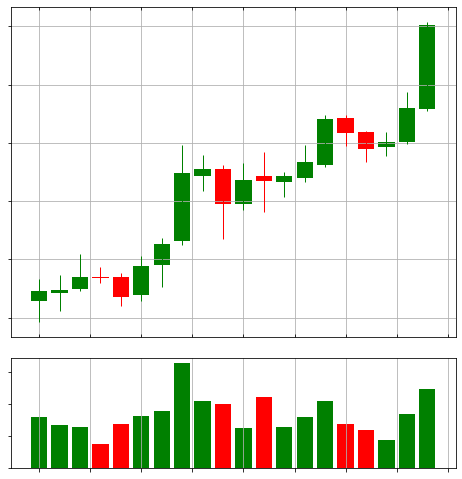

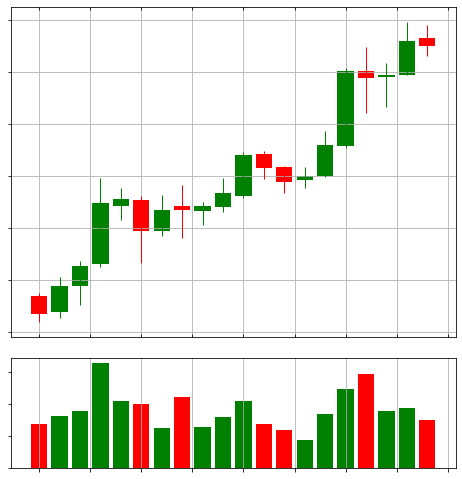

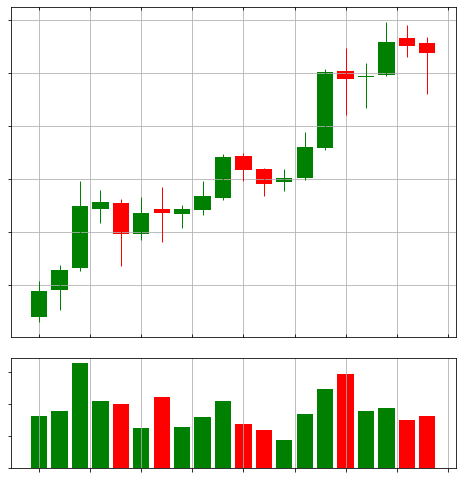

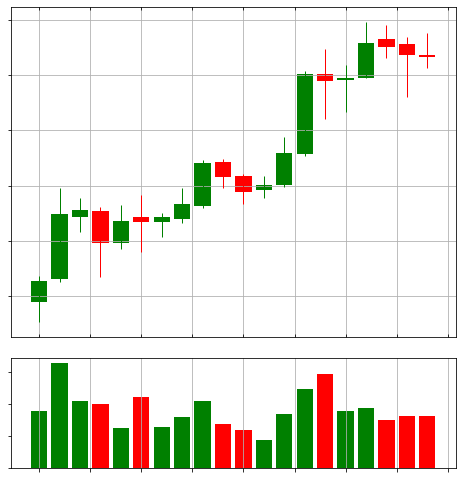

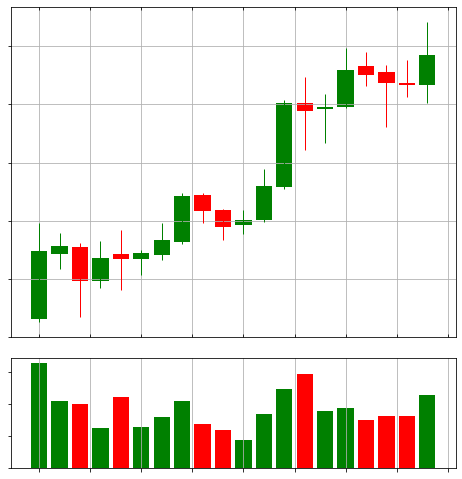

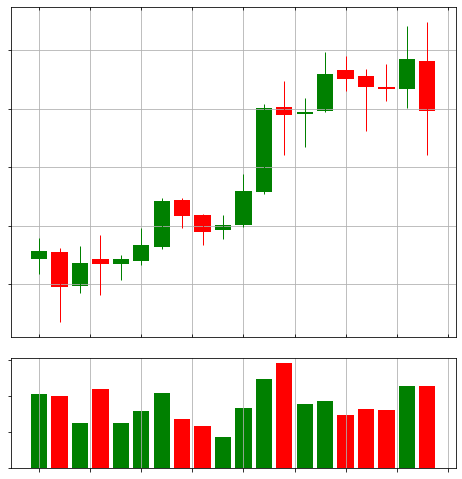

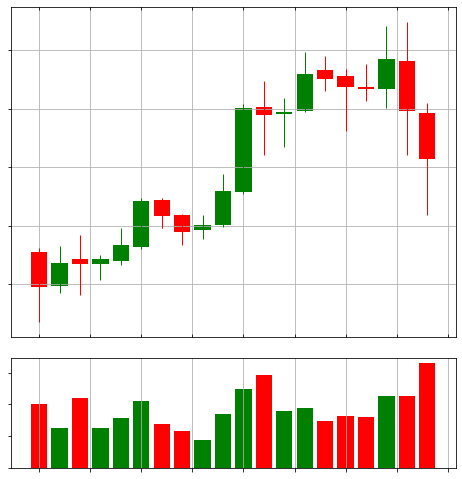

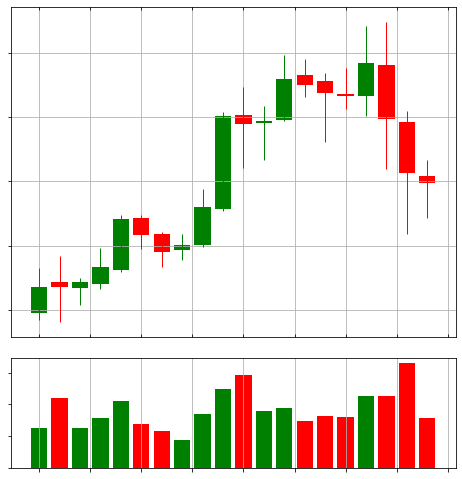

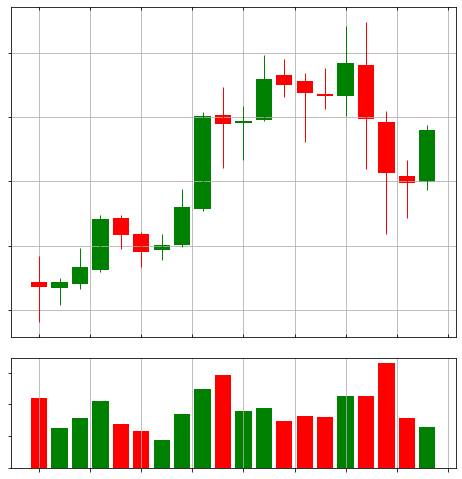

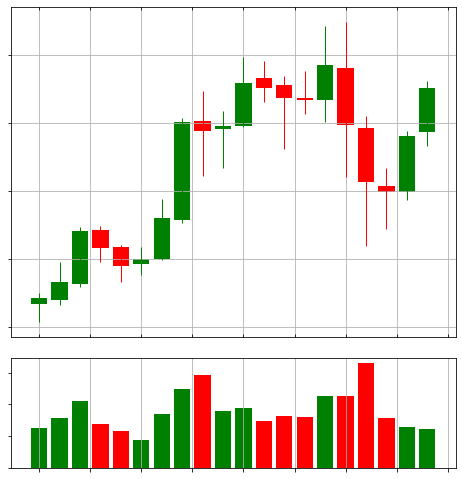

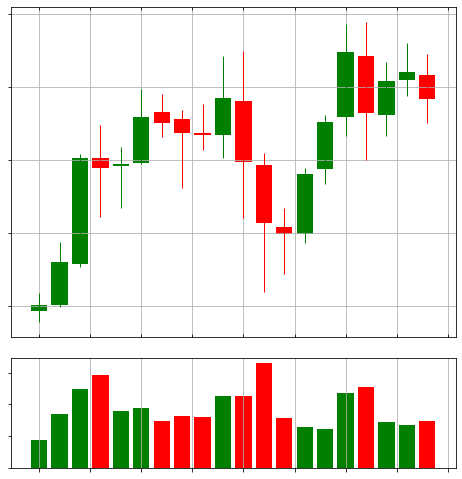

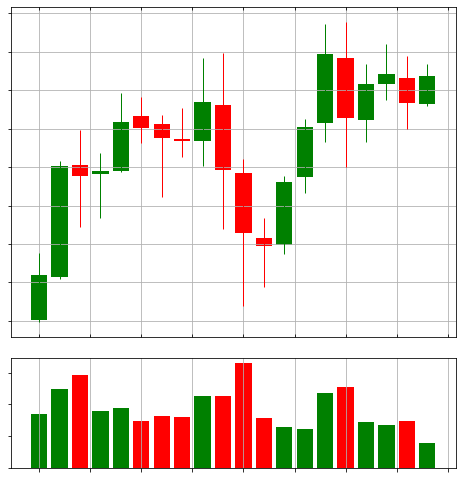

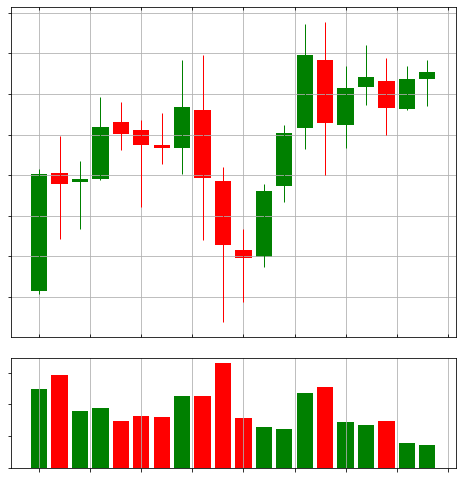

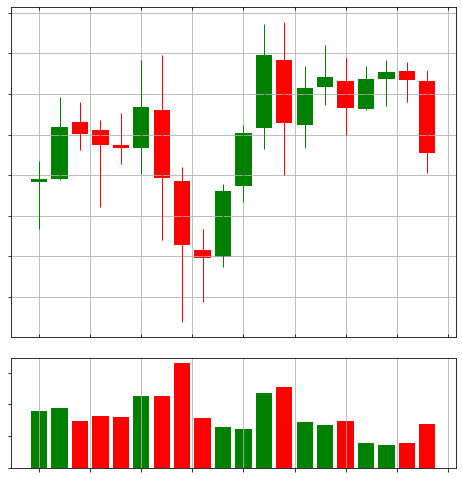

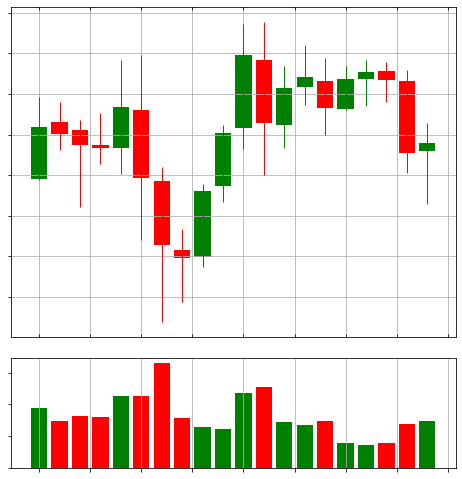

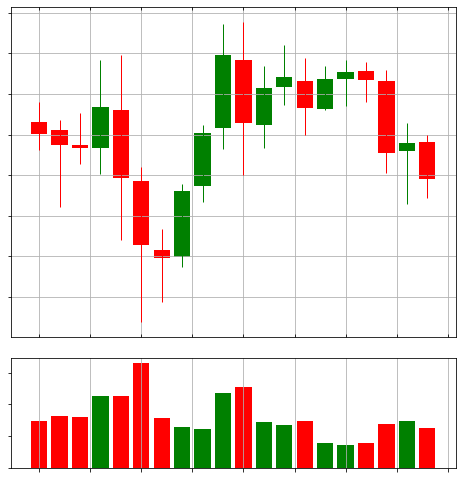

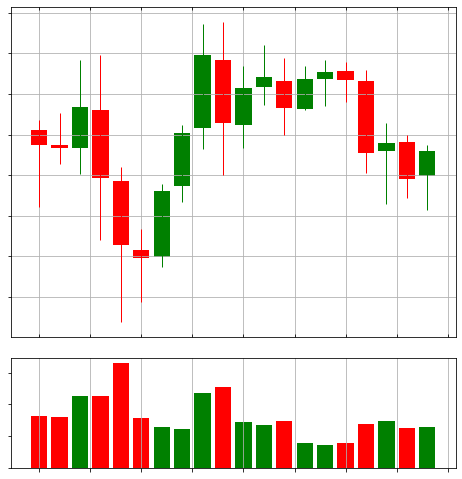

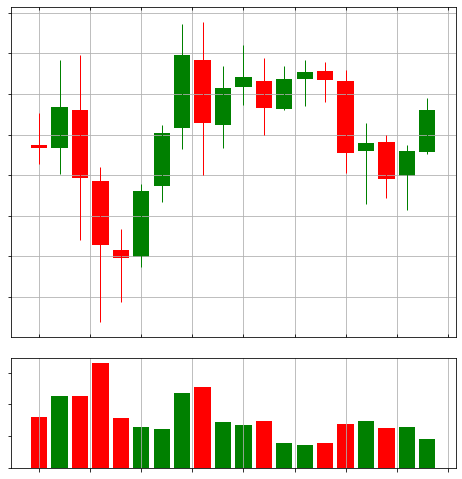

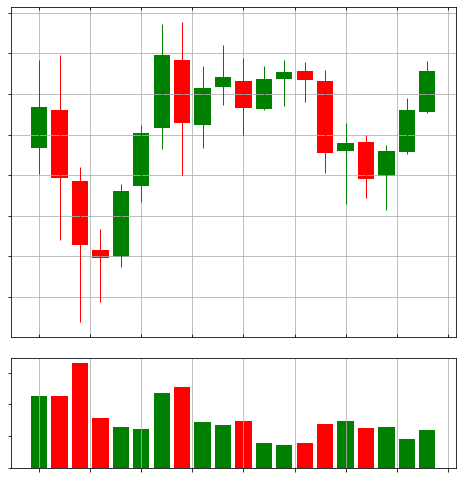

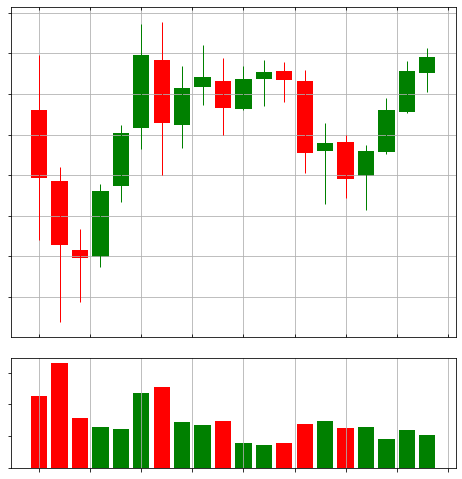

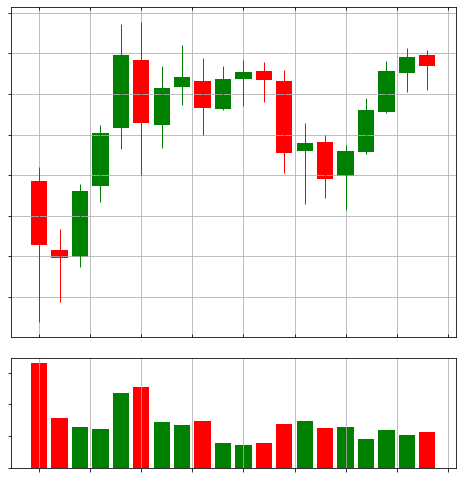

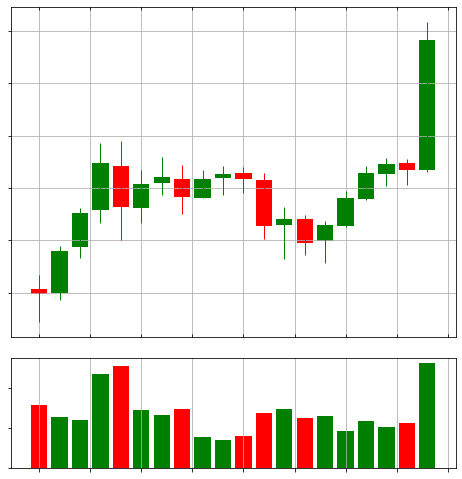

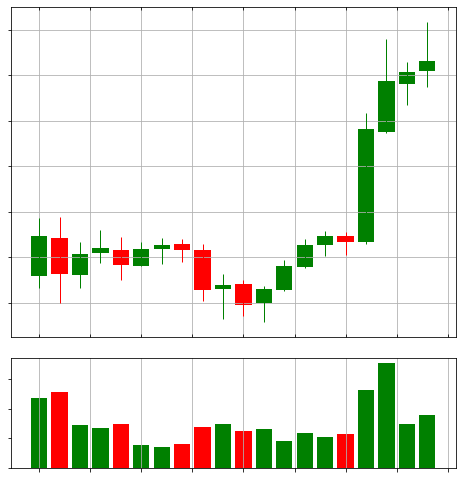

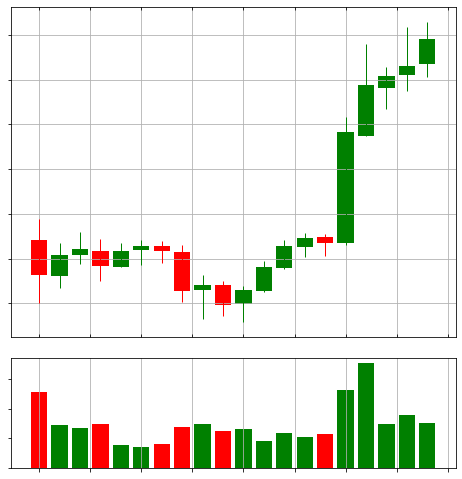

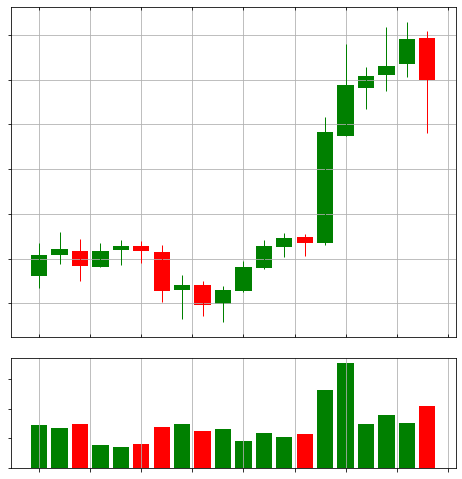

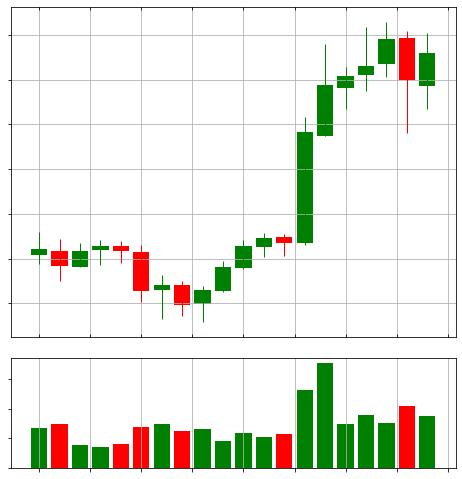

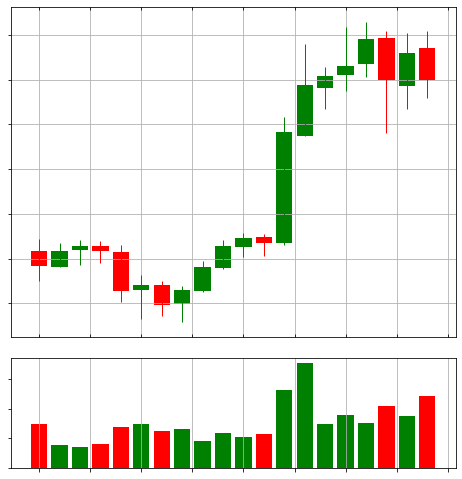

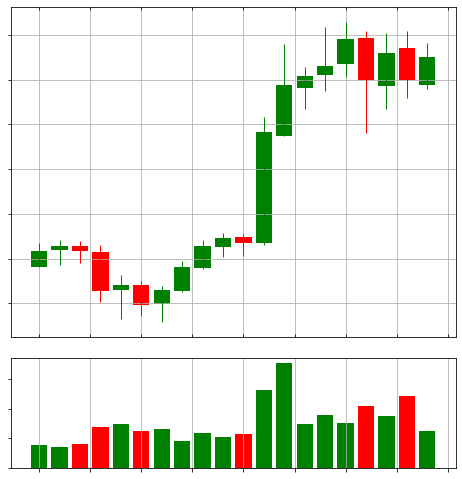

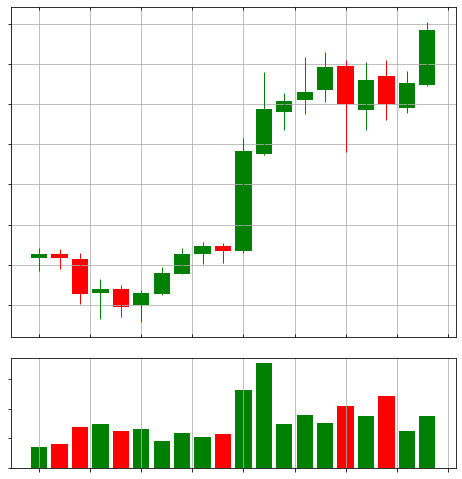

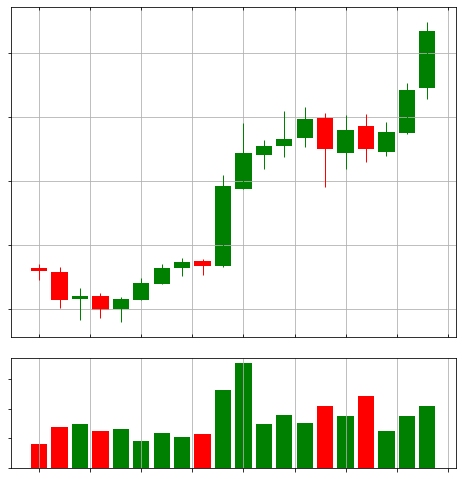

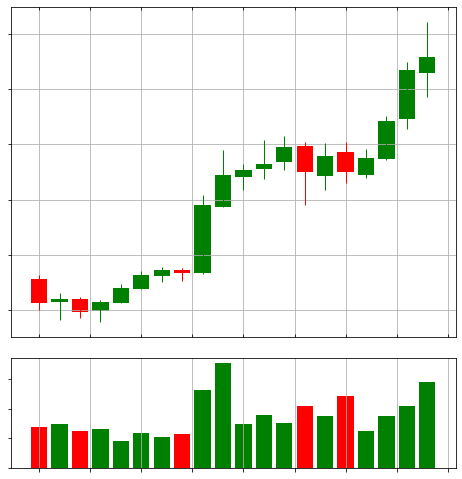

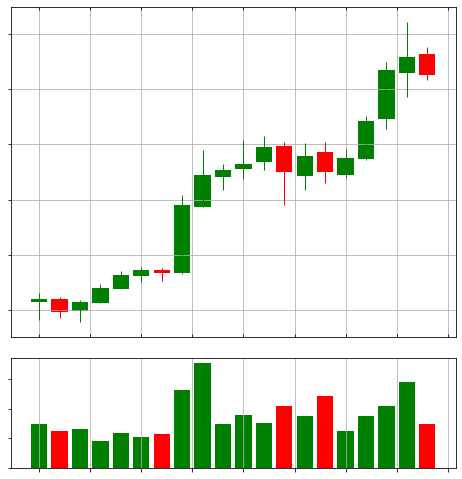

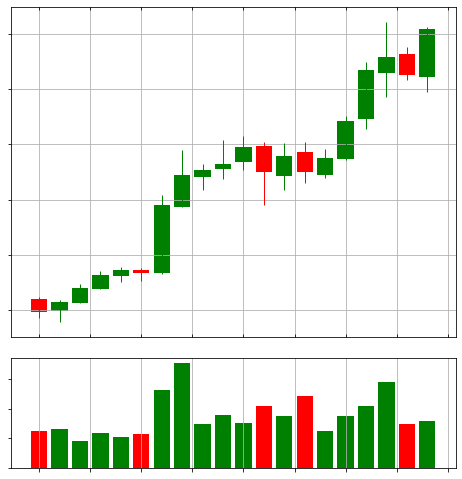

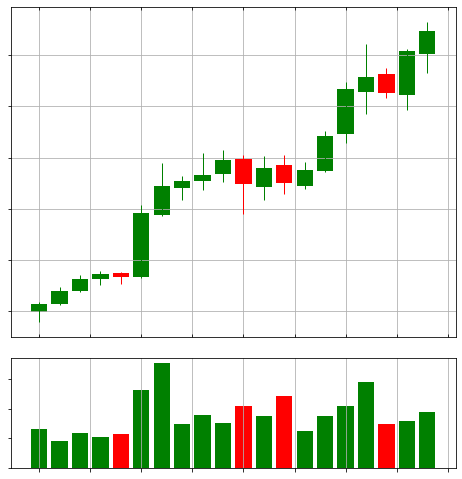

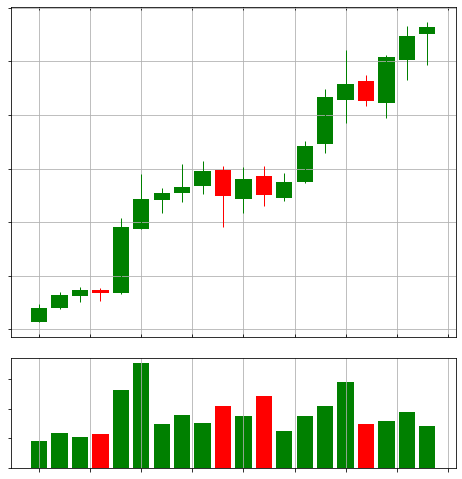

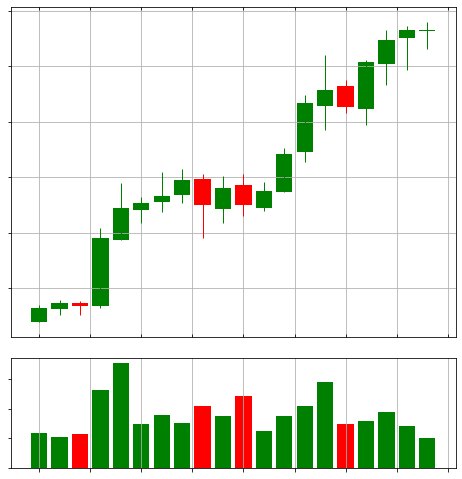

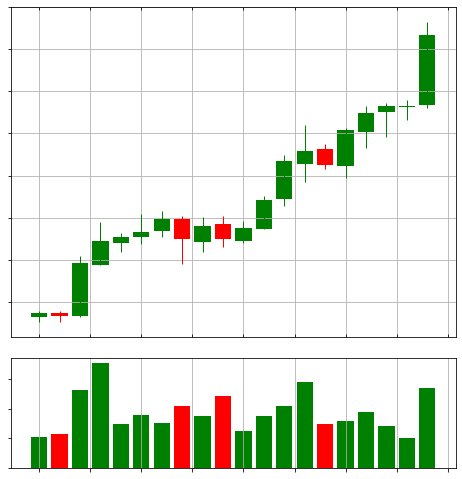

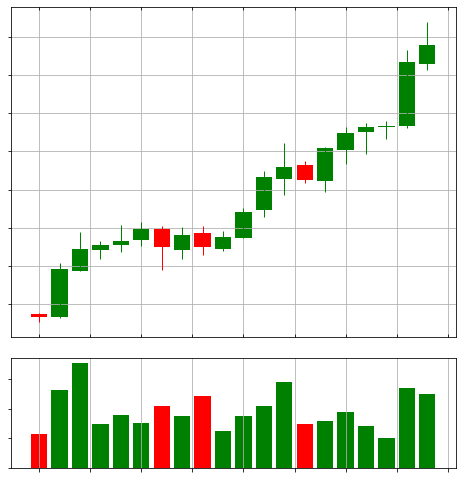

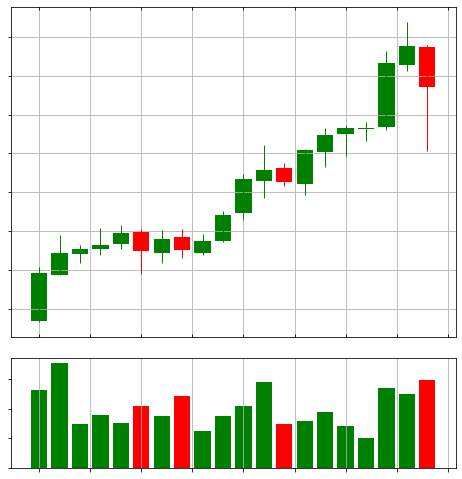

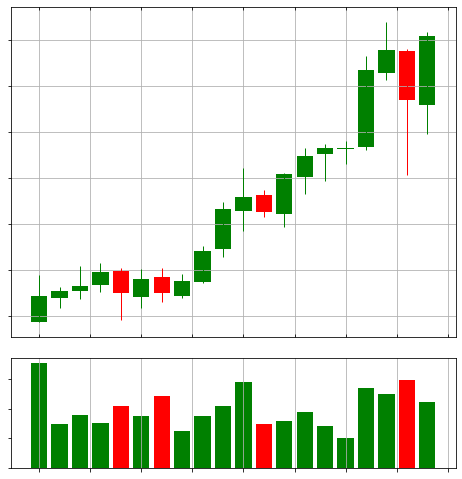

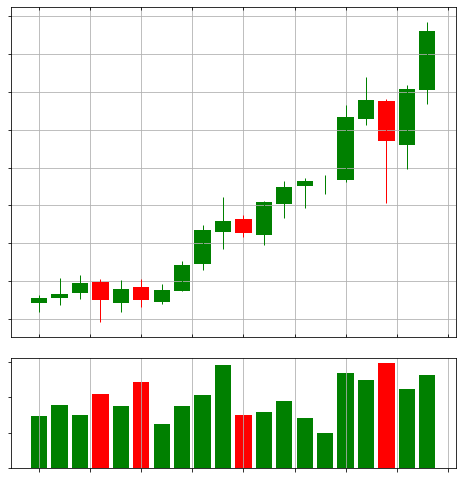

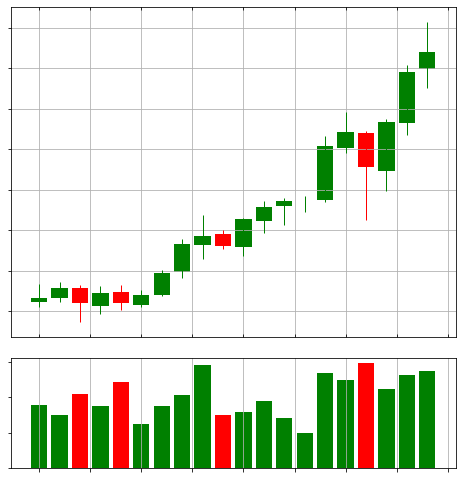

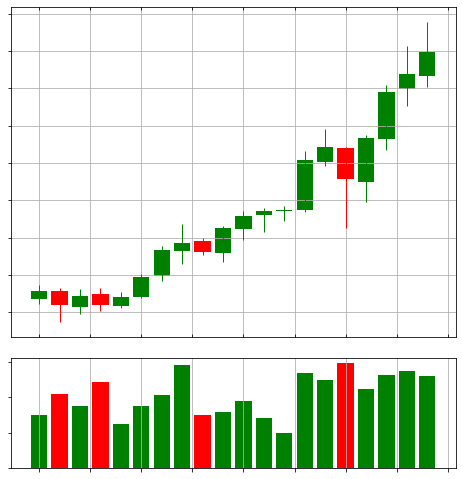

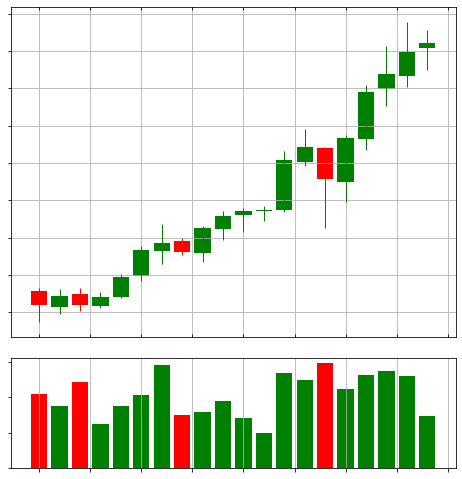

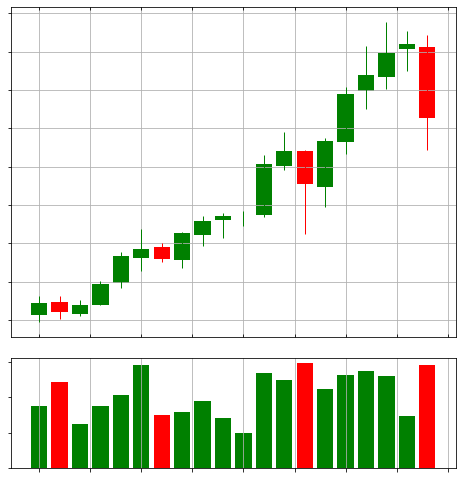

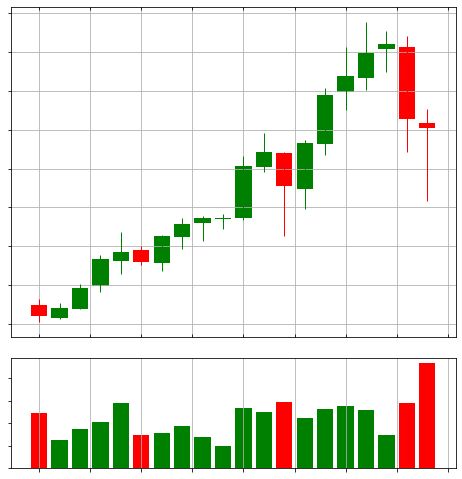

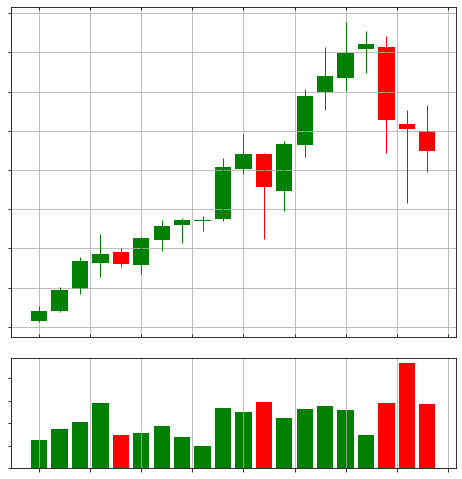

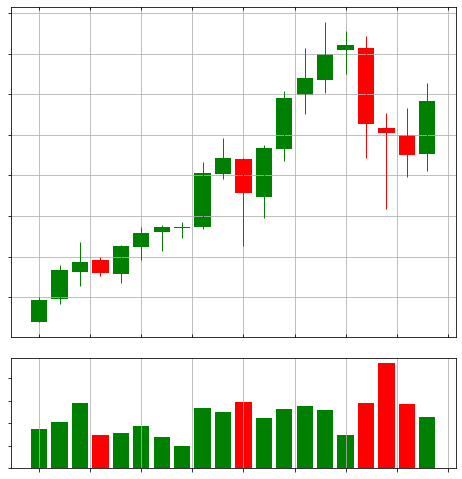

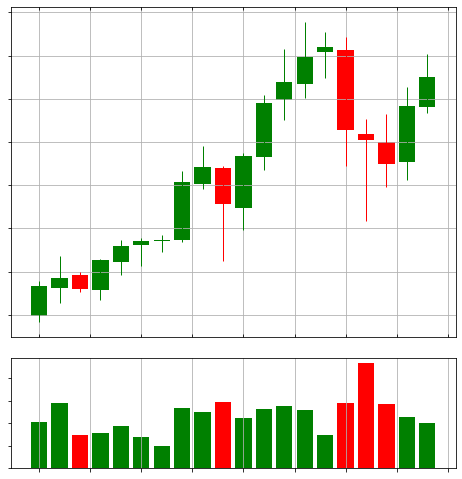

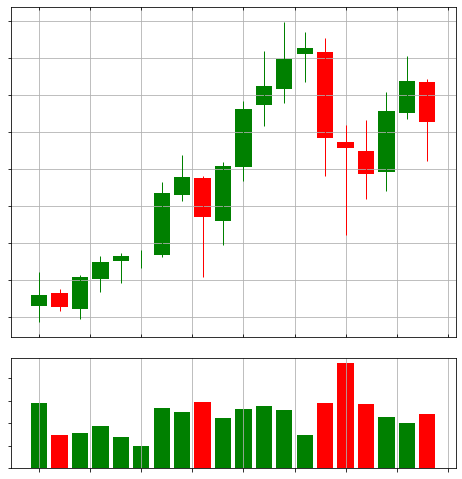

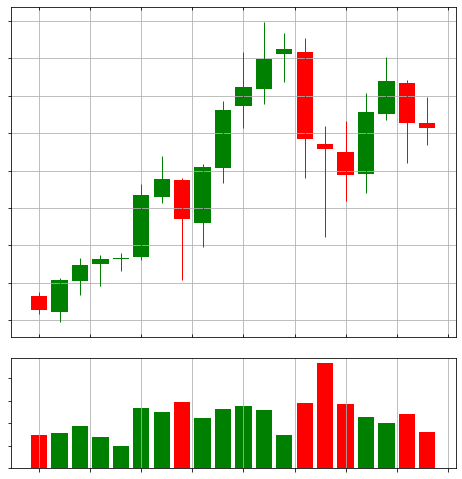

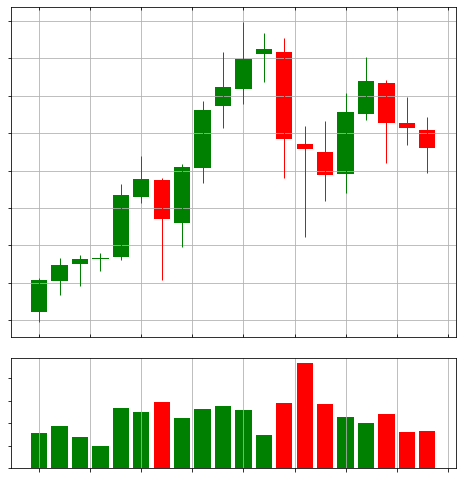

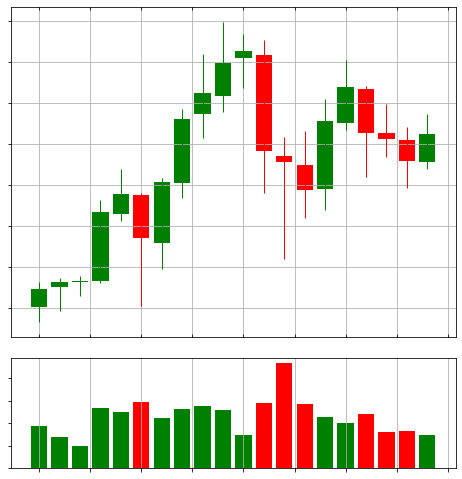

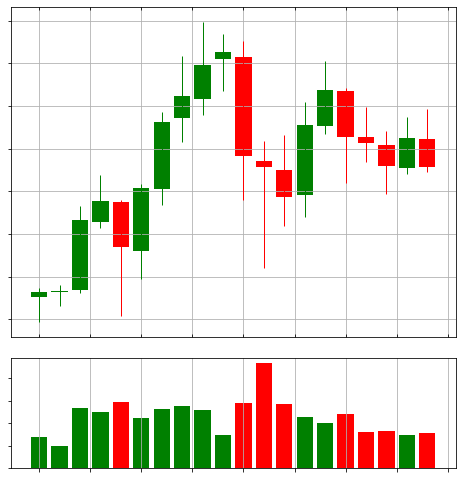

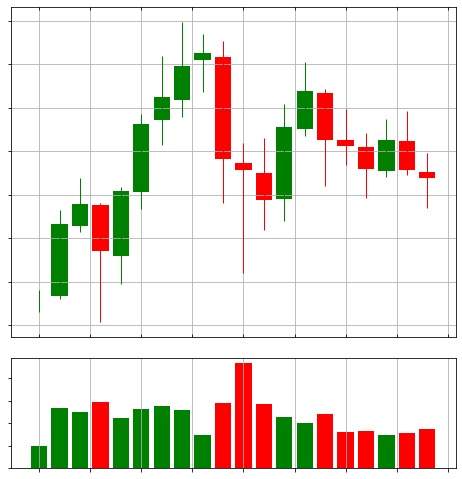

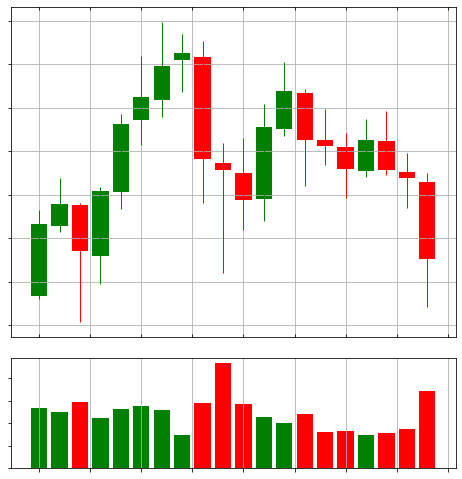

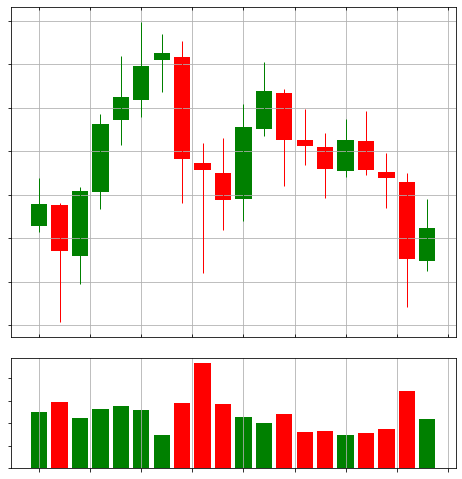

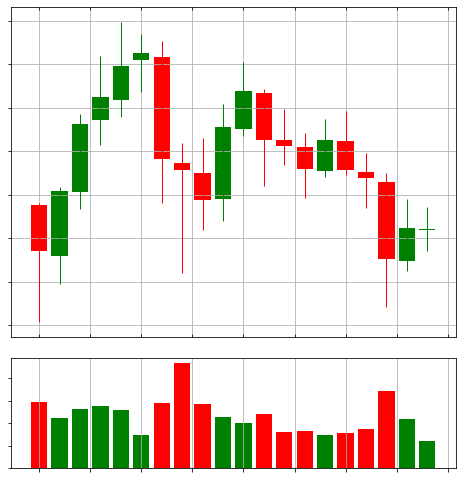

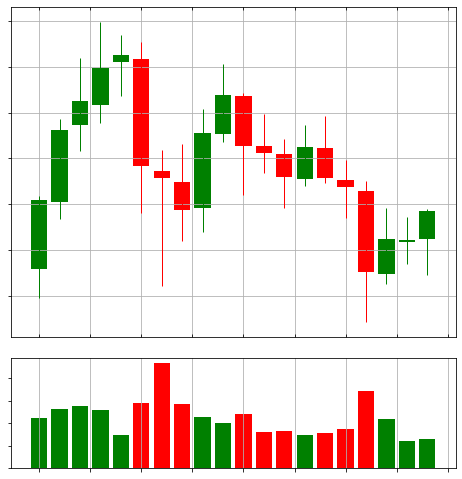

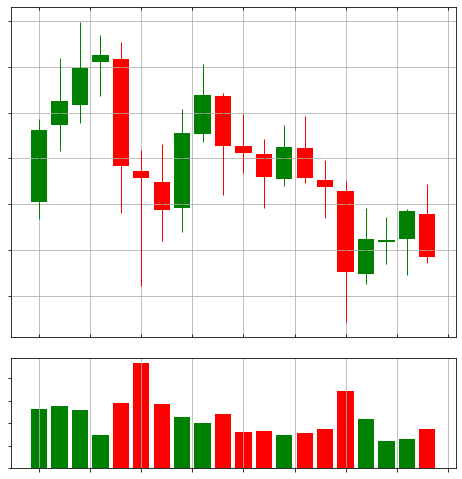

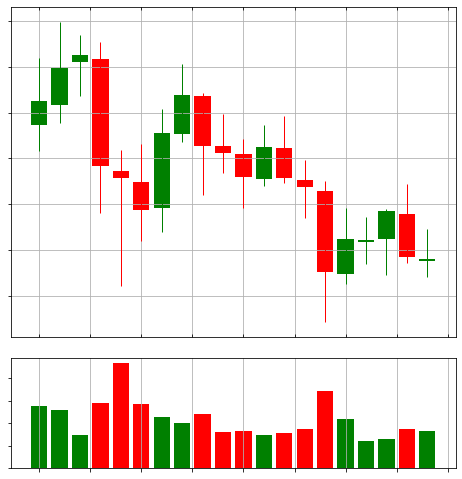

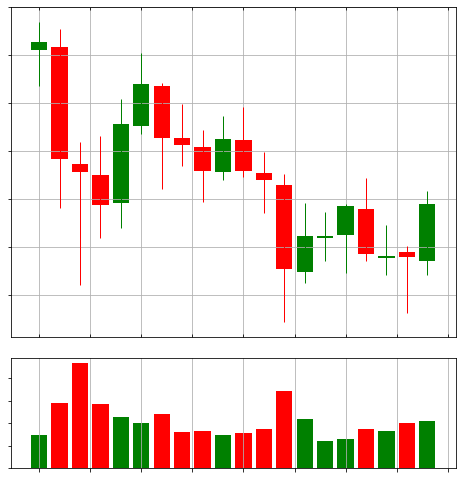

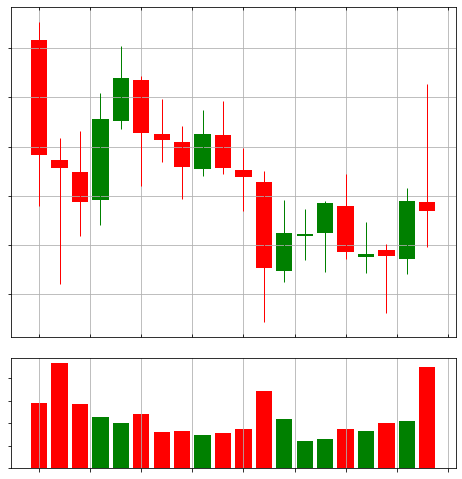

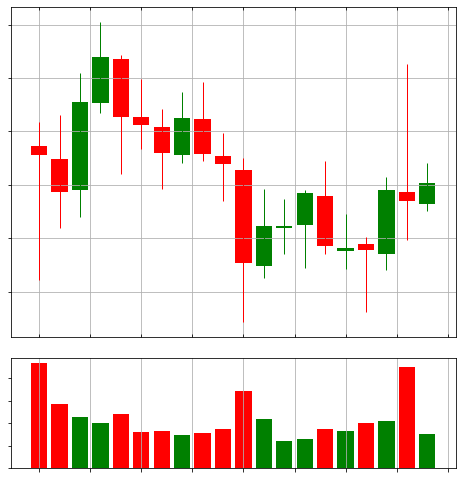

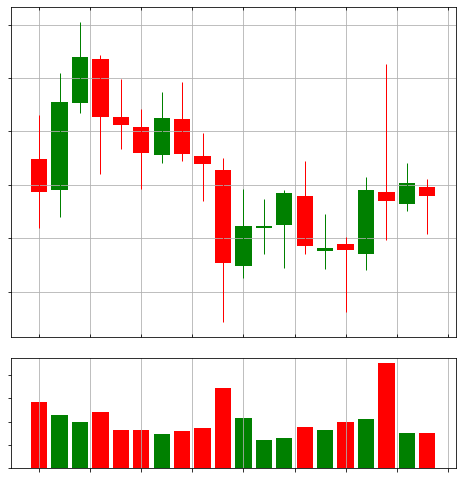

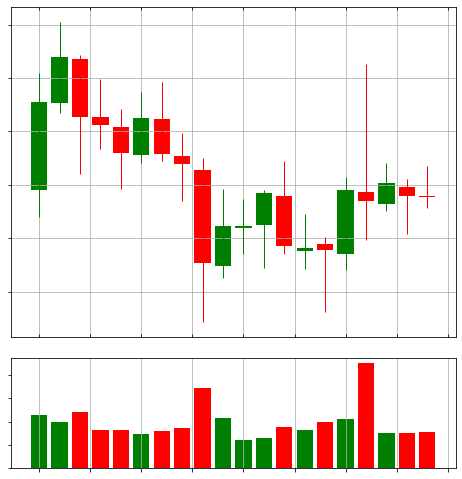

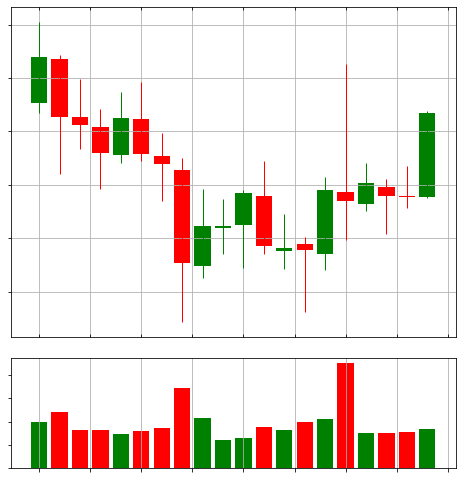

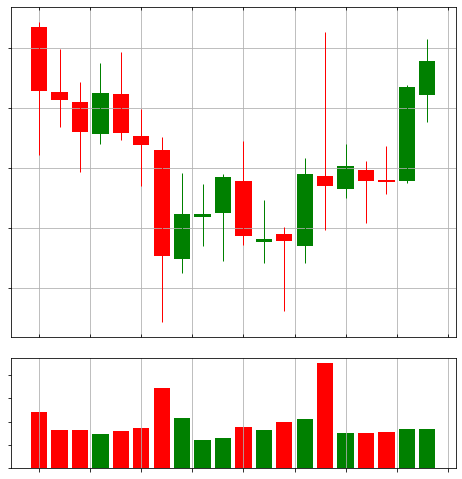

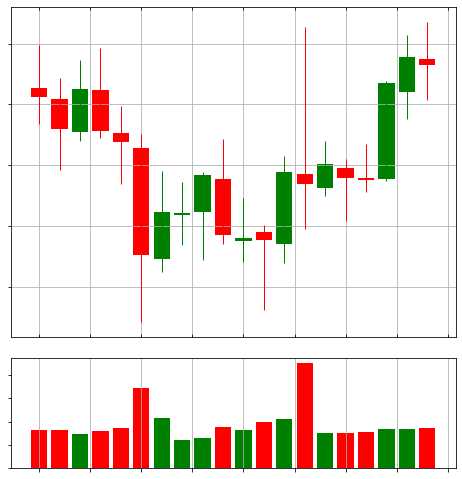

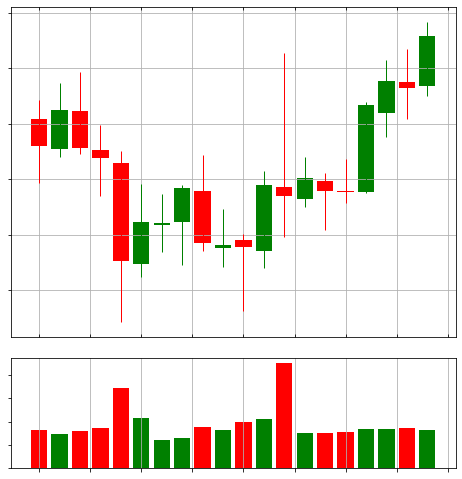

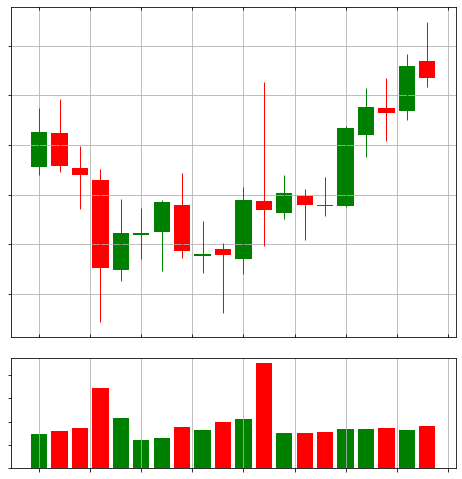

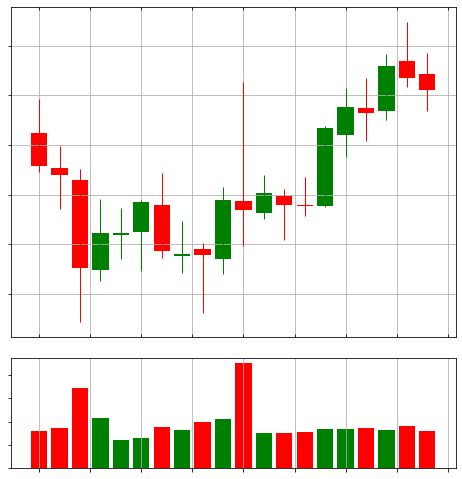

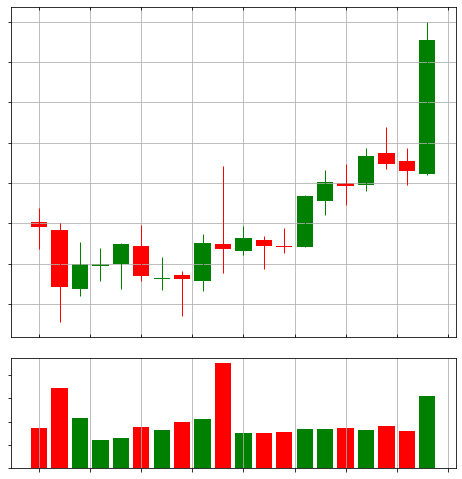

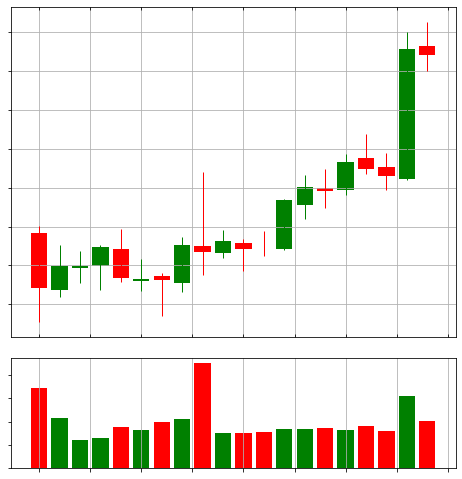

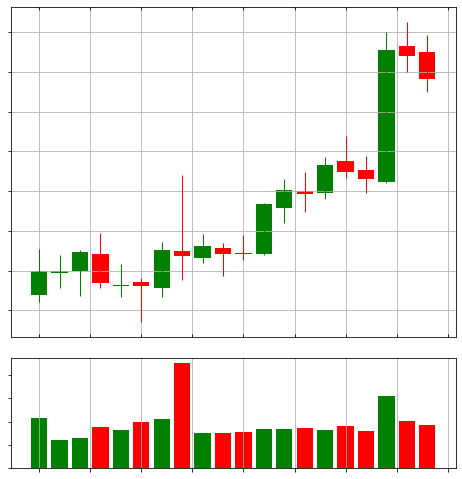

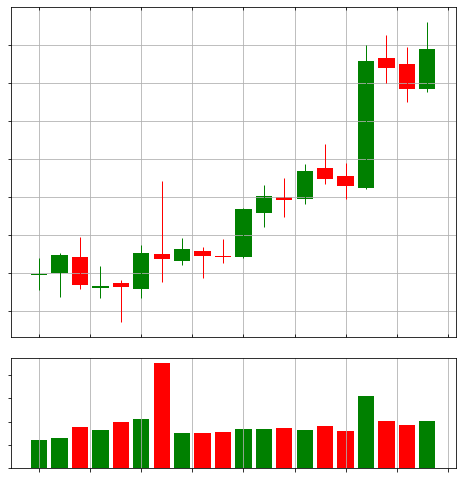

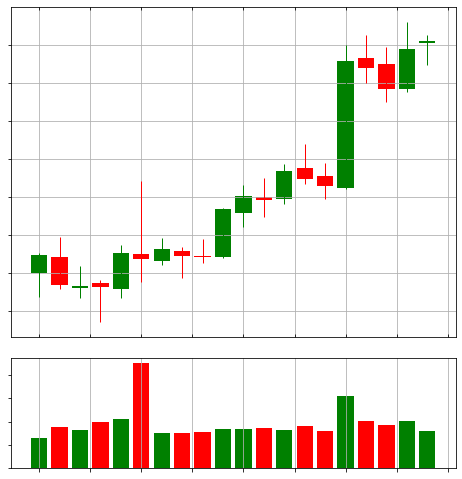

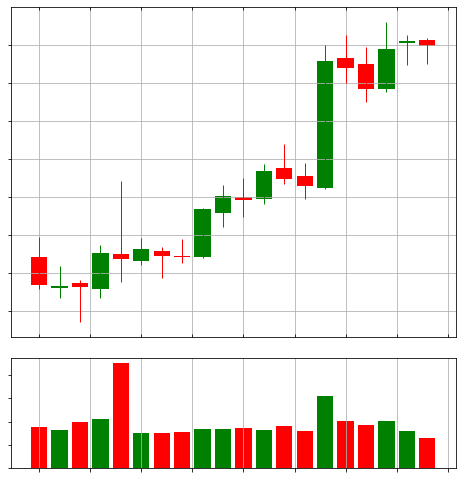

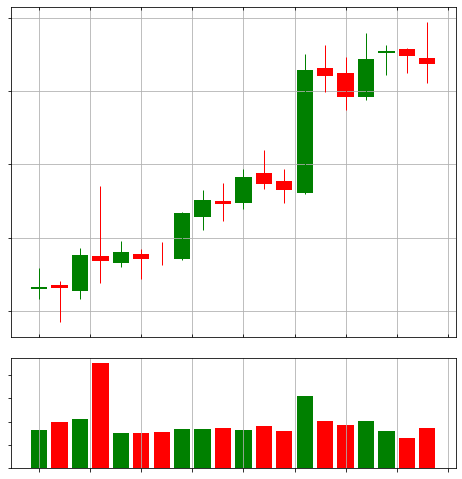

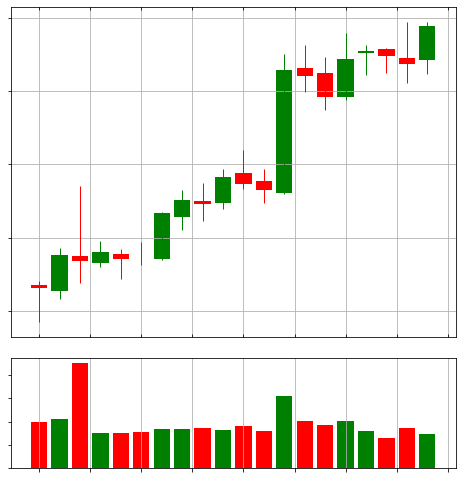

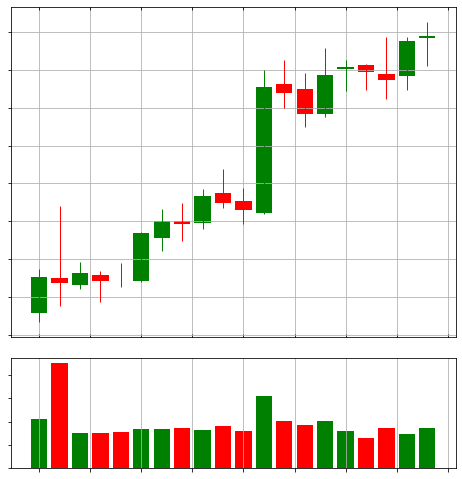

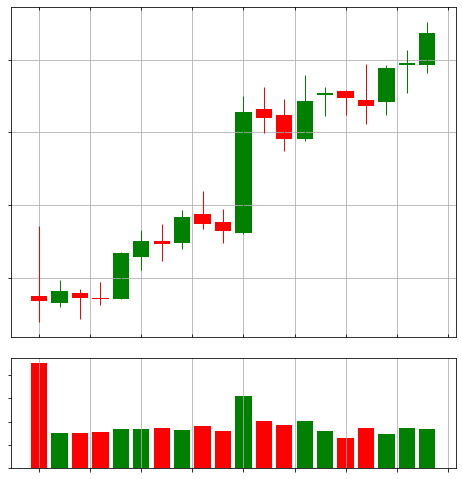

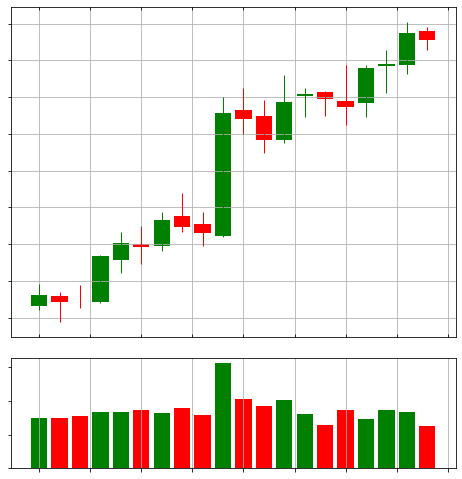

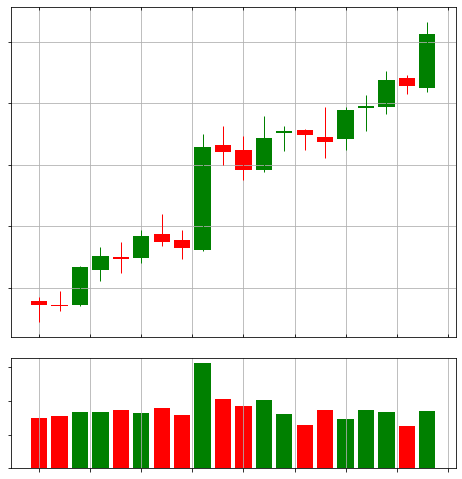

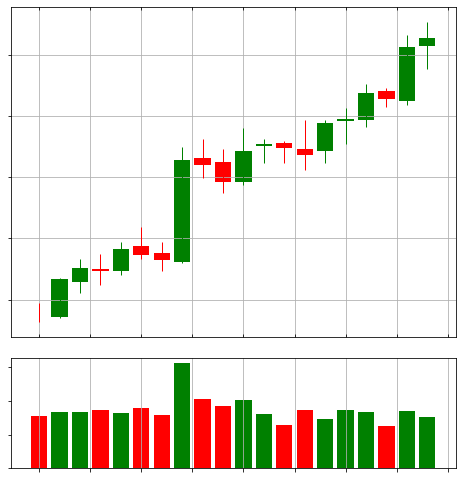

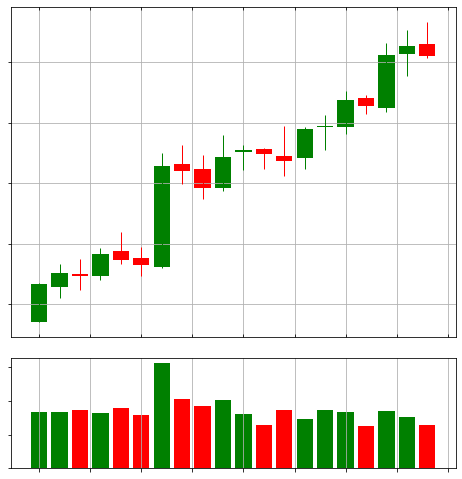

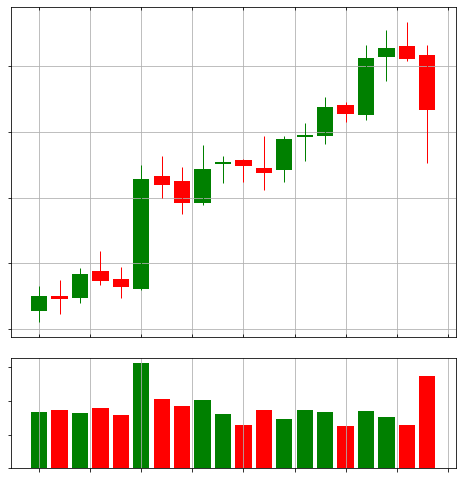

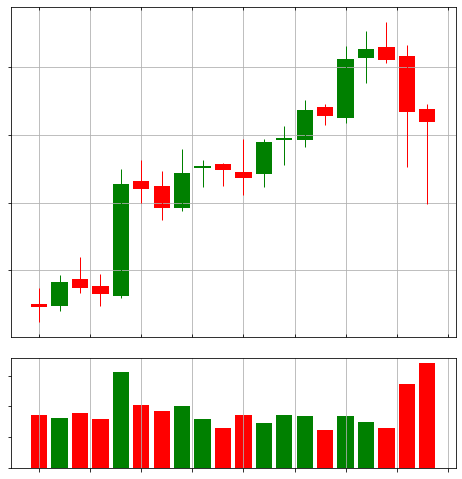

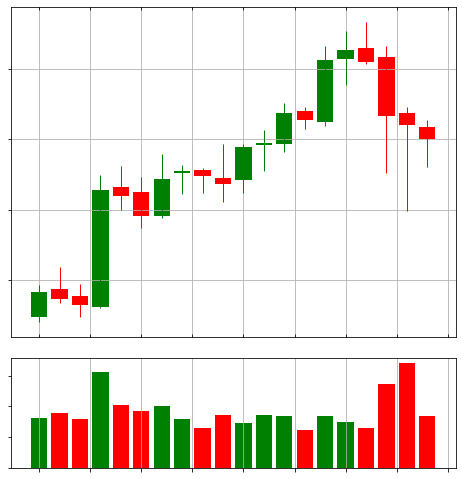

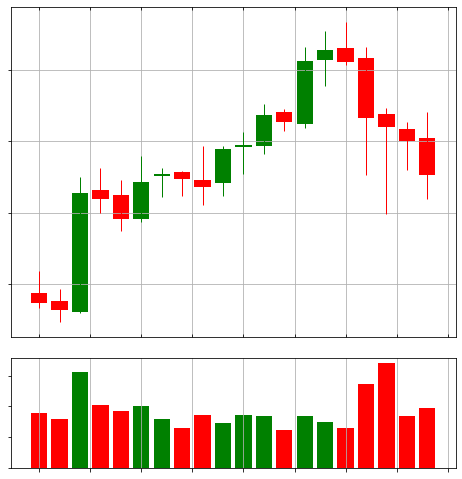

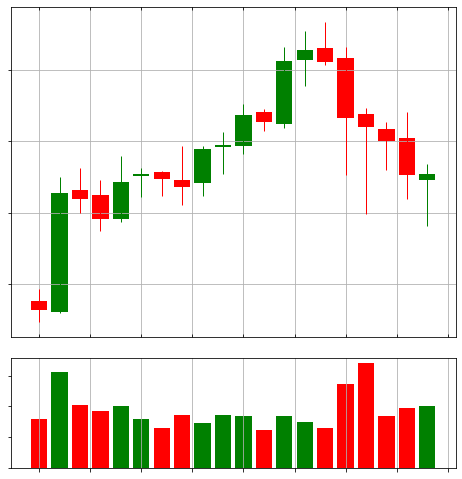

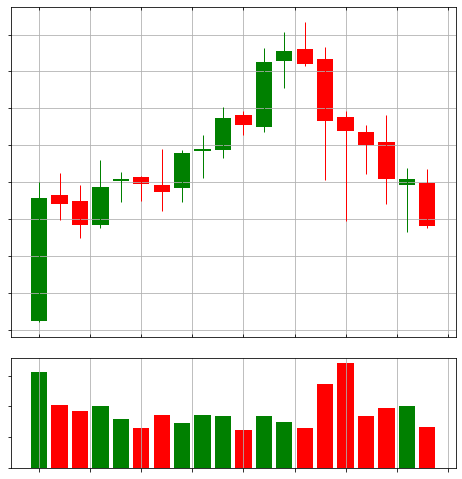

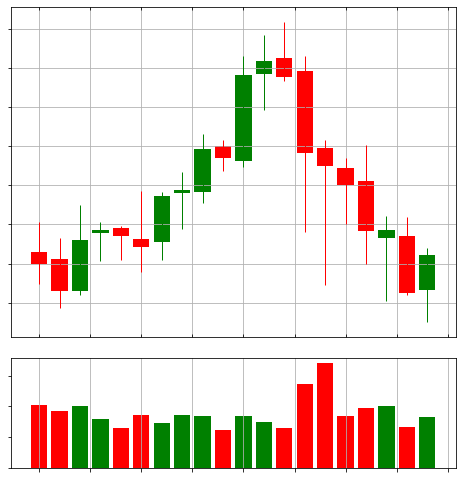

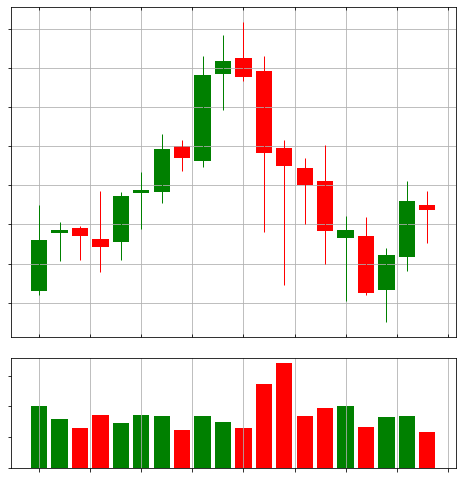

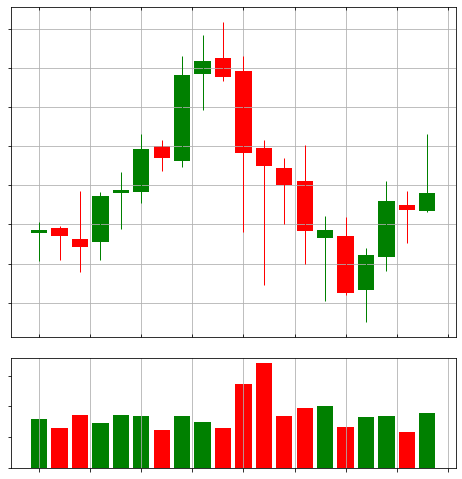

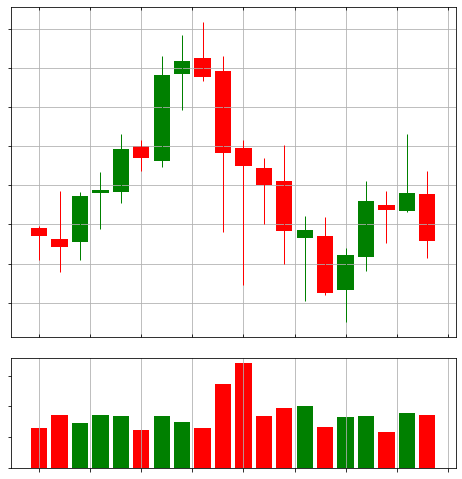

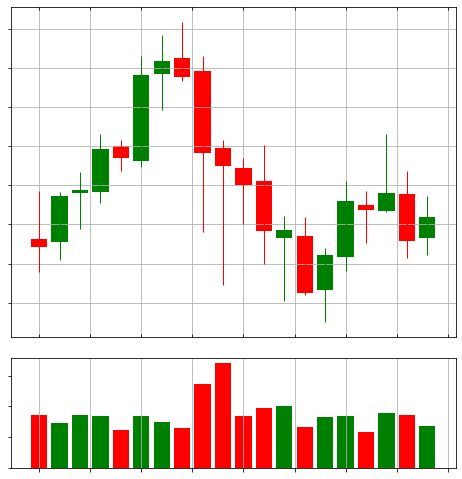

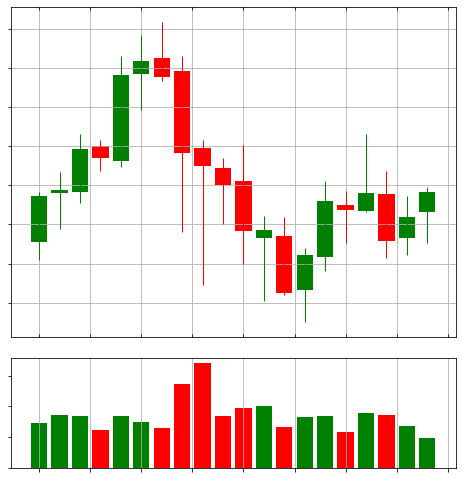

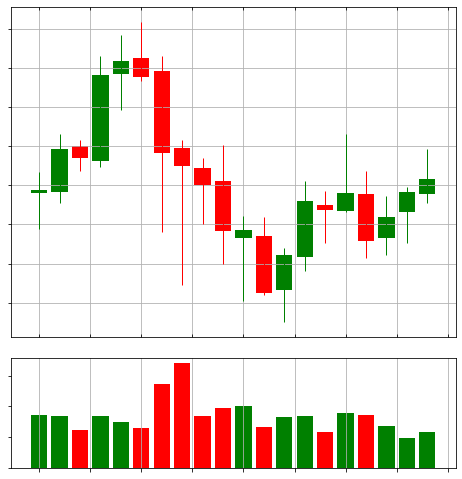

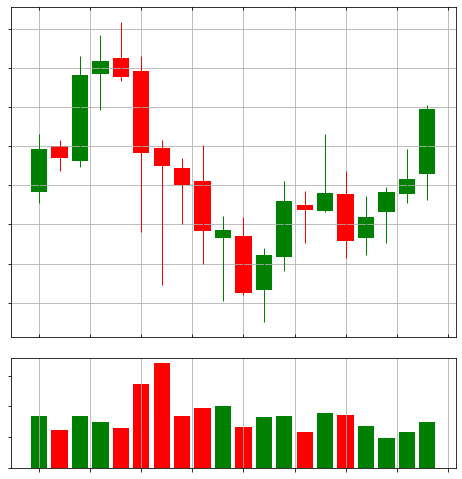

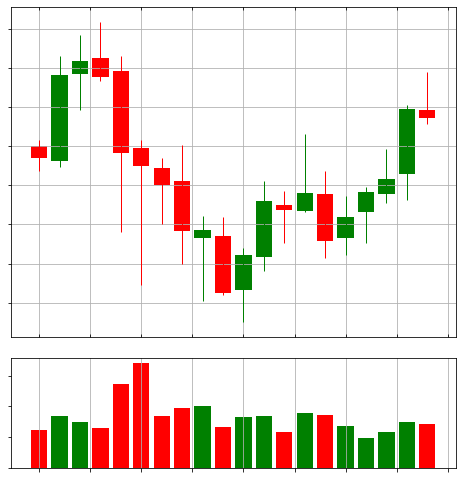

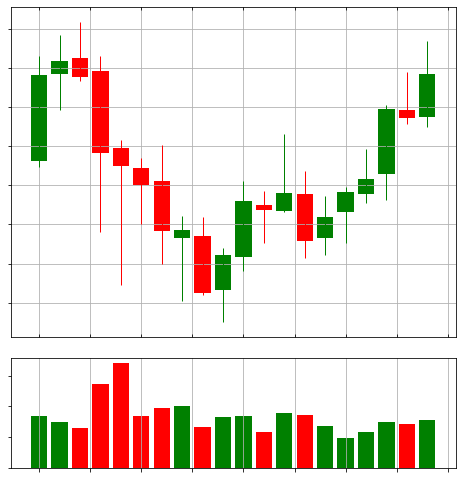

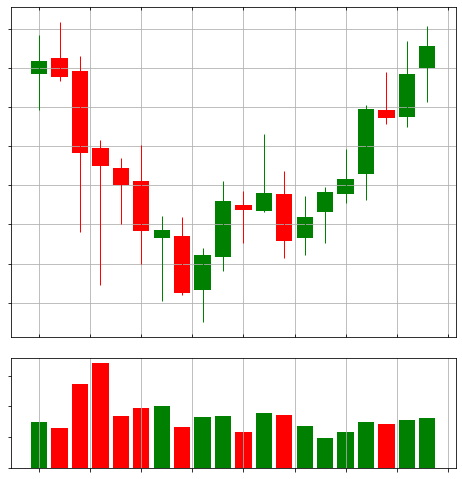

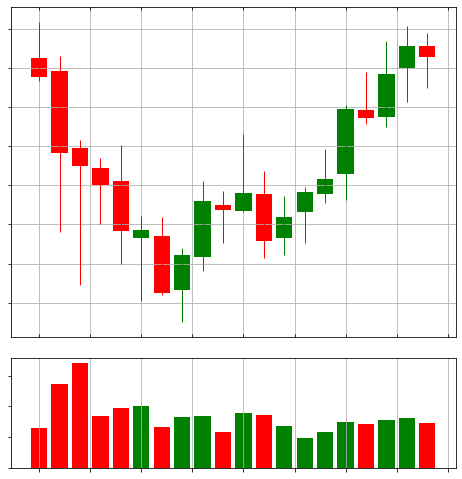

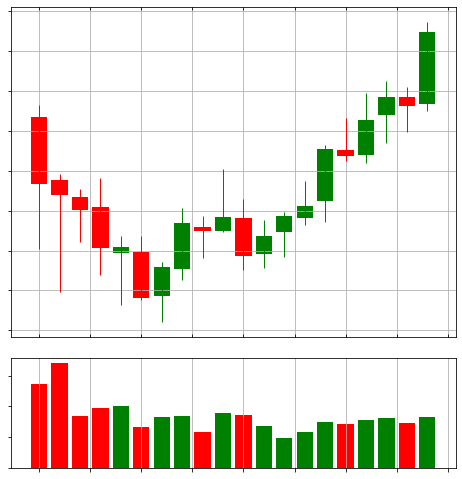

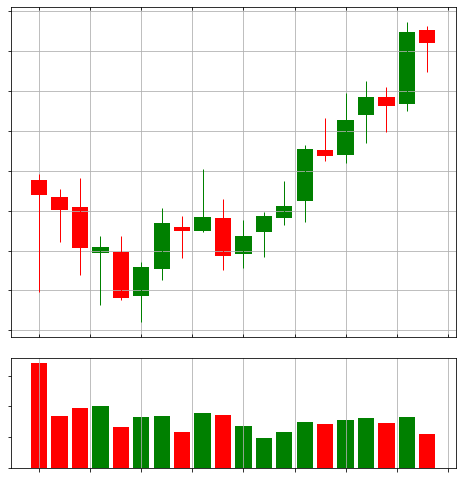

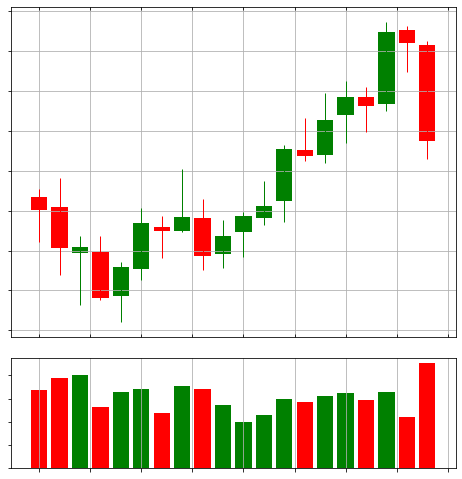

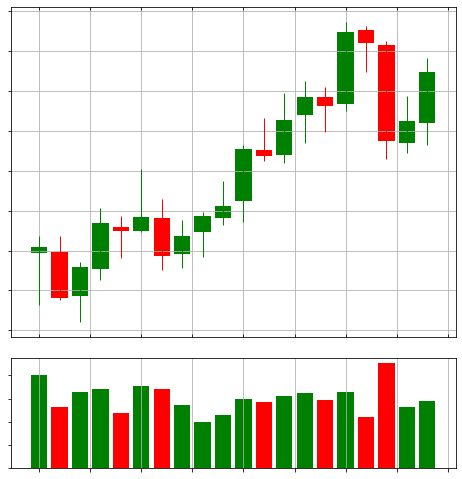

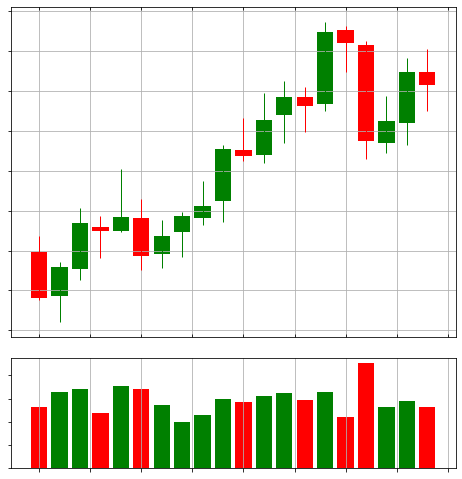

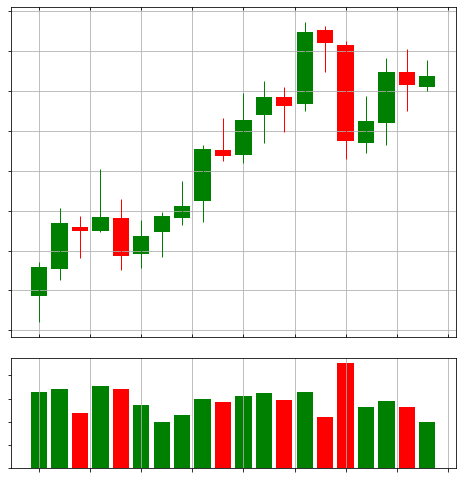

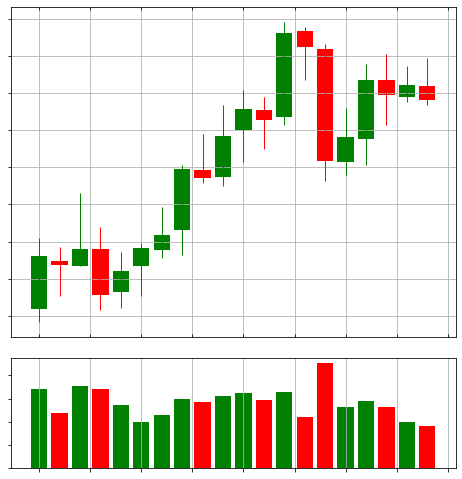

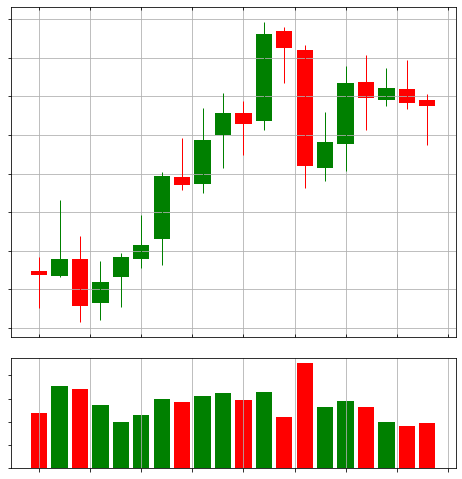

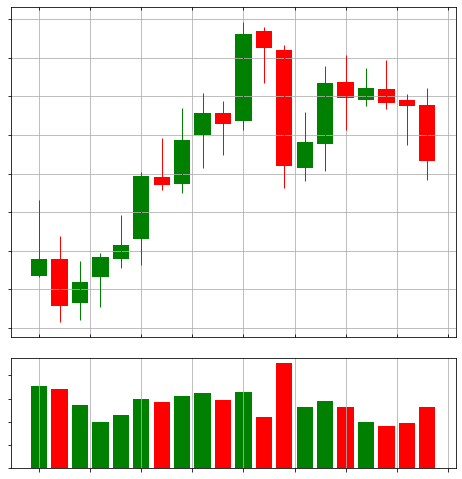

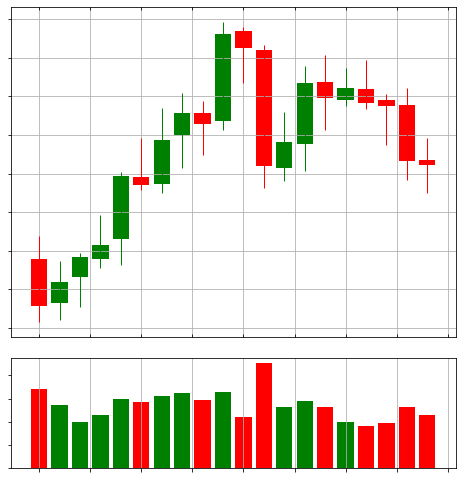

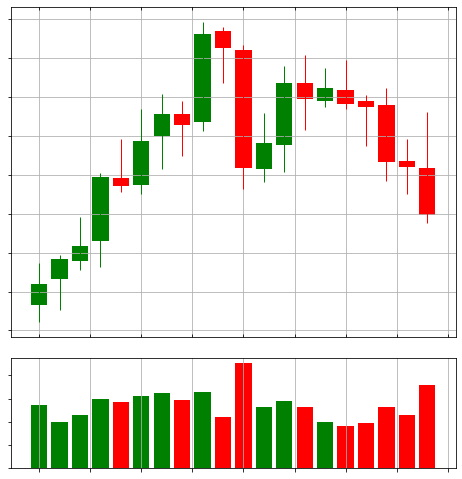

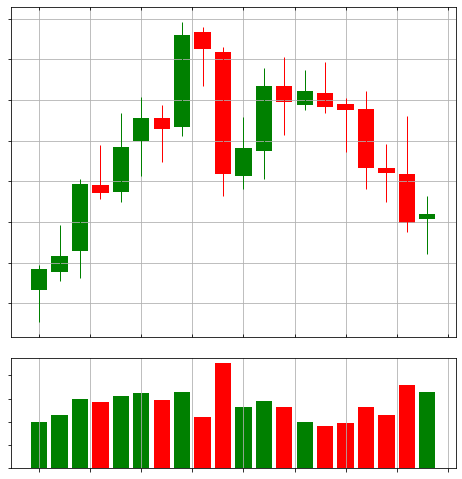

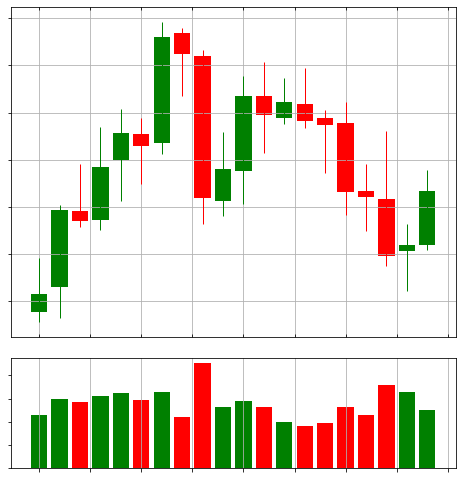

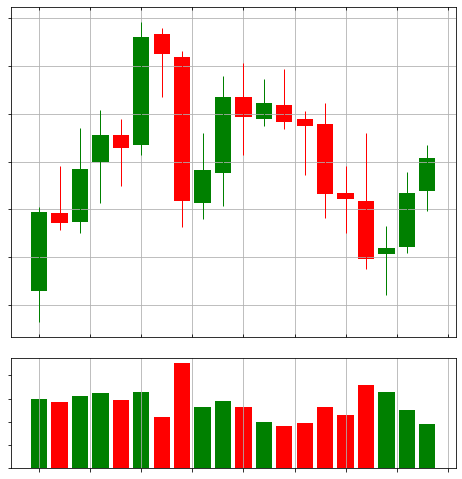

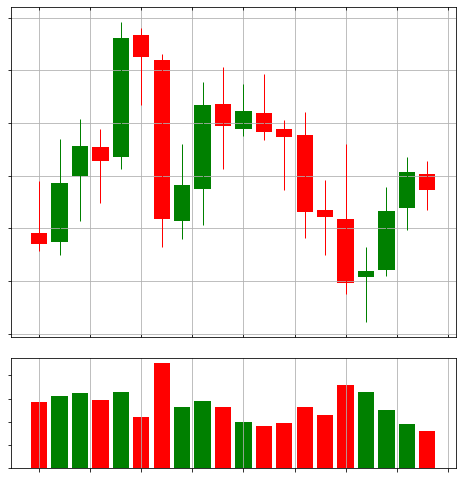

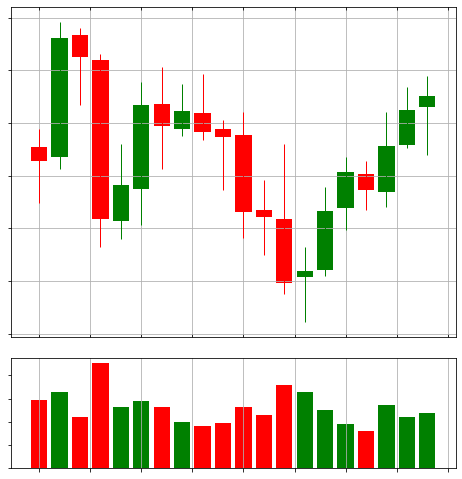

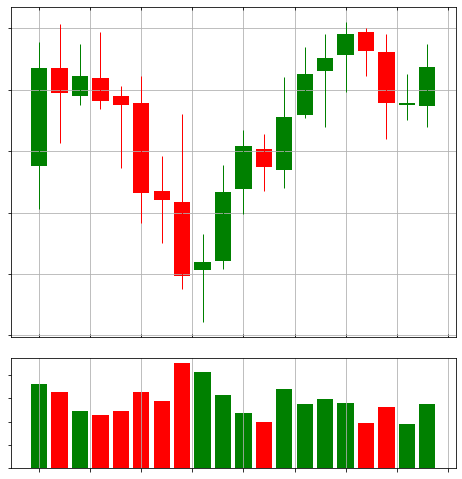

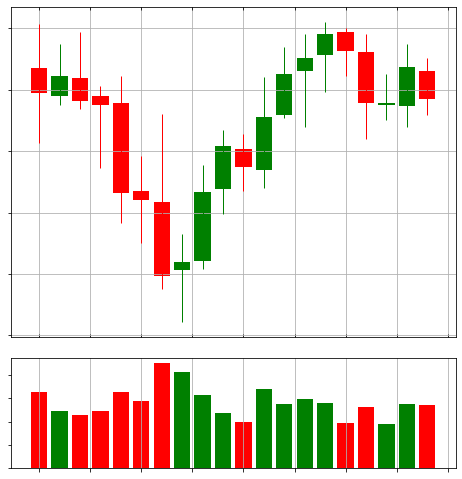

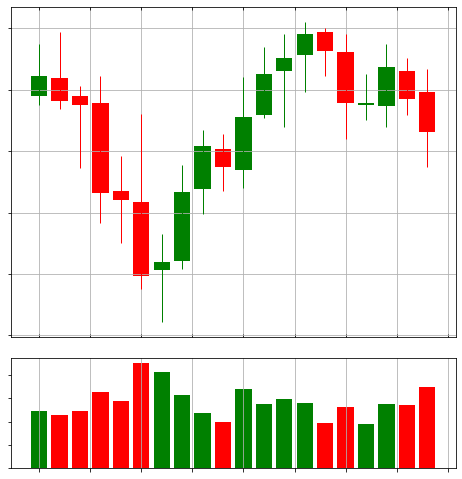

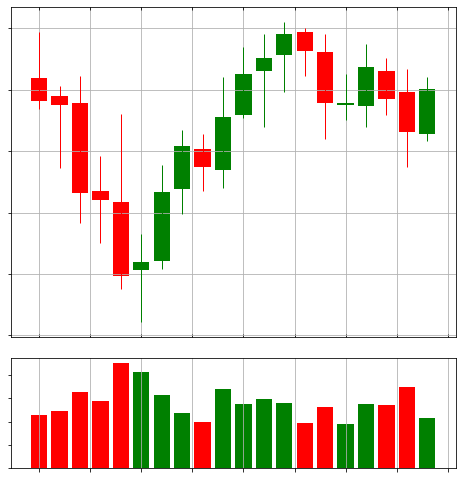

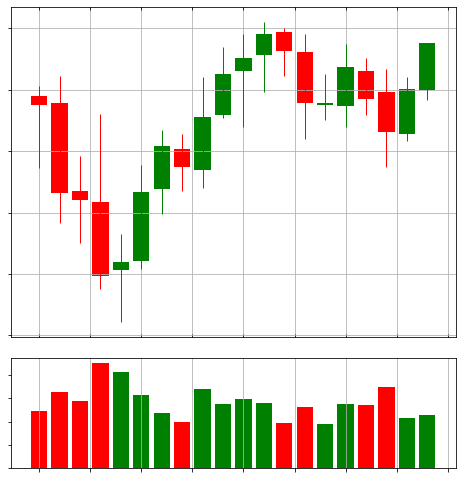

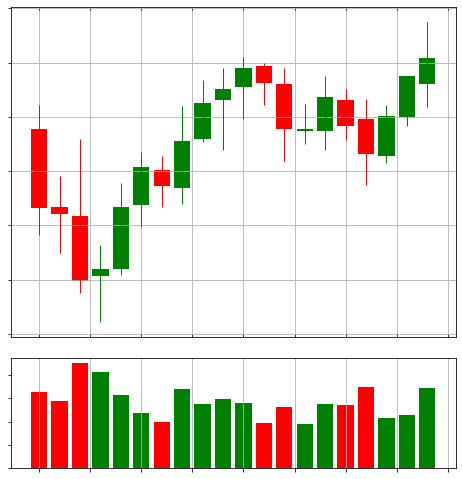

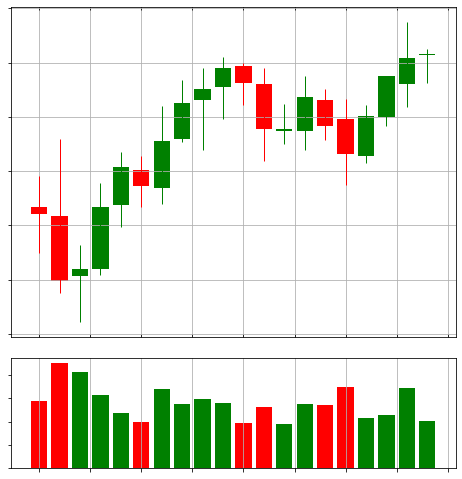

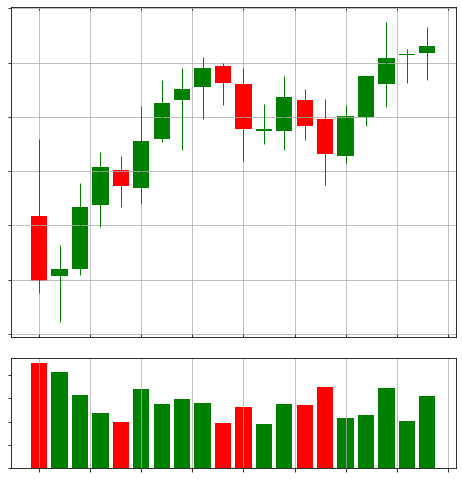

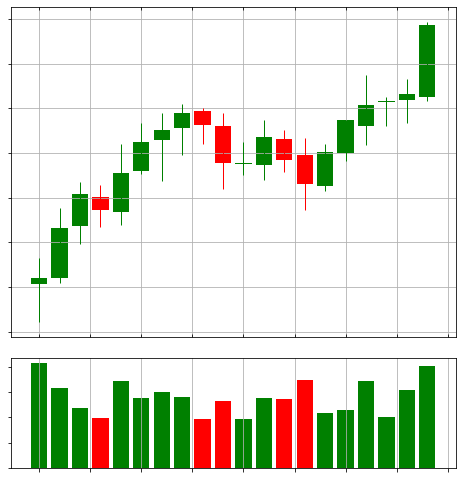

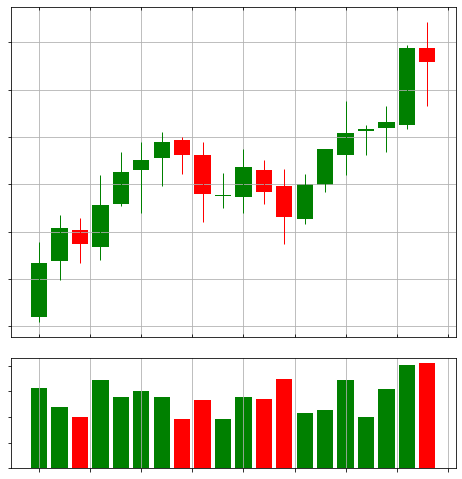

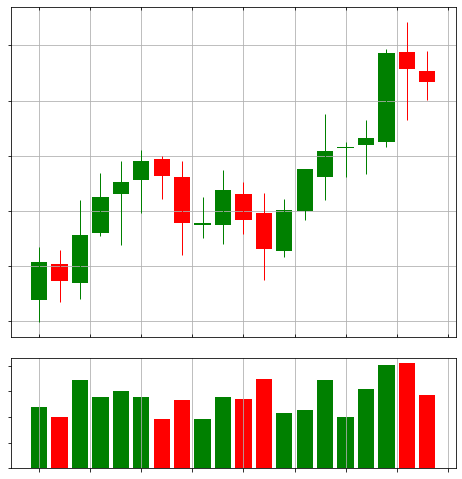

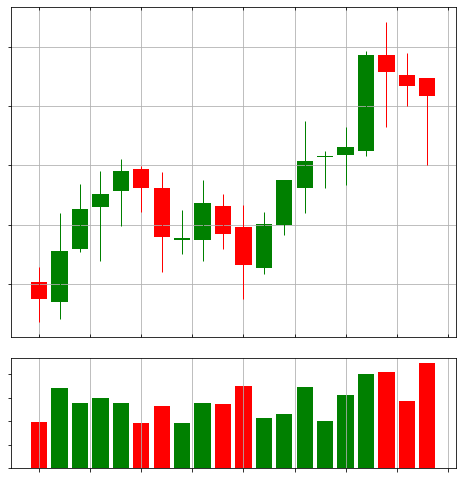

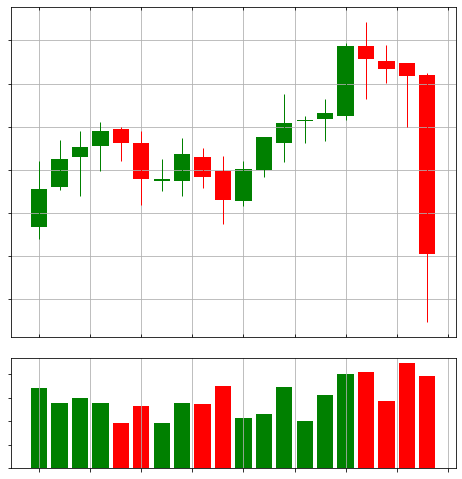

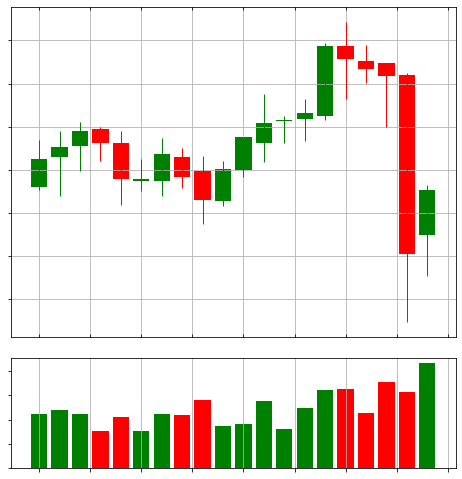

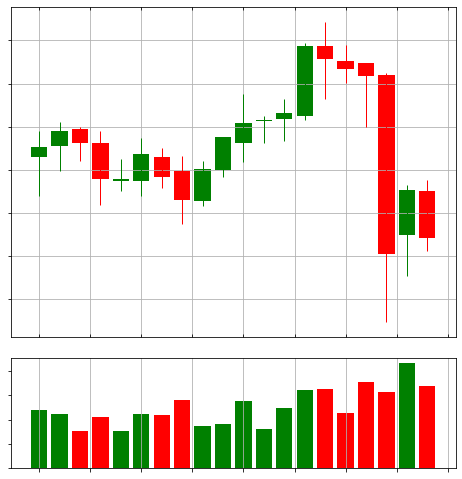

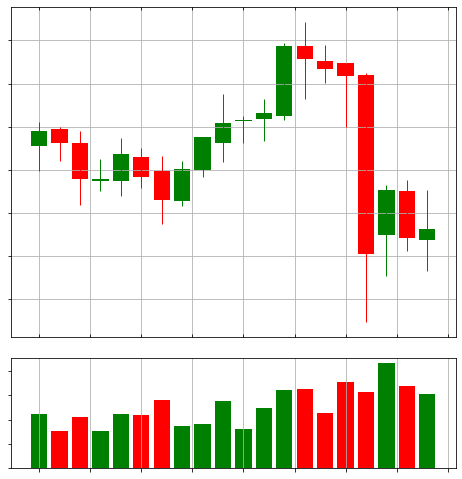

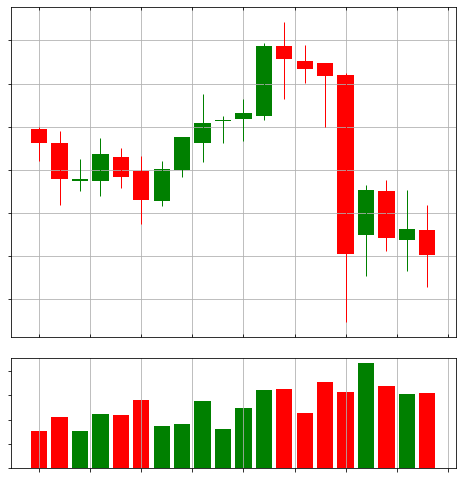

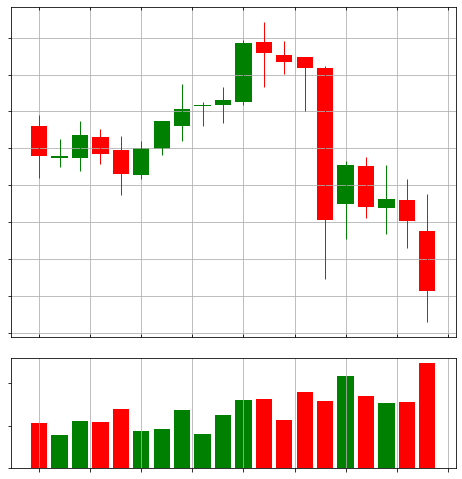

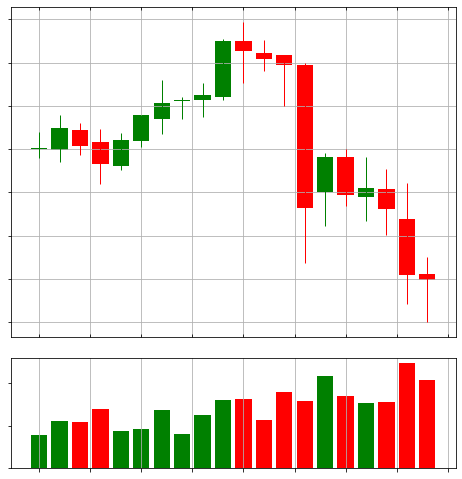

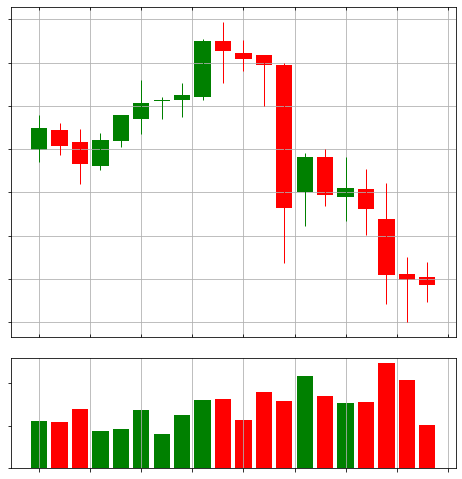

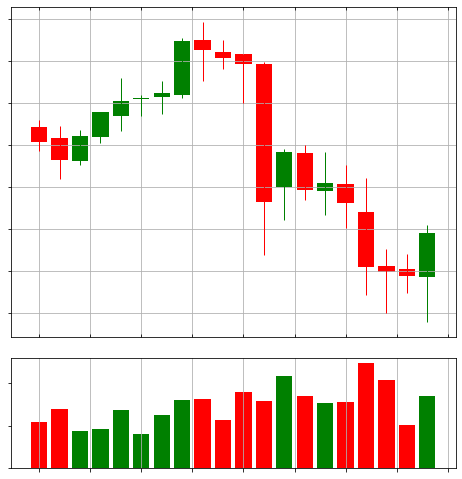

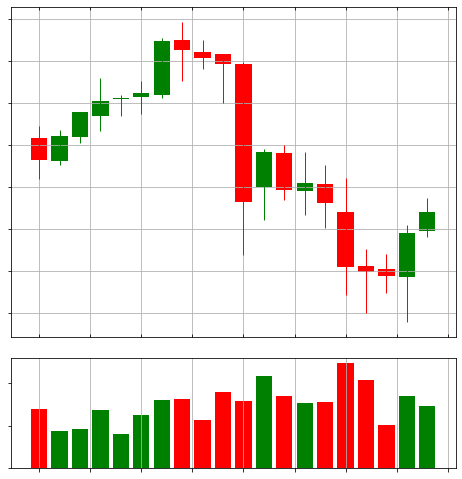

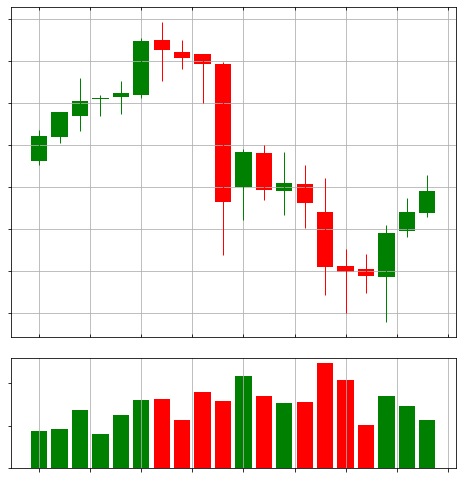

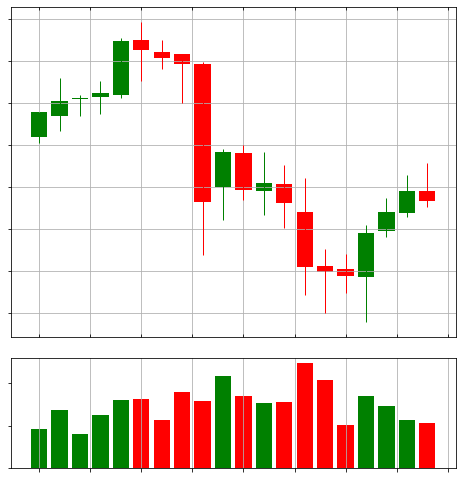

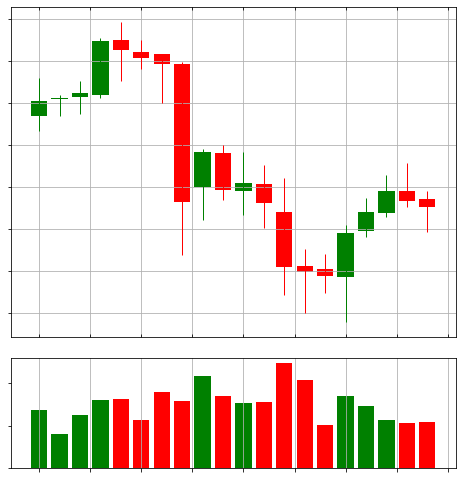

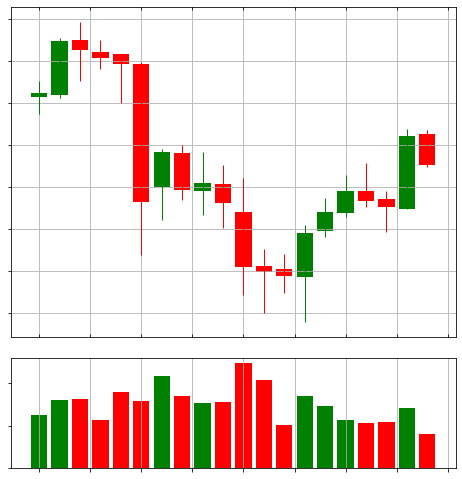

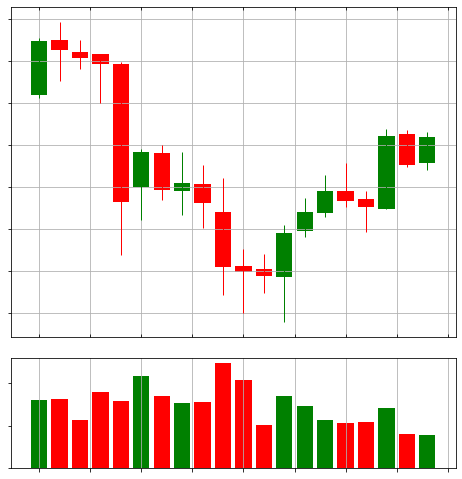

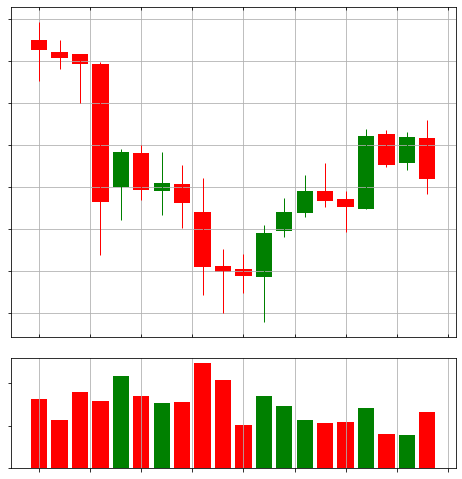

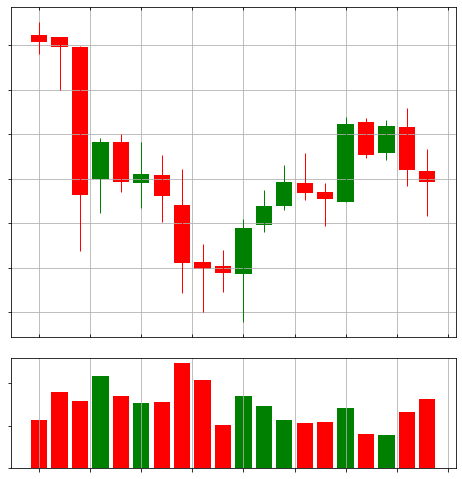

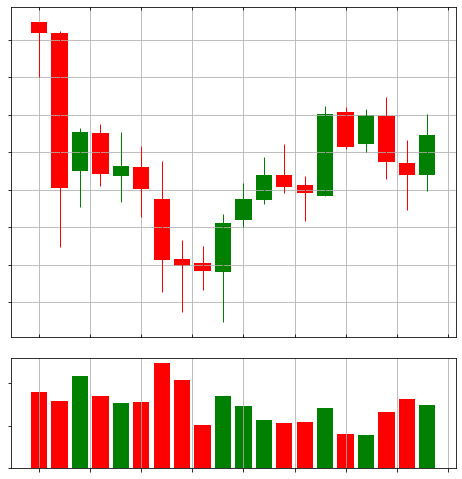

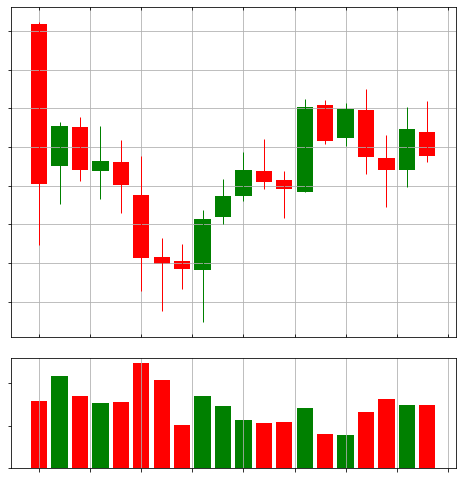

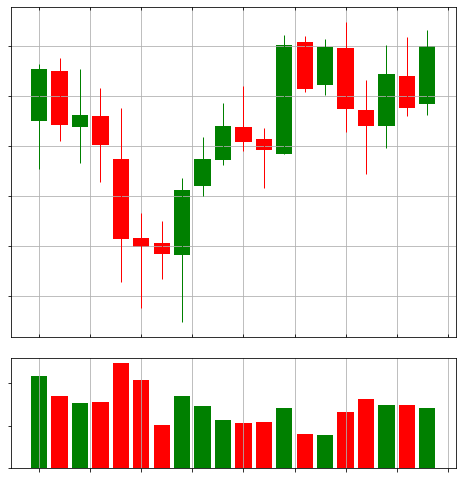

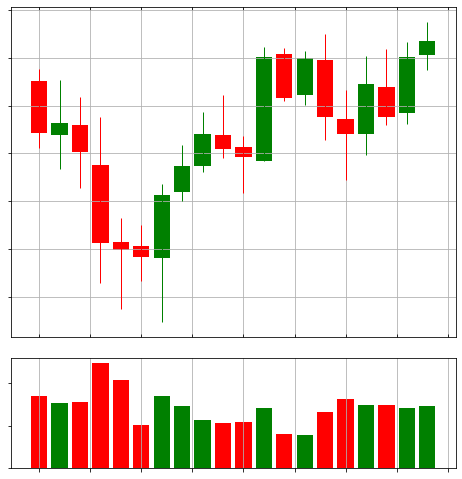

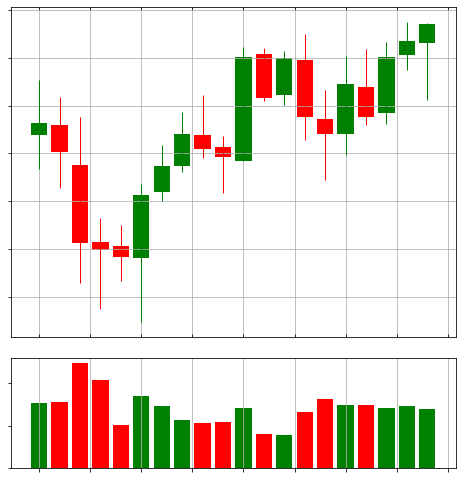

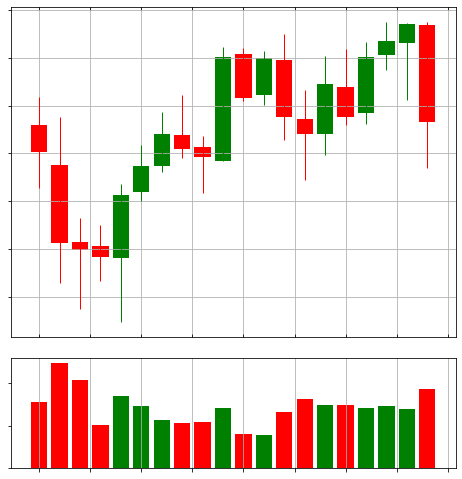

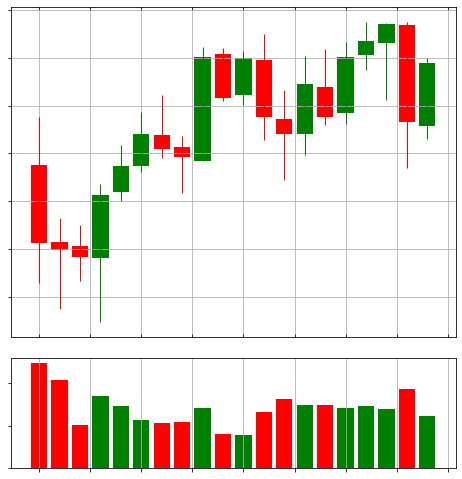

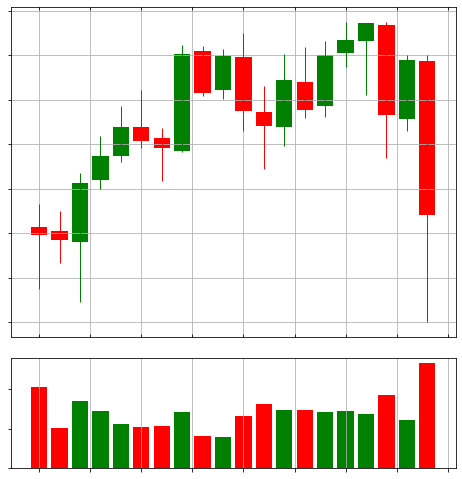

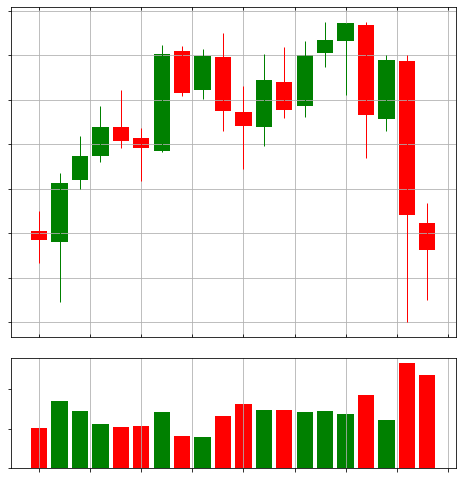

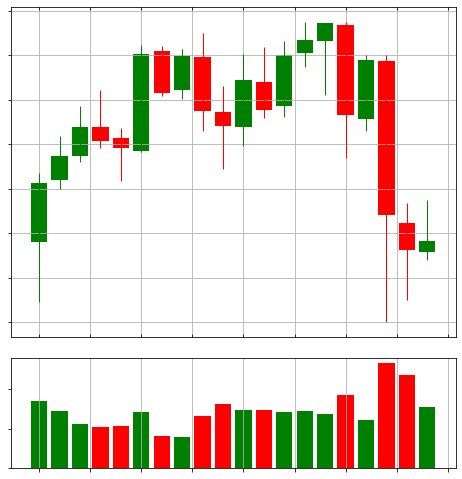

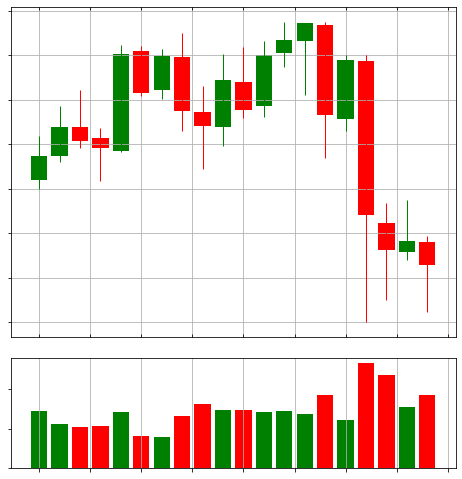

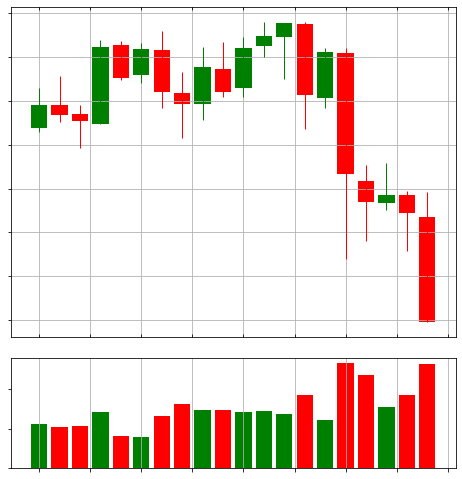

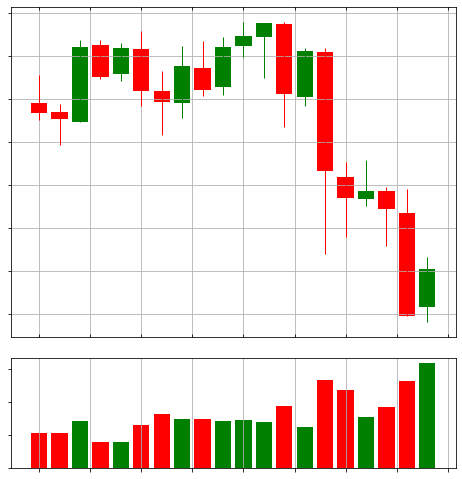

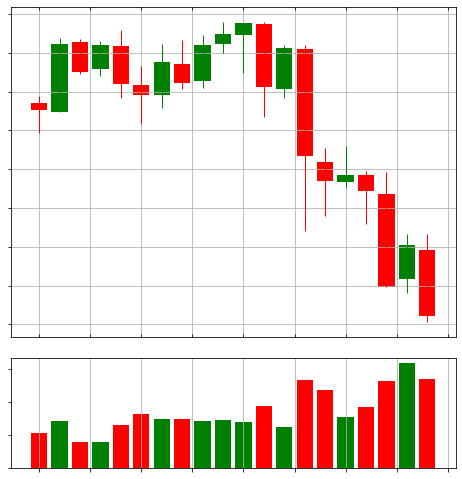

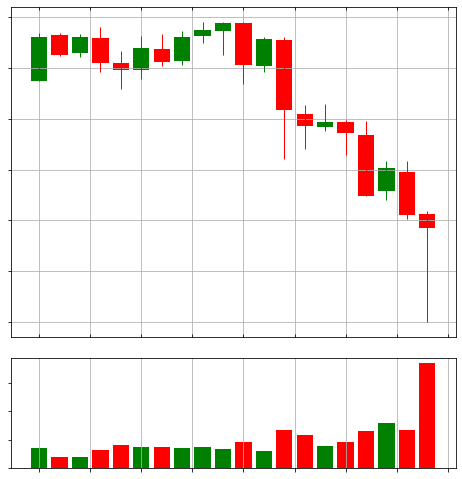

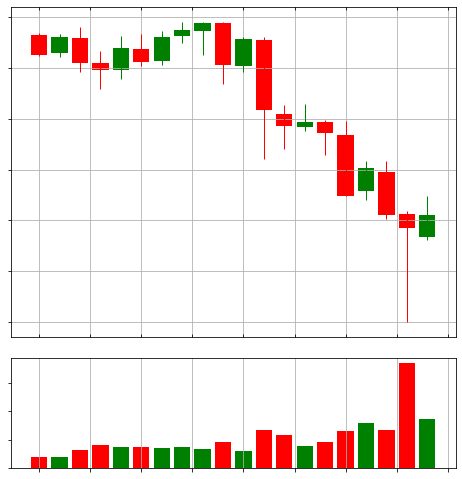

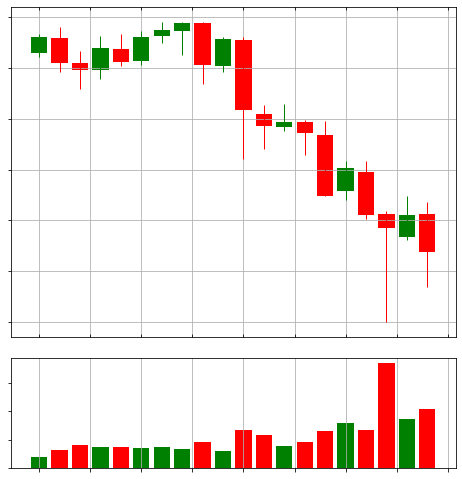

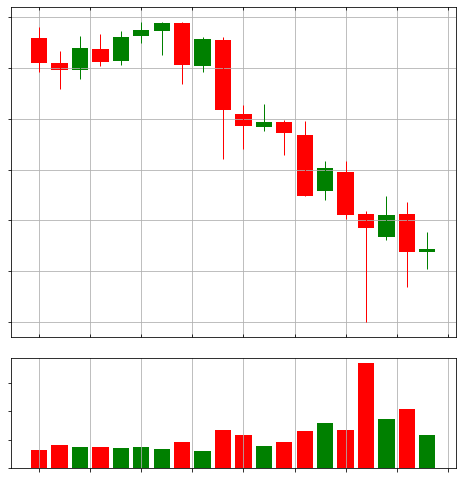

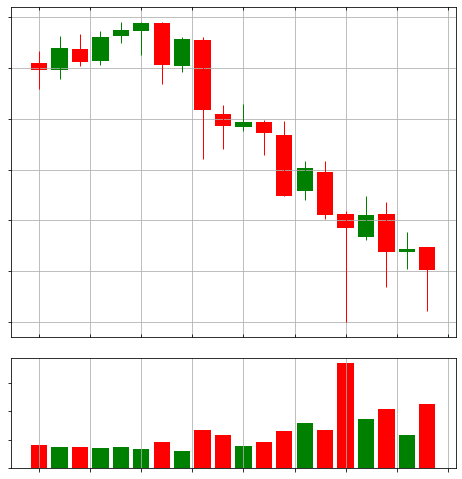

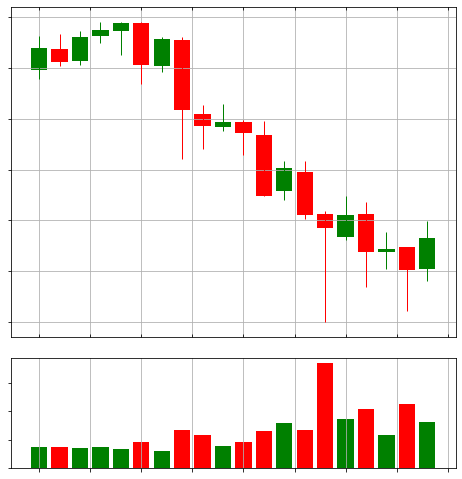

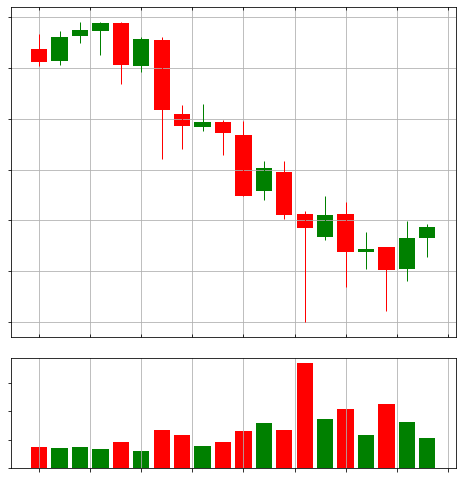

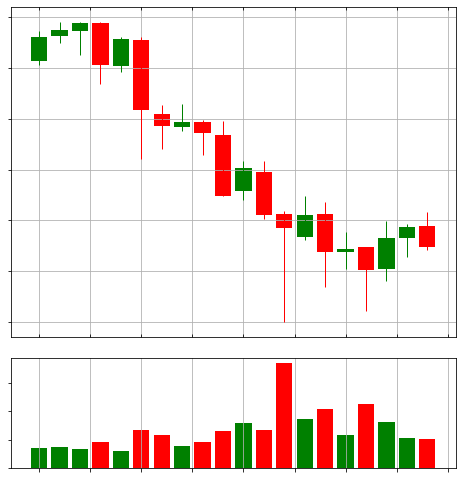

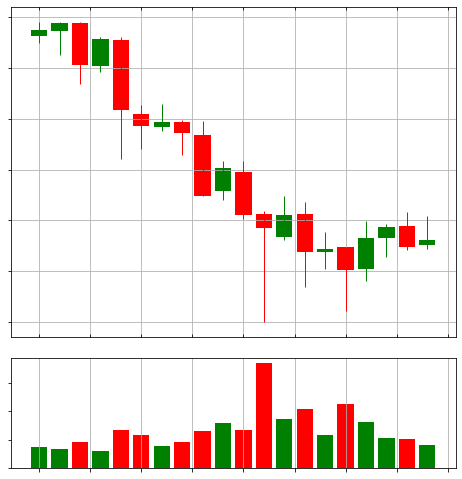

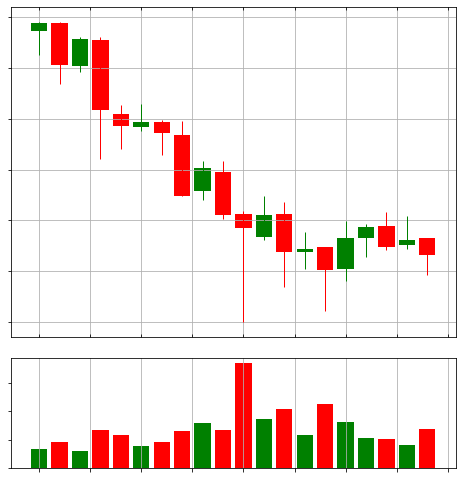

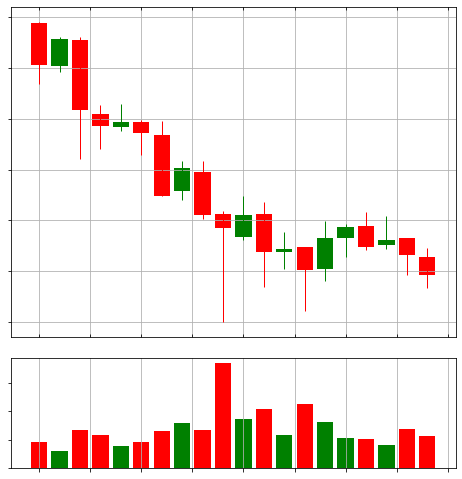

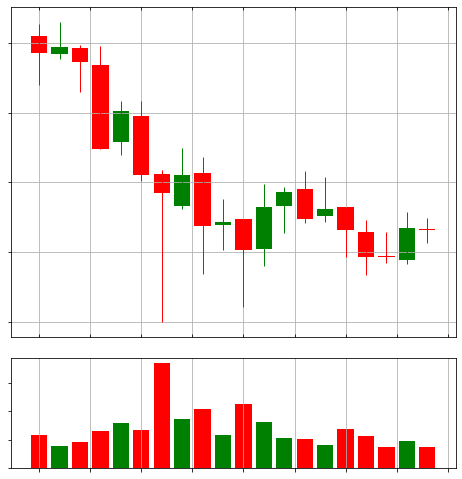

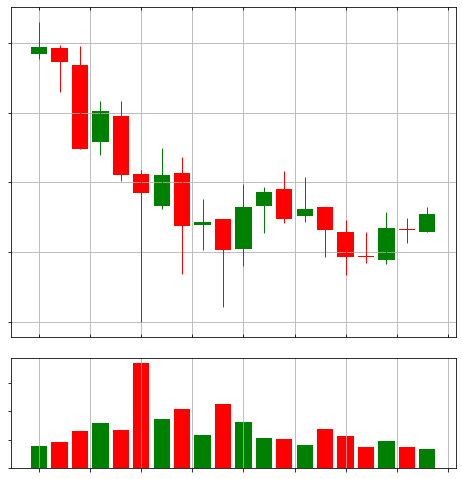

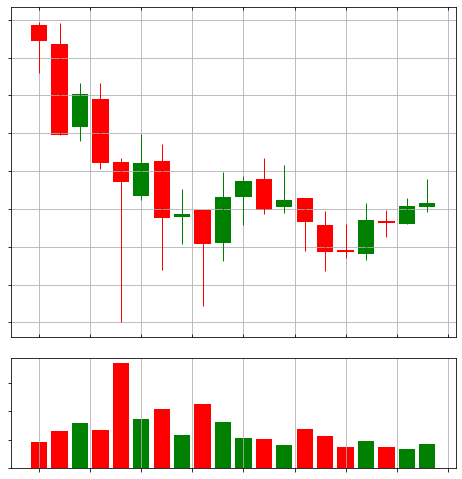

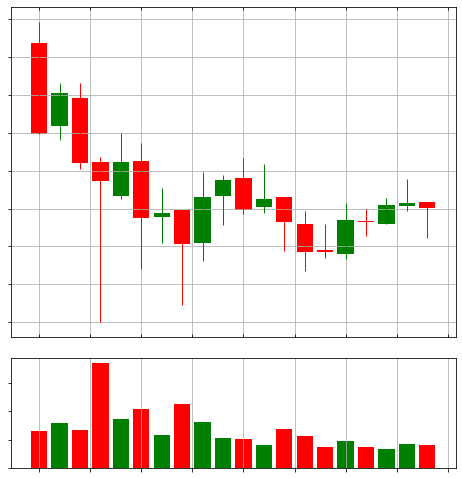

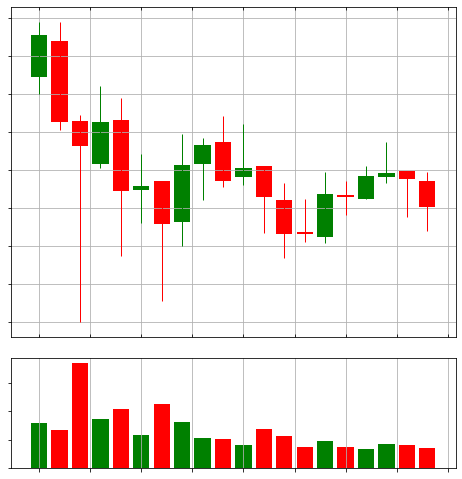

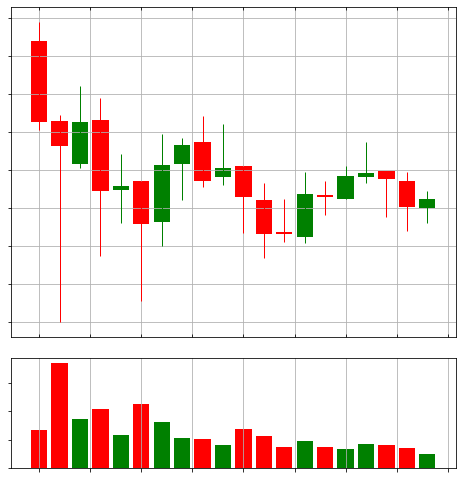

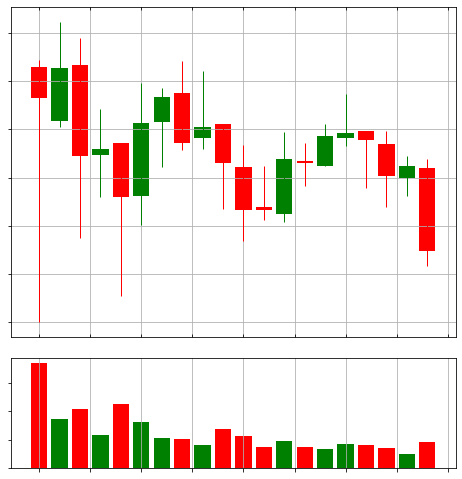

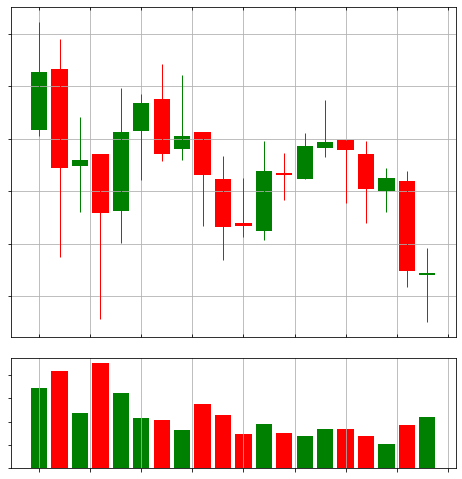

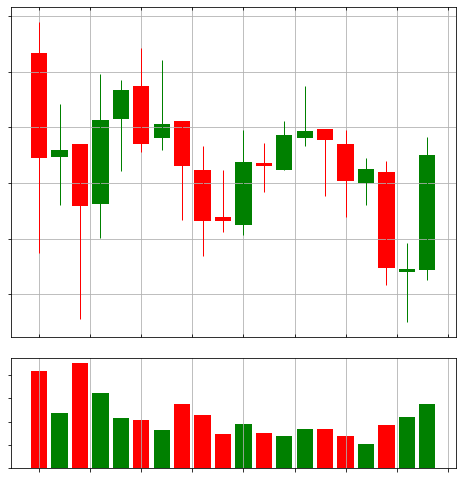

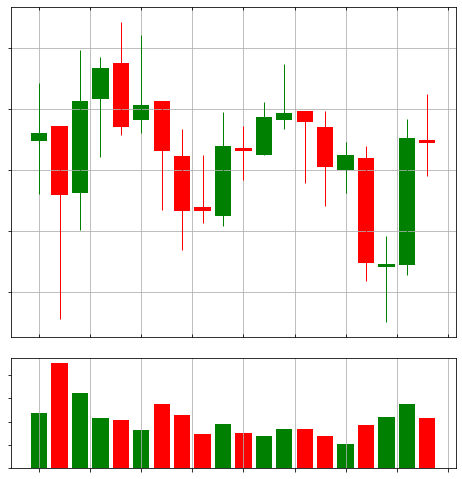

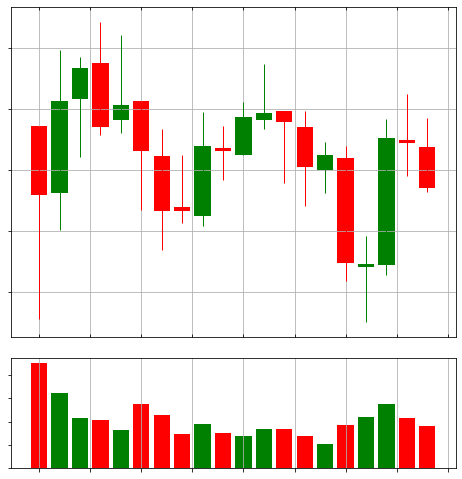

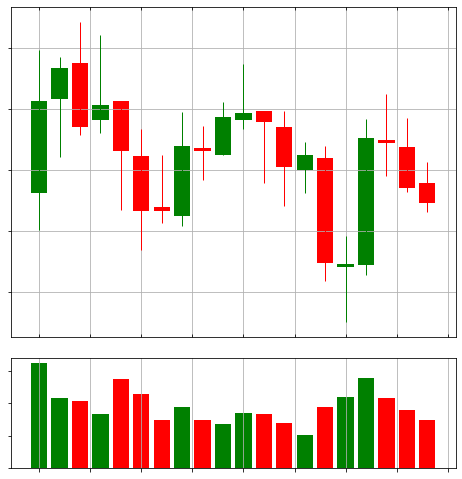

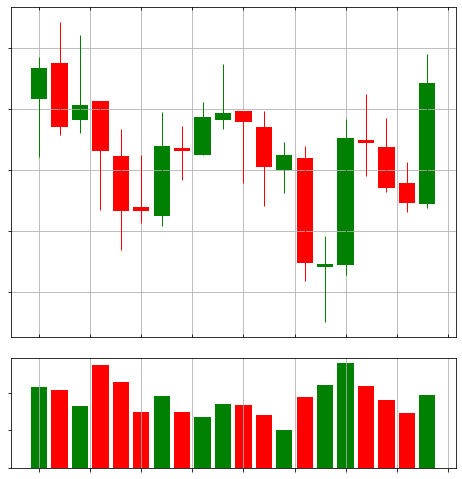

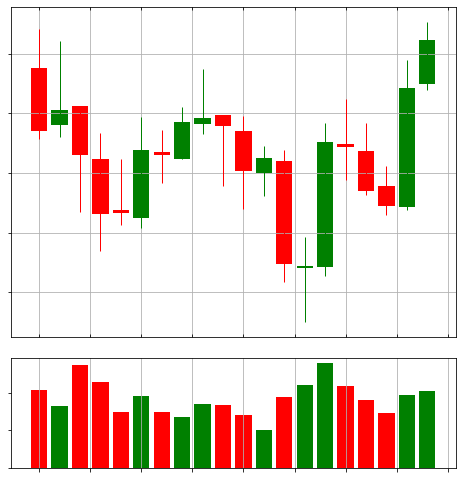

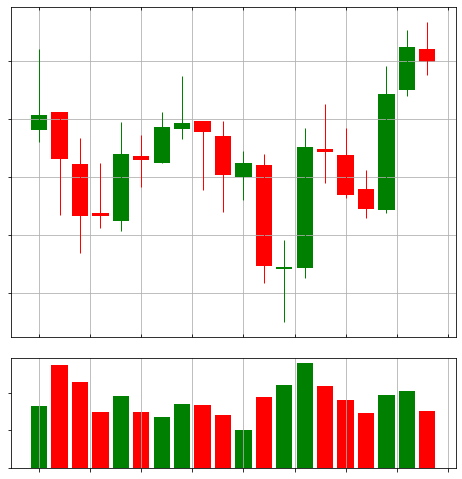

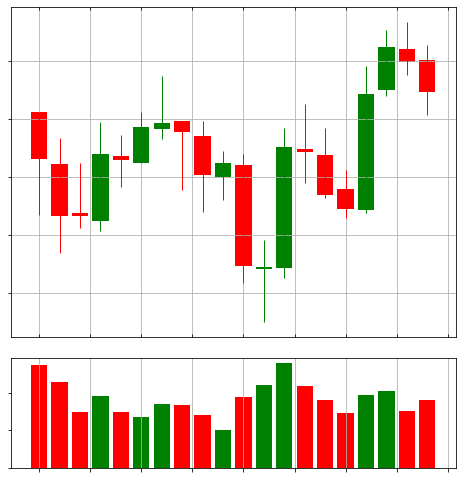

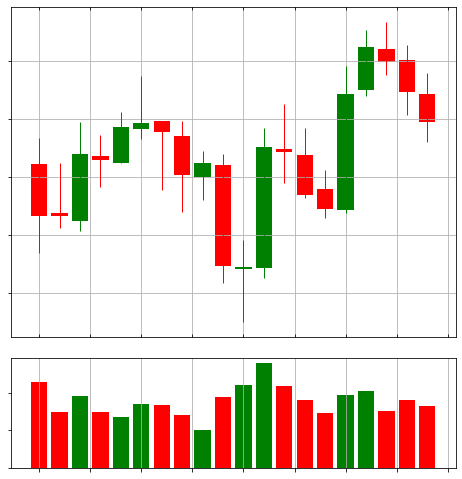

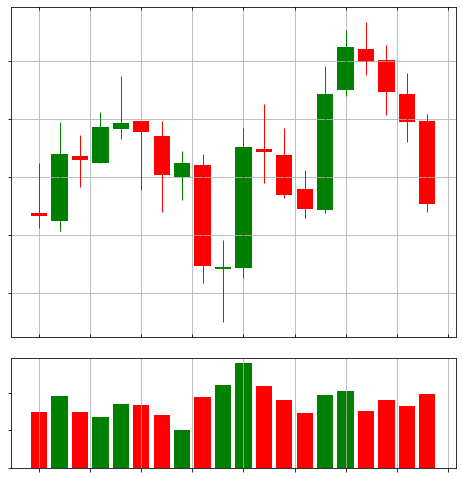

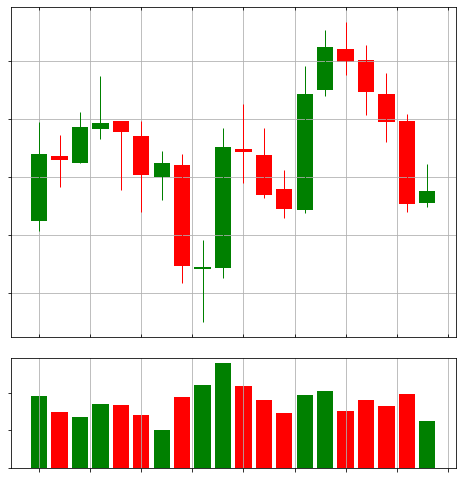

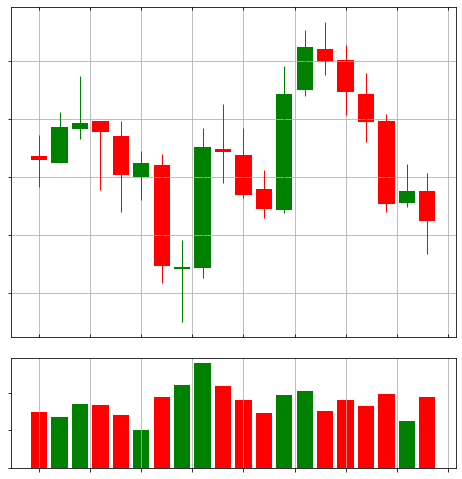

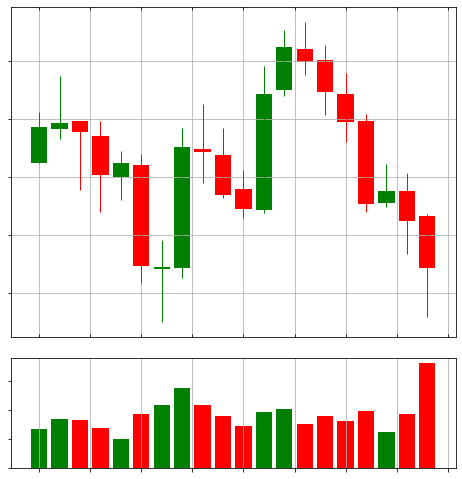

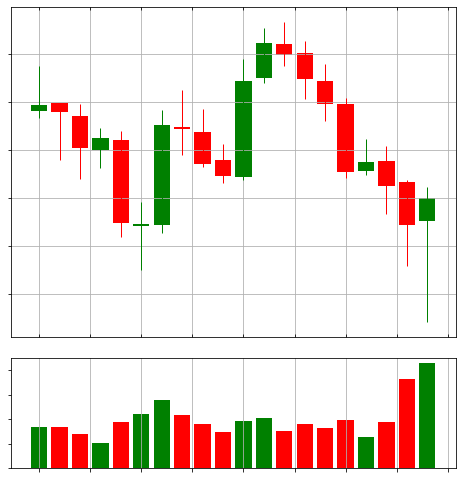

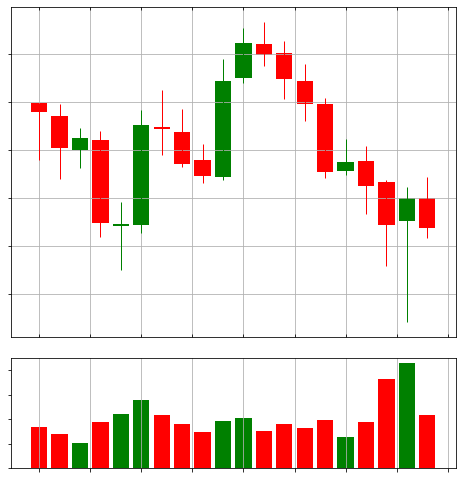

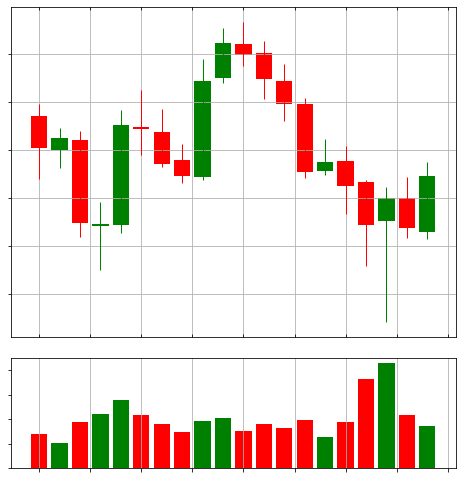

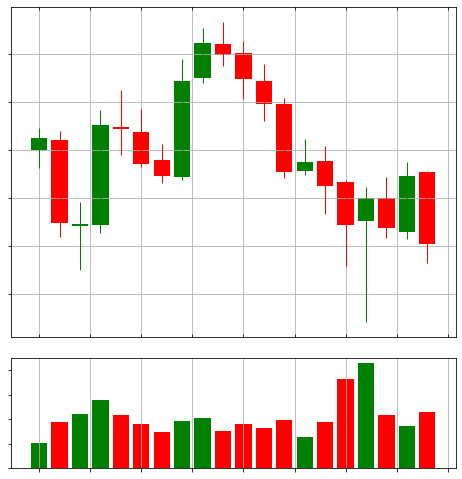

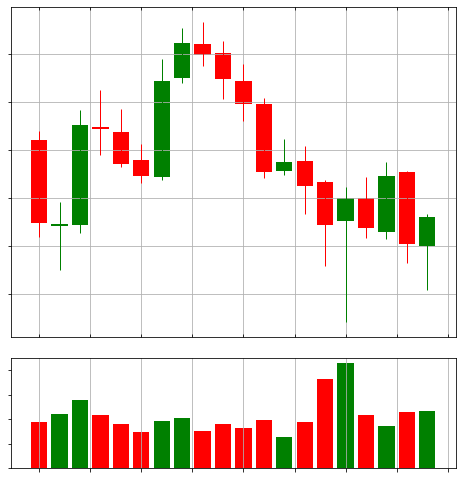

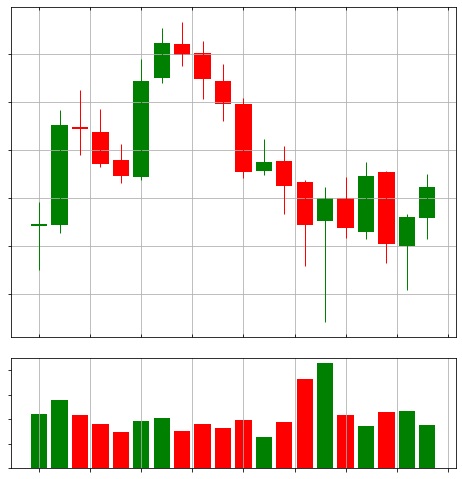

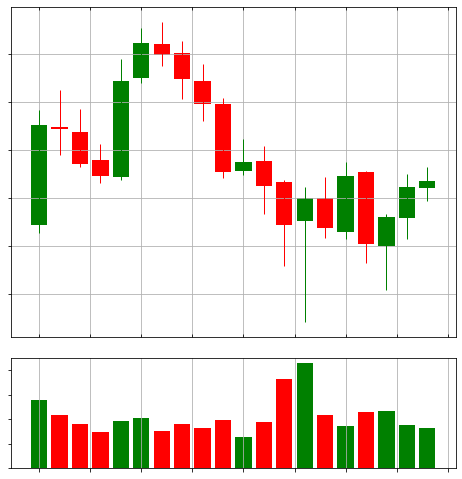

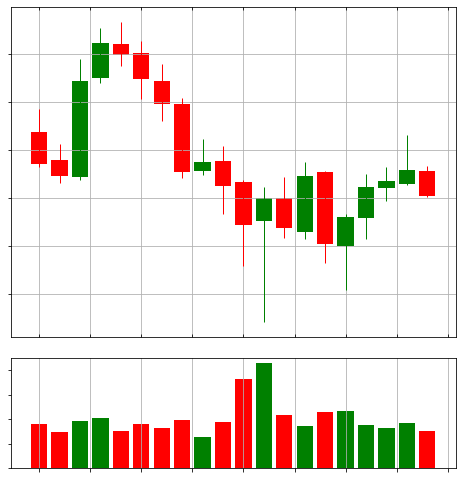

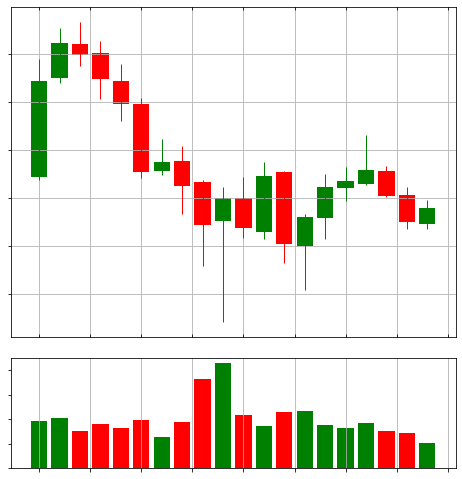

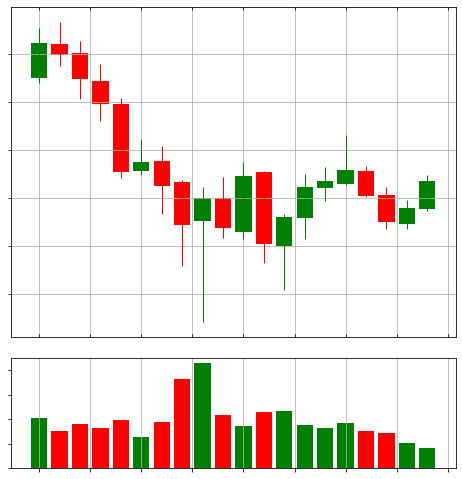

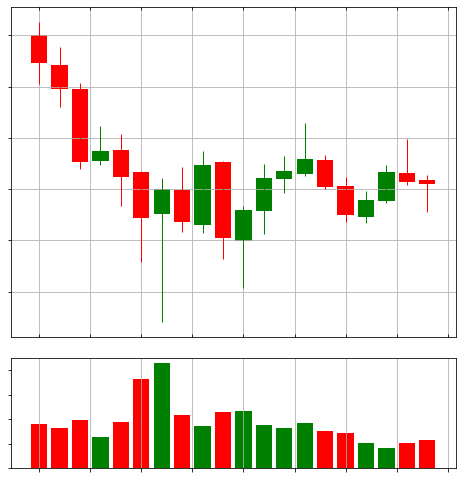

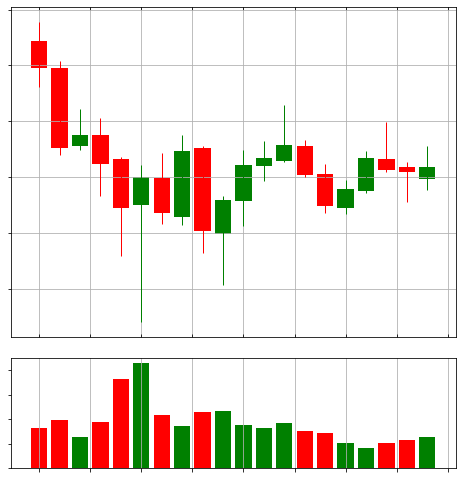

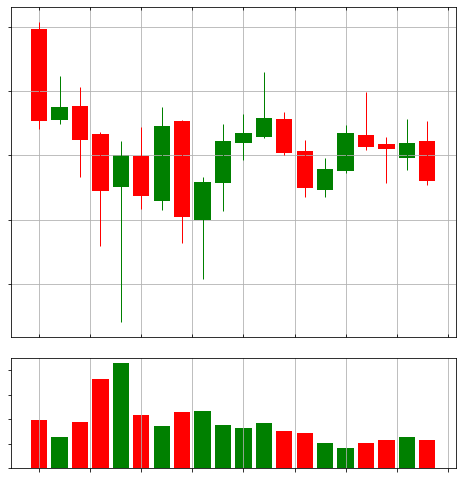

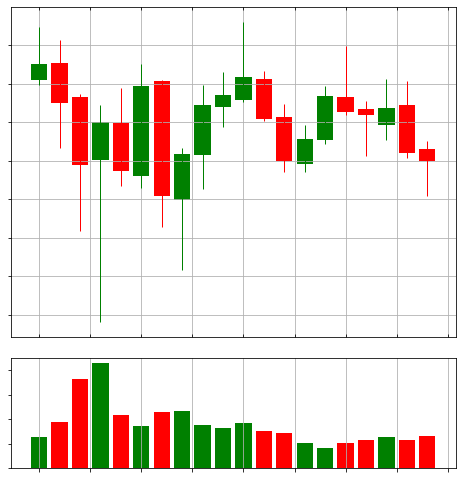

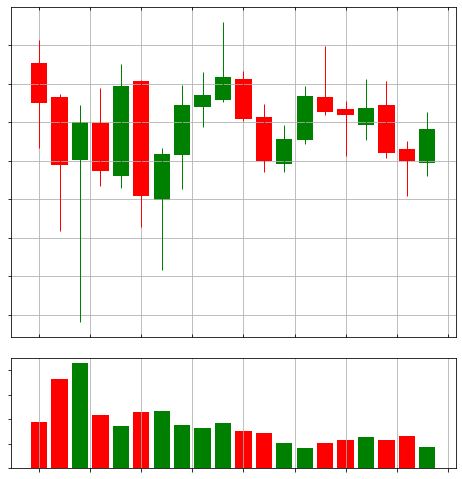

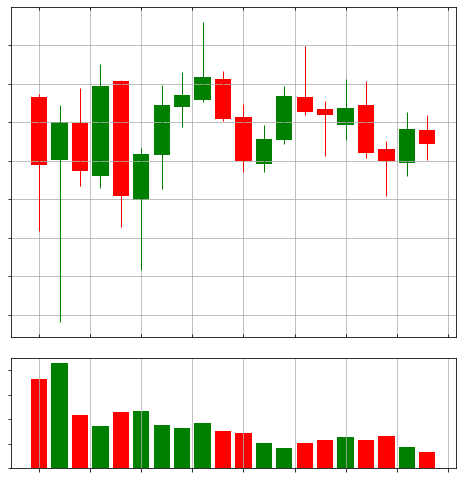

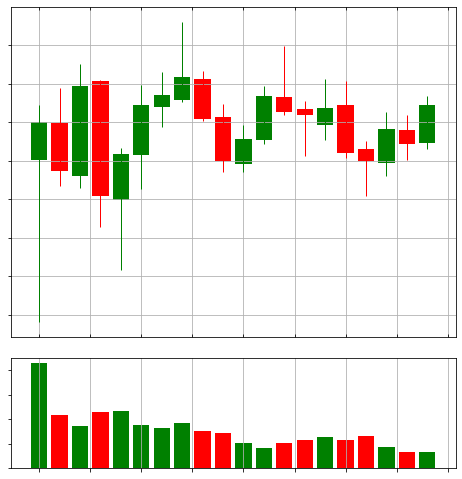

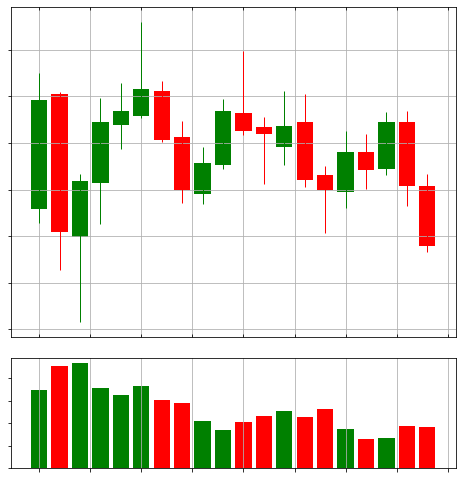

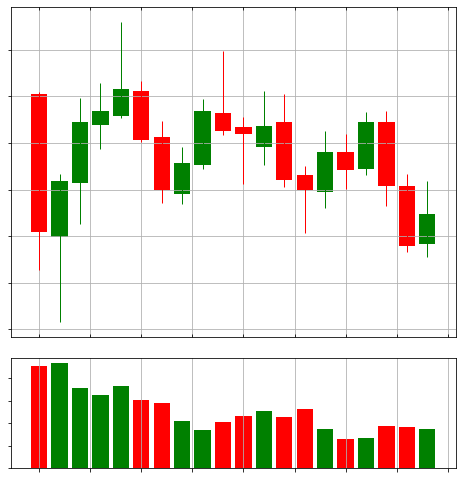

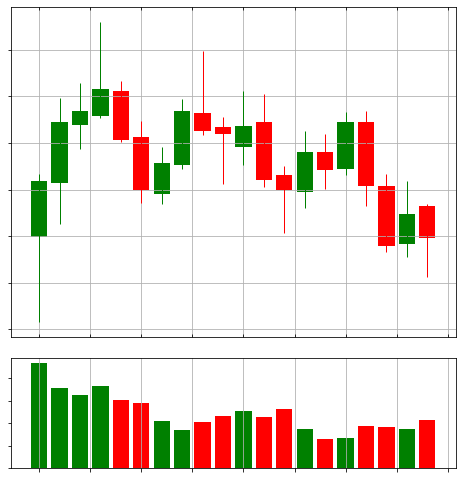

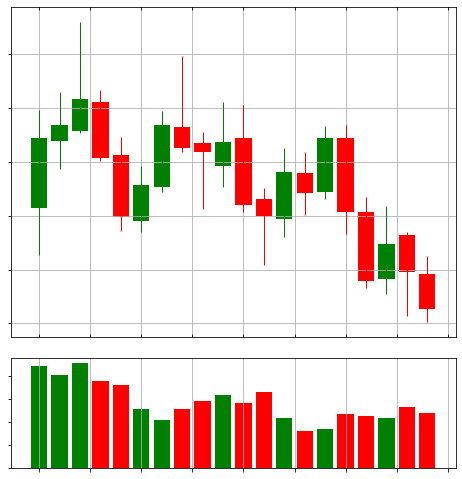

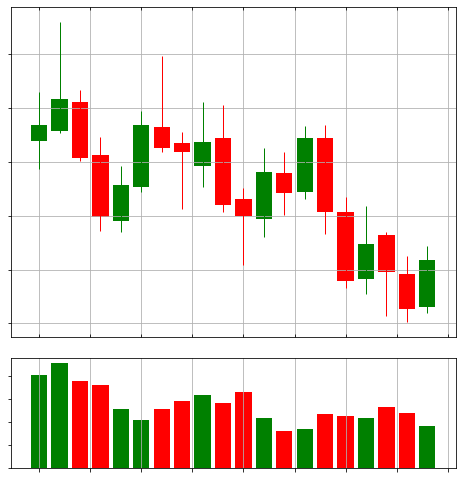

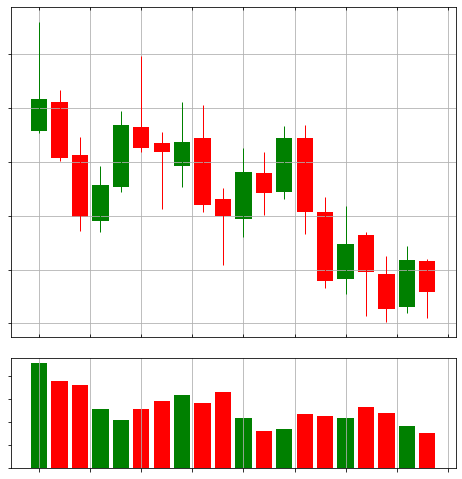

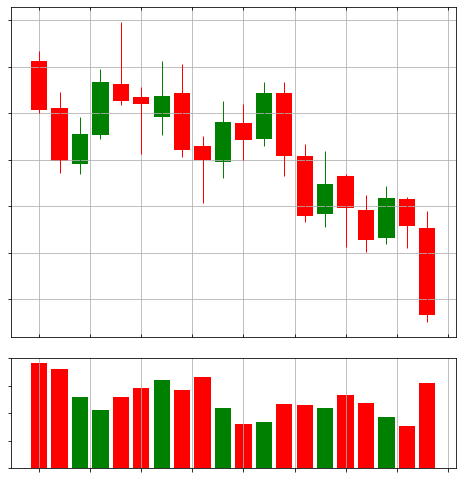

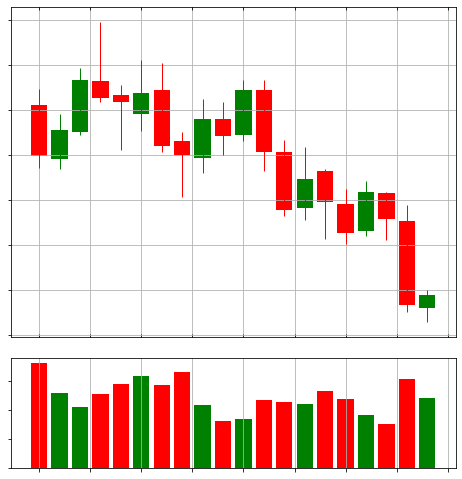

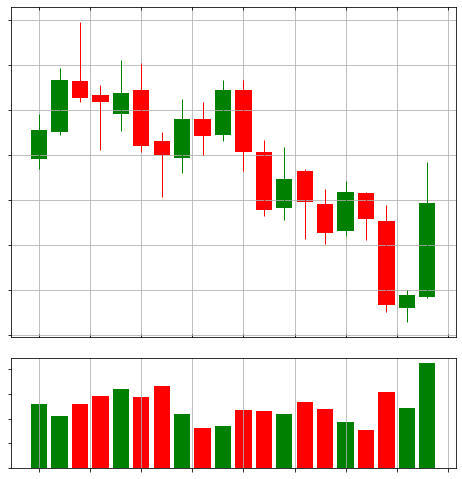

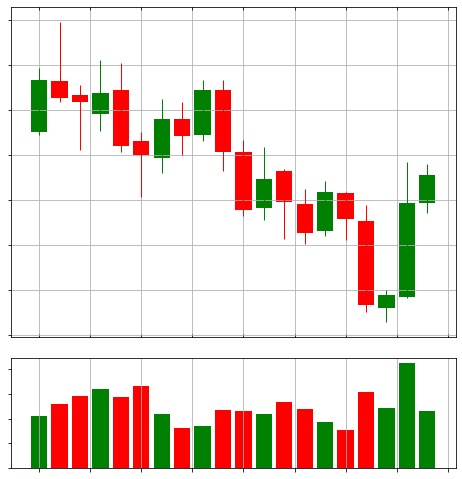

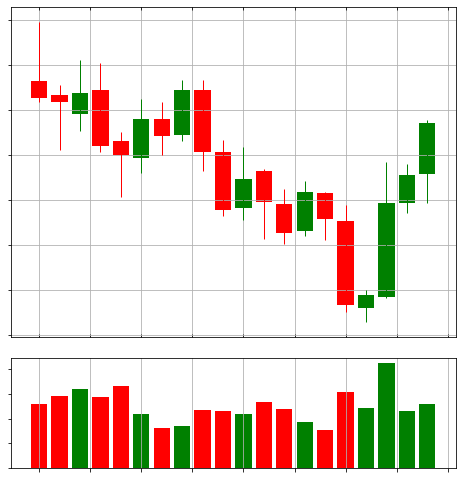

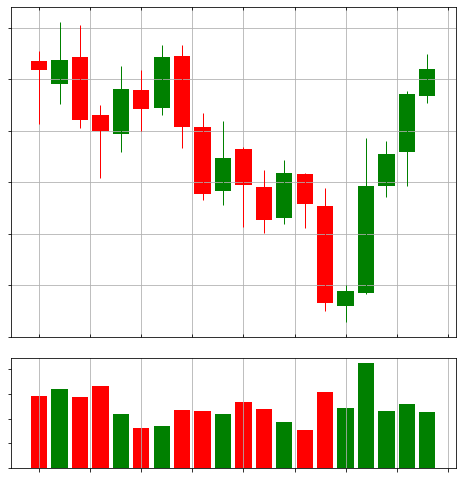

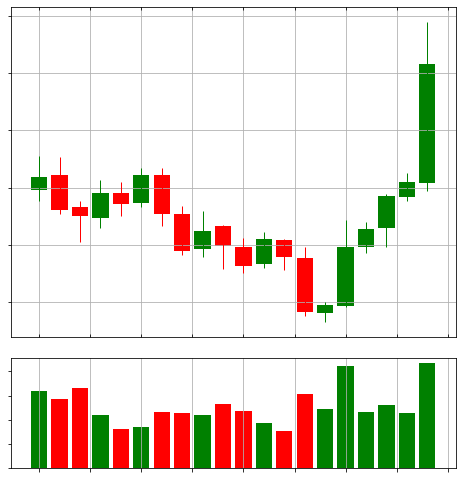

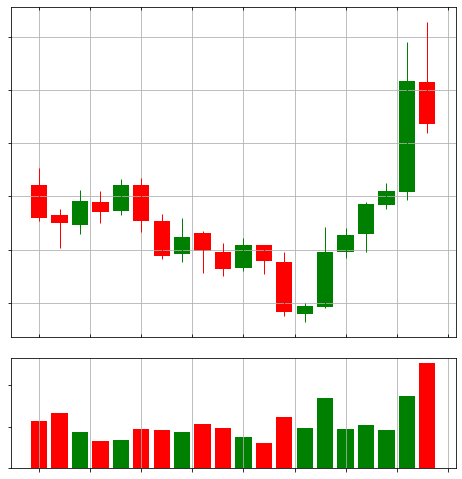

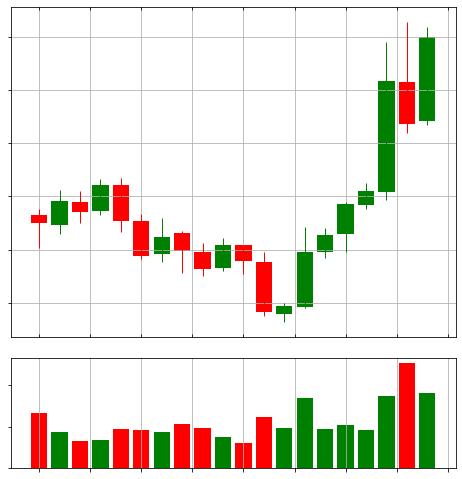

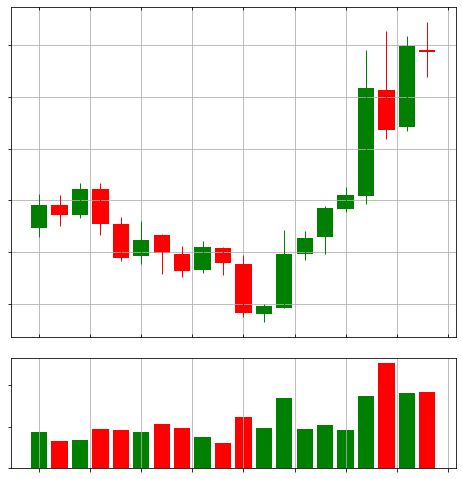

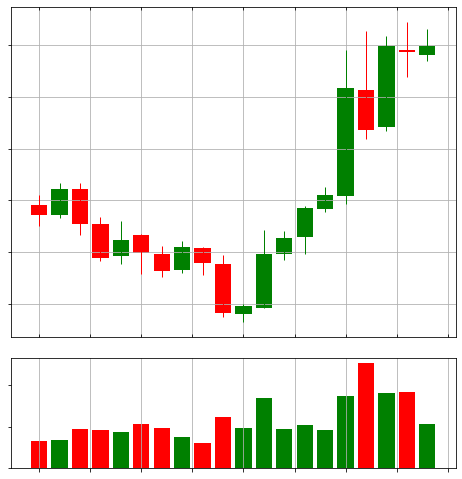

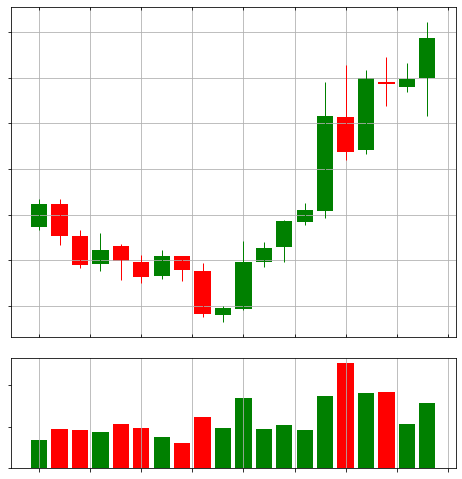

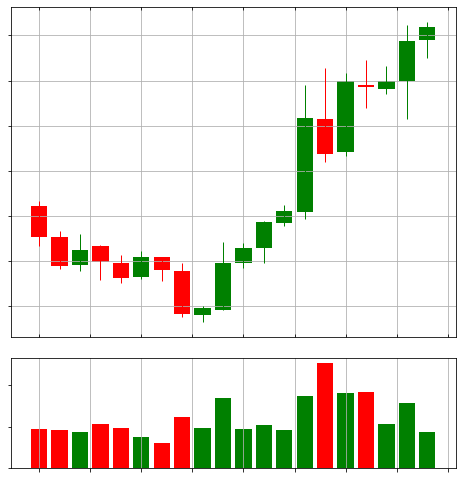

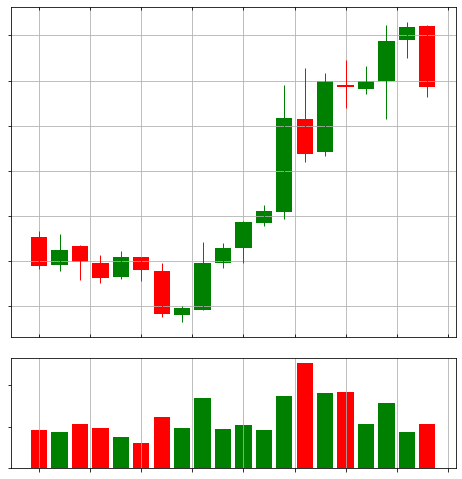

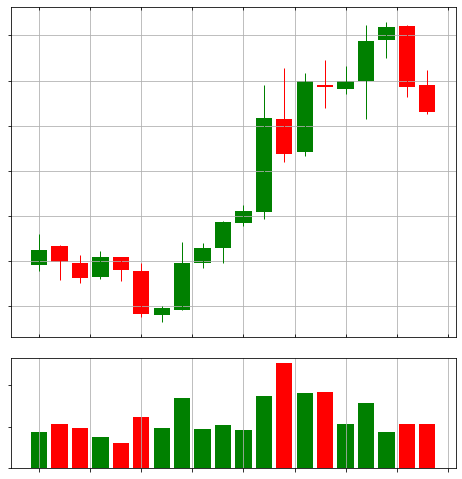

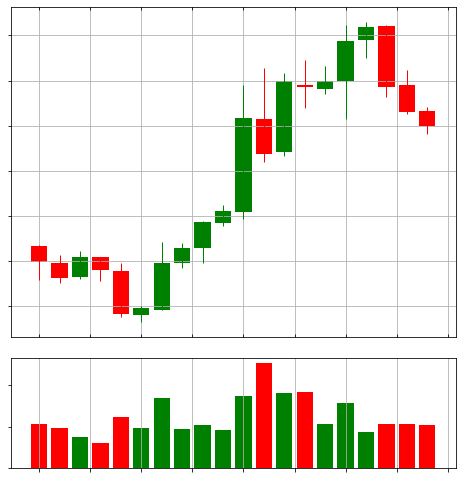

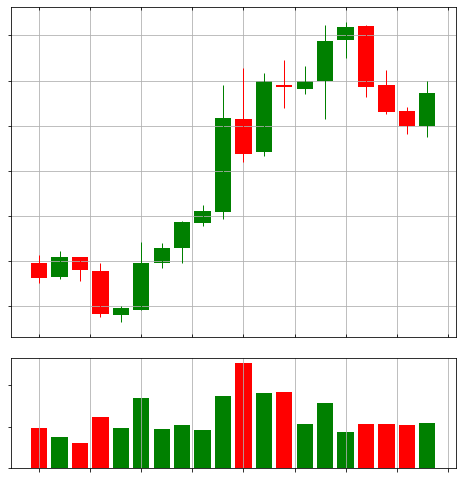

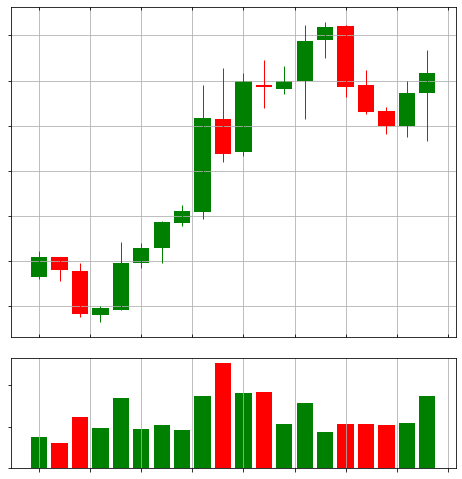

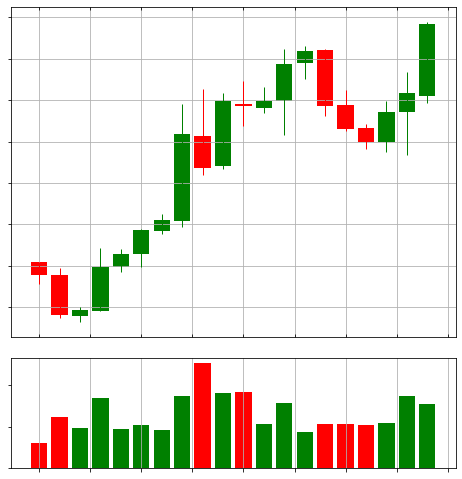

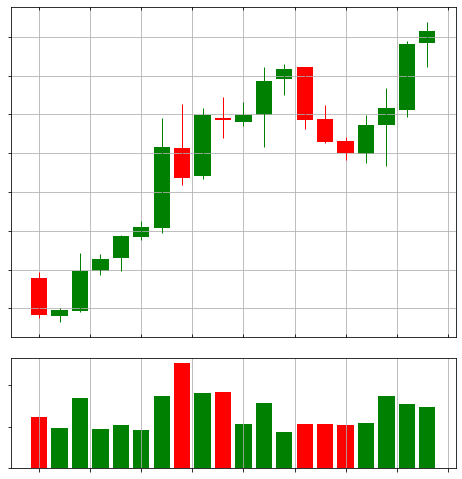

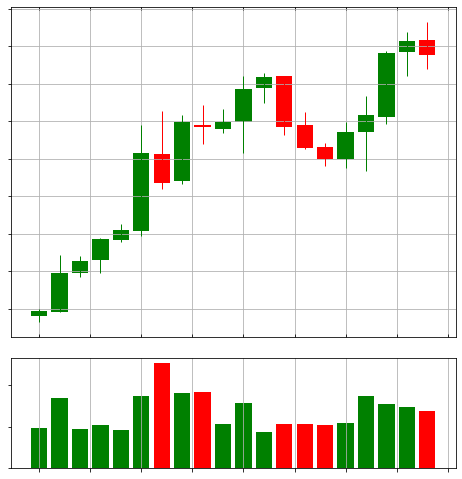

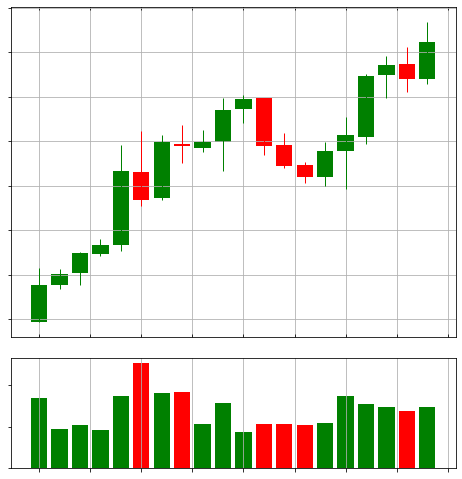

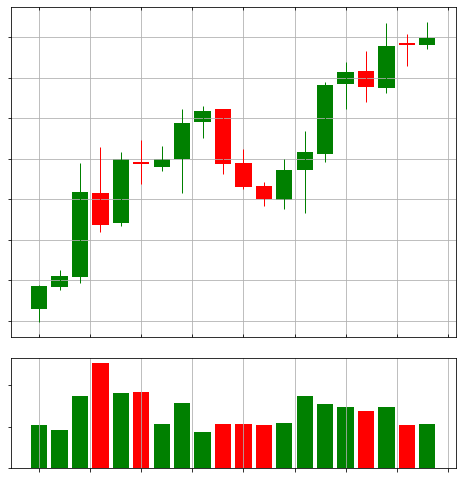

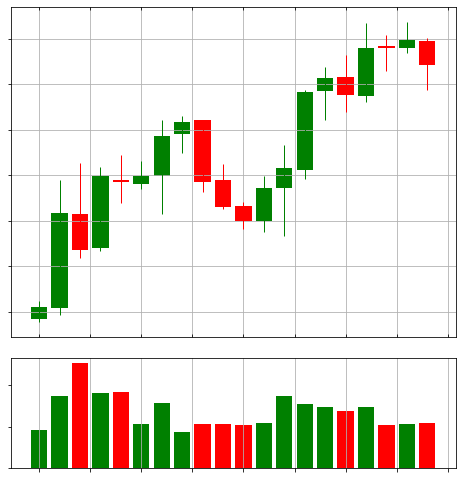

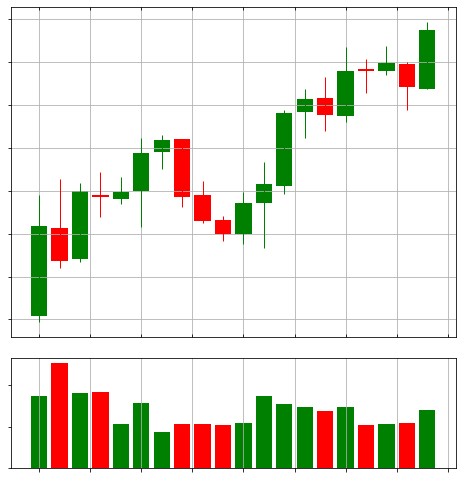

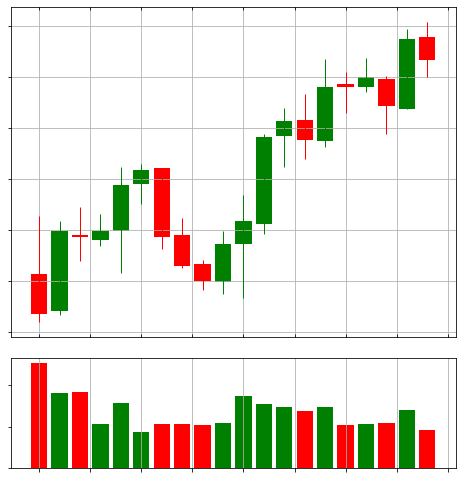

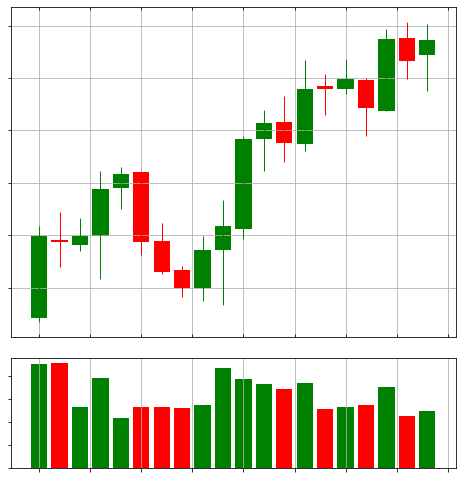

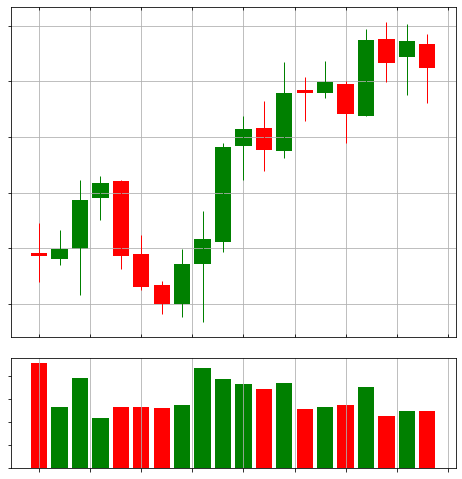

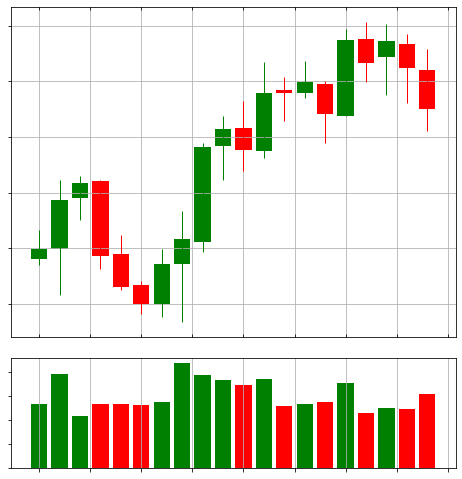

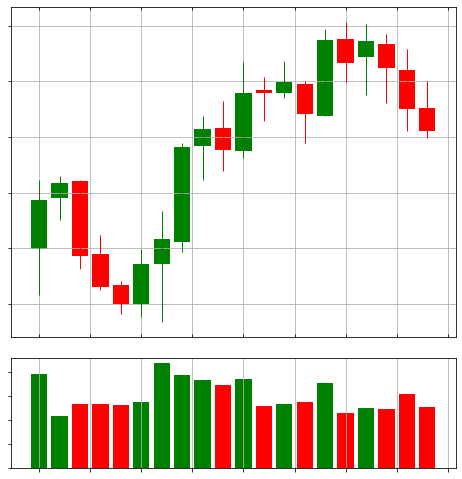

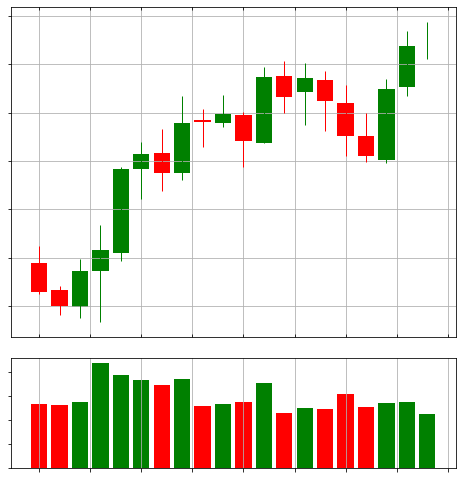

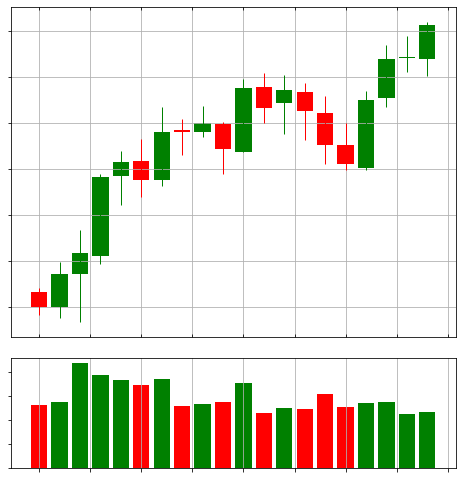

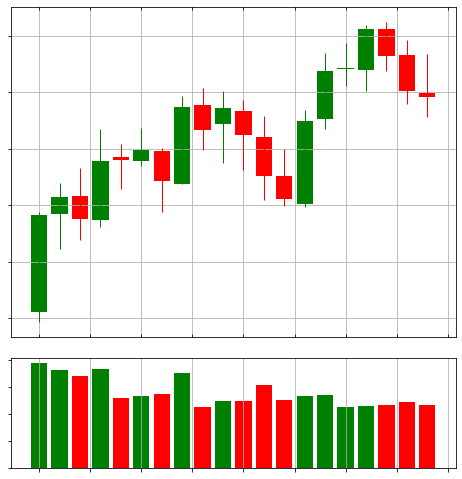

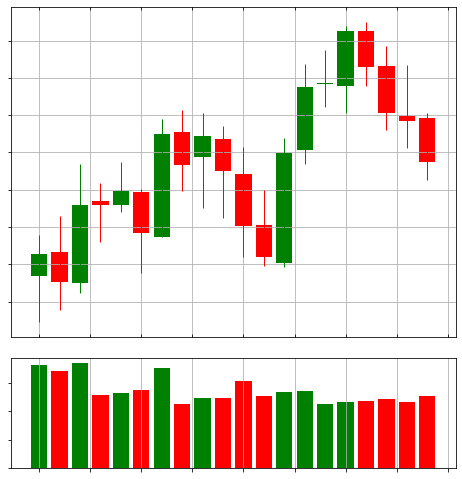

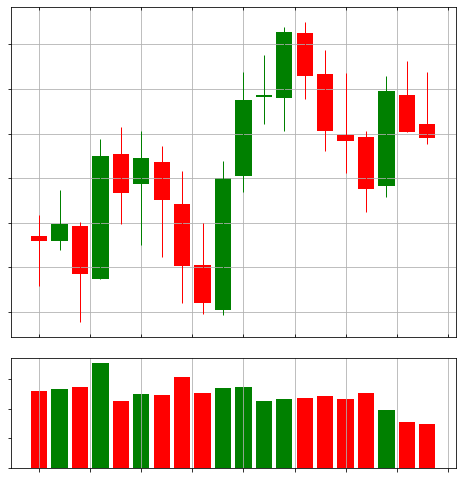

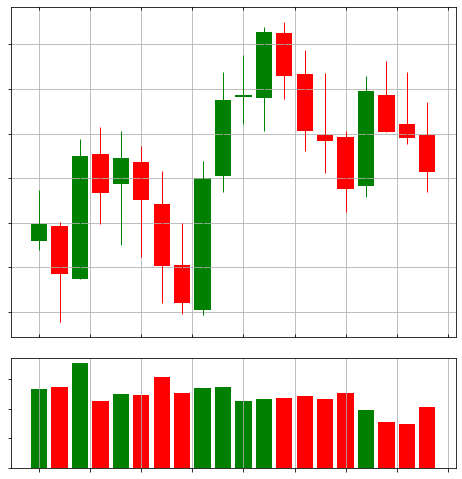

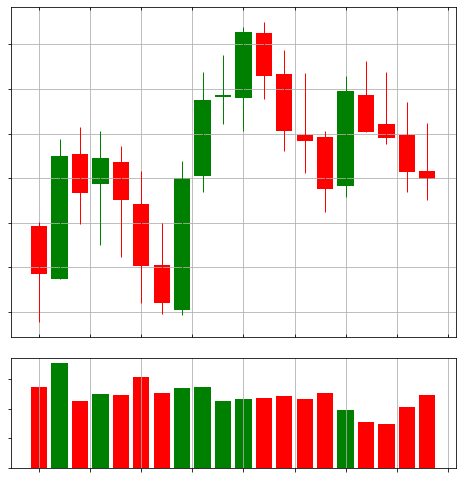

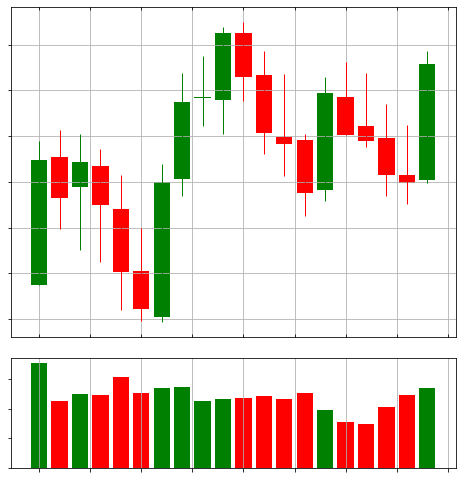

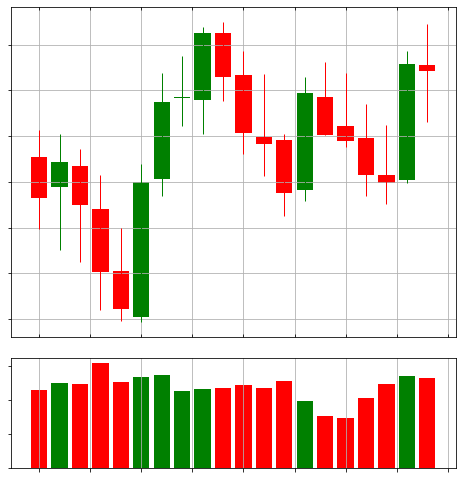

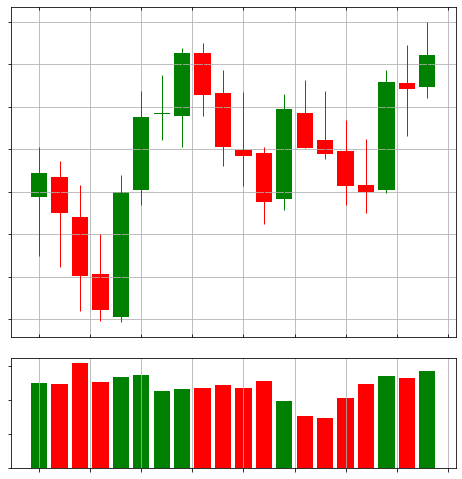

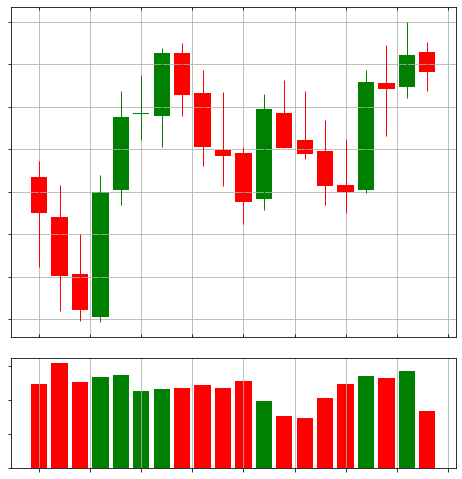

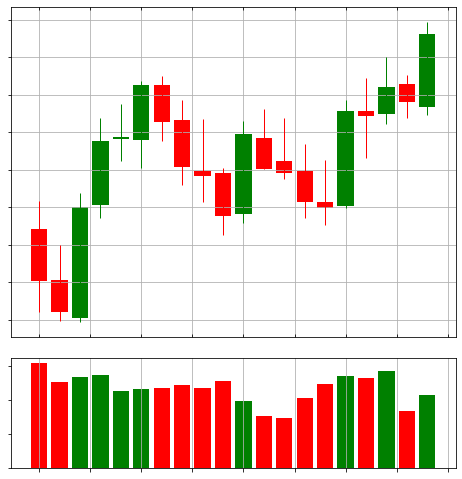

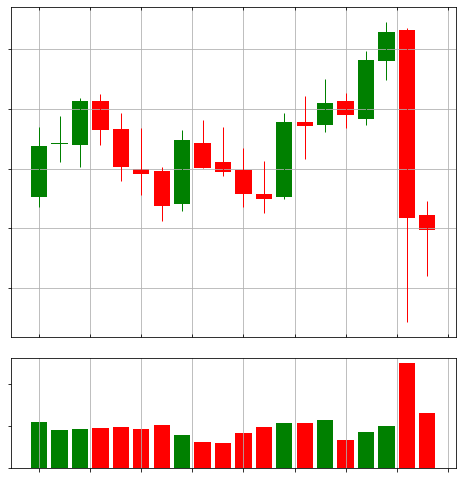

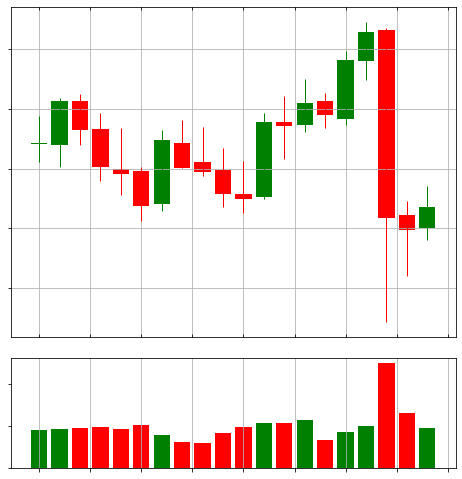

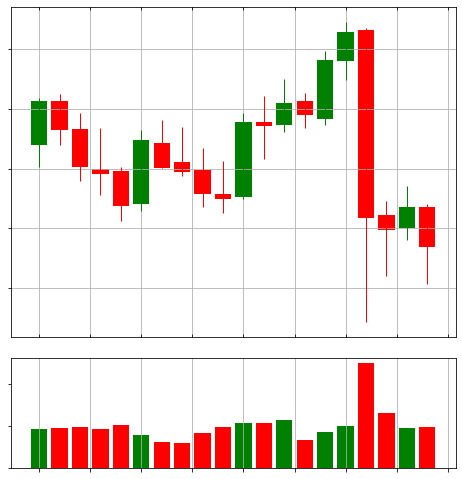

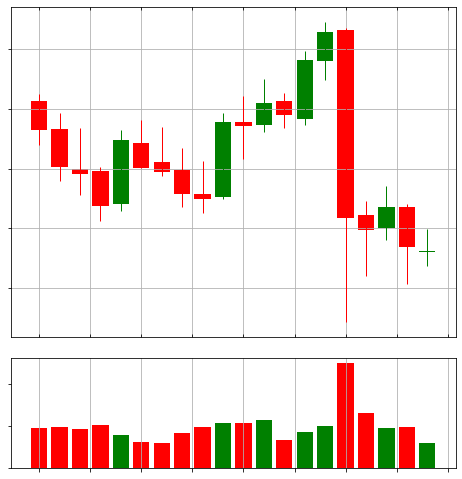

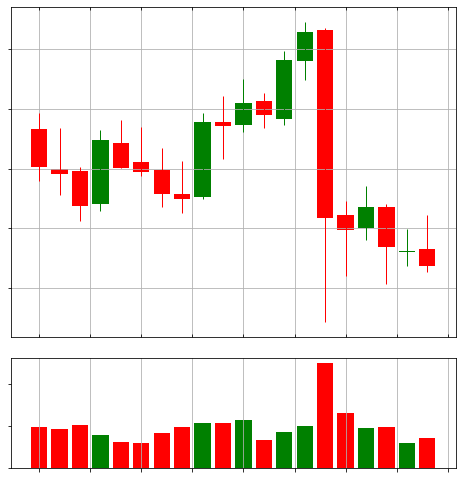

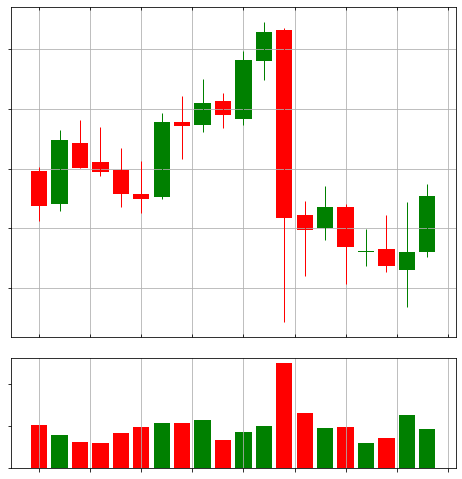

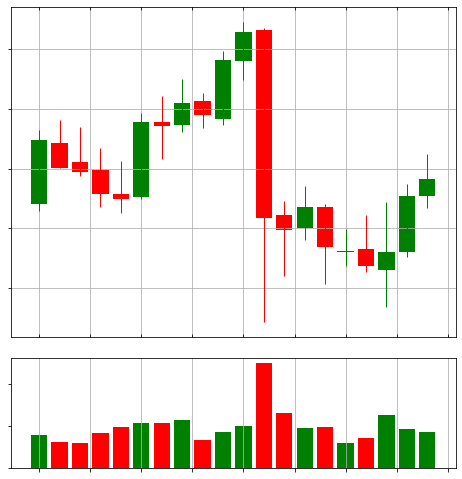

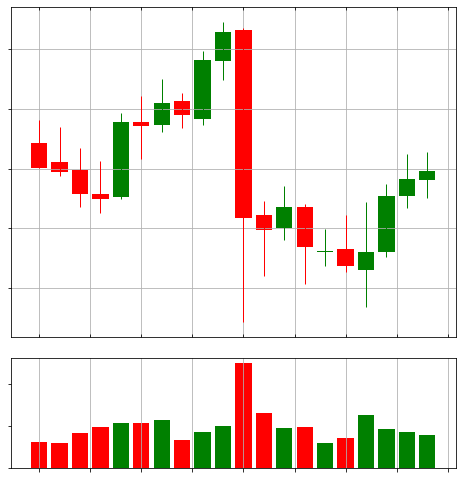

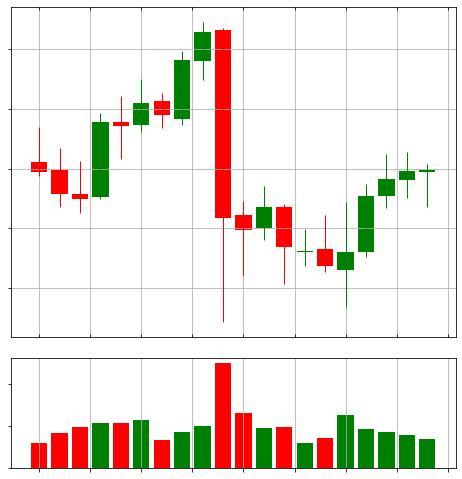

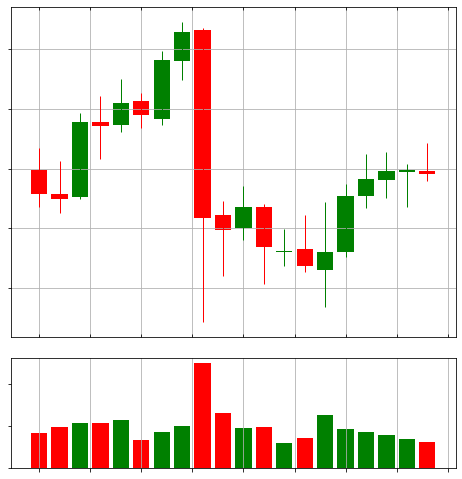

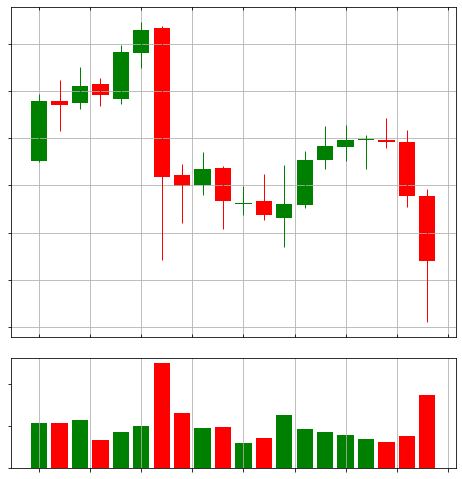

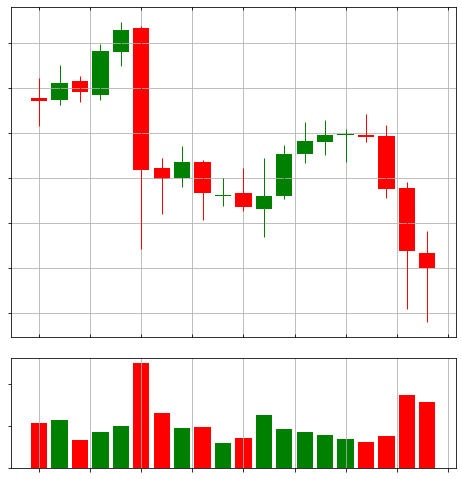

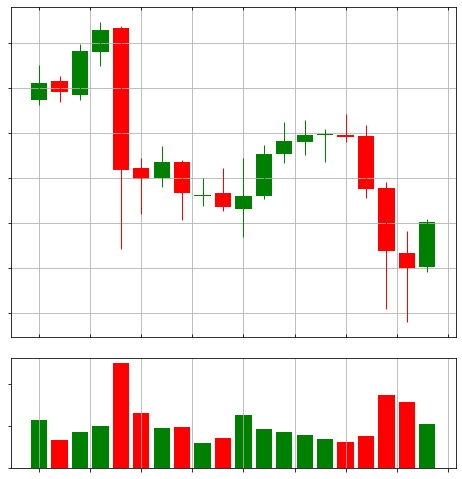

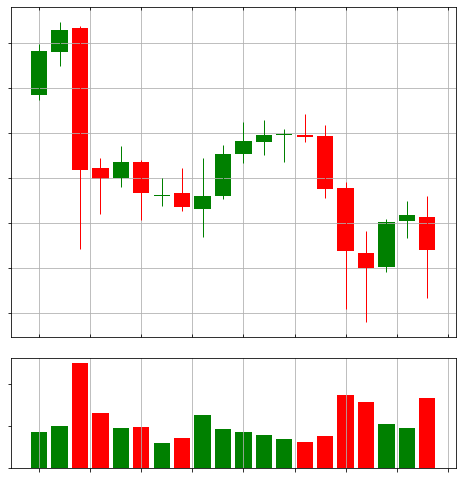

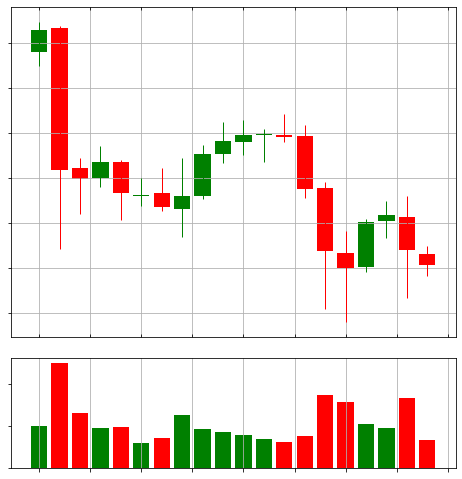

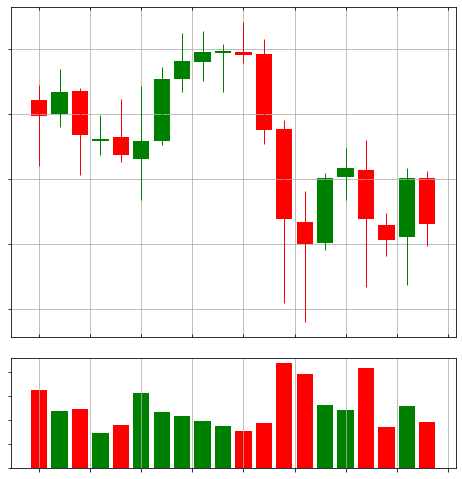

In [6]:
df2= df.copy()
df2 = df2.reset_index(drop=True)
n_days = 5
fraction_movement = 0.037
df2['Trend']=None

for i in range(len(df)):
        try :
            for n in range(n_days): 
                if  df2.loc[i,'Close'] - df2.loc[i+n,'Close'] >= fraction_movement*df2.loc[i,'Close']:
                    df2.loc[i,'Trend'] ='Down'
                    if i >=20 :
                        fig=plot_candles(df[i-20:i],volume_bars=True)
                        fig.savefig('./Down/{0}{1}.png'.format('Crypto',i),dpi=70)
                    print('Down',i,n)
                    break
                elif df2.loc[i+n,'Close'] - df2.loc[i,'Close'] >= fraction_movement*df2.loc[i,'Close'] :
                    df2.loc[i,'Trend']='Up'
                    if i >20 :    
                        fig=plot_candles(df[i-20:i],volume_bars=True)
                        fig.savefig('./Up/{0}{1}.png'.format('Crypto',i),dpi=70)
                    print('Up',i,n)
                    break
                else :
                    df2.loc[i,'Trend']= 'No Trend'
        except :
            print(i)
            pass
